In [2]:
!pip install minigrid
!pip install stable_baselines3
from __future__ import annotations

from minigrid.core.constants import COLOR_NAMES
from minigrid.core.grid import Grid
from minigrid.core.mission import MissionSpace
from minigrid.core.world_object import Door, Goal, Key, Wall
from minigrid.manual_control import ManualControl
from minigrid.minigrid_env import MiniGridEnv
from minigrid.core.actions import Actions
import numpy as np
import random
import os

import minigrid
from minigrid.wrappers import ImgObsWrapper
from gymnasium.core import ObservationWrapper
from stable_baselines3 import PPO
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.callbacks import BaseCallback
from typing import Callable, Dict, List, Optional, Tuple, Type, Union

from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.policies import BasePolicy

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import gymnasium as gym


from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/JHU_DL'

# from plot import make_plot
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 4.1 MB/s eta 0:00:00
pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Mounted at /content/drive
/content/drive/MyDrive/JHU_DL


In [2]:
os.listdir()

['callback_usuage.ipynb',
 'customfeatureextractor.py',
 'New Folder With Items',
 '__pycache__',
 'plot.py',
 'callback.py',
 'model_5x5s_multi_input.zip',
 'model_5x5s_multi_input.png',
 'model_12x12s_multi_input.png',
 'model_8x8s_multi_input.zip',
 'model_8x8s_multi_input.png',
 'training_plot.png',
 'customenv.py',
 'revised_reward_multi_input.ipynb']

In [3]:
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from customenv import CustomDoorKey

from minigrid.wrappers import ImgObsWrapper
from stable_baselines3 import PPO

from customfeatureextractor import CNNFeaturesExtractor, CustomFeatureExtractor, CustomImgObsWrapper

from callback import CustomRewardCallback
from plot import make_plot

# size is grid size
# intermediate reward determines if picking up key/opening door gives reward
# randomimze goal determines if goal should be randomized (cell on last column)
env = CustomDoorKey(size=5, intermediate_reward=True, randomize_goal=True, render_mode = "rgb")
default_env = ImgObsWrapper(env)
custom_env = CustomImgObsWrapper(env)

In [ ]:
policy_kwargs = dict(
    features_extractor_class=CNNFeaturesExtractor,
    features_extractor_kwargs=dict(features_dim=128, regularization = False),
)

custom_policy_kwargs = dict(
    features_extractor_class=CustomFeatureExtractor,
    features_extractor_kwargs=dict(cnn_features_dim=128, mlp_features_dim=32),
)

max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)  # set callback


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


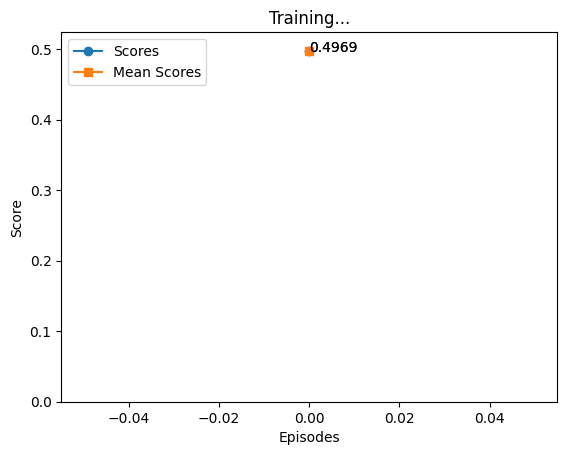

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 780      |
|    ep_rew_mean     | 0.692    |
| time/              |          |
|    fps             | 138      |
|    iterations      | 1        |
|    time_elapsed    | 14       |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 612         |
|    ep_rew_mean          | 0.92        |
| time/                   |             |
|    fps                  | 145         |
|    iterations           | 2           |
|    time_elapsed         | 28          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008991146 |
|    clip_fraction        | 0.0496      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | -0.606      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0267     |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00514    |
|    value_loss           | 0.00364     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 709         |
|    ep_rew_mean          | 0.712       |
| time/                   |             |
|    fps                  | 166         |
|    iterations           | 3           |
|    time_elapsed         | 36          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.008307673 |
|    clip_fraction        | 0.0487      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | 0.505       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00511    |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.00832    |
|    value_loss           | 0.00575     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 641         |
|    ep_rew_mean          | 0.798       |
| time/                   |             |
|    fps                  | 174         |
|    iterations           | 4           |
|    time_elapsed         | 46          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.013611175 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | 0.573       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0388     |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 0.000122    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 637         |
|    ep_rew_mean          | 0.811       |
| time/                   |             |
|    fps                  | 181         |
|    iterations           | 5           |
|    time_elapsed         | 56          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.010209566 |
|    clip_fraction        | 0.0726      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.92       |
|    explained_variance   | 0.628       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0189     |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00936    |
|    value_loss           | 0.00544     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 661         |
|    ep_rew_mean          | 0.8         |
| time/                   |             |
|    fps                  | 189         |
|    iterations           | 6           |
|    time_elapsed         | 64          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.009251787 |
|    clip_fraction        | 0.0963      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.91       |
|    explained_variance   | 0.616       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0229     |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 0.00468     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 645         |
|    ep_rew_mean          | 0.82        |
| time/                   |             |
|    fps                  | 192         |
|    iterations           | 7           |
|    time_elapsed         | 74          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.013390843 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.89       |
|    explained_variance   | 0.38        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00954    |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 0.00404     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 558         |
|    ep_rew_mean          | 0.92        |
| time/                   |             |
|    fps                  | 195         |
|    iterations           | 8           |
|    time_elapsed         | 83          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.012948275 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.85       |
|    explained_variance   | 0.458       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00924     |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 0.00397     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 416         |
|    ep_rew_mean          | 1.09        |
| time/                   |             |
|    fps                  | 192         |
|    iterations           | 9           |
|    time_elapsed         | 95          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.013692991 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.84       |
|    explained_variance   | 0.371       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0127      |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.016      |
|    value_loss           | 0.0105      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 296         |
|    ep_rew_mean          | 1.24        |
| time/                   |             |
|    fps                  | 186         |
|    iterations           | 10          |
|    time_elapsed         | 109         |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.015885662 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.428       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0104      |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 0.0271      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 227         |
|    ep_rew_mean          | 1.32        |
| time/                   |             |
|    fps                  | 180         |
|    iterations           | 11          |
|    time_elapsed         | 125         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.017165747 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.73       |
|    explained_variance   | 0.296       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00307     |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 0.0412      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 135.90 seconds and 23506 steps.
Stopping training as the mean reward 0.90144944190979 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [ ]:
# Setup model and environment
env = CustomDoorKey(size=5, intermediate_reward=True, randomize_goal=True, key_discount=0.1, render_mode="rgb")
env = ImgObsWrapper(env)

model = PPO("MultiInputPolicy", custom_env, policy_kwargs=custom_policy_kwargs, verbose=1)

# Instantiate the callback
max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)  # set callback

# Train the model
model.learn(total_timesteps=int(2e8), callback=callback)  # apply callback
model.save("model_5x5s_multi_input")

# the plot function also saves the plot
plt.savefig('model_5x5s_multi_input.png')

# Close the environment
env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


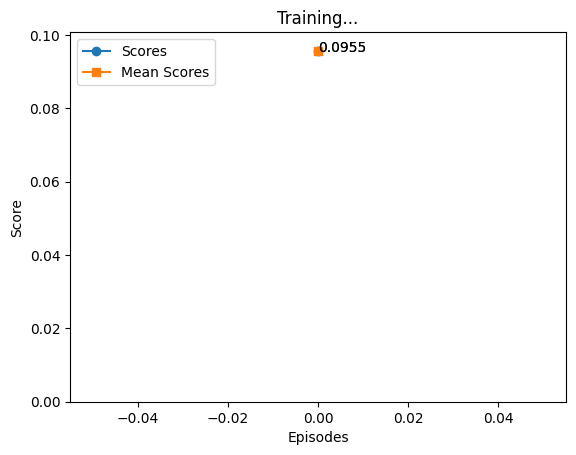

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 0.0989   |
| time/              |          |
|    fps             | 290      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 994         |
|    ep_rew_mean          | 0.182       |
| time/                   |             |
|    fps                  | 268         |
|    iterations           | 2           |
|    time_elapsed         | 15          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014444212 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | -2.4        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.032      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0126     |
|    value_loss           | 0.00257     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.135       |
| time/                   |             |
|    fps                  | 254         |
|    iterations           | 3           |
|    time_elapsed         | 24          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.009639269 |
|    clip_fraction        | 0.0986      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.92       |
|    explained_variance   | 0.0346      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00991     |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.011      |
|    value_loss           | 0.00117     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.123       |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 4           |
|    time_elapsed         | 32          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.010814577 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.89       |
|    explained_variance   | 0.199       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.000483   |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0106     |
|    value_loss           | 0.000366    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 959         |
|    ep_rew_mean          | 0.186       |
| time/                   |             |
|    fps                  | 249         |
|    iterations           | 5           |
|    time_elapsed         | 41          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.011551483 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.86       |
|    explained_variance   | 0.275       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0201     |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 0.000171    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 966         |
|    ep_rew_mean          | 0.178       |
| time/                   |             |
|    fps                  | 237         |
|    iterations           | 6           |
|    time_elapsed         | 51          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.009909128 |
|    clip_fraction        | 0.0904      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | -0.0536     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0249     |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.00961    |
|    value_loss           | 0.000762    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 928         |
|    ep_rew_mean          | 0.227       |
| time/                   |             |
|    fps                  | 235         |
|    iterations           | 7           |
|    time_elapsed         | 60          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.014528257 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | -0.0606     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0387     |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 0.000322    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 910         |
|    ep_rew_mean          | 0.269       |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 8           |
|    time_elapsed         | 69          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.013159221 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.222       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0454     |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 0.000704    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 920         |
|    ep_rew_mean          | 0.283       |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 9           |
|    time_elapsed         | 78          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.011684684 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.74       |
|    explained_variance   | 0.764       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0334     |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0125     |
|    value_loss           | 0.00273     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 931         |
|    ep_rew_mean          | 0.26        |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 10          |
|    time_elapsed         | 86          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.013468433 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.445       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0402      |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0198     |
|    value_loss           | 0.000928    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 936         |
|    ep_rew_mean          | 0.241       |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 11          |
|    time_elapsed         | 95          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.016418394 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.75       |
|    explained_variance   | -0.0185     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0774     |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 0.000615    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 941          |
|    ep_rew_mean          | 0.245        |
| time/                   |              |
|    fps                  | 239          |
|    iterations           | 12           |
|    time_elapsed         | 102          |
|    total_timesteps      | 24576        |
| train/                  |              |
|    approx_kl            | 0.0137866605 |
|    clip_fraction        | 0.132        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | 0.558        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0336       |
|    n_updates            | 110          |
|    policy_gradient_loss | -0.0124      |
|    value_loss           | 0.000161     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 946         |
|    ep_rew_mean          | 0.252       |
| time/                   |             |
|    fps                  | 238         |
|    iterations           | 13          |
|    time_elapsed         | 111         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.015428399 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.73       |
|    explained_variance   | 0.303       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0118     |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 0.000527    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 949         |
|    ep_rew_mean          | 0.257       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 14          |
|    time_elapsed         | 119         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.014634464 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.336       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0369     |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 0.001       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 952         |
|    ep_rew_mean          | 0.243       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 15          |
|    time_elapsed         | 128         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.017143043 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.65       |
|    explained_variance   | 0.792       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0169     |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 0.000119    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 955         |
|    ep_rew_mean          | 0.234       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 16          |
|    time_elapsed         | 136         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.018495047 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.72       |
|    explained_variance   | 0.838       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0711     |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.0195     |
|    value_loss           | 0.000115    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 958         |
|    ep_rew_mean          | 0.223       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 17          |
|    time_elapsed         | 144         |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.009777217 |
|    clip_fraction        | 0.124       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.72       |
|    explained_variance   | 0.861       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0514     |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.0111     |
|    value_loss           | 0.000225    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.22        |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 18          |
|    time_elapsed         | 153         |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.011877999 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.766       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00135     |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.0108     |
|    value_loss           | 0.000104    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 962        |
|    ep_rew_mean          | 0.211      |
| time/                   |            |
|    fps                  | 242        |
|    iterations           | 19         |
|    time_elapsed         | 160        |
|    total_timesteps      | 38912      |
| train/                  |            |
|    approx_kl            | 0.01966993 |
|    clip_fraction        | 0.179      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.66      |
|    explained_variance   | 0.781      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0267    |
|    n_updates            | 180        |
|    policy_gradient_loss | -0.0146    |
|    value_loss           | 5.41e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 963          |
|    ep_rew_mean          | 0.218        |
| time/                   |              |
|    fps                  | 241          |
|    iterations           | 20           |
|    time_elapsed         | 169          |
|    total_timesteps      | 40960        |
| train/                  |              |
|    approx_kl            | 0.0099872425 |
|    clip_fraction        | 0.139        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | 0.336        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00119     |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.0105      |
|    value_loss           | 0.000693     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 965         |
|    ep_rew_mean          | 0.226       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 21          |
|    time_elapsed         | 177         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.016221855 |
|    clip_fraction        | 0.195       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.65       |
|    explained_variance   | -1.64       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00841     |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0131     |
|    value_loss           | 0.000775    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 967         |
|    ep_rew_mean          | 0.216       |
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 22          |
|    time_elapsed         | 185         |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.015551232 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | -0.0363     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0282     |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.0103     |
|    value_loss           | 0.000162    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 968         |
|    ep_rew_mean          | 0.218       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 23          |
|    time_elapsed         | 194         |
|    total_timesteps      | 47104       |
| train/                  |             |
|    approx_kl            | 0.013628023 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.57       |
|    explained_variance   | 0.0978      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0224     |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 0.000183    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 969          |
|    ep_rew_mean          | 0.211        |
| time/                   |              |
|    fps                  | 242          |
|    iterations           | 24           |
|    time_elapsed         | 202          |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0132997045 |
|    clip_fraction        | 0.172        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.59        |
|    explained_variance   | 0.733        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0161      |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.0151      |
|    value_loss           | 0.000468     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 970         |
|    ep_rew_mean          | 0.206       |
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 25          |
|    time_elapsed         | 211         |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.013744008 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.57       |
|    explained_variance   | 0.853       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.022      |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0106     |
|    value_loss           | 7.88e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 972         |
|    ep_rew_mean          | 0.199       |
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 26          |
|    time_elapsed         | 219         |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.011567801 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | 0.503       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0225     |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 0.00011     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 973         |
|    ep_rew_mean          | 0.194       |
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 27          |
|    time_elapsed         | 227         |
|    total_timesteps      | 55296       |
| train/                  |             |
|    approx_kl            | 0.012171796 |
|    clip_fraction        | 0.0932      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.57       |
|    explained_variance   | 0.594       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0188     |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.0123     |
|    value_loss           | 8.79e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 974         |
|    ep_rew_mean          | 0.189       |
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 28          |
|    time_elapsed         | 236         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.011924616 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | -0.0711     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00843    |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 6.78e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 974         |
|    ep_rew_mean          | 0.193       |
| time/                   |             |
|    fps                  | 243         |
|    iterations           | 29          |
|    time_elapsed         | 244         |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.016886832 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.65       |
|    explained_variance   | -0.127      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00651    |
|    n_updates            | 280         |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 0.000129    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 975         |
|    ep_rew_mean          | 0.189       |
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 30          |
|    time_elapsed         | 252         |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.015476154 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.418       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00546     |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.0144     |
|    value_loss           | 0.000523    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 967         |
|    ep_rew_mean          | 0.198       |
| time/                   |             |
|    fps                  | 243         |
|    iterations           | 31          |
|    time_elapsed         | 260         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.010796132 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.53       |
|    explained_variance   | 0.586       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00809     |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 0.000741    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 968          |
|    ep_rew_mean          | 0.198        |
| time/                   |              |
|    fps                  | 243          |
|    iterations           | 32           |
|    time_elapsed         | 269          |
|    total_timesteps      | 65536        |
| train/                  |              |
|    approx_kl            | 0.0116444845 |
|    clip_fraction        | 0.136        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.53        |
|    explained_variance   | 0.168        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0322      |
|    n_updates            | 310          |
|    policy_gradient_loss | -0.016       |
|    value_loss           | 0.00152      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | 0.198       |
| time/                   |             |
|    fps                  | 243         |
|    iterations           | 33          |
|    time_elapsed         | 277         |
|    total_timesteps      | 67584       |
| train/                  |             |
|    approx_kl            | 0.010465404 |
|    clip_fraction        | 0.117       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.48       |
|    explained_variance   | 0.608       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0275     |
|    n_updates            | 320         |
|    policy_gradient_loss | -0.0115     |
|    value_loss           | 0.000683    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 969         |
|    ep_rew_mean          | 0.201       |
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 34          |
|    time_elapsed         | 287         |
|    total_timesteps      | 69632       |
| train/                  |             |
|    approx_kl            | 0.013702415 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.185       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00685     |
|    n_updates            | 330         |
|    policy_gradient_loss | -0.0169     |
|    value_loss           | 0.000982    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 970       |
|    ep_rew_mean          | 0.198     |
| time/                   |           |
|    fps                  | 241       |
|    iterations           | 35        |
|    time_elapsed         | 296       |
|    total_timesteps      | 71680     |
| train/                  |           |
|    approx_kl            | 0.0349525 |
|    clip_fraction        | 0.21      |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.42     |
|    explained_variance   | 0.12      |
|    learning_rate        | 0.0003    |
|    loss                 | 0.0658    |
|    n_updates            | 340       |
|    policy_gradient_loss | -0.019    |
|    value_loss           | 0.000954  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 971         |
|    ep_rew_mean          | 0.195       |
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 36          |
|    time_elapsed         | 304         |
|    total_timesteps      | 73728       |
| train/                  |             |
|    approx_kl            | 0.012830076 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | 0.59        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00467    |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 0.000251    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 972       |
|    ep_rew_mean          | 0.196     |
| time/                   |           |
|    fps                  | 242       |
|    iterations           | 37        |
|    time_elapsed         | 312       |
|    total_timesteps      | 75776     |
| train/                  |           |
|    approx_kl            | 0.0117278 |
|    clip_fraction        | 0.121     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.48     |
|    explained_variance   | 0.717     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.042    |
|    n_updates            | 360       |
|    policy_gradient_loss | -0.0157   |
|    value_loss           | 0.000285  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 963         |
|    ep_rew_mean          | 0.208       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 38          |
|    time_elapsed         | 321         |
|    total_timesteps      | 77824       |
| train/                  |             |
|    approx_kl            | 0.012019347 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | 0.499       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0417     |
|    n_updates            | 370         |
|    policy_gradient_loss | -0.0151     |
|    value_loss           | 9.75e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.213       |
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 39          |
|    time_elapsed         | 330         |
|    total_timesteps      | 79872       |
| train/                  |             |
|    approx_kl            | 0.011137412 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.45       |
|    explained_variance   | -0.0722     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0165     |
|    n_updates            | 380         |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 0.0015      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 961         |
|    ep_rew_mean          | 0.214       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 40          |
|    time_elapsed         | 338         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.012180096 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | -0.0486     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0302     |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.0222     |
|    value_loss           | 0.00112     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 956         |
|    ep_rew_mean          | 0.22        |
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 41          |
|    time_elapsed         | 346         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.015973557 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.45       |
|    explained_variance   | 0.307       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00581     |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 0.000609    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.216       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 42          |
|    time_elapsed         | 355         |
|    total_timesteps      | 86016       |
| train/                  |             |
|    approx_kl            | 0.010650212 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | 0.463       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0565     |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 0.000612    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 952         |
|    ep_rew_mean          | 0.229       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 43          |
|    time_elapsed         | 364         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.019981064 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | -0.137      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0143     |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 0.00153     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 953         |
|    ep_rew_mean          | 0.229       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 44          |
|    time_elapsed         | 372         |
|    total_timesteps      | 90112       |
| train/                  |             |
|    approx_kl            | 0.020672737 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.39       |
|    explained_variance   | 0.38        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0612     |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 0.0013      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 954         |
|    ep_rew_mean          | 0.231       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 45          |
|    time_elapsed         | 381         |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.018547567 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.454       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0573     |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 0.000731    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 955         |
|    ep_rew_mean          | 0.23        |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 46          |
|    time_elapsed         | 389         |
|    total_timesteps      | 94208       |
| train/                  |             |
|    approx_kl            | 0.018571403 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.545       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0034     |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 0.000764    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 950         |
|    ep_rew_mean          | 0.238       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 47          |
|    time_elapsed         | 398         |
|    total_timesteps      | 96256       |
| train/                  |             |
|    approx_kl            | 0.013863247 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | 0.0712      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0548     |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.000412    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 951        |
|    ep_rew_mean          | 0.233      |
| time/                   |            |
|    fps                  | 241        |
|    iterations           | 48         |
|    time_elapsed         | 406        |
|    total_timesteps      | 98304      |
| train/                  |            |
|    approx_kl            | 0.01278318 |
|    clip_fraction        | 0.16       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.35      |
|    explained_variance   | 0.145      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0104     |
|    n_updates            | 470        |
|    policy_gradient_loss | -0.0133    |
|    value_loss           | 0.00141    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 930        |
|    ep_rew_mean          | 0.273      |
| time/                   |            |
|    fps                  | 241        |
|    iterations           | 49         |
|    time_elapsed         | 415        |
|    total_timesteps      | 100352     |
| train/                  |            |
|    approx_kl            | 0.01463963 |
|    clip_fraction        | 0.139      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.14      |
|    explained_variance   | 0.169      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0174    |
|    n_updates            | 480        |
|    policy_gradient_loss | -0.017     |
|    value_loss           | 0.000192   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 926        |
|    ep_rew_mean          | 0.285      |
| time/                   |            |
|    fps                  | 241        |
|    iterations           | 50         |
|    time_elapsed         | 424        |
|    total_timesteps      | 102400     |
| train/                  |            |
|    approx_kl            | 0.01431643 |
|    clip_fraction        | 0.166      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.34      |
|    explained_variance   | -0.0268    |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0237    |
|    n_updates            | 490        |
|    policy_gradient_loss | -0.0195    |
|    value_loss           | 0.00482    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 926         |
|    ep_rew_mean          | 0.285       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 51          |
|    time_elapsed         | 432         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.015168743 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | -0.0738     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0131     |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.0169     |
|    value_loss           | 0.00238     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 924         |
|    ep_rew_mean          | 0.291       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 52          |
|    time_elapsed         | 441         |
|    total_timesteps      | 106496      |
| train/                  |             |
|    approx_kl            | 0.017066568 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.086       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0369     |
|    n_updates            | 510         |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 0.00102     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 922         |
|    ep_rew_mean          | 0.293       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 53          |
|    time_elapsed         | 449         |
|    total_timesteps      | 108544      |
| train/                  |             |
|    approx_kl            | 0.011662515 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | -0.136      |
|    learning_rate        | 0.0003      |
|    loss                 | -2.65e-05   |
|    n_updates            | 520         |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 0.000836    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 920         |
|    ep_rew_mean          | 0.293       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 54          |
|    time_elapsed         | 458         |
|    total_timesteps      | 110592      |
| train/                  |             |
|    approx_kl            | 0.011816662 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.376       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0446     |
|    n_updates            | 530         |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 0.00165     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 920         |
|    ep_rew_mean          | 0.294       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 55          |
|    time_elapsed         | 467         |
|    total_timesteps      | 112640      |
| train/                  |             |
|    approx_kl            | 0.021716652 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | -0.318      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0517     |
|    n_updates            | 540         |
|    policy_gradient_loss | -0.0114     |
|    value_loss           | 0.000436    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 914         |
|    ep_rew_mean          | 0.31        |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 56          |
|    time_elapsed         | 475         |
|    total_timesteps      | 114688      |
| train/                  |             |
|    approx_kl            | 0.007977394 |
|    clip_fraction        | 0.088       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.399       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0407     |
|    n_updates            | 550         |
|    policy_gradient_loss | -0.00941    |
|    value_loss           | 0.000783    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 914         |
|    ep_rew_mean          | 0.306       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 57          |
|    time_elapsed         | 484         |
|    total_timesteps      | 116736      |
| train/                  |             |
|    approx_kl            | 0.011432856 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.543       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00965     |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 0.000861    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 914        |
|    ep_rew_mean          | 0.302      |
| time/                   |            |
|    fps                  | 241        |
|    iterations           | 58         |
|    time_elapsed         | 492        |
|    total_timesteps      | 118784     |
| train/                  |            |
|    approx_kl            | 0.03508827 |
|    clip_fraction        | 0.261      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.11      |
|    explained_variance   | 0.679      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0516    |
|    n_updates            | 570        |
|    policy_gradient_loss | -0.0199    |
|    value_loss           | 0.000224   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 914        |
|    ep_rew_mean          | 0.297      |
| time/                   |            |
|    fps                  | 241        |
|    iterations           | 59         |
|    time_elapsed         | 501        |
|    total_timesteps      | 120832     |
| train/                  |            |
|    approx_kl            | 0.01487426 |
|    clip_fraction        | 0.143      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.02      |
|    explained_variance   | 0.302      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0281     |
|    n_updates            | 580        |
|    policy_gradient_loss | -0.0186    |
|    value_loss           | 0.000157   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 913         |
|    ep_rew_mean          | 0.304       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 60          |
|    time_elapsed         | 510         |
|    total_timesteps      | 122880      |
| train/                  |             |
|    approx_kl            | 0.017741345 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.113       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0283     |
|    n_updates            | 590         |
|    policy_gradient_loss | -0.025      |
|    value_loss           | 7e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 913         |
|    ep_rew_mean          | 0.306       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 61          |
|    time_elapsed         | 518         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.016474396 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.281       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0154     |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 0.000686    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 905         |
|    ep_rew_mean          | 0.318       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 62          |
|    time_elapsed         | 527         |
|    total_timesteps      | 126976      |
| train/                  |             |
|    approx_kl            | 0.011066224 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.185       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00156     |
|    n_updates            | 610         |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 0.000982    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 897       |
|    ep_rew_mean          | 0.331     |
| time/                   |           |
|    fps                  | 240       |
|    iterations           | 63        |
|    time_elapsed         | 535       |
|    total_timesteps      | 129024    |
| train/                  |           |
|    approx_kl            | 0.0199011 |
|    clip_fraction        | 0.22      |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.11     |
|    explained_variance   | 0.172     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0314   |
|    n_updates            | 620       |
|    policy_gradient_loss | -0.0131   |
|    value_loss           | 0.000787  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 897         |
|    ep_rew_mean          | 0.329       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 64          |
|    time_elapsed         | 544         |
|    total_timesteps      | 131072      |
| train/                  |             |
|    approx_kl            | 0.020545134 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.66        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0742      |
|    n_updates            | 630         |
|    policy_gradient_loss | -0.016      |
|    value_loss           | 0.00262     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 888         |
|    ep_rew_mean          | 0.34        |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 65          |
|    time_elapsed         | 553         |
|    total_timesteps      | 133120      |
| train/                  |             |
|    approx_kl            | 0.013716111 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.173       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0387     |
|    n_updates            | 640         |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 0.000623    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 888         |
|    ep_rew_mean          | 0.34        |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 66          |
|    time_elapsed         | 561         |
|    total_timesteps      | 135168      |
| train/                  |             |
|    approx_kl            | 0.014673549 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.405       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0199     |
|    n_updates            | 650         |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 0.00292     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 873        |
|    ep_rew_mean          | 0.36       |
| time/                   |            |
|    fps                  | 240        |
|    iterations           | 67         |
|    time_elapsed         | 570        |
|    total_timesteps      | 137216     |
| train/                  |            |
|    approx_kl            | 0.01631784 |
|    clip_fraction        | 0.159      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.27      |
|    explained_variance   | 0.758      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.039     |
|    n_updates            | 660        |
|    policy_gradient_loss | -0.00801   |
|    value_loss           | 0.000195   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 873         |
|    ep_rew_mean          | 0.365       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 68          |
|    time_elapsed         | 578         |
|    total_timesteps      | 139264      |
| train/                  |             |
|    approx_kl            | 0.011913247 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.444       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00053    |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.0144     |
|    value_loss           | 0.00508     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 863          |
|    ep_rew_mean          | 0.384        |
| time/                   |              |
|    fps                  | 240          |
|    iterations           | 69           |
|    time_elapsed         | 587          |
|    total_timesteps      | 141312       |
| train/                  |              |
|    approx_kl            | 0.0110181235 |
|    clip_fraction        | 0.119        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.31        |
|    explained_variance   | 0.167        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0126      |
|    n_updates            | 680          |
|    policy_gradient_loss | -0.0163      |
|    value_loss           | 0.00228      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 855        |
|    ep_rew_mean          | 0.401      |
| time/                   |            |
|    fps                  | 240        |
|    iterations           | 70         |
|    time_elapsed         | 596        |
|    total_timesteps      | 143360     |
| train/                  |            |
|    approx_kl            | 0.03251926 |
|    clip_fraction        | 0.231      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.17      |
|    explained_variance   | -0.0265    |
|    learning_rate        | 0.0003     |
|    loss                 | -0.011     |
|    n_updates            | 690        |
|    policy_gradient_loss | -0.0195    |
|    value_loss           | 0.00239    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 848         |
|    ep_rew_mean          | 0.408       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 71          |
|    time_elapsed         | 604         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.023243275 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.207       |
|    learning_rate        | 0.0003      |
|    loss                 | -3.06e-05   |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 0.00162     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 847         |
|    ep_rew_mean          | 0.416       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 72          |
|    time_elapsed         | 613         |
|    total_timesteps      | 147456      |
| train/                  |             |
|    approx_kl            | 0.013739372 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.502       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00333    |
|    n_updates            | 710         |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 0.00159     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 844         |
|    ep_rew_mean          | 0.419       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 73          |
|    time_elapsed         | 622         |
|    total_timesteps      | 149504      |
| train/                  |             |
|    approx_kl            | 0.027617514 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.591       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0205     |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 0.0014      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 839         |
|    ep_rew_mean          | 0.425       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 74          |
|    time_elapsed         | 630         |
|    total_timesteps      | 151552      |
| train/                  |             |
|    approx_kl            | 0.012405353 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.207       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.000524   |
|    n_updates            | 730         |
|    policy_gradient_loss | -0.0112     |
|    value_loss           | 0.0031      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 828         |
|    ep_rew_mean          | 0.443       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 75          |
|    time_elapsed         | 639         |
|    total_timesteps      | 153600      |
| train/                  |             |
|    approx_kl            | 0.017878171 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | -0.0359     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0343     |
|    n_updates            | 740         |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 0.00251     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 822        |
|    ep_rew_mean          | 0.454      |
| time/                   |            |
|    fps                  | 240        |
|    iterations           | 76         |
|    time_elapsed         | 648        |
|    total_timesteps      | 155648     |
| train/                  |            |
|    approx_kl            | 0.01656998 |
|    clip_fraction        | 0.197      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.23      |
|    explained_variance   | 0.406      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0473    |
|    n_updates            | 750        |
|    policy_gradient_loss | -0.0198    |
|    value_loss           | 0.00286    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 822         |
|    ep_rew_mean          | 0.451       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 77          |
|    time_elapsed         | 656         |
|    total_timesteps      | 157696      |
| train/                  |             |
|    approx_kl            | 0.026010673 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.53        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0468     |
|    n_updates            | 760         |
|    policy_gradient_loss | -0.0247     |
|    value_loss           | 0.00108     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 813         |
|    ep_rew_mean          | 0.472       |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 78          |
|    time_elapsed         | 665         |
|    total_timesteps      | 159744      |
| train/                  |             |
|    approx_kl            | 0.021690123 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.455       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0403     |
|    n_updates            | 770         |
|    policy_gradient_loss | -0.0262     |
|    value_loss           | 0.00155     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 817         |
|    ep_rew_mean          | 0.47        |
| time/                   |             |
|    fps                  | 240         |
|    iterations           | 79          |
|    time_elapsed         | 673         |
|    total_timesteps      | 161792      |
| train/                  |             |
|    approx_kl            | 0.017108425 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.361       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00705     |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.0202     |
|    value_loss           | 0.00461     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 803         |
|    ep_rew_mean          | 0.489       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 80          |
|    time_elapsed         | 682         |
|    total_timesteps      | 163840      |
| train/                  |             |
|    approx_kl            | 0.013948588 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.429       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0253      |
|    n_updates            | 790         |
|    policy_gradient_loss | -0.0144     |
|    value_loss           | 0.00132     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 803         |
|    ep_rew_mean          | 0.495       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 81          |
|    time_elapsed         | 691         |
|    total_timesteps      | 165888      |
| train/                  |             |
|    approx_kl            | 0.019057758 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.248       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0216     |
|    n_updates            | 800         |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 0.00325     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 795         |
|    ep_rew_mean          | 0.501       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 82          |
|    time_elapsed         | 700         |
|    total_timesteps      | 167936      |
| train/                  |             |
|    approx_kl            | 0.019874811 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | -0.225      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0649     |
|    n_updates            | 810         |
|    policy_gradient_loss | -0.0245     |
|    value_loss           | 0.00195     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 771         |
|    ep_rew_mean          | 0.534       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 83          |
|    time_elapsed         | 709         |
|    total_timesteps      | 169984      |
| train/                  |             |
|    approx_kl            | 0.019313712 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.227       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.015      |
|    n_updates            | 820         |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 0.00168     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 732         |
|    ep_rew_mean          | 0.592       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 84          |
|    time_elapsed         | 718         |
|    total_timesteps      | 172032      |
| train/                  |             |
|    approx_kl            | 0.017115997 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | 0.0899      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0192     |
|    n_updates            | 830         |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 0.00679     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 739        |
|    ep_rew_mean          | 0.58       |
| time/                   |            |
|    fps                  | 239        |
|    iterations           | 85         |
|    time_elapsed         | 728        |
|    total_timesteps      | 174080     |
| train/                  |            |
|    approx_kl            | 0.01973705 |
|    clip_fraction        | 0.185      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.13      |
|    explained_variance   | 0.141      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0243     |
|    n_updates            | 840        |
|    policy_gradient_loss | -0.0236    |
|    value_loss           | 0.0116     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 716         |
|    ep_rew_mean          | 0.613       |
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 86          |
|    time_elapsed         | 736         |
|    total_timesteps      | 176128      |
| train/                  |             |
|    approx_kl            | 0.011844255 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.252       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0305     |
|    n_updates            | 850         |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 0.00368     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 699         |
|    ep_rew_mean          | 0.638       |
| time/                   |             |
|    fps                  | 238         |
|    iterations           | 87          |
|    time_elapsed         | 746         |
|    total_timesteps      | 178176      |
| train/                  |             |
|    approx_kl            | 0.027697511 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.982      |
|    explained_variance   | 0.322       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0401     |
|    n_updates            | 860         |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 0.0108      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 693        |
|    ep_rew_mean          | 0.647      |
| time/                   |            |
|    fps                  | 238        |
|    iterations           | 88         |
|    time_elapsed         | 755        |
|    total_timesteps      | 180224     |
| train/                  |            |
|    approx_kl            | 0.01741533 |
|    clip_fraction        | 0.172      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.03      |
|    explained_variance   | 0.111      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0167    |
|    n_updates            | 870        |
|    policy_gradient_loss | -0.0164    |
|    value_loss           | 0.00788    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 681         |
|    ep_rew_mean          | 0.658       |
| time/                   |             |
|    fps                  | 238         |
|    iterations           | 89          |
|    time_elapsed         | 763         |
|    total_timesteps      | 182272      |
| train/                  |             |
|    approx_kl            | 0.017223284 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.426       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00678    |
|    n_updates            | 880         |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 0.00307     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 671         |
|    ep_rew_mean          | 0.676       |
| time/                   |             |
|    fps                  | 238         |
|    iterations           | 90          |
|    time_elapsed         | 773         |
|    total_timesteps      | 184320      |
| train/                  |             |
|    approx_kl            | 0.018670917 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.94       |
|    explained_variance   | -0.192      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00486    |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.0114     |
|    value_loss           | 0.00578     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 635        |
|    ep_rew_mean          | 0.726      |
| time/                   |            |
|    fps                  | 238        |
|    iterations           | 91         |
|    time_elapsed         | 782        |
|    total_timesteps      | 186368     |
| train/                  |            |
|    approx_kl            | 0.01808939 |
|    clip_fraction        | 0.176      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.982     |
|    explained_variance   | 0.392      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.064     |
|    n_updates            | 900        |
|    policy_gradient_loss | -0.0125    |
|    value_loss           | 0.0036     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 633         |
|    ep_rew_mean          | 0.733       |
| time/                   |             |
|    fps                  | 238         |
|    iterations           | 92          |
|    time_elapsed         | 790         |
|    total_timesteps      | 188416      |
| train/                  |             |
|    approx_kl            | 0.014133465 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.972      |
|    explained_variance   | 0.34        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0532     |
|    n_updates            | 910         |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 0.00933     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 609        |
|    ep_rew_mean          | 0.773      |
| time/                   |            |
|    fps                  | 237        |
|    iterations           | 93         |
|    time_elapsed         | 801        |
|    total_timesteps      | 190464     |
| train/                  |            |
|    approx_kl            | 0.02576986 |
|    clip_fraction        | 0.214      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.976     |
|    explained_variance   | 0.294      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0331    |
|    n_updates            | 920        |
|    policy_gradient_loss | -0.0187    |
|    value_loss           | 0.00536    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 581         |
|    ep_rew_mean          | 0.817       |
| time/                   |             |
|    fps                  | 237         |
|    iterations           | 94          |
|    time_elapsed         | 811         |
|    total_timesteps      | 192512      |
| train/                  |             |
|    approx_kl            | 0.029181393 |
|    clip_fraction        | 0.252       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.114       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0416     |
|    n_updates            | 930         |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 0.00861     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 552         |
|    ep_rew_mean          | 0.86        |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 95          |
|    time_elapsed         | 821         |
|    total_timesteps      | 194560      |
| train/                  |             |
|    approx_kl            | 0.021286763 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.103       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0169     |
|    n_updates            | 940         |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 0.0113      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 535         |
|    ep_rew_mean          | 0.886       |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 96          |
|    time_elapsed         | 830         |
|    total_timesteps      | 196608      |
| train/                  |             |
|    approx_kl            | 0.016149158 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.913      |
|    explained_variance   | 0.00468     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00523    |
|    n_updates            | 950         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.0119      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 513         |
|    ep_rew_mean          | 0.919       |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 97          |
|    time_elapsed         | 839         |
|    total_timesteps      | 198656      |
| train/                  |             |
|    approx_kl            | 0.024509676 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.962      |
|    explained_variance   | 0.331       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0534     |
|    n_updates            | 960         |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 0.00502     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_mean          | 0.946       |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 98          |
|    time_elapsed         | 848         |
|    total_timesteps      | 200704      |
| train/                  |             |
|    approx_kl            | 0.018484518 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | -0.0541     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0238     |
|    n_updates            | 970         |
|    policy_gradient_loss | -0.0198     |
|    value_loss           | 0.00568     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489         |
|    ep_rew_mean          | 0.952       |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 99          |
|    time_elapsed         | 858         |
|    total_timesteps      | 202752      |
| train/                  |             |
|    approx_kl            | 0.018204011 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.923      |
|    explained_variance   | 0.317       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0132      |
|    n_updates            | 980         |
|    policy_gradient_loss | -0.0175     |
|    value_loss           | 0.00409     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 470        |
|    ep_rew_mean          | 0.985      |
| time/                   |            |
|    fps                  | 236        |
|    iterations           | 100        |
|    time_elapsed         | 866        |
|    total_timesteps      | 204800     |
| train/                  |            |
|    approx_kl            | 0.02398717 |
|    clip_fraction        | 0.185      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.898     |
|    explained_variance   | 0.397      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0429     |
|    n_updates            | 990        |
|    policy_gradient_loss | -0.0174    |
|    value_loss           | 0.0052     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 445         |
|    ep_rew_mean          | 1.01        |
| time/                   |             |
|    fps                  | 235         |
|    iterations           | 101         |
|    time_elapsed         | 876         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.016945839 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.97       |
|    explained_variance   | 0.517       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0329     |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 0.00377     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 405         |
|    ep_rew_mean          | 1.07        |
| time/                   |             |
|    fps                  | 235         |
|    iterations           | 102         |
|    time_elapsed         | 887         |
|    total_timesteps      | 208896      |
| train/                  |             |
|    approx_kl            | 0.026304476 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.898      |
|    explained_variance   | 0.312       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0131     |
|    n_updates            | 1010        |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 0.0123      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.07        |
| time/                   |             |
|    fps                  | 235         |
|    iterations           | 103         |
|    time_elapsed         | 896         |
|    total_timesteps      | 210944      |
| train/                  |             |
|    approx_kl            | 0.027270582 |
|    clip_fraction        | 0.225       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.941      |
|    explained_variance   | 0.524       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0455     |
|    n_updates            | 1020        |
|    policy_gradient_loss | -0.0252     |
|    value_loss           | 0.0116      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 391         |
|    ep_rew_mean          | 1.09        |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 104         |
|    time_elapsed         | 906         |
|    total_timesteps      | 212992      |
| train/                  |             |
|    approx_kl            | 0.033086047 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.922      |
|    explained_variance   | 0.487       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0197     |
|    n_updates            | 1030        |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 0.0102      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 396        |
|    ep_rew_mean          | 1.08       |
| time/                   |            |
|    fps                  | 234        |
|    iterations           | 105        |
|    time_elapsed         | 916        |
|    total_timesteps      | 215040     |
| train/                  |            |
|    approx_kl            | 0.02988686 |
|    clip_fraction        | 0.234      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.991     |
|    explained_variance   | 0.208      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0253    |
|    n_updates            | 1040       |
|    policy_gradient_loss | -0.0244    |
|    value_loss           | 0.0114     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 408         |
|    ep_rew_mean          | 1.07        |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 106         |
|    time_elapsed         | 924         |
|    total_timesteps      | 217088      |
| train/                  |             |
|    approx_kl            | 0.020673353 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.948      |
|    explained_variance   | 0.169       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0184     |
|    n_updates            | 1050        |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 0.00849     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 416         |
|    ep_rew_mean          | 1.06        |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 107         |
|    time_elapsed         | 933         |
|    total_timesteps      | 219136      |
| train/                  |             |
|    approx_kl            | 0.019610193 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.891      |
|    explained_variance   | -0.065      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0195     |
|    n_updates            | 1060        |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 0.00229     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 412         |
|    ep_rew_mean          | 1.07        |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 108         |
|    time_elapsed         | 942         |
|    total_timesteps      | 221184      |
| train/                  |             |
|    approx_kl            | 0.024468116 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.952      |
|    explained_variance   | -0.0217     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.038      |
|    n_updates            | 1070        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 0.00299     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 410         |
|    ep_rew_mean          | 1.08        |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 109         |
|    time_elapsed         | 950         |
|    total_timesteps      | 223232      |
| train/                  |             |
|    approx_kl            | 0.024501998 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.921      |
|    explained_variance   | 0.0895      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0121      |
|    n_updates            | 1080        |
|    policy_gradient_loss | -0.0222     |
|    value_loss           | 0.00645     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 406         |
|    ep_rew_mean          | 1.09        |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 110         |
|    time_elapsed         | 960         |
|    total_timesteps      | 225280      |
| train/                  |             |
|    approx_kl            | 0.023838427 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.349       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00833     |
|    n_updates            | 1090        |
|    policy_gradient_loss | -0.0256     |
|    value_loss           | 0.00265     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 406         |
|    ep_rew_mean          | 1.09        |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 111         |
|    time_elapsed         | 969         |
|    total_timesteps      | 227328      |
| train/                  |             |
|    approx_kl            | 0.028453577 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.987      |
|    explained_variance   | 0.269       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0122     |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 0.00488     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 407         |
|    ep_rew_mean          | 1.09        |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 112         |
|    time_elapsed         | 978         |
|    total_timesteps      | 229376      |
| train/                  |             |
|    approx_kl            | 0.025346704 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.925      |
|    explained_variance   | 0.233       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0137     |
|    n_updates            | 1110        |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 0.00633     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 414        |
|    ep_rew_mean          | 1.07       |
| time/                   |            |
|    fps                  | 234        |
|    iterations           | 113        |
|    time_elapsed         | 987        |
|    total_timesteps      | 231424     |
| train/                  |            |
|    approx_kl            | 0.01791609 |
|    clip_fraction        | 0.168      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.833     |
|    explained_variance   | 0.173      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0535    |
|    n_updates            | 1120       |
|    policy_gradient_loss | -0.0151    |
|    value_loss           | 0.00361    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 418         |
|    ep_rew_mean          | 1.07        |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 114         |
|    time_elapsed         | 995         |
|    total_timesteps      | 233472      |
| train/                  |             |
|    approx_kl            | 0.024680056 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.885      |
|    explained_variance   | 0.231       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0334     |
|    n_updates            | 1130        |
|    policy_gradient_loss | -0.0245     |
|    value_loss           | 0.00498     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 409         |
|    ep_rew_mean          | 1.08        |
| time/                   |             |
|    fps                  | 234         |
|    iterations           | 115         |
|    time_elapsed         | 1006        |
|    total_timesteps      | 235520      |
| train/                  |             |
|    approx_kl            | 0.019098079 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.909      |
|    explained_variance   | 0.304       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0279     |
|    n_updates            | 1140        |
|    policy_gradient_loss | -0.0232     |
|    value_loss           | 0.00851     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 414         |
|    ep_rew_mean          | 1.08        |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 116         |
|    time_elapsed         | 1015        |
|    total_timesteps      | 237568      |
| train/                  |             |
|    approx_kl            | 0.025949884 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.892      |
|    explained_variance   | 0.145       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00668     |
|    n_updates            | 1150        |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 0.0144      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 421         |
|    ep_rew_mean          | 1.07        |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 117         |
|    time_elapsed         | 1024        |
|    total_timesteps      | 239616      |
| train/                  |             |
|    approx_kl            | 0.049922902 |
|    clip_fraction        | 0.275       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.9        |
|    explained_variance   | 0.133       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0202     |
|    n_updates            | 1160        |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 0.00817     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 423          |
|    ep_rew_mean          | 1.06         |
| time/                   |              |
|    fps                  | 233          |
|    iterations           | 118          |
|    time_elapsed         | 1033         |
|    total_timesteps      | 241664       |
| train/                  |              |
|    approx_kl            | 0.0099111665 |
|    clip_fraction        | 0.136        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | -0.198       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0123      |
|    n_updates            | 1170         |
|    policy_gradient_loss | -0.0165      |
|    value_loss           | 0.00539      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 419         |
|    ep_rew_mean          | 1.07        |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 119         |
|    time_elapsed         | 1041        |
|    total_timesteps      | 243712      |
| train/                  |             |
|    approx_kl            | 0.019291187 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.785      |
|    explained_variance   | -0.784      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0581     |
|    n_updates            | 1180        |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 0.00332     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 411         |
|    ep_rew_mean          | 1.08        |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 120         |
|    time_elapsed         | 1051        |
|    total_timesteps      | 245760      |
| train/                  |             |
|    approx_kl            | 0.024944408 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.818      |
|    explained_variance   | -0.0582     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0367     |
|    n_updates            | 1190        |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 0.00508     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 414         |
|    ep_rew_mean          | 1.08        |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 121         |
|    time_elapsed         | 1061        |
|    total_timesteps      | 247808      |
| train/                  |             |
|    approx_kl            | 0.027119745 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.724      |
|    explained_variance   | 0.347       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0268     |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 0.00915     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 430         |
|    ep_rew_mean          | 1.06        |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 122         |
|    time_elapsed         | 1069        |
|    total_timesteps      | 249856      |
| train/                  |             |
|    approx_kl            | 0.026883688 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.805      |
|    explained_variance   | -0.0671     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0536     |
|    n_updates            | 1210        |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.00477     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 435         |
|    ep_rew_mean          | 1.05        |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 123         |
|    time_elapsed         | 1079        |
|    total_timesteps      | 251904      |
| train/                  |             |
|    approx_kl            | 0.043007653 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.762      |
|    explained_variance   | 0.205       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0207      |
|    n_updates            | 1220        |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 0.00324     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 425        |
|    ep_rew_mean          | 1.06       |
| time/                   |            |
|    fps                  | 232        |
|    iterations           | 124        |
|    time_elapsed         | 1090       |
|    total_timesteps      | 253952     |
| train/                  |            |
|    approx_kl            | 0.03347506 |
|    clip_fraction        | 0.223      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.872     |
|    explained_variance   | 0.223      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00913    |
|    n_updates            | 1230       |
|    policy_gradient_loss | -0.017     |
|    value_loss           | 0.0131     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 429        |
|    ep_rew_mean          | 1.06       |
| time/                   |            |
|    fps                  | 232        |
|    iterations           | 125        |
|    time_elapsed         | 1099       |
|    total_timesteps      | 256000     |
| train/                  |            |
|    approx_kl            | 0.03836044 |
|    clip_fraction        | 0.266      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.783     |
|    explained_variance   | 0.307      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0353    |
|    n_updates            | 1240       |
|    policy_gradient_loss | -0.0281    |
|    value_loss           | 0.0183     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 427        |
|    ep_rew_mean          | 1.06       |
| time/                   |            |
|    fps                  | 232        |
|    iterations           | 126        |
|    time_elapsed         | 1108       |
|    total_timesteps      | 258048     |
| train/                  |            |
|    approx_kl            | 0.07238084 |
|    clip_fraction        | 0.244      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.861     |
|    explained_variance   | 0.26       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0113    |
|    n_updates            | 1250       |
|    policy_gradient_loss | -0.0138    |
|    value_loss           | 0.00494    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 392         |
|    ep_rew_mean          | 1.1         |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 127         |
|    time_elapsed         | 1119        |
|    total_timesteps      | 260096      |
| train/                  |             |
|    approx_kl            | 0.022387166 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.825      |
|    explained_variance   | 0.463       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00555    |
|    n_updates            | 1260        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 0.00813     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 372         |
|    ep_rew_mean          | 1.12        |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 128         |
|    time_elapsed         | 1129        |
|    total_timesteps      | 262144      |
| train/                  |             |
|    approx_kl            | 0.021588467 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.864      |
|    explained_variance   | 0.385       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0253     |
|    n_updates            | 1270        |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 0.0134      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 368         |
|    ep_rew_mean          | 1.13        |
| time/                   |             |
|    fps                  | 232         |
|    iterations           | 129         |
|    time_elapsed         | 1138        |
|    total_timesteps      | 264192      |
| train/                  |             |
|    approx_kl            | 0.029635567 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.92       |
|    explained_variance   | 0.309       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0125      |
|    n_updates            | 1280        |
|    policy_gradient_loss | -0.0161     |
|    value_loss           | 0.0146      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 357         |
|    ep_rew_mean          | 1.15        |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 130         |
|    time_elapsed         | 1147        |
|    total_timesteps      | 266240      |
| train/                  |             |
|    approx_kl            | 0.043059103 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.877      |
|    explained_variance   | 0.173       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0153     |
|    n_updates            | 1290        |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 0.00906     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 342         |
|    ep_rew_mean          | 1.16        |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 131         |
|    time_elapsed         | 1157        |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.019668676 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.726      |
|    explained_variance   | -0.165      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00244     |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.0151     |
|    value_loss           | 0.00715     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 361         |
|    ep_rew_mean          | 1.14        |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 132         |
|    time_elapsed         | 1166        |
|    total_timesteps      | 270336      |
| train/                  |             |
|    approx_kl            | 0.024446568 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.71       |
|    explained_variance   | 0.517       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0353     |
|    n_updates            | 1310        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 0.0112      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 365         |
|    ep_rew_mean          | 1.13        |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 133         |
|    time_elapsed         | 1175        |
|    total_timesteps      | 272384      |
| train/                  |             |
|    approx_kl            | 0.042585447 |
|    clip_fraction        | 0.359       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.704      |
|    explained_variance   | 0.268       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0432     |
|    n_updates            | 1320        |
|    policy_gradient_loss | -0.0269     |
|    value_loss           | 0.00244     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 345         |
|    ep_rew_mean          | 1.15        |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 134         |
|    time_elapsed         | 1185        |
|    total_timesteps      | 274432      |
| train/                  |             |
|    approx_kl            | 0.028695807 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.657      |
|    explained_variance   | -0.0852     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0222     |
|    n_updates            | 1330        |
|    policy_gradient_loss | -0.0266     |
|    value_loss           | 0.00804     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 317         |
|    ep_rew_mean          | 1.19        |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 135         |
|    time_elapsed         | 1196        |
|    total_timesteps      | 276480      |
| train/                  |             |
|    approx_kl            | 0.014196651 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.619      |
|    explained_variance   | 0.426       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00575    |
|    n_updates            | 1340        |
|    policy_gradient_loss | -0.0135     |
|    value_loss           | 0.0109      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 297        |
|    ep_rew_mean          | 1.23       |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 136        |
|    time_elapsed         | 1206       |
|    total_timesteps      | 278528     |
| train/                  |            |
|    approx_kl            | 0.04299061 |
|    clip_fraction        | 0.225      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.672     |
|    explained_variance   | 0.591      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0109    |
|    n_updates            | 1350       |
|    policy_gradient_loss | -0.019     |
|    value_loss           | 0.0122     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 286         |
|    ep_rew_mean          | 1.25        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 137         |
|    time_elapsed         | 1217        |
|    total_timesteps      | 280576      |
| train/                  |             |
|    approx_kl            | 0.029872833 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.474      |
|    explained_variance   | -0.211      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0276     |
|    n_updates            | 1360        |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 0.0064      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 289         |
|    ep_rew_mean          | 1.24        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 138         |
|    time_elapsed         | 1225        |
|    total_timesteps      | 282624      |
| train/                  |             |
|    approx_kl            | 0.027181633 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.508      |
|    explained_variance   | 0.425       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0254     |
|    n_updates            | 1370        |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 0.00907     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 307         |
|    ep_rew_mean          | 1.22        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 139         |
|    time_elapsed         | 1235        |
|    total_timesteps      | 284672      |
| train/                  |             |
|    approx_kl            | 0.065658525 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | -0.0652     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0889      |
|    n_updates            | 1380        |
|    policy_gradient_loss | -0.00377    |
|    value_loss           | 0.00494     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 325         |
|    ep_rew_mean          | 1.19        |
| time/                   |             |
|    fps                  | 230         |
|    iterations           | 140         |
|    time_elapsed         | 1244        |
|    total_timesteps      | 286720      |
| train/                  |             |
|    approx_kl            | 0.034033895 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.523      |
|    explained_variance   | 0.17        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00854    |
|    n_updates            | 1390        |
|    policy_gradient_loss | -0.0111     |
|    value_loss           | 0.00392     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 305        |
|    ep_rew_mean          | 1.21       |
| time/                   |            |
|    fps                  | 230        |
|    iterations           | 141        |
|    time_elapsed         | 1254       |
|    total_timesteps      | 288768     |
| train/                  |            |
|    approx_kl            | 0.03446299 |
|    clip_fraction        | 0.0855     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.379     |
|    explained_variance   | 0.288      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0386    |
|    n_updates            | 1400       |
|    policy_gradient_loss | 0.021      |
|    value_loss           | 0.0013     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 298         |
|    ep_rew_mean          | 1.22        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 142         |
|    time_elapsed         | 1264        |
|    total_timesteps      | 290816      |
| train/                  |             |
|    approx_kl            | 0.015522721 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.565      |
|    explained_variance   | 0.275       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0192     |
|    n_updates            | 1410        |
|    policy_gradient_loss | -0.0103     |
|    value_loss           | 0.00842     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 264        |
|    ep_rew_mean          | 1.26       |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 143        |
|    time_elapsed         | 1277       |
|    total_timesteps      | 292864     |
| train/                  |            |
|    approx_kl            | 0.10198532 |
|    clip_fraction        | 0.399      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.824     |
|    explained_variance   | 0.407      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0738    |
|    n_updates            | 1420       |
|    policy_gradient_loss | 0.0101     |
|    value_loss           | 0.00865    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 268        |
|    ep_rew_mean          | 1.26       |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 144        |
|    time_elapsed         | 1286       |
|    total_timesteps      | 294912     |
| train/                  |            |
|    approx_kl            | 0.04269889 |
|    clip_fraction        | 0.211      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.521     |
|    explained_variance   | 0.386      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0153    |
|    n_updates            | 1430       |
|    policy_gradient_loss | -0.0192    |
|    value_loss           | 0.0145     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 244        |
|    ep_rew_mean          | 1.29       |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 145        |
|    time_elapsed         | 1296       |
|    total_timesteps      | 296960     |
| train/                  |            |
|    approx_kl            | 0.06664285 |
|    clip_fraction        | 0.181      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.509     |
|    explained_variance   | 0.308      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.011     |
|    n_updates            | 1440       |
|    policy_gradient_loss | 0.00691    |
|    value_loss           | 0.0038     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 249        |
|    ep_rew_mean          | 1.29       |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 146        |
|    time_elapsed         | 1306       |
|    total_timesteps      | 299008     |
| train/                  |            |
|    approx_kl            | 0.03413347 |
|    clip_fraction        | 0.16       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.547     |
|    explained_variance   | 0.597      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00328   |
|    n_updates            | 1450       |
|    policy_gradient_loss | -0.0134    |
|    value_loss           | 0.0088     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 247         |
|    ep_rew_mean          | 1.29        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 147         |
|    time_elapsed         | 1318        |
|    total_timesteps      | 301056      |
| train/                  |             |
|    approx_kl            | 0.053075112 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | 0.348       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0463     |
|    n_updates            | 1460        |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 0.00458     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 215        |
|    ep_rew_mean          | 1.33       |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 148        |
|    time_elapsed         | 1332       |
|    total_timesteps      | 303104     |
| train/                  |            |
|    approx_kl            | 0.02154565 |
|    clip_fraction        | 0.154      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.49      |
|    explained_variance   | 0.558      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0109    |
|    n_updates            | 1470       |
|    policy_gradient_loss | -0.0105    |
|    value_loss           | 0.0137     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 147        |
|    ep_rew_mean          | 1.42       |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 149        |
|    time_elapsed         | 1346       |
|    total_timesteps      | 305152     |
| train/                  |            |
|    approx_kl            | 0.02411246 |
|    clip_fraction        | 0.177      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.483     |
|    explained_variance   | 0.297      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00251   |
|    n_updates            | 1480       |
|    policy_gradient_loss | -0.0219    |
|    value_loss           | 0.0206     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 157         |
|    ep_rew_mean          | 1.41        |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 150         |
|    time_elapsed         | 1355        |
|    total_timesteps      | 307200      |
| train/                  |             |
|    approx_kl            | 0.070207894 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.441      |
|    explained_variance   | 0.522       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0609     |
|    n_updates            | 1490        |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 0.0179      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 179         |
|    ep_rew_mean          | 1.38        |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 151         |
|    time_elapsed         | 1365        |
|    total_timesteps      | 309248      |
| train/                  |             |
|    approx_kl            | 0.032247543 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.556      |
|    explained_variance   | 0.51        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0199     |
|    n_updates            | 1500        |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 0.00488     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 156         |
|    ep_rew_mean          | 1.41        |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 152         |
|    time_elapsed         | 1377        |
|    total_timesteps      | 311296      |
| train/                  |             |
|    approx_kl            | 0.017852928 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.4        |
|    explained_variance   | 0.395       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00414    |
|    n_updates            | 1510        |
|    policy_gradient_loss | 0.00282     |
|    value_loss           | 0.00616     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 170        |
|    ep_rew_mean          | 1.39       |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 153        |
|    time_elapsed         | 1386       |
|    total_timesteps      | 313344     |
| train/                  |            |
|    approx_kl            | 0.04147154 |
|    clip_fraction        | 0.169      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.458     |
|    explained_variance   | 0.586      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0126    |
|    n_updates            | 1520       |
|    policy_gradient_loss | -0.0191    |
|    value_loss           | 0.0137     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 143         |
|    ep_rew_mean          | 1.42        |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 154         |
|    time_elapsed         | 1397        |
|    total_timesteps      | 315392      |
| train/                  |             |
|    approx_kl            | 0.025074005 |
|    clip_fraction        | 0.311       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.56       |
|    explained_variance   | 0.537       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0598     |
|    n_updates            | 1530        |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 0.00566     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 148         |
|    ep_rew_mean          | 1.42        |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 155         |
|    time_elapsed         | 1411        |
|    total_timesteps      | 317440      |
| train/                  |             |
|    approx_kl            | 0.022481993 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.546      |
|    explained_variance   | 0.575       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0281     |
|    n_updates            | 1540        |
|    policy_gradient_loss | -0.0175     |
|    value_loss           | 0.00944     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 160         |
|    ep_rew_mean          | 1.41        |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 156         |
|    time_elapsed         | 1423        |
|    total_timesteps      | 319488      |
| train/                  |             |
|    approx_kl            | 0.041984707 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.513      |
|    explained_variance   | 0.567       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00325     |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.0165     |
|    value_loss           | 0.0158      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 167         |
|    ep_rew_mean          | 1.4         |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 157         |
|    time_elapsed         | 1432        |
|    total_timesteps      | 321536      |
| train/                  |             |
|    approx_kl            | 0.018124523 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.421      |
|    explained_variance   | 0.662       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.02       |
|    n_updates            | 1560        |
|    policy_gradient_loss | -0.0109     |
|    value_loss           | 0.0103      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 186        |
|    ep_rew_mean          | 1.38       |
| time/                   |            |
|    fps                  | 224        |
|    iterations           | 158        |
|    time_elapsed         | 1440       |
|    total_timesteps      | 323584     |
| train/                  |            |
|    approx_kl            | 0.01747899 |
|    clip_fraction        | 0.104      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.573     |
|    explained_variance   | 0.847      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00534   |
|    n_updates            | 1570       |
|    policy_gradient_loss | -0.00536   |
|    value_loss           | 0.00174    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 192        |
|    ep_rew_mean          | 1.37       |
| time/                   |            |
|    fps                  | 224        |
|    iterations           | 159        |
|    time_elapsed         | 1451       |
|    total_timesteps      | 325632     |
| train/                  |            |
|    approx_kl            | 0.03530848 |
|    clip_fraction        | 0.19       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.458     |
|    explained_variance   | 0.816      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0559    |
|    n_updates            | 1580       |
|    policy_gradient_loss | -0.019     |
|    value_loss           | 0.00288    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 176        |
|    ep_rew_mean          | 1.39       |
| time/                   |            |
|    fps                  | 223        |
|    iterations           | 160        |
|    time_elapsed         | 1464       |
|    total_timesteps      | 327680     |
| train/                  |            |
|    approx_kl            | 0.04035167 |
|    clip_fraction        | 0.18       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.543     |
|    explained_variance   | 0.833      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00246   |
|    n_updates            | 1590       |
|    policy_gradient_loss | -0.0134    |
|    value_loss           | 0.00648    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 152         |
|    ep_rew_mean          | 1.42        |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 161         |
|    time_elapsed         | 1477        |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.021055017 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.496      |
|    explained_variance   | 0.491       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0864      |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 0.0139      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 156         |
|    ep_rew_mean          | 1.41        |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 162         |
|    time_elapsed         | 1488        |
|    total_timesteps      | 331776      |
| train/                  |             |
|    approx_kl            | 0.063236654 |
|    clip_fraction        | 0.232       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.597      |
|    explained_variance   | 0.582       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00542    |
|    n_updates            | 1610        |
|    policy_gradient_loss | -0.0244     |
|    value_loss           | 0.011       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 150         |
|    ep_rew_mean          | 1.42        |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 163         |
|    time_elapsed         | 1503        |
|    total_timesteps      | 333824      |
| train/                  |             |
|    approx_kl            | 0.026850782 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.397      |
|    explained_variance   | 0.446       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00283    |
|    n_updates            | 1620        |
|    policy_gradient_loss | -0.00697    |
|    value_loss           | 0.00892     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 1510.74 seconds and 334741 steps.
Stopping training as the mean reward 0.9021551012992859 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [ ]:
# Setup model and environment
env = CustomDoorKey(size=8, intermediate_reward=True, randomize_goal=True, key_discount=0.1, render_mode="rgb")
custom_env = CustomImgObsWrapper(env)

model = PPO("MultiInputPolicy", custom_env, policy_kwargs=custom_policy_kwargs, verbose=1)

# Instantiate the callback
max_reward = .9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)  # set callback

# Train the model
model.learn(total_timesteps=int(2e8), callback=callback)  # apply callback
model.save("model_8x8s_multi_input")

# the plot function also saves the plot
plt.savefig('model_8x8s_multi_input.png')

# Close the environment
env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


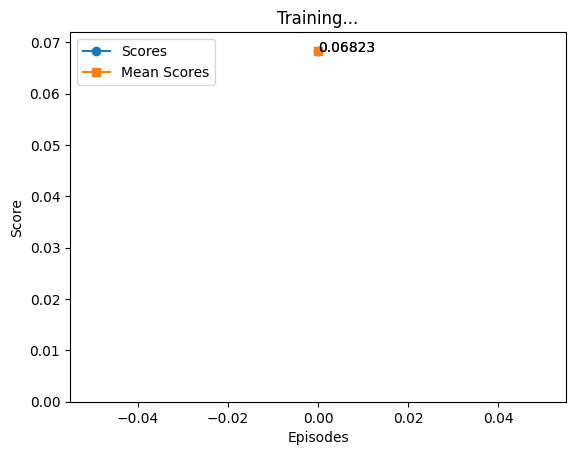

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 0.0757   |
| time/              |          |
|    fps             | 140      |
|    iterations      | 1        |
|    time_elapsed    | 14       |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0599      |
| time/                   |             |
|    fps                  | 169         |
|    iterations           | 2           |
|    time_elapsed         | 24          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014513239 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | 0.825       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00538    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0107     |
|    value_loss           | 0.00423     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0559      |
| time/                   |             |
|    fps                  | 186         |
|    iterations           | 3           |
|    time_elapsed         | 32          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.010933641 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.92       |
|    explained_variance   | 0.81        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0159     |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.013      |
|    value_loss           | 0.00181     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0664      |
| time/                   |             |
|    fps                  | 173         |
|    iterations           | 4           |
|    time_elapsed         | 47          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.011288373 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.91       |
|    explained_variance   | 0.0763      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0358     |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 0.000561    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 181         |
|    iterations           | 5           |
|    time_elapsed         | 56          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.011662941 |
|    clip_fraction        | 0.124       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.9        |
|    explained_variance   | 0.0461      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0247     |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0131     |
|    value_loss           | 0.000191    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0672      |
| time/                   |             |
|    fps                  | 190         |
|    iterations           | 6           |
|    time_elapsed         | 64          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.009242712 |
|    clip_fraction        | 0.0944      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.88       |
|    explained_variance   | 0.679       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.000398    |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0121     |
|    value_loss           | 0.00011     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0576      |
| time/                   |             |
|    fps                  | 193         |
|    iterations           | 7           |
|    time_elapsed         | 74          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.014020514 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.88       |
|    explained_variance   | -0.872      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0264     |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 0.000111    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0504      |
| time/                   |             |
|    fps                  | 198         |
|    iterations           | 8           |
|    time_elapsed         | 82          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.010340257 |
|    clip_fraction        | 0.0998      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.87       |
|    explained_variance   | -3.55       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00831     |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.00703    |
|    value_loss           | 6.97e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.055       |
| time/                   |             |
|    fps                  | 202         |
|    iterations           | 9           |
|    time_elapsed         | 91          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.012868185 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.86       |
|    explained_variance   | -0.334      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0202      |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0101     |
|    value_loss           | 7.96e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0544      |
| time/                   |             |
|    fps                  | 204         |
|    iterations           | 10          |
|    time_elapsed         | 100         |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.012615733 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.85       |
|    explained_variance   | -0.917      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0105      |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 6.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0578      |
| time/                   |             |
|    fps                  | 208         |
|    iterations           | 11          |
|    time_elapsed         | 108         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.009828052 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.81       |
|    explained_variance   | 0.382       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0482     |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0103     |
|    value_loss           | 4.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0611     |
| time/                   |            |
|    fps                  | 209        |
|    iterations           | 12         |
|    time_elapsed         | 117        |
|    total_timesteps      | 24576      |
| train/                  |            |
|    approx_kl            | 0.00835955 |
|    clip_fraction        | 0.0966     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.83      |
|    explained_variance   | -0.23      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0303    |
|    n_updates            | 110        |
|    policy_gradient_loss | -0.00753   |
|    value_loss           | 6.06e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0564      |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 13          |
|    time_elapsed         | 126         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.014405183 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.84       |
|    explained_variance   | 0.826       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0156     |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0126     |
|    value_loss           | 3.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0524      |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 14          |
|    time_elapsed         | 135         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.011280853 |
|    clip_fraction        | 0.0938      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | -0.796      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0541     |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0151     |
|    value_loss           | 6.38e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0489      |
| time/                   |             |
|    fps                  | 207         |
|    iterations           | 15          |
|    time_elapsed         | 148         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.008595053 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | -12.3       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0197     |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.0161     |
|    value_loss           | 4.36e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0489      |
| time/                   |             |
|    fps                  | 207         |
|    iterations           | 16          |
|    time_elapsed         | 157         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.008546525 |
|    clip_fraction        | 0.0793      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | -0.437      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0173     |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.00994    |
|    value_loss           | 0.000101    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0488      |
| time/                   |             |
|    fps                  | 208         |
|    iterations           | 17          |
|    time_elapsed         | 166         |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.013693675 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.8        |
|    explained_variance   | -0.994      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0329     |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 9.46e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0461      |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 18          |
|    time_elapsed         | 176         |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.011927692 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | 0.502       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0558     |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 9.25e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0437      |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 19          |
|    time_elapsed         | 184         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.014294189 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.8        |
|    explained_variance   | -4.14       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0302     |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 1.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0462      |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 20          |
|    time_elapsed         | 193         |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.017315023 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | -1.51       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0408      |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0103     |
|    value_loss           | 6e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0453     |
| time/                   |            |
|    fps                  | 210        |
|    iterations           | 21         |
|    time_elapsed         | 204        |
|    total_timesteps      | 43008      |
| train/                  |            |
|    approx_kl            | 0.01896434 |
|    clip_fraction        | 0.157      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.77      |
|    explained_variance   | 0.176      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0403    |
|    n_updates            | 200        |
|    policy_gradient_loss | -0.0141    |
|    value_loss           | 6.92e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0433      |
| time/                   |             |
|    fps                  | 212         |
|    iterations           | 22          |
|    time_elapsed         | 212         |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.015063388 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | -1.62       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0245     |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.0111     |
|    value_loss           | 1.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0448      |
| time/                   |             |
|    fps                  | 212         |
|    iterations           | 23          |
|    time_elapsed         | 221         |
|    total_timesteps      | 47104       |
| train/                  |             |
|    approx_kl            | 0.018006198 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | -1.38       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0127      |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 8.65e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0462      |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 24          |
|    time_elapsed         | 233         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.009519735 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.73       |
|    explained_variance   | -2.03       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0173     |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 0.000182    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0444      |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 25          |
|    time_elapsed         | 244         |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.013289109 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | -0.342      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0274     |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 0.000119    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0461      |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 26          |
|    time_elapsed         | 253         |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.015706923 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.65       |
|    explained_variance   | -1.54       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0431     |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 7.06e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0444     |
| time/                   |            |
|    fps                  | 210        |
|    iterations           | 27         |
|    time_elapsed         | 263        |
|    total_timesteps      | 55296      |
| train/                  |            |
|    approx_kl            | 0.01658361 |
|    clip_fraction        | 0.16       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.68      |
|    explained_variance   | -2.33      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0393    |
|    n_updates            | 260        |
|    policy_gradient_loss | -0.0192    |
|    value_loss           | 0.000109   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0428     |
| time/                   |            |
|    fps                  | 211        |
|    iterations           | 28         |
|    time_elapsed         | 271        |
|    total_timesteps      | 57344      |
| train/                  |            |
|    approx_kl            | 0.01748979 |
|    clip_fraction        | 0.138      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.59      |
|    explained_variance   | -1.09      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0182     |
|    n_updates            | 270        |
|    policy_gradient_loss | -0.0132    |
|    value_loss           | 0.000122   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0423      |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 29          |
|    time_elapsed         | 281         |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.020608265 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | -1.24       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0306     |
|    n_updates            | 280         |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 2.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0425      |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 30          |
|    time_elapsed         | 291         |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.017761197 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | -0.296      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00444     |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.019      |
|    value_loss           | 8.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0412     |
| time/                   |            |
|    fps                  | 210        |
|    iterations           | 31         |
|    time_elapsed         | 301        |
|    total_timesteps      | 63488      |
| train/                  |            |
|    approx_kl            | 0.01550457 |
|    clip_fraction        | 0.129      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.45      |
|    explained_variance   | -3.11      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0134    |
|    n_updates            | 300        |
|    policy_gradient_loss | -0.0158    |
|    value_loss           | 0.000109   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0399      |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 32          |
|    time_elapsed         | 312         |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.023559824 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.5        |
|    explained_variance   | -1.61       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0108      |
|    n_updates            | 310         |
|    policy_gradient_loss | -0.0209     |
|    value_loss           | 1.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0401      |
| time/                   |             |
|    fps                  | 208         |
|    iterations           | 33          |
|    time_elapsed         | 323         |
|    total_timesteps      | 67584       |
| train/                  |             |
|    approx_kl            | 0.017401915 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | -5.62       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0099     |
|    n_updates            | 320         |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 1.24e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0403      |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 34          |
|    time_elapsed         | 332         |
|    total_timesteps      | 69632       |
| train/                  |             |
|    approx_kl            | 0.034745414 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | -1.42       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0628     |
|    n_updates            | 330         |
|    policy_gradient_loss | -0.013      |
|    value_loss           | 0.000149    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0416     |
| time/                   |            |
|    fps                  | 209        |
|    iterations           | 35         |
|    time_elapsed         | 341        |
|    total_timesteps      | 71680      |
| train/                  |            |
|    approx_kl            | 0.02033153 |
|    clip_fraction        | 0.242      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.7       |
|    explained_variance   | -0.897     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0361    |
|    n_updates            | 340        |
|    policy_gradient_loss | -0.0218    |
|    value_loss           | 5.99e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0429     |
| time/                   |            |
|    fps                  | 209        |
|    iterations           | 36         |
|    time_elapsed         | 351        |
|    total_timesteps      | 73728      |
| train/                  |            |
|    approx_kl            | 0.01453111 |
|    clip_fraction        | 0.138      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.63      |
|    explained_variance   | -1.4       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00199   |
|    n_updates            | 350        |
|    policy_gradient_loss | -0.0184    |
|    value_loss           | 5.22e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.043       |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 37          |
|    time_elapsed         | 360         |
|    total_timesteps      | 75776       |
| train/                  |             |
|    approx_kl            | 0.016143903 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.63       |
|    explained_variance   | 0.0295      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0465     |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 4.8e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.043       |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 38          |
|    time_elapsed         | 369         |
|    total_timesteps      | 77824       |
| train/                  |             |
|    approx_kl            | 0.015544015 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | -1.99       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0434     |
|    n_updates            | 370         |
|    policy_gradient_loss | -0.0217     |
|    value_loss           | 4.79e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0486      |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 39          |
|    time_elapsed         | 379         |
|    total_timesteps      | 79872       |
| train/                  |             |
|    approx_kl            | 0.013378978 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | -0.447      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0149     |
|    n_updates            | 380         |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 4.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0482      |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 40          |
|    time_elapsed         | 389         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.020270336 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.49       |
|    explained_variance   | -0.198      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0491     |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.0223     |
|    value_loss           | 0.000628    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0471      |
| time/                   |             |
|    fps                  | 210         |
|    iterations           | 41          |
|    time_elapsed         | 398         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.022231355 |
|    clip_fraction        | 0.257       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.59       |
|    explained_variance   | -1.01       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0157     |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0287     |
|    value_loss           | 2.03e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0466      |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 42          |
|    time_elapsed         | 407         |
|    total_timesteps      | 86016       |
| train/                  |             |
|    approx_kl            | 0.011870887 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.48       |
|    explained_variance   | -0.26       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0224     |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 2.64e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0467      |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 43          |
|    time_elapsed         | 416         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.018432833 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | -0.584      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0478     |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.0273     |
|    value_loss           | 2.98e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0532      |
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 44          |
|    time_elapsed         | 425         |
|    total_timesteps      | 90112       |
| train/                  |             |
|    approx_kl            | 0.012342192 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | -0.436      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0084     |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 7.25e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0525      |
| time/                   |             |
|    fps                  | 212         |
|    iterations           | 45          |
|    time_elapsed         | 434         |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.020906895 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.58       |
|    explained_variance   | -0.0252     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0429     |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 0.000978    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0528      |
| time/                   |             |
|    fps                  | 212         |
|    iterations           | 46          |
|    time_elapsed         | 443         |
|    total_timesteps      | 94208       |
| train/                  |             |
|    approx_kl            | 0.019162321 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.39       |
|    explained_variance   | -0.0324     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0289     |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.0293     |
|    value_loss           | 7.56e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0517     |
| time/                   |            |
|    fps                  | 212        |
|    iterations           | 47         |
|    time_elapsed         | 452        |
|    total_timesteps      | 96256      |
| train/                  |            |
|    approx_kl            | 0.01920114 |
|    clip_fraction        | 0.218      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.52      |
|    explained_variance   | -0.0777    |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0441    |
|    n_updates            | 460        |
|    policy_gradient_loss | -0.0247    |
|    value_loss           | 2.18e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0523    |
| time/                   |           |
|    fps                  | 212       |
|    iterations           | 48        |
|    time_elapsed         | 462       |
|    total_timesteps      | 98304     |
| train/                  |           |
|    approx_kl            | 0.0203023 |
|    clip_fraction        | 0.191     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.51     |
|    explained_variance   | -0.556    |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0338   |
|    n_updates            | 470       |
|    policy_gradient_loss | -0.0219   |
|    value_loss           | 3.92e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0522      |
| time/                   |             |
|    fps                  | 212         |
|    iterations           | 49          |
|    time_elapsed         | 471         |
|    total_timesteps      | 100352      |
| train/                  |             |
|    approx_kl            | 0.013910925 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | -0.163      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.021      |
|    n_updates            | 480         |
|    policy_gradient_loss | -0.0222     |
|    value_loss           | 2.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0515     |
| time/                   |            |
|    fps                  | 213        |
|    iterations           | 50         |
|    time_elapsed         | 480        |
|    total_timesteps      | 102400     |
| train/                  |            |
|    approx_kl            | 0.01508562 |
|    clip_fraction        | 0.168      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.42      |
|    explained_variance   | -0.336     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0314    |
|    n_updates            | 490        |
|    policy_gradient_loss | -0.0216    |
|    value_loss           | 7.01e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0523      |
| time/                   |             |
|    fps                  | 213         |
|    iterations           | 51          |
|    time_elapsed         | 489         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.016889095 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | -0.363      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0289     |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 4.65e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0527    |
| time/                   |           |
|    fps                  | 213       |
|    iterations           | 52        |
|    time_elapsed         | 498       |
|    total_timesteps      | 106496    |
| train/                  |           |
|    approx_kl            | 0.0161477 |
|    clip_fraction        | 0.173     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.47     |
|    explained_variance   | -0.0721   |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0377   |
|    n_updates            | 510       |
|    policy_gradient_loss | -0.0226   |
|    value_loss           | 2.53e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0517      |
| time/                   |             |
|    fps                  | 213         |
|    iterations           | 53          |
|    time_elapsed         | 507         |
|    total_timesteps      | 108544      |
| train/                  |             |
|    approx_kl            | 0.016669277 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | 0.25        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0164     |
|    n_updates            | 520         |
|    policy_gradient_loss | -0.02       |
|    value_loss           | 3.06e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0505      |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 54          |
|    time_elapsed         | 516         |
|    total_timesteps      | 110592      |
| train/                  |             |
|    approx_kl            | 0.018644348 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | 0.415       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0495     |
|    n_updates            | 530         |
|    policy_gradient_loss | -0.019      |
|    value_loss           | 3.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0505      |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 55          |
|    time_elapsed         | 524         |
|    total_timesteps      | 112640      |
| train/                  |             |
|    approx_kl            | 0.018924989 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | -0.0455     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0322     |
|    n_updates            | 540         |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 4.99e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0523     |
| time/                   |            |
|    fps                  | 214        |
|    iterations           | 56         |
|    time_elapsed         | 534        |
|    total_timesteps      | 114688     |
| train/                  |            |
|    approx_kl            | 0.01674753 |
|    clip_fraction        | 0.18       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.54      |
|    explained_variance   | -0.418     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0346    |
|    n_updates            | 550        |
|    policy_gradient_loss | -0.0145    |
|    value_loss           | 4.22e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0542      |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 57          |
|    time_elapsed         | 543         |
|    total_timesteps      | 116736      |
| train/                  |             |
|    approx_kl            | 0.016436081 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 0.181       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0287     |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 5.36e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0544      |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 58          |
|    time_elapsed         | 551         |
|    total_timesteps      | 118784      |
| train/                  |             |
|    approx_kl            | 0.019613083 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.47       |
|    explained_variance   | 0.0501      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0215     |
|    n_updates            | 570         |
|    policy_gradient_loss | -0.0206     |
|    value_loss           | 6.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0543      |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 59          |
|    time_elapsed         | 561         |
|    total_timesteps      | 120832      |
| train/                  |             |
|    approx_kl            | 0.014518458 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.35        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0418     |
|    n_updates            | 580         |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 4.51e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0541      |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 60          |
|    time_elapsed         | 569         |
|    total_timesteps      | 122880      |
| train/                  |             |
|    approx_kl            | 0.015520059 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.588       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0334     |
|    n_updates            | 590         |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 4.92e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0535      |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 61          |
|    time_elapsed         | 578         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.027890481 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.588       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.038      |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.0287     |
|    value_loss           | 3.24e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0547      |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 62          |
|    time_elapsed         | 588         |
|    total_timesteps      | 126976      |
| train/                  |             |
|    approx_kl            | 0.020379832 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | 0.648       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0279     |
|    n_updates            | 610         |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 3.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0567      |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 63          |
|    time_elapsed         | 596         |
|    total_timesteps      | 129024      |
| train/                  |             |
|    approx_kl            | 0.021676263 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.583       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.031      |
|    n_updates            | 620         |
|    policy_gradient_loss | -0.0259     |
|    value_loss           | 3.27e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0586      |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 64          |
|    time_elapsed         | 605         |
|    total_timesteps      | 131072      |
| train/                  |             |
|    approx_kl            | 0.017757103 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.387       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0349     |
|    n_updates            | 630         |
|    policy_gradient_loss | -0.0247     |
|    value_loss           | 2.53e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0582      |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 65          |
|    time_elapsed         | 614         |
|    total_timesteps      | 133120      |
| train/                  |             |
|    approx_kl            | 0.019531548 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.357       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0321     |
|    n_updates            | 640         |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 5.38e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0589     |
| time/                   |            |
|    fps                  | 216        |
|    iterations           | 66         |
|    time_elapsed         | 623        |
|    total_timesteps      | 135168     |
| train/                  |            |
|    approx_kl            | 0.01941767 |
|    clip_fraction        | 0.204      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.35      |
|    explained_variance   | 0.667      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0325     |
|    n_updates            | 650        |
|    policy_gradient_loss | -0.0237    |
|    value_loss           | 2.6e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0608      |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 67          |
|    time_elapsed         | 632         |
|    total_timesteps      | 137216      |
| train/                  |             |
|    approx_kl            | 0.014322042 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.574       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0316     |
|    n_updates            | 660         |
|    policy_gradient_loss | -0.0223     |
|    value_loss           | 3.78e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0611      |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 68          |
|    time_elapsed         | 640         |
|    total_timesteps      | 139264      |
| train/                  |             |
|    approx_kl            | 0.016708113 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.568       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.03       |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 1.73e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0614     |
| time/                   |            |
|    fps                  | 217        |
|    iterations           | 69         |
|    time_elapsed         | 649        |
|    total_timesteps      | 141312     |
| train/                  |            |
|    approx_kl            | 0.01994153 |
|    clip_fraction        | 0.211      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.32      |
|    explained_variance   | 0.492      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0325    |
|    n_updates            | 680        |
|    policy_gradient_loss | -0.0205    |
|    value_loss           | 4.38e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0604     |
| time/                   |            |
|    fps                  | 217        |
|    iterations           | 70         |
|    time_elapsed         | 658        |
|    total_timesteps      | 143360     |
| train/                  |            |
|    approx_kl            | 0.01757576 |
|    clip_fraction        | 0.193      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.23      |
|    explained_variance   | 0.475      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0224    |
|    n_updates            | 690        |
|    policy_gradient_loss | -0.028     |
|    value_loss           | 1.27e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0619      |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 71          |
|    time_elapsed         | 667         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.014746146 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | -0.453      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0372     |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.022      |
|    value_loss           | 2.66e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0622      |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 72          |
|    time_elapsed         | 677         |
|    total_timesteps      | 147456      |
| train/                  |             |
|    approx_kl            | 0.022811413 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.157       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0441     |
|    n_updates            | 710         |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 4.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0606      |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 73          |
|    time_elapsed         | 687         |
|    total_timesteps      | 149504      |
| train/                  |             |
|    approx_kl            | 0.020086799 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.428       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0241     |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.0233     |
|    value_loss           | 4.54e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0619      |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 74          |
|    time_elapsed         | 696         |
|    total_timesteps      | 151552      |
| train/                  |             |
|    approx_kl            | 0.019872772 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.0349      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0473     |
|    n_updates            | 730         |
|    policy_gradient_loss | -0.0292     |
|    value_loss           | 2.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0619     |
| time/                   |            |
|    fps                  | 218        |
|    iterations           | 75         |
|    time_elapsed         | 704        |
|    total_timesteps      | 153600     |
| train/                  |            |
|    approx_kl            | 0.01756237 |
|    clip_fraction        | 0.212      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.28      |
|    explained_variance   | 0.387      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0158     |
|    n_updates            | 740        |
|    policy_gradient_loss | -0.0211    |
|    value_loss           | 5.14e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0631      |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 76          |
|    time_elapsed         | 713         |
|    total_timesteps      | 155648      |
| train/                  |             |
|    approx_kl            | 0.016399149 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.385       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0304     |
|    n_updates            | 750         |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 4.12e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.065       |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 77          |
|    time_elapsed         | 722         |
|    total_timesteps      | 157696      |
| train/                  |             |
|    approx_kl            | 0.018618967 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.568       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0404     |
|    n_updates            | 760         |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 2.62e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0659     |
| time/                   |            |
|    fps                  | 218        |
|    iterations           | 78         |
|    time_elapsed         | 731        |
|    total_timesteps      | 159744     |
| train/                  |            |
|    approx_kl            | 0.01784586 |
|    clip_fraction        | 0.203      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.3       |
|    explained_variance   | 0.541      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0596    |
|    n_updates            | 770        |
|    policy_gradient_loss | -0.0262    |
|    value_loss           | 2.9e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0662      |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 79          |
|    time_elapsed         | 740         |
|    total_timesteps      | 161792      |
| train/                  |             |
|    approx_kl            | 0.021614991 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.381       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0279      |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.0226     |
|    value_loss           | 3.67e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.067       |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 80          |
|    time_elapsed         | 748         |
|    total_timesteps      | 163840      |
| train/                  |             |
|    approx_kl            | 0.019122355 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | 0.3         |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00115     |
|    n_updates            | 790         |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 4e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.068       |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 81          |
|    time_elapsed         | 757         |
|    total_timesteps      | 165888      |
| train/                  |             |
|    approx_kl            | 0.018448368 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.297       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0632     |
|    n_updates            | 800         |
|    policy_gradient_loss | -0.0269     |
|    value_loss           | 3.61e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0686     |
| time/                   |            |
|    fps                  | 218        |
|    iterations           | 82         |
|    time_elapsed         | 766        |
|    total_timesteps      | 167936     |
| train/                  |            |
|    approx_kl            | 0.01967537 |
|    clip_fraction        | 0.218      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.29      |
|    explained_variance   | 0.432      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0307    |
|    n_updates            | 810        |
|    policy_gradient_loss | -0.027     |
|    value_loss           | 3.14e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0688      |
| time/                   |             |
|    fps                  | 219         |
|    iterations           | 83          |
|    time_elapsed         | 775         |
|    total_timesteps      | 169984      |
| train/                  |             |
|    approx_kl            | 0.016063642 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.545       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0403     |
|    n_updates            | 820         |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 3.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0688     |
| time/                   |            |
|    fps                  | 219        |
|    iterations           | 84         |
|    time_elapsed         | 784        |
|    total_timesteps      | 172032     |
| train/                  |            |
|    approx_kl            | 0.01602456 |
|    clip_fraction        | 0.191      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.33      |
|    explained_variance   | 0.591      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0442    |
|    n_updates            | 830        |
|    policy_gradient_loss | -0.0178    |
|    value_loss           | 3.29e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0689      |
| time/                   |             |
|    fps                  | 219         |
|    iterations           | 85          |
|    time_elapsed         | 793         |
|    total_timesteps      | 174080      |
| train/                  |             |
|    approx_kl            | 0.017027874 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.549       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0144     |
|    n_updates            | 840         |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 3.51e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0697      |
| time/                   |             |
|    fps                  | 219         |
|    iterations           | 86          |
|    time_elapsed         | 801         |
|    total_timesteps      | 176128      |
| train/                  |             |
|    approx_kl            | 0.018220887 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.434       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0559     |
|    n_updates            | 850         |
|    policy_gradient_loss | -0.027      |
|    value_loss           | 4.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0698     |
| time/                   |            |
|    fps                  | 219        |
|    iterations           | 87         |
|    time_elapsed         | 811        |
|    total_timesteps      | 178176     |
| train/                  |            |
|    approx_kl            | 0.02327612 |
|    clip_fraction        | 0.198      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.17      |
|    explained_variance   | 0.562      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0495     |
|    n_updates            | 860        |
|    policy_gradient_loss | -0.0196    |
|    value_loss           | 4.76e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0668      |
| time/                   |             |
|    fps                  | 219         |
|    iterations           | 88          |
|    time_elapsed         | 819         |
|    total_timesteps      | 180224      |
| train/                  |             |
|    approx_kl            | 0.019208198 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | -0.0153     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.000788   |
|    n_updates            | 870         |
|    policy_gradient_loss | -0.0301     |
|    value_loss           | 2.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0687     |
| time/                   |            |
|    fps                  | 219        |
|    iterations           | 89         |
|    time_elapsed         | 828        |
|    total_timesteps      | 182272     |
| train/                  |            |
|    approx_kl            | 0.01529706 |
|    clip_fraction        | 0.152      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.02      |
|    explained_variance   | 0.702      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0212    |
|    n_updates            | 880        |
|    policy_gradient_loss | -0.0186    |
|    value_loss           | 2.59e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0701      |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 90          |
|    time_elapsed         | 837         |
|    total_timesteps      | 184320      |
| train/                  |             |
|    approx_kl            | 0.027125092 |
|    clip_fraction        | 0.275       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.531       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0475     |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.0353     |
|    value_loss           | 2.11e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0702      |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 91          |
|    time_elapsed         | 846         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.018385494 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.817       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0387     |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 1.71e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 92          |
|    time_elapsed         | 855         |
|    total_timesteps      | 188416      |
| train/                  |             |
|    approx_kl            | 0.019724973 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.247       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0122     |
|    n_updates            | 910         |
|    policy_gradient_loss | -0.0223     |
|    value_loss           | 4.04e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0651      |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 93          |
|    time_elapsed         | 863         |
|    total_timesteps      | 190464      |
| train/                  |             |
|    approx_kl            | 0.019590348 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.336       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00761    |
|    n_updates            | 920         |
|    policy_gradient_loss | -0.0267     |
|    value_loss           | 2.48e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0666      |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 94          |
|    time_elapsed         | 872         |
|    total_timesteps      | 192512      |
| train/                  |             |
|    approx_kl            | 0.021569718 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.482       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0521     |
|    n_updates            | 930         |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 5.86e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.066       |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 95          |
|    time_elapsed         | 881         |
|    total_timesteps      | 194560      |
| train/                  |             |
|    approx_kl            | 0.023221929 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.417       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0495     |
|    n_updates            | 940         |
|    policy_gradient_loss | -0.0254     |
|    value_loss           | 4.06e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0676      |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 96          |
|    time_elapsed         | 890         |
|    total_timesteps      | 196608      |
| train/                  |             |
|    approx_kl            | 0.018958274 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.657       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0594     |
|    n_updates            | 950         |
|    policy_gradient_loss | -0.0203     |
|    value_loss           | 2.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0677      |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 97          |
|    time_elapsed         | 899         |
|    total_timesteps      | 198656      |
| train/                  |             |
|    approx_kl            | 0.018098403 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.374       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.047      |
|    n_updates            | 960         |
|    policy_gradient_loss | -0.0223     |
|    value_loss           | 2.87e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0685      |
| time/                   |             |
|    fps                  | 221         |
|    iterations           | 98          |
|    time_elapsed         | 907         |
|    total_timesteps      | 200704      |
| train/                  |             |
|    approx_kl            | 0.020377573 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.591       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0528     |
|    n_updates            | 970         |
|    policy_gradient_loss | -0.0185     |
|    value_loss           | 2.66e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0696      |
| time/                   |             |
|    fps                  | 221         |
|    iterations           | 99          |
|    time_elapsed         | 917         |
|    total_timesteps      | 202752      |
| train/                  |             |
|    approx_kl            | 0.017793918 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | 0.616       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0341     |
|    n_updates            | 980         |
|    policy_gradient_loss | -0.02       |
|    value_loss           | 3.07e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0689      |
| time/                   |             |
|    fps                  | 221         |
|    iterations           | 100         |
|    time_elapsed         | 925         |
|    total_timesteps      | 204800      |
| train/                  |             |
|    approx_kl            | 0.018943144 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.569       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0301     |
|    n_updates            | 990         |
|    policy_gradient_loss | -0.0226     |
|    value_loss           | 1.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0684     |
| time/                   |            |
|    fps                  | 221        |
|    iterations           | 101        |
|    time_elapsed         | 934        |
|    total_timesteps      | 206848     |
| train/                  |            |
|    approx_kl            | 0.02773634 |
|    clip_fraction        | 0.244      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.32      |
|    explained_variance   | 0.0698     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0241    |
|    n_updates            | 1000       |
|    policy_gradient_loss | -0.0263    |
|    value_loss           | 3.67e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0683    |
| time/                   |           |
|    fps                  | 221       |
|    iterations           | 102       |
|    time_elapsed         | 943       |
|    total_timesteps      | 208896    |
| train/                  |           |
|    approx_kl            | 0.0203522 |
|    clip_fraction        | 0.196     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.24     |
|    explained_variance   | -0.187    |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0468   |
|    n_updates            | 1010      |
|    policy_gradient_loss | -0.0234   |
|    value_loss           | 1.55e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0684      |
| time/                   |             |
|    fps                  | 221         |
|    iterations           | 103         |
|    time_elapsed         | 951         |
|    total_timesteps      | 210944      |
| train/                  |             |
|    approx_kl            | 0.022615016 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.644       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0235     |
|    n_updates            | 1020        |
|    policy_gradient_loss | -0.0254     |
|    value_loss           | 3.76e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0689      |
| time/                   |             |
|    fps                  | 221         |
|    iterations           | 104         |
|    time_elapsed         | 961         |
|    total_timesteps      | 212992      |
| train/                  |             |
|    approx_kl            | 0.027807996 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.481       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0744     |
|    n_updates            | 1030        |
|    policy_gradient_loss | -0.0291     |
|    value_loss           | 1.41e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0681      |
| time/                   |             |
|    fps                  | 221         |
|    iterations           | 105         |
|    time_elapsed         | 970         |
|    total_timesteps      | 215040      |
| train/                  |             |
|    approx_kl            | 0.017569607 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.585       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0451     |
|    n_updates            | 1040        |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 3.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0678     |
| time/                   |            |
|    fps                  | 221        |
|    iterations           | 106        |
|    time_elapsed         | 978        |
|    total_timesteps      | 217088     |
| train/                  |            |
|    approx_kl            | 0.02175423 |
|    clip_fraction        | 0.254      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.32      |
|    explained_variance   | 0.495      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0134     |
|    n_updates            | 1050       |
|    policy_gradient_loss | -0.0223    |
|    value_loss           | 1.96e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0677      |
| time/                   |             |
|    fps                  | 221         |
|    iterations           | 107         |
|    time_elapsed         | 987         |
|    total_timesteps      | 219136      |
| train/                  |             |
|    approx_kl            | 0.021061314 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.65        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0478     |
|    n_updates            | 1060        |
|    policy_gradient_loss | -0.0252     |
|    value_loss           | 3.03e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0676      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 108         |
|    time_elapsed         | 996         |
|    total_timesteps      | 221184      |
| train/                  |             |
|    approx_kl            | 0.024777671 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.678       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0681     |
|    n_updates            | 1070        |
|    policy_gradient_loss | -0.0224     |
|    value_loss           | 2.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0678      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 109         |
|    time_elapsed         | 1005        |
|    total_timesteps      | 223232      |
| train/                  |             |
|    approx_kl            | 0.020697359 |
|    clip_fraction        | 0.232       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.678       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0109     |
|    n_updates            | 1080        |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 3.4e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0681      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 110         |
|    time_elapsed         | 1014        |
|    total_timesteps      | 225280      |
| train/                  |             |
|    approx_kl            | 0.021836117 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.651       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0357     |
|    n_updates            | 1090        |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 3.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0678      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 111         |
|    time_elapsed         | 1022        |
|    total_timesteps      | 227328      |
| train/                  |             |
|    approx_kl            | 0.016310826 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.717       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0419     |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.0287     |
|    value_loss           | 1.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0686      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 112         |
|    time_elapsed         | 1032        |
|    total_timesteps      | 229376      |
| train/                  |             |
|    approx_kl            | 0.022134777 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.678       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00265    |
|    n_updates            | 1110        |
|    policy_gradient_loss | -0.023      |
|    value_loss           | 3.59e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0686      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 113         |
|    time_elapsed         | 1040        |
|    total_timesteps      | 231424      |
| train/                  |             |
|    approx_kl            | 0.021403743 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.722       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.026      |
|    n_updates            | 1120        |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 2.36e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0698     |
| time/                   |            |
|    fps                  | 222        |
|    iterations           | 114        |
|    time_elapsed         | 1049       |
|    total_timesteps      | 233472     |
| train/                  |            |
|    approx_kl            | 0.02030901 |
|    clip_fraction        | 0.185      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.14      |
|    explained_variance   | 0.786      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0488    |
|    n_updates            | 1130       |
|    policy_gradient_loss | -0.0204    |
|    value_loss           | 1.95e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0698     |
| time/                   |            |
|    fps                  | 222        |
|    iterations           | 115        |
|    time_elapsed         | 1058       |
|    total_timesteps      | 235520     |
| train/                  |            |
|    approx_kl            | 0.02301587 |
|    clip_fraction        | 0.236      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.23      |
|    explained_variance   | 0.741      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0193    |
|    n_updates            | 1140       |
|    policy_gradient_loss | -0.0215    |
|    value_loss           | 3.25e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0693     |
| time/                   |            |
|    fps                  | 222        |
|    iterations           | 116        |
|    time_elapsed         | 1066       |
|    total_timesteps      | 237568     |
| train/                  |            |
|    approx_kl            | 0.02246235 |
|    clip_fraction        | 0.232      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.19      |
|    explained_variance   | 0.758      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.045     |
|    n_updates            | 1150       |
|    policy_gradient_loss | -0.0187    |
|    value_loss           | 3.69e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0694      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 117         |
|    time_elapsed         | 1075        |
|    total_timesteps      | 239616      |
| train/                  |             |
|    approx_kl            | 0.023912426 |
|    clip_fraction        | 0.244       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.8         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0413     |
|    n_updates            | 1160        |
|    policy_gradient_loss | -0.027      |
|    value_loss           | 3e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0695      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 118         |
|    time_elapsed         | 1084        |
|    total_timesteps      | 241664      |
| train/                  |             |
|    approx_kl            | 0.026247669 |
|    clip_fraction        | 0.237       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.837       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0653     |
|    n_updates            | 1170        |
|    policy_gradient_loss | -0.0296     |
|    value_loss           | 8.7e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0709      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 119         |
|    time_elapsed         | 1093        |
|    total_timesteps      | 243712      |
| train/                  |             |
|    approx_kl            | 0.021098584 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.805       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0387      |
|    n_updates            | 1180        |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 2.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 120         |
|    time_elapsed         | 1102        |
|    total_timesteps      | 245760      |
| train/                  |             |
|    approx_kl            | 0.023008466 |
|    clip_fraction        | 0.273       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.506       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0178     |
|    n_updates            | 1190        |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 4.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0707      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 121         |
|    time_elapsed         | 1112        |
|    total_timesteps      | 247808      |
| train/                  |             |
|    approx_kl            | 0.020289678 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.895       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.038      |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.0271     |
|    value_loss           | 1.78e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 122         |
|    time_elapsed         | 1121        |
|    total_timesteps      | 249856      |
| train/                  |             |
|    approx_kl            | 0.019173926 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.836       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0471     |
|    n_updates            | 1210        |
|    policy_gradient_loss | -0.0351     |
|    value_loss           | 1.59e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0718      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 123         |
|    time_elapsed         | 1129        |
|    total_timesteps      | 251904      |
| train/                  |             |
|    approx_kl            | 0.019431423 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.844       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0486     |
|    n_updates            | 1220        |
|    policy_gradient_loss | -0.0255     |
|    value_loss           | 1.25e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0719     |
| time/                   |            |
|    fps                  | 223        |
|    iterations           | 124        |
|    time_elapsed         | 1138       |
|    total_timesteps      | 253952     |
| train/                  |            |
|    approx_kl            | 0.02281775 |
|    clip_fraction        | 0.255      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.26      |
|    explained_variance   | 0.653      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0275    |
|    n_updates            | 1230       |
|    policy_gradient_loss | -0.0196    |
|    value_loss           | 3.73e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 125         |
|    time_elapsed         | 1148        |
|    total_timesteps      | 256000      |
| train/                  |             |
|    approx_kl            | 0.020639926 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.891       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00611    |
|    n_updates            | 1240        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 2.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 126         |
|    time_elapsed         | 1156        |
|    total_timesteps      | 258048      |
| train/                  |             |
|    approx_kl            | 0.020240866 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.895       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.04       |
|    n_updates            | 1250        |
|    policy_gradient_loss | -0.0287     |
|    value_loss           | 1.08e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0717      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 127         |
|    time_elapsed         | 1165        |
|    total_timesteps      | 260096      |
| train/                  |             |
|    approx_kl            | 0.024619272 |
|    clip_fraction        | 0.257       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0712     |
|    n_updates            | 1260        |
|    policy_gradient_loss | -0.0323     |
|    value_loss           | 2.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0719      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 128         |
|    time_elapsed         | 1173        |
|    total_timesteps      | 262144      |
| train/                  |             |
|    approx_kl            | 0.023283878 |
|    clip_fraction        | 0.251       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.64        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0398     |
|    n_updates            | 1270        |
|    policy_gradient_loss | -0.0188     |
|    value_loss           | 1.82e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0722      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 129         |
|    time_elapsed         | 1182        |
|    total_timesteps      | 264192      |
| train/                  |             |
|    approx_kl            | 0.023495918 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.883       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0437     |
|    n_updates            | 1280        |
|    policy_gradient_loss | -0.0203     |
|    value_loss           | 2.85e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.072       |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 130         |
|    time_elapsed         | 1191        |
|    total_timesteps      | 266240      |
| train/                  |             |
|    approx_kl            | 0.019863488 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0614     |
|    n_updates            | 1290        |
|    policy_gradient_loss | -0.0324     |
|    value_loss           | 1.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0714      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 131         |
|    time_elapsed         | 1199        |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.022844678 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0548     |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.0276     |
|    value_loss           | 1.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0718      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 132         |
|    time_elapsed         | 1209        |
|    total_timesteps      | 270336      |
| train/                  |             |
|    approx_kl            | 0.023788417 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.843       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0432     |
|    n_updates            | 1310        |
|    policy_gradient_loss | -0.0294     |
|    value_loss           | 2.65e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0737      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 133         |
|    time_elapsed         | 1217        |
|    total_timesteps      | 272384      |
| train/                  |             |
|    approx_kl            | 0.021931332 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.798       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0571     |
|    n_updates            | 1320        |
|    policy_gradient_loss | -0.0224     |
|    value_loss           | 3.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0733      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 134         |
|    time_elapsed         | 1226        |
|    total_timesteps      | 274432      |
| train/                  |             |
|    approx_kl            | 0.021902591 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.36        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0356     |
|    n_updates            | 1330        |
|    policy_gradient_loss | -0.0151     |
|    value_loss           | 0.000173    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0734      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 135         |
|    time_elapsed         | 1235        |
|    total_timesteps      | 276480      |
| train/                  |             |
|    approx_kl            | 0.024204262 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.733       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0264     |
|    n_updates            | 1340        |
|    policy_gradient_loss | -0.0239     |
|    value_loss           | 1.84e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0729      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 136         |
|    time_elapsed         | 1243        |
|    total_timesteps      | 278528      |
| train/                  |             |
|    approx_kl            | 0.031341795 |
|    clip_fraction        | 0.253       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.646       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0382     |
|    n_updates            | 1350        |
|    policy_gradient_loss | -0.0254     |
|    value_loss           | 2.56e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0725      |
| time/                   |             |
|    fps                  | 223         |
|    iterations           | 137         |
|    time_elapsed         | 1252        |
|    total_timesteps      | 280576      |
| train/                  |             |
|    approx_kl            | 0.023745231 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.622       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0432     |
|    n_updates            | 1360        |
|    policy_gradient_loss | -0.0245     |
|    value_loss           | 3.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0721      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 138         |
|    time_elapsed         | 1261        |
|    total_timesteps      | 282624      |
| train/                  |             |
|    approx_kl            | 0.019199332 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.705       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0271     |
|    n_updates            | 1370        |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 2.81e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.072       |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 139         |
|    time_elapsed         | 1270        |
|    total_timesteps      | 284672      |
| train/                  |             |
|    approx_kl            | 0.033336326 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.495       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0306     |
|    n_updates            | 1380        |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 3.54e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0723      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 140         |
|    time_elapsed         | 1279        |
|    total_timesteps      | 286720      |
| train/                  |             |
|    approx_kl            | 0.016600657 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.672       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0302     |
|    n_updates            | 1390        |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 2.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 141         |
|    time_elapsed         | 1287        |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.020349203 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.533       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00538    |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 3.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0725      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 142         |
|    time_elapsed         | 1296        |
|    total_timesteps      | 290816      |
| train/                  |             |
|    approx_kl            | 0.041124456 |
|    clip_fraction        | 0.288       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.388       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0773      |
|    n_updates            | 1410        |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 1.99e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0726      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 143         |
|    time_elapsed         | 1305        |
|    total_timesteps      | 292864      |
| train/                  |             |
|    approx_kl            | 0.020093279 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.48        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0413     |
|    n_updates            | 1420        |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 1.4e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0737      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 144         |
|    time_elapsed         | 1313        |
|    total_timesteps      | 294912      |
| train/                  |             |
|    approx_kl            | 0.027643722 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.779       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0175     |
|    n_updates            | 1430        |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 1.49e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0735     |
| time/                   |            |
|    fps                  | 224        |
|    iterations           | 145        |
|    time_elapsed         | 1323       |
|    total_timesteps      | 296960     |
| train/                  |            |
|    approx_kl            | 0.02698727 |
|    clip_fraction        | 0.25       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.12      |
|    explained_variance   | 0.924      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0166    |
|    n_updates            | 1440       |
|    policy_gradient_loss | -0.0287    |
|    value_loss           | 1.12e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0718      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 146         |
|    time_elapsed         | 1331        |
|    total_timesteps      | 299008      |
| train/                  |             |
|    approx_kl            | 0.024344873 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.935       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0232     |
|    n_updates            | 1450        |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 9.48e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0717      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 147         |
|    time_elapsed         | 1340        |
|    total_timesteps      | 301056      |
| train/                  |             |
|    approx_kl            | 0.029253792 |
|    clip_fraction        | 0.263       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.836       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0464     |
|    n_updates            | 1460        |
|    policy_gradient_loss | -0.0277     |
|    value_loss           | 2.72e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 148         |
|    time_elapsed         | 1349        |
|    total_timesteps      | 303104      |
| train/                  |             |
|    approx_kl            | 0.024858136 |
|    clip_fraction        | 0.242       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.898       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.039      |
|    n_updates            | 1470        |
|    policy_gradient_loss | -0.0312     |
|    value_loss           | 2.04e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0722      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 149         |
|    time_elapsed         | 1358        |
|    total_timesteps      | 305152      |
| train/                  |             |
|    approx_kl            | 0.024562936 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.839       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0701     |
|    n_updates            | 1480        |
|    policy_gradient_loss | -0.0278     |
|    value_loss           | 2.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0748      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 150         |
|    time_elapsed         | 1367        |
|    total_timesteps      | 307200      |
| train/                  |             |
|    approx_kl            | 0.029010475 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.77        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0441     |
|    n_updates            | 1490        |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 3.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0732     |
| time/                   |            |
|    fps                  | 224        |
|    iterations           | 151        |
|    time_elapsed         | 1375       |
|    total_timesteps      | 309248     |
| train/                  |            |
|    approx_kl            | 0.02321808 |
|    clip_fraction        | 0.21       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.983     |
|    explained_variance   | 0.727      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0524    |
|    n_updates            | 1500       |
|    policy_gradient_loss | -0.0158    |
|    value_loss           | 8.14e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0737      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 152         |
|    time_elapsed         | 1384        |
|    total_timesteps      | 311296      |
| train/                  |             |
|    approx_kl            | 0.027450195 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.38        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.075      |
|    n_updates            | 1510        |
|    policy_gradient_loss | -0.0312     |
|    value_loss           | 2.74e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0737      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 153         |
|    time_elapsed         | 1393        |
|    total_timesteps      | 313344      |
| train/                  |             |
|    approx_kl            | 0.024337776 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.939      |
|    explained_variance   | 0.85        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00953    |
|    n_updates            | 1520        |
|    policy_gradient_loss | -0.0226     |
|    value_loss           | 2.07e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0736      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 154         |
|    time_elapsed         | 1402        |
|    total_timesteps      | 315392      |
| train/                  |             |
|    approx_kl            | 0.027832624 |
|    clip_fraction        | 0.281       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.854       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0567     |
|    n_updates            | 1530        |
|    policy_gradient_loss | -0.0269     |
|    value_loss           | 1.83e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0739      |
| time/                   |             |
|    fps                  | 224         |
|    iterations           | 155         |
|    time_elapsed         | 1411        |
|    total_timesteps      | 317440      |
| train/                  |             |
|    approx_kl            | 0.025421279 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | 0.689       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0366     |
|    n_updates            | 1540        |
|    policy_gradient_loss | -0.0184     |
|    value_loss           | 1.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0749      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 156         |
|    time_elapsed         | 1419        |
|    total_timesteps      | 319488      |
| train/                  |             |
|    approx_kl            | 0.021900412 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.866       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0225     |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 1.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0732      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 157         |
|    time_elapsed         | 1428        |
|    total_timesteps      | 321536      |
| train/                  |             |
|    approx_kl            | 0.027554967 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.752       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0502     |
|    n_updates            | 1560        |
|    policy_gradient_loss | -0.0253     |
|    value_loss           | 2.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0727      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 158         |
|    time_elapsed         | 1437        |
|    total_timesteps      | 323584      |
| train/                  |             |
|    approx_kl            | 0.029171709 |
|    clip_fraction        | 0.269       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | -0.484      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0579     |
|    n_updates            | 1570        |
|    policy_gradient_loss | -0.0349     |
|    value_loss           | 1.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0724      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 159         |
|    time_elapsed         | 1446        |
|    total_timesteps      | 325632      |
| train/                  |             |
|    approx_kl            | 0.027365874 |
|    clip_fraction        | 0.283       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.828       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0458     |
|    n_updates            | 1580        |
|    policy_gradient_loss | -0.028      |
|    value_loss           | 2.11e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0723      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 160         |
|    time_elapsed         | 1455        |
|    total_timesteps      | 327680      |
| train/                  |             |
|    approx_kl            | 0.027701398 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.853       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0319     |
|    n_updates            | 1590        |
|    policy_gradient_loss | -0.0362     |
|    value_loss           | 9.56e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0721     |
| time/                   |            |
|    fps                  | 225        |
|    iterations           | 161        |
|    time_elapsed         | 1463       |
|    total_timesteps      | 329728     |
| train/                  |            |
|    approx_kl            | 0.02428275 |
|    clip_fraction        | 0.235      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.24      |
|    explained_variance   | 0.713      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0167     |
|    n_updates            | 1600       |
|    policy_gradient_loss | -0.0137    |
|    value_loss           | 3.91e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 162         |
|    time_elapsed         | 1473        |
|    total_timesteps      | 331776      |
| train/                  |             |
|    approx_kl            | 0.028109178 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.8         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0373     |
|    n_updates            | 1610        |
|    policy_gradient_loss | -0.0283     |
|    value_loss           | 2.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0715      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 163         |
|    time_elapsed         | 1481        |
|    total_timesteps      | 333824      |
| train/                  |             |
|    approx_kl            | 0.023302332 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.898      |
|    explained_variance   | 0.754       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0179      |
|    n_updates            | 1620        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 2.49e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0705      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 164         |
|    time_elapsed         | 1490        |
|    total_timesteps      | 335872      |
| train/                  |             |
|    approx_kl            | 0.029042752 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.905      |
|    explained_variance   | 0.767       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00633    |
|    n_updates            | 1630        |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 2.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0725      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 165         |
|    time_elapsed         | 1499        |
|    total_timesteps      | 337920      |
| train/                  |             |
|    approx_kl            | 0.022661854 |
|    clip_fraction        | 0.238       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.691       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0181     |
|    n_updates            | 1640        |
|    policy_gradient_loss | -0.0293     |
|    value_loss           | 6.49e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.073       |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 166         |
|    time_elapsed         | 1507        |
|    total_timesteps      | 339968      |
| train/                  |             |
|    approx_kl            | 0.025835298 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.201       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0427     |
|    n_updates            | 1650        |
|    policy_gradient_loss | -0.0135     |
|    value_loss           | 0.000293    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0731      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 167         |
|    time_elapsed         | 1517        |
|    total_timesteps      | 342016      |
| train/                  |             |
|    approx_kl            | 0.019314922 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.472       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0108      |
|    n_updates            | 1660        |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 3.57e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 168         |
|    time_elapsed         | 1526        |
|    total_timesteps      | 344064      |
| train/                  |             |
|    approx_kl            | 0.020256981 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.831       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0571     |
|    n_updates            | 1670        |
|    policy_gradient_loss | -0.0176     |
|    value_loss           | 1.9e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0708      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 169         |
|    time_elapsed         | 1536        |
|    total_timesteps      | 346112      |
| train/                  |             |
|    approx_kl            | 0.030351385 |
|    clip_fraction        | 0.248       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.798       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0746     |
|    n_updates            | 1680        |
|    policy_gradient_loss | -0.0347     |
|    value_loss           | 5.84e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0708      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 170         |
|    time_elapsed         | 1545        |
|    total_timesteps      | 348160      |
| train/                  |             |
|    approx_kl            | 0.035313778 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.589       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.043      |
|    n_updates            | 1690        |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 2.54e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0707      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 171         |
|    time_elapsed         | 1554        |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.029562626 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.582       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0391     |
|    n_updates            | 1700        |
|    policy_gradient_loss | -0.0248     |
|    value_loss           | 3.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0695      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 172         |
|    time_elapsed         | 1563        |
|    total_timesteps      | 352256      |
| train/                  |             |
|    approx_kl            | 0.027160792 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.588       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0221     |
|    n_updates            | 1710        |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 2.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0696      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 173         |
|    time_elapsed         | 1572        |
|    total_timesteps      | 354304      |
| train/                  |             |
|    approx_kl            | 0.027510818 |
|    clip_fraction        | 0.268       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.485       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0579     |
|    n_updates            | 1720        |
|    policy_gradient_loss | -0.0316     |
|    value_loss           | 3.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0688     |
| time/                   |            |
|    fps                  | 225        |
|    iterations           | 174        |
|    time_elapsed         | 1580       |
|    total_timesteps      | 356352     |
| train/                  |            |
|    approx_kl            | 0.02477733 |
|    clip_fraction        | 0.214      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.32      |
|    explained_variance   | 0.743      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.042     |
|    n_updates            | 1730       |
|    policy_gradient_loss | -0.0132    |
|    value_loss           | 1.6e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0679      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 175         |
|    time_elapsed         | 1590        |
|    total_timesteps      | 358400      |
| train/                  |             |
|    approx_kl            | 0.022908825 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | -0.103      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0377     |
|    n_updates            | 1740        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 1.83e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0679      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 176         |
|    time_elapsed         | 1598        |
|    total_timesteps      | 360448      |
| train/                  |             |
|    approx_kl            | 0.029168976 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.667       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0559     |
|    n_updates            | 1750        |
|    policy_gradient_loss | -0.027      |
|    value_loss           | 7.15e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0708      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 177         |
|    time_elapsed         | 1607        |
|    total_timesteps      | 362496      |
| train/                  |             |
|    approx_kl            | 0.038575552 |
|    clip_fraction        | 0.276       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.355       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0238     |
|    n_updates            | 1760        |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 1.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0724      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 178         |
|    time_elapsed         | 1616        |
|    total_timesteps      | 364544      |
| train/                  |             |
|    approx_kl            | 0.026646018 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.577       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0249      |
|    n_updates            | 1770        |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 0.000163    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0779      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 179         |
|    time_elapsed         | 1624        |
|    total_timesteps      | 366592      |
| train/                  |             |
|    approx_kl            | 0.028887406 |
|    clip_fraction        | 0.241       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.229       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.006       |
|    n_updates            | 1780        |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 0.00015     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0779      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 180         |
|    time_elapsed         | 1634        |
|    total_timesteps      | 368640      |
| train/                  |             |
|    approx_kl            | 0.028030528 |
|    clip_fraction        | 0.295       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | 0.116       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0045     |
|    n_updates            | 1790        |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 0.000969    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0772      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 181         |
|    time_elapsed         | 1642        |
|    total_timesteps      | 370688      |
| train/                  |             |
|    approx_kl            | 0.026216973 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.349       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0556     |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0259     |
|    value_loss           | 6.39e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0752      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 182         |
|    time_elapsed         | 1651        |
|    total_timesteps      | 372736      |
| train/                  |             |
|    approx_kl            | 0.023586735 |
|    clip_fraction        | 0.256       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | -1.5        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0577     |
|    n_updates            | 1810        |
|    policy_gradient_loss | -0.0294     |
|    value_loss           | 4.08e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0755      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 183         |
|    time_elapsed         | 1660        |
|    total_timesteps      | 374784      |
| train/                  |             |
|    approx_kl            | 0.023338027 |
|    clip_fraction        | 0.236       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.834       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0427     |
|    n_updates            | 1820        |
|    policy_gradient_loss | -0.0239     |
|    value_loss           | 1.62e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0797      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 184         |
|    time_elapsed         | 1668        |
|    total_timesteps      | 376832      |
| train/                  |             |
|    approx_kl            | 0.031160064 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.106       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0309     |
|    n_updates            | 1830        |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 0.000734    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0794      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 185         |
|    time_elapsed         | 1677        |
|    total_timesteps      | 378880      |
| train/                  |             |
|    approx_kl            | 0.021619571 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.438       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0278     |
|    n_updates            | 1840        |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 3.21e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0797      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 186         |
|    time_elapsed         | 1686        |
|    total_timesteps      | 380928      |
| train/                  |             |
|    approx_kl            | 0.028384864 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.62        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0548     |
|    n_updates            | 1850        |
|    policy_gradient_loss | -0.0288     |
|    value_loss           | 1.97e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0807      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 187         |
|    time_elapsed         | 1694        |
|    total_timesteps      | 382976      |
| train/                  |             |
|    approx_kl            | 0.035778023 |
|    clip_fraction        | 0.248       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.591       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0478     |
|    n_updates            | 1860        |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 2.63e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0814     |
| time/                   |            |
|    fps                  | 225        |
|    iterations           | 188        |
|    time_elapsed         | 1704       |
|    total_timesteps      | 385024     |
| train/                  |            |
|    approx_kl            | 0.03248964 |
|    clip_fraction        | 0.291      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.22      |
|    explained_variance   | 0.385      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0243    |
|    n_updates            | 1870       |
|    policy_gradient_loss | -0.0183    |
|    value_loss           | 7.89e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0812      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 189         |
|    time_elapsed         | 1712        |
|    total_timesteps      | 387072      |
| train/                  |             |
|    approx_kl            | 0.028789256 |
|    clip_fraction        | 0.237       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.69        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0418     |
|    n_updates            | 1880        |
|    policy_gradient_loss | -0.0206     |
|    value_loss           | 2.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.082       |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 190         |
|    time_elapsed         | 1722        |
|    total_timesteps      | 389120      |
| train/                  |             |
|    approx_kl            | 0.020322872 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.781       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0615     |
|    n_updates            | 1890        |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 2.74e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0818      |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 191         |
|    time_elapsed         | 1731        |
|    total_timesteps      | 391168      |
| train/                  |             |
|    approx_kl            | 0.025318608 |
|    clip_fraction        | 0.244       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | 0.732       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0344     |
|    n_updates            | 1900        |
|    policy_gradient_loss | -0.0184     |
|    value_loss           | 3.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0817    |
| time/                   |           |
|    fps                  | 226       |
|    iterations           | 192       |
|    time_elapsed         | 1739      |
|    total_timesteps      | 393216    |
| train/                  |           |
|    approx_kl            | 0.0317185 |
|    clip_fraction        | 0.26      |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.34     |
|    explained_variance   | 0.84      |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0321   |
|    n_updates            | 1910      |
|    policy_gradient_loss | -0.0151   |
|    value_loss           | 2.79e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0862      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 193         |
|    time_elapsed         | 1748        |
|    total_timesteps      | 395264      |
| train/                  |             |
|    approx_kl            | 0.027021699 |
|    clip_fraction        | 0.275       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.841       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0554     |
|    n_updates            | 1920        |
|    policy_gradient_loss | -0.0301     |
|    value_loss           | 1.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0871     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 194        |
|    time_elapsed         | 1756       |
|    total_timesteps      | 397312     |
| train/                  |            |
|    approx_kl            | 0.03342573 |
|    clip_fraction        | 0.28       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.13      |
|    explained_variance   | 0.123      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0401    |
|    n_updates            | 1930       |
|    policy_gradient_loss | -0.0139    |
|    value_loss           | 0.000814   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0881      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 195         |
|    time_elapsed         | 1765        |
|    total_timesteps      | 399360      |
| train/                  |             |
|    approx_kl            | 0.031280417 |
|    clip_fraction        | 0.281       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.495       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.048      |
|    n_updates            | 1940        |
|    policy_gradient_loss | -0.0286     |
|    value_loss           | 2.39e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0881      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 196         |
|    time_elapsed         | 1774        |
|    total_timesteps      | 401408      |
| train/                  |             |
|    approx_kl            | 0.027874384 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | -0.000873   |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0626     |
|    n_updates            | 1950        |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 2.91e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0882      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 197         |
|    time_elapsed         | 1783        |
|    total_timesteps      | 403456      |
| train/                  |             |
|    approx_kl            | 0.027308952 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.855       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0451     |
|    n_updates            | 1960        |
|    policy_gradient_loss | -0.0301     |
|    value_loss           | 1.78e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0883      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 198         |
|    time_elapsed         | 1792        |
|    total_timesteps      | 405504      |
| train/                  |             |
|    approx_kl            | 0.017764844 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.12       |
|    explained_variance   | 0.702       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0432     |
|    n_updates            | 1970        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 2.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0872      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 199         |
|    time_elapsed         | 1800        |
|    total_timesteps      | 407552      |
| train/                  |             |
|    approx_kl            | 0.027062593 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0164     |
|    n_updates            | 1980        |
|    policy_gradient_loss | -0.025      |
|    value_loss           | 8.98e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0889      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 200         |
|    time_elapsed         | 1809        |
|    total_timesteps      | 409600      |
| train/                  |             |
|    approx_kl            | 0.023815788 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.782       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0178     |
|    n_updates            | 1990        |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 2.48e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0898      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 201         |
|    time_elapsed         | 1819        |
|    total_timesteps      | 411648      |
| train/                  |             |
|    approx_kl            | 0.018958539 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.836       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0298     |
|    n_updates            | 2000        |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 1.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0897      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 202         |
|    time_elapsed         | 1827        |
|    total_timesteps      | 413696      |
| train/                  |             |
|    approx_kl            | 0.029904246 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.892       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0768     |
|    n_updates            | 2010        |
|    policy_gradient_loss | -0.0303     |
|    value_loss           | 1.66e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0898      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 203         |
|    time_elapsed         | 1837        |
|    total_timesteps      | 415744      |
| train/                  |             |
|    approx_kl            | 0.024798675 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0437     |
|    n_updates            | 2020        |
|    policy_gradient_loss | -0.0268     |
|    value_loss           | 2.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0895     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 204        |
|    time_elapsed         | 1846       |
|    total_timesteps      | 417792     |
| train/                  |            |
|    approx_kl            | 0.02132389 |
|    clip_fraction        | 0.222      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.26      |
|    explained_variance   | 0.842      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0382     |
|    n_updates            | 2030       |
|    policy_gradient_loss | -0.0141    |
|    value_loss           | 2.34e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0891     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 205        |
|    time_elapsed         | 1855       |
|    total_timesteps      | 419840     |
| train/                  |            |
|    approx_kl            | 0.02729194 |
|    clip_fraction        | 0.214      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1         |
|    explained_variance   | 0.908      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0275    |
|    n_updates            | 2040       |
|    policy_gradient_loss | -0.0346    |
|    value_loss           | 1.71e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.09       |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 206        |
|    time_elapsed         | 1864       |
|    total_timesteps      | 421888     |
| train/                  |            |
|    approx_kl            | 0.02269006 |
|    clip_fraction        | 0.239      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.17      |
|    explained_variance   | 0.918      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0645    |
|    n_updates            | 2050       |
|    policy_gradient_loss | -0.0228    |
|    value_loss           | 1.38e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0892      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 207         |
|    time_elapsed         | 1872        |
|    total_timesteps      | 423936      |
| train/                  |             |
|    approx_kl            | 0.029700626 |
|    clip_fraction        | 0.248       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.63        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0728     |
|    n_updates            | 2060        |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 7.94e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0895      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 208         |
|    time_elapsed         | 1882        |
|    total_timesteps      | 425984      |
| train/                  |             |
|    approx_kl            | 0.030520268 |
|    clip_fraction        | 0.265       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.873       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0303     |
|    n_updates            | 2070        |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 2.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0882      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 209         |
|    time_elapsed         | 1891        |
|    total_timesteps      | 428032      |
| train/                  |             |
|    approx_kl            | 0.049716484 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.769       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0316     |
|    n_updates            | 2080        |
|    policy_gradient_loss | -0.0158     |
|    value_loss           | 3.49e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0879     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 210        |
|    time_elapsed         | 1899       |
|    total_timesteps      | 430080     |
| train/                  |            |
|    approx_kl            | 0.02568958 |
|    clip_fraction        | 0.249      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.997     |
|    explained_variance   | -0.998     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0216    |
|    n_updates            | 2090       |
|    policy_gradient_loss | -0.0227    |
|    value_loss           | 5.09e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0882      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 211         |
|    time_elapsed         | 1909        |
|    total_timesteps      | 432128      |
| train/                  |             |
|    approx_kl            | 0.055175748 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | 0.865       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.053      |
|    n_updates            | 2100        |
|    policy_gradient_loss | -0.0298     |
|    value_loss           | 2.79e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0885      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 212         |
|    time_elapsed         | 1917        |
|    total_timesteps      | 434176      |
| train/                  |             |
|    approx_kl            | 0.022767557 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.773       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0251     |
|    n_updates            | 2110        |
|    policy_gradient_loss | -0.0209     |
|    value_loss           | 2.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.09        |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 213         |
|    time_elapsed         | 1926        |
|    total_timesteps      | 436224      |
| train/                  |             |
|    approx_kl            | 0.021392435 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.817       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0228     |
|    n_updates            | 2120        |
|    policy_gradient_loss | -0.0256     |
|    value_loss           | 1.18e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.092      |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 214        |
|    time_elapsed         | 1936       |
|    total_timesteps      | 438272     |
| train/                  |            |
|    approx_kl            | 0.02837159 |
|    clip_fraction        | 0.227      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.17      |
|    explained_variance   | 0.19       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.000824   |
|    n_updates            | 2130       |
|    policy_gradient_loss | -0.0102    |
|    value_loss           | 0.000703   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0918      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 215         |
|    time_elapsed         | 1944        |
|    total_timesteps      | 440320      |
| train/                  |             |
|    approx_kl            | 0.031052377 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.921      |
|    explained_variance   | -1.33       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0535     |
|    n_updates            | 2140        |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 0.000187    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0926    |
| time/                   |           |
|    fps                  | 226       |
|    iterations           | 216       |
|    time_elapsed         | 1954      |
|    total_timesteps      | 442368    |
| train/                  |           |
|    approx_kl            | 0.0312577 |
|    clip_fraction        | 0.256     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.21     |
|    explained_variance   | 0.784     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0574   |
|    n_updates            | 2150      |
|    policy_gradient_loss | -0.0297   |
|    value_loss           | 3.39e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.098       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 217         |
|    time_elapsed         | 1964        |
|    total_timesteps      | 444416      |
| train/                  |             |
|    approx_kl            | 0.024424601 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.825       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0426     |
|    n_updates            | 2160        |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 2.59e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0987      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 218         |
|    time_elapsed         | 1973        |
|    total_timesteps      | 446464      |
| train/                  |             |
|    approx_kl            | 0.021451222 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.793      |
|    explained_variance   | 0.212       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.104       |
|    n_updates            | 2170        |
|    policy_gradient_loss | -0.00872    |
|    value_loss           | 0.000633    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.102       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 219         |
|    time_elapsed         | 1981        |
|    total_timesteps      | 448512      |
| train/                  |             |
|    approx_kl            | 0.024379198 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.998      |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0563     |
|    n_updates            | 2180        |
|    policy_gradient_loss | -0.0256     |
|    value_loss           | 2.2e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.103       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 220         |
|    time_elapsed         | 1990        |
|    total_timesteps      | 450560      |
| train/                  |             |
|    approx_kl            | 0.022721002 |
|    clip_fraction        | 0.195       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.725      |
|    explained_variance   | 0.167       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0489      |
|    n_updates            | 2190        |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 0.000494    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.104       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 221         |
|    time_elapsed         | 2000        |
|    total_timesteps      | 452608      |
| train/                  |             |
|    approx_kl            | 0.040124856 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.965      |
|    explained_variance   | 0.23        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.218       |
|    n_updates            | 2200        |
|    policy_gradient_loss | -0.0267     |
|    value_loss           | 0.000108    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.103       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 222         |
|    time_elapsed         | 2008        |
|    total_timesteps      | 454656      |
| train/                  |             |
|    approx_kl            | 0.034501918 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.773       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.081      |
|    n_updates            | 2210        |
|    policy_gradient_loss | -0.0303     |
|    value_loss           | 2.97e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.104       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 223         |
|    time_elapsed         | 2017        |
|    total_timesteps      | 456704      |
| train/                  |             |
|    approx_kl            | 0.030268896 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.889       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0382     |
|    n_updates            | 2220        |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 1.5e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.106       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 224         |
|    time_elapsed         | 2025        |
|    total_timesteps      | 458752      |
| train/                  |             |
|    approx_kl            | 0.029393662 |
|    clip_fraction        | 0.244       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.688       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0146     |
|    n_updates            | 2230        |
|    policy_gradient_loss | -0.0226     |
|    value_loss           | 2.76e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.106       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 225         |
|    time_elapsed         | 2034        |
|    total_timesteps      | 460800      |
| train/                  |             |
|    approx_kl            | 0.024091661 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.567       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0474     |
|    n_updates            | 2240        |
|    policy_gradient_loss | -0.0132     |
|    value_loss           | 2.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.103       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 226         |
|    time_elapsed         | 2044        |
|    total_timesteps      | 462848      |
| train/                  |             |
|    approx_kl            | 0.020775435 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0129     |
|    n_updates            | 2250        |
|    policy_gradient_loss | -0.024      |
|    value_loss           | 1.71e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.101       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 227         |
|    time_elapsed         | 2052        |
|    total_timesteps      | 464896      |
| train/                  |             |
|    approx_kl            | 0.026355442 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.817       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0373     |
|    n_updates            | 2260        |
|    policy_gradient_loss | -0.0122     |
|    value_loss           | 2.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0967     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 228        |
|    time_elapsed         | 2061       |
|    total_timesteps      | 466944     |
| train/                  |            |
|    approx_kl            | 0.02912291 |
|    clip_fraction        | 0.206      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.09      |
|    explained_variance   | 0.889      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00458    |
|    n_updates            | 2270       |
|    policy_gradient_loss | -0.015     |
|    value_loss           | 1.87e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0974     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 229        |
|    time_elapsed         | 2070       |
|    total_timesteps      | 468992     |
| train/                  |            |
|    approx_kl            | 0.03627481 |
|    clip_fraction        | 0.279      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.971     |
|    explained_variance   | 0.88       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0516    |
|    n_updates            | 2280       |
|    policy_gradient_loss | -0.0325    |
|    value_loss           | 1.87e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0985     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 230        |
|    time_elapsed         | 2079       |
|    total_timesteps      | 471040     |
| train/                  |            |
|    approx_kl            | 0.03568031 |
|    clip_fraction        | 0.227      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.95      |
|    explained_variance   | 0.899      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0158    |
|    n_updates            | 2290       |
|    policy_gradient_loss | -0.0258    |
|    value_loss           | 1.74e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.102       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 231         |
|    time_elapsed         | 2088        |
|    total_timesteps      | 473088      |
| train/                  |             |
|    approx_kl            | 0.024873735 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.87        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0338     |
|    n_updates            | 2300        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 4.65e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0977      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 232         |
|    time_elapsed         | 2096        |
|    total_timesteps      | 475136      |
| train/                  |             |
|    approx_kl            | 0.037457757 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.983      |
|    explained_variance   | 0.361       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0825     |
|    n_updates            | 2310        |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 0.000204    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0967      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 233         |
|    time_elapsed         | 2105        |
|    total_timesteps      | 477184      |
| train/                  |             |
|    approx_kl            | 0.030822417 |
|    clip_fraction        | 0.265       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | -0.6        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0374     |
|    n_updates            | 2320        |
|    policy_gradient_loss | -0.0295     |
|    value_loss           | 9.76e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0968     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 234        |
|    time_elapsed         | 2114       |
|    total_timesteps      | 479232     |
| train/                  |            |
|    approx_kl            | 0.02485023 |
|    clip_fraction        | 0.232      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.26      |
|    explained_variance   | -0.000931  |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0361    |
|    n_updates            | 2330       |
|    policy_gradient_loss | -0.0197    |
|    value_loss           | 5.31e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0966      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 235         |
|    time_elapsed         | 2123        |
|    total_timesteps      | 481280      |
| train/                  |             |
|    approx_kl            | 0.028524876 |
|    clip_fraction        | 0.279       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.187       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0102     |
|    n_updates            | 2340        |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 3.71e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0959      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 236         |
|    time_elapsed         | 2132        |
|    total_timesteps      | 483328      |
| train/                  |             |
|    approx_kl            | 0.024251647 |
|    clip_fraction        | 0.252       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.146       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0318     |
|    n_updates            | 2350        |
|    policy_gradient_loss | -0.0256     |
|    value_loss           | 5.56e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0957      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 237         |
|    time_elapsed         | 2141        |
|    total_timesteps      | 485376      |
| train/                  |             |
|    approx_kl            | 0.051778287 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.54        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0456     |
|    n_updates            | 2360        |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 3.85e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0961      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 238         |
|    time_elapsed         | 2150        |
|    total_timesteps      | 487424      |
| train/                  |             |
|    approx_kl            | 0.029261876 |
|    clip_fraction        | 0.278       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | -0.42       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0478     |
|    n_updates            | 2370        |
|    policy_gradient_loss | -0.0206     |
|    value_loss           | 3.7e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0962      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 239         |
|    time_elapsed         | 2159        |
|    total_timesteps      | 489472      |
| train/                  |             |
|    approx_kl            | 0.029211342 |
|    clip_fraction        | 0.234       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.12       |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0519     |
|    n_updates            | 2380        |
|    policy_gradient_loss | -0.0206     |
|    value_loss           | 1.63e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0954      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 240         |
|    time_elapsed         | 2167        |
|    total_timesteps      | 491520      |
| train/                  |             |
|    approx_kl            | 0.019420743 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.948      |
|    explained_variance   | 0.911       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0405     |
|    n_updates            | 2390        |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 8.1e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0944     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 241        |
|    time_elapsed         | 2177       |
|    total_timesteps      | 493568     |
| train/                  |            |
|    approx_kl            | 0.03177492 |
|    clip_fraction        | 0.202      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.996     |
|    explained_variance   | 0.844      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0739    |
|    n_updates            | 2400       |
|    policy_gradient_loss | -0.0312    |
|    value_loss           | 2.52e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0897     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 242        |
|    time_elapsed         | 2185       |
|    total_timesteps      | 495616     |
| train/                  |            |
|    approx_kl            | 0.02897354 |
|    clip_fraction        | 0.235      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.08      |
|    explained_variance   | 0.884      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.000478   |
|    n_updates            | 2410       |
|    policy_gradient_loss | -0.0245    |
|    value_loss           | 1.27e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0887      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 243         |
|    time_elapsed         | 2194        |
|    total_timesteps      | 497664      |
| train/                  |             |
|    approx_kl            | 0.026201667 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.848       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0516     |
|    n_updates            | 2420        |
|    policy_gradient_loss | -0.0256     |
|    value_loss           | 8.6e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0875     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 244        |
|    time_elapsed         | 2203       |
|    total_timesteps      | 499712     |
| train/                  |            |
|    approx_kl            | 0.02740865 |
|    clip_fraction        | 0.258      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.18      |
|    explained_variance   | 0.87       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0239    |
|    n_updates            | 2430       |
|    policy_gradient_loss | -0.0273    |
|    value_loss           | 1.41e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0859     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 245        |
|    time_elapsed         | 2211       |
|    total_timesteps      | 501760     |
| train/                  |            |
|    approx_kl            | 0.02332953 |
|    clip_fraction        | 0.217      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.13      |
|    explained_variance   | 0.877      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0308    |
|    n_updates            | 2440       |
|    policy_gradient_loss | -0.023     |
|    value_loss           | 1.14e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0847      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 246         |
|    time_elapsed         | 2221        |
|    total_timesteps      | 503808      |
| train/                  |             |
|    approx_kl            | 0.024197744 |
|    clip_fraction        | 0.251       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.072       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0449     |
|    n_updates            | 2450        |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 1.91e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0827      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 247         |
|    time_elapsed         | 2229        |
|    total_timesteps      | 505856      |
| train/                  |             |
|    approx_kl            | 0.020543888 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.895       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0146     |
|    n_updates            | 2460        |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 3.54e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.083       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 248         |
|    time_elapsed         | 2238        |
|    total_timesteps      | 507904      |
| train/                  |             |
|    approx_kl            | 0.035254337 |
|    clip_fraction        | 0.253       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.741       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0372     |
|    n_updates            | 2470        |
|    policy_gradient_loss | -0.0185     |
|    value_loss           | 3.52e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0817      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 249         |
|    time_elapsed         | 2247        |
|    total_timesteps      | 509952      |
| train/                  |             |
|    approx_kl            | 0.036693618 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.652       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0241     |
|    n_updates            | 2480        |
|    policy_gradient_loss | -0.0369     |
|    value_loss           | 2.53e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0806      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 250         |
|    time_elapsed         | 2256        |
|    total_timesteps      | 512000      |
| train/                  |             |
|    approx_kl            | 0.027050633 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | -0.0236     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0434     |
|    n_updates            | 2490        |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 6.35e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0803      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 251         |
|    time_elapsed         | 2265        |
|    total_timesteps      | 514048      |
| train/                  |             |
|    approx_kl            | 0.022054203 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.782       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00721     |
|    n_updates            | 2500        |
|    policy_gradient_loss | -0.019      |
|    value_loss           | 1.35e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.08        |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 252         |
|    time_elapsed         | 2274        |
|    total_timesteps      | 516096      |
| train/                  |             |
|    approx_kl            | 0.026737379 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.168       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0477     |
|    n_updates            | 2510        |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 7.5e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0793      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 253         |
|    time_elapsed         | 2283        |
|    total_timesteps      | 518144      |
| train/                  |             |
|    approx_kl            | 0.018272383 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.453       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0111     |
|    n_updates            | 2520        |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 3.08e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0794      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 254         |
|    time_elapsed         | 2292        |
|    total_timesteps      | 520192      |
| train/                  |             |
|    approx_kl            | 0.023588123 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.214       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.017      |
|    n_updates            | 2530        |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 5.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0833      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 255         |
|    time_elapsed         | 2300        |
|    total_timesteps      | 522240      |
| train/                  |             |
|    approx_kl            | 0.029487565 |
|    clip_fraction        | 0.278       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.488       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0574     |
|    n_updates            | 2540        |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 1.21e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0841      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 256         |
|    time_elapsed         | 2309        |
|    total_timesteps      | 524288      |
| train/                  |             |
|    approx_kl            | 0.033867314 |
|    clip_fraction        | 0.363       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.114       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0298     |
|    n_updates            | 2550        |
|    policy_gradient_loss | -0.0135     |
|    value_loss           | 0.000234    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.084       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 257         |
|    time_elapsed         | 2318        |
|    total_timesteps      | 526336      |
| train/                  |             |
|    approx_kl            | 0.027749788 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | -0.872      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.015      |
|    n_updates            | 2560        |
|    policy_gradient_loss | -0.0269     |
|    value_loss           | 6.72e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.088       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 258         |
|    time_elapsed         | 2327        |
|    total_timesteps      | 528384      |
| train/                  |             |
|    approx_kl            | 0.017501403 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.888      |
|    explained_variance   | 0.824       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0219     |
|    n_updates            | 2570        |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 2.15e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0902      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 259         |
|    time_elapsed         | 2336        |
|    total_timesteps      | 530432      |
| train/                  |             |
|    approx_kl            | 0.026409218 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.487       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00338     |
|    n_updates            | 2580        |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 0.000157    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0903      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 260         |
|    time_elapsed         | 2344        |
|    total_timesteps      | 532480      |
| train/                  |             |
|    approx_kl            | 0.033769395 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.12       |
|    explained_variance   | 0.596       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00818     |
|    n_updates            | 2590        |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 9.6e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0898      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 261         |
|    time_elapsed         | 2353        |
|    total_timesteps      | 534528      |
| train/                  |             |
|    approx_kl            | 0.018837644 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.0594      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0159      |
|    n_updates            | 2600        |
|    policy_gradient_loss | -0.0132     |
|    value_loss           | 0.000415    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0905      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 262         |
|    time_elapsed         | 2362        |
|    total_timesteps      | 536576      |
| train/                  |             |
|    approx_kl            | 0.042996652 |
|    clip_fraction        | 0.306       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.442       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0618     |
|    n_updates            | 2610        |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 8.79e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0897      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 263         |
|    time_elapsed         | 2373        |
|    total_timesteps      | 538624      |
| train/                  |             |
|    approx_kl            | 0.033587076 |
|    clip_fraction        | 0.254       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.000231    |
|    learning_rate        | 0.0003      |
|    loss                 | -0.039      |
|    n_updates            | 2620        |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 0.000184    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0923      |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 264         |
|    time_elapsed         | 2382        |
|    total_timesteps      | 540672      |
| train/                  |             |
|    approx_kl            | 0.045804463 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.12       |
|    explained_variance   | 0.157       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0251      |
|    n_updates            | 2630        |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 0.000891    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0918     |
| time/                   |            |
|    fps                  | 226        |
|    iterations           | 265        |
|    time_elapsed         | 2391       |
|    total_timesteps      | 542720     |
| train/                  |            |
|    approx_kl            | 0.02740863 |
|    clip_fraction        | 0.219      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.15      |
|    explained_variance   | 0.184      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0736    |
|    n_updates            | 2640       |
|    policy_gradient_loss | -0.0398    |
|    value_loss           | 5.05e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.086       |
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 266         |
|    time_elapsed         | 2400        |
|    total_timesteps      | 544768      |
| train/                  |             |
|    approx_kl            | 0.035694752 |
|    clip_fraction        | 0.263       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.777       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0382     |
|    n_updates            | 2650        |
|    policy_gradient_loss | -0.0295     |
|    value_loss           | 1.99e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0852      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 267         |
|    time_elapsed         | 2408        |
|    total_timesteps      | 546816      |
| train/                  |             |
|    approx_kl            | 0.032523163 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | -0.653      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0437     |
|    n_updates            | 2660        |
|    policy_gradient_loss | -0.0299     |
|    value_loss           | 6.45e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0859     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 268        |
|    time_elapsed         | 2417       |
|    total_timesteps      | 548864     |
| train/                  |            |
|    approx_kl            | 0.03863295 |
|    clip_fraction        | 0.226      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.04      |
|    explained_variance   | 0.481      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.03       |
|    n_updates            | 2670       |
|    policy_gradient_loss | -0.0144    |
|    value_loss           | 2.43e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0856     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 269        |
|    time_elapsed         | 2426       |
|    total_timesteps      | 550912     |
| train/                  |            |
|    approx_kl            | 0.03635855 |
|    clip_fraction        | 0.217      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.984     |
|    explained_variance   | 0.0782     |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0224     |
|    n_updates            | 2680       |
|    policy_gradient_loss | -0.0161    |
|    value_loss           | 0.000776   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0866      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 270         |
|    time_elapsed         | 2435        |
|    total_timesteps      | 552960      |
| train/                  |             |
|    approx_kl            | 0.034533944 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.985      |
|    explained_variance   | 0.347       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0846     |
|    n_updates            | 2690        |
|    policy_gradient_loss | -0.022      |
|    value_loss           | 5.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0891      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 271         |
|    time_elapsed         | 2444        |
|    total_timesteps      | 555008      |
| train/                  |             |
|    approx_kl            | 0.064153366 |
|    clip_fraction        | 0.301       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.449       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00653    |
|    n_updates            | 2700        |
|    policy_gradient_loss | -0.028      |
|    value_loss           | 3.48e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0885      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 272         |
|    time_elapsed         | 2452        |
|    total_timesteps      | 557056      |
| train/                  |             |
|    approx_kl            | 0.025289403 |
|    clip_fraction        | 0.271       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.094       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0113      |
|    n_updates            | 2710        |
|    policy_gradient_loss | -0.0161     |
|    value_loss           | 0.000313    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.088       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 273         |
|    time_elapsed         | 2461        |
|    total_timesteps      | 559104      |
| train/                  |             |
|    approx_kl            | 0.021588143 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.714       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0153     |
|    n_updates            | 2720        |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 3.39e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0873      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 274         |
|    time_elapsed         | 2470        |
|    total_timesteps      | 561152      |
| train/                  |             |
|    approx_kl            | 0.026262075 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0197     |
|    n_updates            | 2730        |
|    policy_gradient_loss | -0.0234     |
|    value_loss           | 3.89e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0905    |
| time/                   |           |
|    fps                  | 227       |
|    iterations           | 275       |
|    time_elapsed         | 2479      |
|    total_timesteps      | 563200    |
| train/                  |           |
|    approx_kl            | 0.0251657 |
|    clip_fraction        | 0.254     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1        |
|    explained_variance   | 0.675     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0436   |
|    n_updates            | 2740      |
|    policy_gradient_loss | -0.0259   |
|    value_loss           | 3.78e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0905     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 276        |
|    time_elapsed         | 2488       |
|    total_timesteps      | 565248     |
| train/                  |            |
|    approx_kl            | 0.03104088 |
|    clip_fraction        | 0.28       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.07      |
|    explained_variance   | -0.00294   |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0466    |
|    n_updates            | 2750       |
|    policy_gradient_loss | -0.0196    |
|    value_loss           | 0.000528   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0901      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 277         |
|    time_elapsed         | 2496        |
|    total_timesteps      | 567296      |
| train/                  |             |
|    approx_kl            | 0.041244887 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | -0.524      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0407     |
|    n_updates            | 2760        |
|    policy_gradient_loss | -0.0231     |
|    value_loss           | 3.65e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0883      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 278         |
|    time_elapsed         | 2505        |
|    total_timesteps      | 569344      |
| train/                  |             |
|    approx_kl            | 0.039564192 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.882       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0598     |
|    n_updates            | 2770        |
|    policy_gradient_loss | -0.0316     |
|    value_loss           | 1.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0876      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 279         |
|    time_elapsed         | 2515        |
|    total_timesteps      | 571392      |
| train/                  |             |
|    approx_kl            | 0.031722263 |
|    clip_fraction        | 0.286       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | -5.46       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0338     |
|    n_updates            | 2780        |
|    policy_gradient_loss | -0.0269     |
|    value_loss           | 8.19e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0852     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 280        |
|    time_elapsed         | 2523       |
|    total_timesteps      | 573440     |
| train/                  |            |
|    approx_kl            | 0.03230298 |
|    clip_fraction        | 0.225      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.04      |
|    explained_variance   | 0.871      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0619    |
|    n_updates            | 2790       |
|    policy_gradient_loss | -0.0219    |
|    value_loss           | 2.16e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0854      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 281         |
|    time_elapsed         | 2532        |
|    total_timesteps      | 575488      |
| train/                  |             |
|    approx_kl            | 0.018996812 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.857      |
|    explained_variance   | 0.818       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0309     |
|    n_updates            | 2800        |
|    policy_gradient_loss | -0.0134     |
|    value_loss           | 1.57e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0869      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 282         |
|    time_elapsed         | 2541        |
|    total_timesteps      | 577536      |
| train/                  |             |
|    approx_kl            | 0.023042811 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.899      |
|    explained_variance   | 0.883       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0361     |
|    n_updates            | 2810        |
|    policy_gradient_loss | -0.0246     |
|    value_loss           | 8.41e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0908      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 283         |
|    time_elapsed         | 2550        |
|    total_timesteps      | 579584      |
| train/                  |             |
|    approx_kl            | 0.020020548 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.265       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0453     |
|    n_updates            | 2820        |
|    policy_gradient_loss | -0.0161     |
|    value_loss           | 0.00055     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0907      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 284         |
|    time_elapsed         | 2559        |
|    total_timesteps      | 581632      |
| train/                  |             |
|    approx_kl            | 0.053269953 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.757      |
|    explained_variance   | 0.746       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0194     |
|    n_updates            | 2830        |
|    policy_gradient_loss | -0.0217     |
|    value_loss           | 3.48e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0904      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 285         |
|    time_elapsed         | 2567        |
|    total_timesteps      | 583680      |
| train/                  |             |
|    approx_kl            | 0.029542603 |
|    clip_fraction        | 0.273       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.734       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0611     |
|    n_updates            | 2840        |
|    policy_gradient_loss | -0.0247     |
|    value_loss           | 2.23e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0904      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 286         |
|    time_elapsed         | 2576        |
|    total_timesteps      | 585728      |
| train/                  |             |
|    approx_kl            | 0.024715941 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.874      |
|    explained_variance   | 0.72        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0237     |
|    n_updates            | 2850        |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 2.82e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0905      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 287         |
|    time_elapsed         | 2584        |
|    total_timesteps      | 587776      |
| train/                  |             |
|    approx_kl            | 0.015557353 |
|    clip_fraction        | 0.126       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.756      |
|    explained_variance   | 0.862       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0304     |
|    n_updates            | 2860        |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 1.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0906      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 288         |
|    time_elapsed         | 2593        |
|    total_timesteps      | 589824      |
| train/                  |             |
|    approx_kl            | 0.022951975 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.866       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0492     |
|    n_updates            | 2870        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 1.22e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0906      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 289         |
|    time_elapsed         | 2603        |
|    total_timesteps      | 591872      |
| train/                  |             |
|    approx_kl            | 0.026300946 |
|    clip_fraction        | 0.274       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.935       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0506     |
|    n_updates            | 2880        |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 1.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0896     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 290        |
|    time_elapsed         | 2611       |
|    total_timesteps      | 593920     |
| train/                  |            |
|    approx_kl            | 0.05366341 |
|    clip_fraction        | 0.282      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.932     |
|    explained_variance   | 0.903      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0524    |
|    n_updates            | 2890       |
|    policy_gradient_loss | -0.0245    |
|    value_loss           | 1.02e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0894     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 291        |
|    time_elapsed         | 2620       |
|    total_timesteps      | 595968     |
| train/                  |            |
|    approx_kl            | 0.03559256 |
|    clip_fraction        | 0.163      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.935     |
|    explained_variance   | 0.819      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0587    |
|    n_updates            | 2900       |
|    policy_gradient_loss | -0.0115    |
|    value_loss           | 1.53e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0891     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 292        |
|    time_elapsed         | 2628       |
|    total_timesteps      | 598016     |
| train/                  |            |
|    approx_kl            | 0.02615301 |
|    clip_fraction        | 0.274      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.31      |
|    explained_variance   | 0.93       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0269    |
|    n_updates            | 2910       |
|    policy_gradient_loss | -0.0105    |
|    value_loss           | 1.98e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0892      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 293         |
|    time_elapsed         | 2638        |
|    total_timesteps      | 600064      |
| train/                  |             |
|    approx_kl            | 0.036487155 |
|    clip_fraction        | 0.328       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0143     |
|    n_updates            | 2920        |
|    policy_gradient_loss | -0.0315     |
|    value_loss           | 7.72e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0892      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 294         |
|    time_elapsed         | 2647        |
|    total_timesteps      | 602112      |
| train/                  |             |
|    approx_kl            | 0.025292385 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.906      |
|    explained_variance   | 0.882       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.033       |
|    n_updates            | 2930        |
|    policy_gradient_loss | -0.00958    |
|    value_loss           | 1.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0905      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 295         |
|    time_elapsed         | 2655        |
|    total_timesteps      | 604160      |
| train/                  |             |
|    approx_kl            | 0.048920173 |
|    clip_fraction        | 0.349       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | -2.63       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0774     |
|    n_updates            | 2940        |
|    policy_gradient_loss | -0.00706    |
|    value_loss           | 1.17e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0909    |
| time/                   |           |
|    fps                  | 227       |
|    iterations           | 296       |
|    time_elapsed         | 2664      |
|    total_timesteps      | 606208    |
| train/                  |           |
|    approx_kl            | 0.0230518 |
|    clip_fraction        | 0.177     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.742    |
|    explained_variance   | 0.749     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.00331   |
|    n_updates            | 2950      |
|    policy_gradient_loss | -0.00848  |
|    value_loss           | 3.64e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.091       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 297         |
|    time_elapsed         | 2673        |
|    total_timesteps      | 608256      |
| train/                  |             |
|    approx_kl            | 0.027423624 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.899      |
|    explained_variance   | 0.833       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00948    |
|    n_updates            | 2960        |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 1.37e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0914      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 298         |
|    time_elapsed         | 2682        |
|    total_timesteps      | 610304      |
| train/                  |             |
|    approx_kl            | 0.025157947 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.777       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0506     |
|    n_updates            | 2970        |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 2.7e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0916      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 299         |
|    time_elapsed         | 2691        |
|    total_timesteps      | 612352      |
| train/                  |             |
|    approx_kl            | 0.032165043 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.819       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0503     |
|    n_updates            | 2980        |
|    policy_gradient_loss | -0.0249     |
|    value_loss           | 4.79e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0904      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 300         |
|    time_elapsed         | 2699        |
|    total_timesteps      | 614400      |
| train/                  |             |
|    approx_kl            | 0.032026894 |
|    clip_fraction        | 0.259       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.71        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.034      |
|    n_updates            | 2990        |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 2.18e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0909      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 301         |
|    time_elapsed         | 2708        |
|    total_timesteps      | 616448      |
| train/                  |             |
|    approx_kl            | 0.041611396 |
|    clip_fraction        | 0.3         |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.618       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0568     |
|    n_updates            | 3000        |
|    policy_gradient_loss | -0.0242     |
|    value_loss           | 5.57e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0914      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 302         |
|    time_elapsed         | 2717        |
|    total_timesteps      | 618496      |
| train/                  |             |
|    approx_kl            | 0.016094496 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.628      |
|    explained_variance   | 0.649       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00258    |
|    n_updates            | 3010        |
|    policy_gradient_loss | -0.0222     |
|    value_loss           | 2.6e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0917      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 303         |
|    time_elapsed         | 2726        |
|    total_timesteps      | 620544      |
| train/                  |             |
|    approx_kl            | 0.029571228 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.842      |
|    explained_variance   | 0.619       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00799    |
|    n_updates            | 3020        |
|    policy_gradient_loss | -0.0102     |
|    value_loss           | 3.06e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0898      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 304         |
|    time_elapsed         | 2735        |
|    total_timesteps      | 622592      |
| train/                  |             |
|    approx_kl            | 0.019142888 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.719      |
|    explained_variance   | 0.762       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0462     |
|    n_updates            | 3030        |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 2.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0897      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 305         |
|    time_elapsed         | 2743        |
|    total_timesteps      | 624640      |
| train/                  |             |
|    approx_kl            | 0.028322907 |
|    clip_fraction        | 0.272       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.375       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0419     |
|    n_updates            | 3040        |
|    policy_gradient_loss | -0.0195     |
|    value_loss           | 0.0001      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0945     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 306        |
|    time_elapsed         | 2752       |
|    total_timesteps      | 626688     |
| train/                  |            |
|    approx_kl            | 0.02316919 |
|    clip_fraction        | 0.212      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.994     |
|    explained_variance   | 0.061      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0155     |
|    n_updates            | 3050       |
|    policy_gradient_loss | -0.0146    |
|    value_loss           | 0.000772   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0914      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 307         |
|    time_elapsed         | 2761        |
|    total_timesteps      | 628736      |
| train/                  |             |
|    approx_kl            | 0.027123146 |
|    clip_fraction        | 0.28        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | -1.29       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0548     |
|    n_updates            | 3060        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 9.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0887      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 308         |
|    time_elapsed         | 2770        |
|    total_timesteps      | 630784      |
| train/                  |             |
|    approx_kl            | 0.028350625 |
|    clip_fraction        | 0.263       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.0355      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0455     |
|    n_updates            | 3070        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 1.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0881      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 309         |
|    time_elapsed         | 2780        |
|    total_timesteps      | 632832      |
| train/                  |             |
|    approx_kl            | 0.026890758 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.849       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0371     |
|    n_updates            | 3080        |
|    policy_gradient_loss | -0.0262     |
|    value_loss           | 1.1e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0891      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 310         |
|    time_elapsed         | 2789        |
|    total_timesteps      | 634880      |
| train/                  |             |
|    approx_kl            | 0.044527605 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.613       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0159     |
|    n_updates            | 3090        |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 2.72e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0882      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 311         |
|    time_elapsed         | 2798        |
|    total_timesteps      | 636928      |
| train/                  |             |
|    approx_kl            | 0.020226117 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.78       |
|    explained_variance   | 0.876       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0415     |
|    n_updates            | 3100        |
|    policy_gradient_loss | -0.0238     |
|    value_loss           | 9.34e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0825      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 312         |
|    time_elapsed         | 2806        |
|    total_timesteps      | 638976      |
| train/                  |             |
|    approx_kl            | 0.033105474 |
|    clip_fraction        | 0.268       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.748       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0137     |
|    n_updates            | 3110        |
|    policy_gradient_loss | -0.0304     |
|    value_loss           | 1.14e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0797     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 313        |
|    time_elapsed         | 2815       |
|    total_timesteps      | 641024     |
| train/                  |            |
|    approx_kl            | 0.03684554 |
|    clip_fraction        | 0.279      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.26      |
|    explained_variance   | 0.458      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0418    |
|    n_updates            | 3120       |
|    policy_gradient_loss | -0.0227    |
|    value_loss           | 4.33e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0795      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 314         |
|    time_elapsed         | 2824        |
|    total_timesteps      | 643072      |
| train/                  |             |
|    approx_kl            | 0.025537057 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.995      |
|    explained_variance   | 0.551       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0167     |
|    n_updates            | 3130        |
|    policy_gradient_loss | -0.0123     |
|    value_loss           | 3.59e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0814      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 315         |
|    time_elapsed         | 2833        |
|    total_timesteps      | 645120      |
| train/                  |             |
|    approx_kl            | 0.029462434 |
|    clip_fraction        | 0.243       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.403       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0171     |
|    n_updates            | 3140        |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 3.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0815     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 316        |
|    time_elapsed         | 2842       |
|    total_timesteps      | 647168     |
| train/                  |            |
|    approx_kl            | 0.02626423 |
|    clip_fraction        | 0.155      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.689     |
|    explained_variance   | 0.527      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00216   |
|    n_updates            | 3150       |
|    policy_gradient_loss | -0.0188    |
|    value_loss           | 2.79e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0771      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 317         |
|    time_elapsed         | 2850        |
|    total_timesteps      | 649216      |
| train/                  |             |
|    approx_kl            | 0.026850414 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.929      |
|    explained_variance   | 0.727       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0411     |
|    n_updates            | 3160        |
|    policy_gradient_loss | -0.00523    |
|    value_loss           | 3.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0766      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 318         |
|    time_elapsed         | 2860        |
|    total_timesteps      | 651264      |
| train/                  |             |
|    approx_kl            | 0.032669924 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.965      |
|    explained_variance   | 0.814       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0624     |
|    n_updates            | 3170        |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 1.89e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0772      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 319         |
|    time_elapsed         | 2869        |
|    total_timesteps      | 653312      |
| train/                  |             |
|    approx_kl            | 0.027196273 |
|    clip_fraction        | 0.236       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.823       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0386     |
|    n_updates            | 3180        |
|    policy_gradient_loss | -0.0222     |
|    value_loss           | 1.57e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0737      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 320         |
|    time_elapsed         | 2877        |
|    total_timesteps      | 655360      |
| train/                  |             |
|    approx_kl            | 0.029316327 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.92       |
|    explained_variance   | 0.585       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0188     |
|    n_updates            | 3190        |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 2.27e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0747      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 321         |
|    time_elapsed         | 2886        |
|    total_timesteps      | 657408      |
| train/                  |             |
|    approx_kl            | 0.032106113 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.998      |
|    explained_variance   | 0.815       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.161       |
|    n_updates            | 3200        |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 7.19e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0753     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 322        |
|    time_elapsed         | 2894       |
|    total_timesteps      | 659456     |
| train/                  |            |
|    approx_kl            | 0.02437444 |
|    clip_fraction        | 0.222      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.917     |
|    explained_variance   | 0.605      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0549    |
|    n_updates            | 3210       |
|    policy_gradient_loss | -0.0224    |
|    value_loss           | 2.11e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0762      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 323         |
|    time_elapsed         | 2903        |
|    total_timesteps      | 661504      |
| train/                  |             |
|    approx_kl            | 0.029973181 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.897       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0536     |
|    n_updates            | 3220        |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 1.2e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0732     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 324        |
|    time_elapsed         | 2913       |
|    total_timesteps      | 663552     |
| train/                  |            |
|    approx_kl            | 0.02131984 |
|    clip_fraction        | 0.205      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.962     |
|    explained_variance   | 0.903      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0307    |
|    n_updates            | 3230       |
|    policy_gradient_loss | -0.0181    |
|    value_loss           | 1.84e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0731     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 325        |
|    time_elapsed         | 2921       |
|    total_timesteps      | 665600     |
| train/                  |            |
|    approx_kl            | 0.03175375 |
|    clip_fraction        | 0.218      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.933     |
|    explained_variance   | 0.921      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0389    |
|    n_updates            | 3240       |
|    policy_gradient_loss | -0.0336    |
|    value_loss           | 6.83e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.073       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 326         |
|    time_elapsed         | 2930        |
|    total_timesteps      | 667648      |
| train/                  |             |
|    approx_kl            | 0.033285066 |
|    clip_fraction        | 0.238       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0928     |
|    n_updates            | 3250        |
|    policy_gradient_loss | -0.0226     |
|    value_loss           | 9.97e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.074       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 327         |
|    time_elapsed         | 2938        |
|    total_timesteps      | 669696      |
| train/                  |             |
|    approx_kl            | 0.027021503 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.835      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0296     |
|    n_updates            | 3260        |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 1.31e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.075      |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 328        |
|    time_elapsed         | 2947       |
|    total_timesteps      | 671744     |
| train/                  |            |
|    approx_kl            | 0.02157776 |
|    clip_fraction        | 0.19       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.725     |
|    explained_variance   | 0.923      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0813    |
|    n_updates            | 3270       |
|    policy_gradient_loss | -0.0269    |
|    value_loss           | 1.29e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.074       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 329         |
|    time_elapsed         | 2957        |
|    total_timesteps      | 673792      |
| train/                  |             |
|    approx_kl            | 0.039819434 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.824      |
|    explained_variance   | 0.71        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0192     |
|    n_updates            | 3280        |
|    policy_gradient_loss | -0.0116     |
|    value_loss           | 1.94e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.074       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 330         |
|    time_elapsed         | 2965        |
|    total_timesteps      | 675840      |
| train/                  |             |
|    approx_kl            | 0.027272377 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.966      |
|    explained_variance   | 0.96        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0121     |
|    n_updates            | 3290        |
|    policy_gradient_loss | -0.00921    |
|    value_loss           | 5.35e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.073       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 331         |
|    time_elapsed         | 2974        |
|    total_timesteps      | 677888      |
| train/                  |             |
|    approx_kl            | 0.025133891 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.896      |
|    explained_variance   | 0.97        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00105     |
|    n_updates            | 3300        |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 6.85e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0693     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 332        |
|    time_elapsed         | 2982       |
|    total_timesteps      | 679936     |
| train/                  |            |
|    approx_kl            | 0.03471054 |
|    clip_fraction        | 0.304      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.979     |
|    explained_variance   | 0.931      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0489    |
|    n_updates            | 3310       |
|    policy_gradient_loss | -0.0334    |
|    value_loss           | 1.03e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0699      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 333         |
|    time_elapsed         | 2991        |
|    total_timesteps      | 681984      |
| train/                  |             |
|    approx_kl            | 0.008758493 |
|    clip_fraction        | 0.0803      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.462      |
|    explained_variance   | 0.978       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00686     |
|    n_updates            | 3320        |
|    policy_gradient_loss | -0.0119     |
|    value_loss           | 4.07e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.069       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 334         |
|    time_elapsed         | 3001        |
|    total_timesteps      | 684032      |
| train/                  |             |
|    approx_kl            | 0.037549075 |
|    clip_fraction        | 0.281       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.906      |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0588     |
|    n_updates            | 3330        |
|    policy_gradient_loss | -0.0338     |
|    value_loss           | 1.38e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.069       |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 335         |
|    time_elapsed         | 3009        |
|    total_timesteps      | 686080      |
| train/                  |             |
|    approx_kl            | 0.023295667 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.894      |
|    explained_variance   | 0.951       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0397     |
|    n_updates            | 3340        |
|    policy_gradient_loss | -0.0115     |
|    value_loss           | 3.27e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0688     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 336        |
|    time_elapsed         | 3018       |
|    total_timesteps      | 688128     |
| train/                  |            |
|    approx_kl            | 0.01627988 |
|    clip_fraction        | 0.128      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.568     |
|    explained_variance   | 0.915      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0282    |
|    n_updates            | 3350       |
|    policy_gradient_loss | -0.017     |
|    value_loss           | 1.16e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0687      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 337         |
|    time_elapsed         | 3027        |
|    total_timesteps      | 690176      |
| train/                  |             |
|    approx_kl            | 0.019533526 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.41       |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0747     |
|    n_updates            | 3360        |
|    policy_gradient_loss | -0.029      |
|    value_loss           | 8.47e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0677     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 338        |
|    time_elapsed         | 3035       |
|    total_timesteps      | 692224     |
| train/                  |            |
|    approx_kl            | 0.03287368 |
|    clip_fraction        | 0.242      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.853     |
|    explained_variance   | 0.919      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0239     |
|    n_updates            | 3370       |
|    policy_gradient_loss | -0.00652   |
|    value_loss           | 1.25e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0683      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 339         |
|    time_elapsed         | 3044        |
|    total_timesteps      | 694272      |
| train/                  |             |
|    approx_kl            | 0.036560558 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.776       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0346     |
|    n_updates            | 3380        |
|    policy_gradient_loss | -0.027      |
|    value_loss           | 2.8e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0699      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 340         |
|    time_elapsed         | 3053        |
|    total_timesteps      | 696320      |
| train/                  |             |
|    approx_kl            | 0.019913865 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.555      |
|    explained_variance   | 0.863       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0616     |
|    n_updates            | 3390        |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 2.14e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 341         |
|    time_elapsed         | 3062        |
|    total_timesteps      | 698368      |
| train/                  |             |
|    approx_kl            | 0.030250266 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.619      |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0414     |
|    n_updates            | 3400        |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 9.61e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0713      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 342         |
|    time_elapsed         | 3071        |
|    total_timesteps      | 700416      |
| train/                  |             |
|    approx_kl            | 0.037641633 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.601      |
|    explained_variance   | 0.885       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0409     |
|    n_updates            | 3410        |
|    policy_gradient_loss | -0.00927    |
|    value_loss           | 1.43e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0733     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 343        |
|    time_elapsed         | 3080       |
|    total_timesteps      | 702464     |
| train/                  |            |
|    approx_kl            | 0.02974002 |
|    clip_fraction        | 0.26       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.957     |
|    explained_variance   | 0.941      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0218    |
|    n_updates            | 3420       |
|    policy_gradient_loss | -0.0201    |
|    value_loss           | 3.87e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0736      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 344         |
|    time_elapsed         | 3089        |
|    total_timesteps      | 704512      |
| train/                  |             |
|    approx_kl            | 0.022905348 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.67       |
|    explained_variance   | 0.851       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0519     |
|    n_updates            | 3430        |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 1.88e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0742      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 345         |
|    time_elapsed         | 3097        |
|    total_timesteps      | 706560      |
| train/                  |             |
|    approx_kl            | 0.021151554 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.638      |
|    explained_variance   | 0.879       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0272     |
|    n_updates            | 3440        |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 7.27e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0736      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 346         |
|    time_elapsed         | 3106        |
|    total_timesteps      | 708608      |
| train/                  |             |
|    approx_kl            | 0.027981255 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | 0.964       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0548     |
|    n_updates            | 3450        |
|    policy_gradient_loss | -0.0195     |
|    value_loss           | 1.45e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.075       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 347         |
|    time_elapsed         | 3115        |
|    total_timesteps      | 710656      |
| train/                  |             |
|    approx_kl            | 0.018107407 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.856      |
|    explained_variance   | 0.955       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00956    |
|    n_updates            | 3460        |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 5.74e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.075       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 348         |
|    time_elapsed         | 3124        |
|    total_timesteps      | 712704      |
| train/                  |             |
|    approx_kl            | 0.014461564 |
|    clip_fraction        | 0.0956      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.405      |
|    explained_variance   | 0.92        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0467     |
|    n_updates            | 3470        |
|    policy_gradient_loss | -0.00984    |
|    value_loss           | 4.98e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0765      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 349         |
|    time_elapsed         | 3133        |
|    total_timesteps      | 714752      |
| train/                  |             |
|    approx_kl            | 0.053612366 |
|    clip_fraction        | 0.293       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0156      |
|    n_updates            | 3480        |
|    policy_gradient_loss | -0.0247     |
|    value_loss           | 6.22e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0756     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 350        |
|    time_elapsed         | 3141       |
|    total_timesteps      | 716800     |
| train/                  |            |
|    approx_kl            | 0.02476554 |
|    clip_fraction        | 0.181      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.677     |
|    explained_variance   | 0.936      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0891     |
|    n_updates            | 3490       |
|    policy_gradient_loss | -0.0119    |
|    value_loss           | 1.03e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0741      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 351         |
|    time_elapsed         | 3151        |
|    total_timesteps      | 718848      |
| train/                  |             |
|    approx_kl            | 0.034558527 |
|    clip_fraction        | 0.28        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0355     |
|    n_updates            | 3500        |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 5.47e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0731      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 352         |
|    time_elapsed         | 3160        |
|    total_timesteps      | 720896      |
| train/                  |             |
|    approx_kl            | 0.025663687 |
|    clip_fraction        | 0.249       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | -0.566      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0416     |
|    n_updates            | 3510        |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 2.53e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0721      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 353         |
|    time_elapsed         | 3168        |
|    total_timesteps      | 722944      |
| train/                  |             |
|    approx_kl            | 0.015996635 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.415      |
|    explained_variance   | 0.931       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0213      |
|    n_updates            | 3520        |
|    policy_gradient_loss | -0.0242     |
|    value_loss           | 1.06e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0724     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 354        |
|    time_elapsed         | 3178       |
|    total_timesteps      | 724992     |
| train/                  |            |
|    approx_kl            | 0.02489649 |
|    clip_fraction        | 0.196      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.713     |
|    explained_variance   | 0.928      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.004     |
|    n_updates            | 3530       |
|    policy_gradient_loss | -0.0282    |
|    value_loss           | 1.3e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0679      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 355         |
|    time_elapsed         | 3188        |
|    total_timesteps      | 727040      |
| train/                  |             |
|    approx_kl            | 0.017163277 |
|    clip_fraction        | 0.126       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.499      |
|    explained_variance   | 0.743       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.037      |
|    n_updates            | 3540        |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 5.97e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0697      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 356         |
|    time_elapsed         | 3197        |
|    total_timesteps      | 729088      |
| train/                  |             |
|    approx_kl            | 0.026066583 |
|    clip_fraction        | 0.0953      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.362      |
|    explained_variance   | 0.907       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0469     |
|    n_updates            | 3550        |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 4.8e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0706      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 357         |
|    time_elapsed         | 3207        |
|    total_timesteps      | 731136      |
| train/                  |             |
|    approx_kl            | 0.017984973 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.469      |
|    explained_variance   | 0.964       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0394     |
|    n_updates            | 3560        |
|    policy_gradient_loss | -0.0278     |
|    value_loss           | 5.36e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0706      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 358         |
|    time_elapsed         | 3215        |
|    total_timesteps      | 733184      |
| train/                  |             |
|    approx_kl            | 0.036207363 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.814      |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0589     |
|    n_updates            | 3570        |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 7.91e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0698      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 359         |
|    time_elapsed         | 3224        |
|    total_timesteps      | 735232      |
| train/                  |             |
|    approx_kl            | 0.028085079 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.98       |
|    explained_variance   | 0.961       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0484     |
|    n_updates            | 3580        |
|    policy_gradient_loss | -0.0291     |
|    value_loss           | 7.17e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0707      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 360         |
|    time_elapsed         | 3233        |
|    total_timesteps      | 737280      |
| train/                  |             |
|    approx_kl            | 0.024816003 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.827      |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0467     |
|    n_updates            | 3590        |
|    policy_gradient_loss | -0.0279     |
|    value_loss           | 1.22e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0774     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 361        |
|    time_elapsed         | 3242       |
|    total_timesteps      | 739328     |
| train/                  |            |
|    approx_kl            | 0.02011186 |
|    clip_fraction        | 0.156      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.74      |
|    explained_variance   | 0.94       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0596    |
|    n_updates            | 3600       |
|    policy_gradient_loss | -0.0225    |
|    value_loss           | 1.19e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0766      |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 362         |
|    time_elapsed         | 3251        |
|    total_timesteps      | 741376      |
| train/                  |             |
|    approx_kl            | 0.018377798 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.853      |
|    explained_variance   | 0.28        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0245      |
|    n_updates            | 3610        |
|    policy_gradient_loss | -0.0109     |
|    value_loss           | 0.000546    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0827     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 363        |
|    time_elapsed         | 3259       |
|    total_timesteps      | 743424     |
| train/                  |            |
|    approx_kl            | 0.01883796 |
|    clip_fraction        | 0.142      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.574     |
|    explained_variance   | 0.234      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0362    |
|    n_updates            | 3620       |
|    policy_gradient_loss | -0.0154    |
|    value_loss           | 0.000649   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0825      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 364         |
|    time_elapsed         | 3269        |
|    total_timesteps      | 745472      |
| train/                  |             |
|    approx_kl            | 0.027878962 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.666      |
|    explained_variance   | -0.033      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0377     |
|    n_updates            | 3630        |
|    policy_gradient_loss | -0.024      |
|    value_loss           | 0.00053     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0835      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 365         |
|    time_elapsed         | 3278        |
|    total_timesteps      | 747520      |
| train/                  |             |
|    approx_kl            | 0.023506299 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.755      |
|    explained_variance   | 0.322       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0117     |
|    n_updates            | 3640        |
|    policy_gradient_loss | -0.0114     |
|    value_loss           | 9.8e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.083       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 366         |
|    time_elapsed         | 3287        |
|    total_timesteps      | 749568      |
| train/                  |             |
|    approx_kl            | 0.035727844 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.962      |
|    explained_variance   | 0.33        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0542      |
|    n_updates            | 3650        |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 0.000113    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0838      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 367         |
|    time_elapsed         | 3296        |
|    total_timesteps      | 751616      |
| train/                  |             |
|    approx_kl            | 0.029153168 |
|    clip_fraction        | 0.271       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | -0.109      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0978     |
|    n_updates            | 3660        |
|    policy_gradient_loss | -0.0349     |
|    value_loss           | 9.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0877      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 368         |
|    time_elapsed         | 3304        |
|    total_timesteps      | 753664      |
| train/                  |             |
|    approx_kl            | 0.020782178 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.936      |
|    explained_variance   | 0.699       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0474     |
|    n_updates            | 3670        |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 3.51e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0875      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 369         |
|    time_elapsed         | 3314        |
|    total_timesteps      | 755712      |
| train/                  |             |
|    approx_kl            | 0.031345658 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.127       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0517     |
|    n_updates            | 3680        |
|    policy_gradient_loss | -0.025      |
|    value_loss           | 0.000654    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0872     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 370        |
|    time_elapsed         | 3323       |
|    total_timesteps      | 757760     |
| train/                  |            |
|    approx_kl            | 0.03335818 |
|    clip_fraction        | 0.238      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.06      |
|    explained_variance   | -0.311     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.041     |
|    n_updates            | 3690       |
|    policy_gradient_loss | -0.018     |
|    value_loss           | 7.3e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0862      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 371         |
|    time_elapsed         | 3331        |
|    total_timesteps      | 759808      |
| train/                  |             |
|    approx_kl            | 0.029406503 |
|    clip_fraction        | 0.249       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.506       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0419     |
|    n_updates            | 3700        |
|    policy_gradient_loss | -0.0313     |
|    value_loss           | 3.96e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0863     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 372        |
|    time_elapsed         | 3340       |
|    total_timesteps      | 761856     |
| train/                  |            |
|    approx_kl            | 0.03048676 |
|    clip_fraction        | 0.203      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.11      |
|    explained_variance   | 0.744      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0573    |
|    n_updates            | 3710       |
|    policy_gradient_loss | -0.0192    |
|    value_loss           | 1.88e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0862     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 373        |
|    time_elapsed         | 3349       |
|    total_timesteps      | 763904     |
| train/                  |            |
|    approx_kl            | 0.02930196 |
|    clip_fraction        | 0.236      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.05      |
|    explained_variance   | 0.417      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0233    |
|    n_updates            | 3720       |
|    policy_gradient_loss | -0.0256    |
|    value_loss           | 3.11e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0854      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 374         |
|    time_elapsed         | 3358        |
|    total_timesteps      | 765952      |
| train/                  |             |
|    approx_kl            | 0.031076105 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.859      |
|    explained_variance   | 0.693       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0644     |
|    n_updates            | 3730        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 2.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0869     |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 375        |
|    time_elapsed         | 3368       |
|    total_timesteps      | 768000     |
| train/                  |            |
|    approx_kl            | 0.04995633 |
|    clip_fraction        | 0.227      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.808     |
|    explained_variance   | 0.905      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00274    |
|    n_updates            | 3740       |
|    policy_gradient_loss | -0.0213    |
|    value_loss           | 1.43e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0872     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 376        |
|    time_elapsed         | 3376       |
|    total_timesteps      | 770048     |
| train/                  |            |
|    approx_kl            | 0.02501398 |
|    clip_fraction        | 0.207      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.785     |
|    explained_variance   | 0.834      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0294    |
|    n_updates            | 3750       |
|    policy_gradient_loss | -0.0202    |
|    value_loss           | 1.6e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.087      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 377        |
|    time_elapsed         | 3386       |
|    total_timesteps      | 772096     |
| train/                  |            |
|    approx_kl            | 0.03921563 |
|    clip_fraction        | 0.264      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.1       |
|    explained_variance   | 0.897      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0426    |
|    n_updates            | 3760       |
|    policy_gradient_loss | -0.0257    |
|    value_loss           | 1.64e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 1e+03    |
|    ep_rew_mean          | 0.0876   |
| time/                   |          |
|    fps                  | 228      |
|    iterations           | 378      |
|    time_elapsed         | 3394     |
|    total_timesteps      | 774144   |
| train/                  |          |
|    approx_kl            | 0.025491 |
|    clip_fraction        | 0.216    |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.876   |
|    explained_variance   | 0.91     |
|    learning_rate        | 0.0003   |
|    loss                 | -0.031   |
|    n_updates            | 3770     |
|    policy_gradient_loss | -0.0299  |
|    value_loss           | 1.51e-05 |
--------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0913     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 379        |
|    time_elapsed         | 3403       |
|    total_timesteps      | 776192     |
| train/                  |            |
|    approx_kl            | 0.02648077 |
|    clip_fraction        | 0.262      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.08      |
|    explained_variance   | 0.946      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0228     |
|    n_updates            | 3780       |
|    policy_gradient_loss | -0.0264    |
|    value_loss           | 1.63e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0914      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 380         |
|    time_elapsed         | 3412        |
|    total_timesteps      | 778240      |
| train/                  |             |
|    approx_kl            | 0.020147301 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.796      |
|    explained_variance   | 0.221       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0348     |
|    n_updates            | 3790        |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 0.000569    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0904     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 381        |
|    time_elapsed         | 3421       |
|    total_timesteps      | 780288     |
| train/                  |            |
|    approx_kl            | 0.03155248 |
|    clip_fraction        | 0.278      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.09      |
|    explained_variance   | 0.629      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0111    |
|    n_updates            | 3800       |
|    policy_gradient_loss | -0.0319    |
|    value_loss           | 3.49e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0909      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 382         |
|    time_elapsed         | 3430        |
|    total_timesteps      | 782336      |
| train/                  |             |
|    approx_kl            | 0.027525833 |
|    clip_fraction        | 0.237       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.875      |
|    explained_variance   | 0.852       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0519     |
|    n_updates            | 3810        |
|    policy_gradient_loss | -0.0282     |
|    value_loss           | 1.99e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0909      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 383         |
|    time_elapsed         | 3439        |
|    total_timesteps      | 784384      |
| train/                  |             |
|    approx_kl            | 0.022780187 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.677      |
|    explained_variance   | 0.81        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00566    |
|    n_updates            | 3820        |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 1.44e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0903     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 384        |
|    time_elapsed         | 3447       |
|    total_timesteps      | 786432     |
| train/                  |            |
|    approx_kl            | 0.07999256 |
|    clip_fraction        | 0.226      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.869     |
|    explained_variance   | 0.955      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0156    |
|    n_updates            | 3830       |
|    policy_gradient_loss | -0.0189    |
|    value_loss           | 2.66e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0905      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 385         |
|    time_elapsed         | 3457        |
|    total_timesteps      | 788480      |
| train/                  |             |
|    approx_kl            | 0.025188062 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.752      |
|    explained_variance   | 0.881       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0208     |
|    n_updates            | 3840        |
|    policy_gradient_loss | -0.0231     |
|    value_loss           | 4.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0912      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 386         |
|    time_elapsed         | 3465        |
|    total_timesteps      | 790528      |
| train/                  |             |
|    approx_kl            | 0.029786013 |
|    clip_fraction        | 0.261       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.93       |
|    explained_variance   | 0.894       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0677     |
|    n_updates            | 3850        |
|    policy_gradient_loss | -0.0234     |
|    value_loss           | 1.46e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0931      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 387         |
|    time_elapsed         | 3474        |
|    total_timesteps      | 792576      |
| train/                  |             |
|    approx_kl            | 0.017723912 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.445      |
|    explained_variance   | 0.786       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0299     |
|    n_updates            | 3860        |
|    policy_gradient_loss | -0.0114     |
|    value_loss           | 1.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0934      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 388         |
|    time_elapsed         | 3483        |
|    total_timesteps      | 794624      |
| train/                  |             |
|    approx_kl            | 0.025024083 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.662      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0626     |
|    n_updates            | 3870        |
|    policy_gradient_loss | -0.0235     |
|    value_loss           | 5.44e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0932      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 389         |
|    time_elapsed         | 3491        |
|    total_timesteps      | 796672      |
| train/                  |             |
|    approx_kl            | 0.020666167 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.763      |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0447     |
|    n_updates            | 3880        |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 1.2e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0932      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 390         |
|    time_elapsed         | 3501        |
|    total_timesteps      | 798720      |
| train/                  |             |
|    approx_kl            | 0.028622743 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.705      |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0655     |
|    n_updates            | 3890        |
|    policy_gradient_loss | -0.0281     |
|    value_loss           | 9.17e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0936     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 391        |
|    time_elapsed         | 3509       |
|    total_timesteps      | 800768     |
| train/                  |            |
|    approx_kl            | 0.03275356 |
|    clip_fraction        | 0.216      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.796     |
|    explained_variance   | 0.952      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0728    |
|    n_updates            | 3900       |
|    policy_gradient_loss | -0.0296    |
|    value_loss           | 1.09e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0934      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 392         |
|    time_elapsed         | 3518        |
|    total_timesteps      | 802816      |
| train/                  |             |
|    approx_kl            | 0.031772558 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.593      |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0818     |
|    n_updates            | 3910        |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 1.51e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0932     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 393        |
|    time_elapsed         | 3528       |
|    total_timesteps      | 804864     |
| train/                  |            |
|    approx_kl            | 0.03402868 |
|    clip_fraction        | 0.162      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.648     |
|    explained_variance   | 0.907      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0545    |
|    n_updates            | 3920       |
|    policy_gradient_loss | -0.0194    |
|    value_loss           | 2.86e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0931      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 394         |
|    time_elapsed         | 3536        |
|    total_timesteps      | 806912      |
| train/                  |             |
|    approx_kl            | 0.020666588 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.59       |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0469     |
|    n_updates            | 3930        |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 1.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.094       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 395         |
|    time_elapsed         | 3545        |
|    total_timesteps      | 808960      |
| train/                  |             |
|    approx_kl            | 0.024197418 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.895      |
|    explained_variance   | 0.93        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0386     |
|    n_updates            | 3940        |
|    policy_gradient_loss | -0.0296     |
|    value_loss           | 1.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0925      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 396         |
|    time_elapsed         | 3554        |
|    total_timesteps      | 811008      |
| train/                  |             |
|    approx_kl            | 0.027958002 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.511      |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0388     |
|    n_updates            | 3950        |
|    policy_gradient_loss | -0.0253     |
|    value_loss           | 1.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0925      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 397         |
|    time_elapsed         | 3563        |
|    total_timesteps      | 813056      |
| train/                  |             |
|    approx_kl            | 0.026939891 |
|    clip_fraction        | 0.237       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0527     |
|    n_updates            | 3960        |
|    policy_gradient_loss | -0.0293     |
|    value_loss           | 2.62e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0925      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 398         |
|    time_elapsed         | 3573        |
|    total_timesteps      | 815104      |
| train/                  |             |
|    approx_kl            | 0.034067277 |
|    clip_fraction        | 0.241       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.039      |
|    n_updates            | 3970        |
|    policy_gradient_loss | -0.0324     |
|    value_loss           | 2.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0944      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 399         |
|    time_elapsed         | 3581        |
|    total_timesteps      | 817152      |
| train/                  |             |
|    approx_kl            | 0.028562747 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.652      |
|    explained_variance   | 0.694       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0307     |
|    n_updates            | 3980        |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 7.43e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0944      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 400         |
|    time_elapsed         | 3592        |
|    total_timesteps      | 819200      |
| train/                  |             |
|    approx_kl            | 0.018192265 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.367      |
|    explained_variance   | 0.964       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0522     |
|    n_updates            | 3990        |
|    policy_gradient_loss | -0.0371     |
|    value_loss           | 5.73e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0943      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 401         |
|    time_elapsed         | 3600        |
|    total_timesteps      | 821248      |
| train/                  |             |
|    approx_kl            | 0.027523343 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.895       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0205     |
|    n_updates            | 4000        |
|    policy_gradient_loss | -0.0126     |
|    value_loss           | 1.11e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0937     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 402        |
|    time_elapsed         | 3610       |
|    total_timesteps      | 823296     |
| train/                  |            |
|    approx_kl            | 0.02964862 |
|    clip_fraction        | 0.198      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.753     |
|    explained_variance   | 0.957      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0721    |
|    n_updates            | 4010       |
|    policy_gradient_loss | -0.0291    |
|    value_loss           | 1.11e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0935      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 403         |
|    time_elapsed         | 3619        |
|    total_timesteps      | 825344      |
| train/                  |             |
|    approx_kl            | 0.029869549 |
|    clip_fraction        | 0.287       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.911       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0491     |
|    n_updates            | 4020        |
|    policy_gradient_loss | -0.0297     |
|    value_loss           | 1.46e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0928      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 404         |
|    time_elapsed         | 3628        |
|    total_timesteps      | 827392      |
| train/                  |             |
|    approx_kl            | 0.012744339 |
|    clip_fraction        | 0.0838      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.339      |
|    explained_variance   | 0.906       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0376     |
|    n_updates            | 4030        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 1.85e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0919      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 405         |
|    time_elapsed         | 3637        |
|    total_timesteps      | 829440      |
| train/                  |             |
|    approx_kl            | 0.026128992 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.765      |
|    explained_variance   | 0.839       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0417     |
|    n_updates            | 4040        |
|    policy_gradient_loss | -0.0302     |
|    value_loss           | 1.18e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0921      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 406         |
|    time_elapsed         | 3646        |
|    total_timesteps      | 831488      |
| train/                  |             |
|    approx_kl            | 0.027855694 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.795      |
|    explained_variance   | 0.89        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0354     |
|    n_updates            | 4050        |
|    policy_gradient_loss | -0.0267     |
|    value_loss           | 1.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0917      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 407         |
|    time_elapsed         | 3655        |
|    total_timesteps      | 833536      |
| train/                  |             |
|    approx_kl            | 0.017658811 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.536      |
|    explained_variance   | 0.86        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0329     |
|    n_updates            | 4060        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 1.53e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0928     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 408        |
|    time_elapsed         | 3664       |
|    total_timesteps      | 835584     |
| train/                  |            |
|    approx_kl            | 0.04130061 |
|    clip_fraction        | 0.102      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.338     |
|    explained_variance   | 0.715      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00413   |
|    n_updates            | 4070       |
|    policy_gradient_loss | -0.00934   |
|    value_loss           | 3.93e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0926      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 409         |
|    time_elapsed         | 3673        |
|    total_timesteps      | 837632      |
| train/                  |             |
|    approx_kl            | 0.040420566 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.597      |
|    explained_variance   | 0.869       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.026      |
|    n_updates            | 4080        |
|    policy_gradient_loss | -0.0333     |
|    value_loss           | 1.99e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.087      |
| time/                   |            |
|    fps                  | 227        |
|    iterations           | 410        |
|    time_elapsed         | 3682       |
|    total_timesteps      | 839680     |
| train/                  |            |
|    approx_kl            | 0.01689377 |
|    clip_fraction        | 0.0805     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.289     |
|    explained_variance   | 0.766      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0522     |
|    n_updates            | 4090       |
|    policy_gradient_loss | -0.00581   |
|    value_loss           | 6.97e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0879      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 411         |
|    time_elapsed         | 3691        |
|    total_timesteps      | 841728      |
| train/                  |             |
|    approx_kl            | 0.032847676 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.793      |
|    explained_variance   | 0.897       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.029      |
|    n_updates            | 4100        |
|    policy_gradient_loss | -0.0175     |
|    value_loss           | 1.96e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0827      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 412         |
|    time_elapsed         | 3700        |
|    total_timesteps      | 843776      |
| train/                  |             |
|    approx_kl            | 0.017559536 |
|    clip_fraction        | 0.124       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.545      |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0428     |
|    n_updates            | 4110        |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 3.59e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.082       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 413         |
|    time_elapsed         | 3709        |
|    total_timesteps      | 845824      |
| train/                  |             |
|    approx_kl            | 0.055124514 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.848      |
|    explained_variance   | 0.922       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0697     |
|    n_updates            | 4120        |
|    policy_gradient_loss | -0.0248     |
|    value_loss           | 5.92e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0814    |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 414       |
|    time_elapsed         | 3717      |
|    total_timesteps      | 847872    |
| train/                  |           |
|    approx_kl            | 0.0229141 |
|    clip_fraction        | 0.138     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.55     |
|    explained_variance   | 0.898     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0648   |
|    n_updates            | 4130      |
|    policy_gradient_loss | -0.0162   |
|    value_loss           | 2.59e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.08        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 415         |
|    time_elapsed         | 3726        |
|    total_timesteps      | 849920      |
| train/                  |             |
|    approx_kl            | 0.035890423 |
|    clip_fraction        | 0.269       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.93        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0049     |
|    n_updates            | 4140        |
|    policy_gradient_loss | -0.0248     |
|    value_loss           | 3.12e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0796      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 416         |
|    time_elapsed         | 3735        |
|    total_timesteps      | 851968      |
| train/                  |             |
|    approx_kl            | 0.033259936 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.838      |
|    explained_variance   | 0.908       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0579     |
|    n_updates            | 4150        |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 1.82e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.077       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 417         |
|    time_elapsed         | 3744        |
|    total_timesteps      | 854016      |
| train/                  |             |
|    approx_kl            | 0.023031611 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.831      |
|    explained_variance   | 0.268       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0138     |
|    n_updates            | 4160        |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 0.000347    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.078       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 418         |
|    time_elapsed         | 3754        |
|    total_timesteps      | 856064      |
| train/                  |             |
|    approx_kl            | 0.031951167 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.826       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0356     |
|    n_updates            | 4170        |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 5.46e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0768      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 419         |
|    time_elapsed         | 3762        |
|    total_timesteps      | 858112      |
| train/                  |             |
|    approx_kl            | 0.012877969 |
|    clip_fraction        | 0.0875      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.247      |
|    explained_variance   | 0.679       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0408     |
|    n_updates            | 4180        |
|    policy_gradient_loss | -0.0106     |
|    value_loss           | 2.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0778     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 420        |
|    time_elapsed         | 3771       |
|    total_timesteps      | 860160     |
| train/                  |            |
|    approx_kl            | 0.03385468 |
|    clip_fraction        | 0.222      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.11      |
|    explained_variance   | 0.73       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0699    |
|    n_updates            | 4190       |
|    policy_gradient_loss | -0.0237    |
|    value_loss           | 1.37e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0778      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 421         |
|    time_elapsed         | 3780        |
|    total_timesteps      | 862208      |
| train/                  |             |
|    approx_kl            | 0.028559843 |
|    clip_fraction        | 0.0741      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.192      |
|    explained_variance   | 0.773       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0234     |
|    n_updates            | 4200        |
|    policy_gradient_loss | -0.0173     |
|    value_loss           | 2.62e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0765      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 422         |
|    time_elapsed         | 3789        |
|    total_timesteps      | 864256      |
| train/                  |             |
|    approx_kl            | 0.020709977 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.577      |
|    explained_variance   | 0.793       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0517     |
|    n_updates            | 4210        |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 1.77e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0771      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 423         |
|    time_elapsed         | 3798        |
|    total_timesteps      | 866304      |
| train/                  |             |
|    approx_kl            | 0.032029286 |
|    clip_fraction        | 0.241       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.919       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0697     |
|    n_updates            | 4220        |
|    policy_gradient_loss | -0.0285     |
|    value_loss           | 7.93e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0763      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 424         |
|    time_elapsed         | 3806        |
|    total_timesteps      | 868352      |
| train/                  |             |
|    approx_kl            | 0.015264438 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.623      |
|    explained_variance   | 0.858       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0523     |
|    n_updates            | 4230        |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 2.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0754      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 425         |
|    time_elapsed         | 3816        |
|    total_timesteps      | 870400      |
| train/                  |             |
|    approx_kl            | 0.024351735 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.984      |
|    explained_variance   | 0.665       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0185     |
|    n_updates            | 4240        |
|    policy_gradient_loss | -0.0295     |
|    value_loss           | 1.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0744      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 426         |
|    time_elapsed         | 3825        |
|    total_timesteps      | 872448      |
| train/                  |             |
|    approx_kl            | 0.034558445 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.615      |
|    explained_variance   | 0.89        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0395     |
|    n_updates            | 4250        |
|    policy_gradient_loss | -0.0308     |
|    value_loss           | 2.11e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0746      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 427         |
|    time_elapsed         | 3833        |
|    total_timesteps      | 874496      |
| train/                  |             |
|    approx_kl            | 0.027890794 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.804       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0593     |
|    n_updates            | 4260        |
|    policy_gradient_loss | -0.0273     |
|    value_loss           | 2.18e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.071       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 428         |
|    time_elapsed         | 3842        |
|    total_timesteps      | 876544      |
| train/                  |             |
|    approx_kl            | 0.024524275 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.673      |
|    explained_variance   | 0.752       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0521     |
|    n_updates            | 4270        |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 2.2e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 429         |
|    time_elapsed         | 3851        |
|    total_timesteps      | 878592      |
| train/                  |             |
|    approx_kl            | 0.032597132 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.567      |
|    explained_variance   | 0.877       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0502     |
|    n_updates            | 4280        |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 3.17e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 430         |
|    time_elapsed         | 3860        |
|    total_timesteps      | 880640      |
| train/                  |             |
|    approx_kl            | 0.035994947 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.814      |
|    explained_variance   | 0.911       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0541     |
|    n_updates            | 4290        |
|    policy_gradient_loss | -0.0336     |
|    value_loss           | 6.1e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 431         |
|    time_elapsed         | 3869        |
|    total_timesteps      | 882688      |
| train/                  |             |
|    approx_kl            | 0.012188238 |
|    clip_fraction        | 0.082       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.295      |
|    explained_variance   | 0.763       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0382     |
|    n_updates            | 4300        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 3.12e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0724      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 432         |
|    time_elapsed         | 3877        |
|    total_timesteps      | 884736      |
| train/                  |             |
|    approx_kl            | 0.015562487 |
|    clip_fraction        | 0.0915      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.324      |
|    explained_variance   | 0.817       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0228     |
|    n_updates            | 4310        |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 2.37e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0725       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 433          |
|    time_elapsed         | 3886         |
|    total_timesteps      | 886784       |
| train/                  |              |
|    approx_kl            | 0.0070301387 |
|    clip_fraction        | 0.067        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.302       |
|    explained_variance   | 0.853        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00857     |
|    n_updates            | 4320         |
|    policy_gradient_loss | -0.0179      |
|    value_loss           | 1.15e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0722     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 434        |
|    time_elapsed         | 3895       |
|    total_timesteps      | 888832     |
| train/                  |            |
|    approx_kl            | 0.03909871 |
|    clip_fraction        | 0.212      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.613     |
|    explained_variance   | 0.906      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0353    |
|    n_updates            | 4330       |
|    policy_gradient_loss | -0.0348    |
|    value_loss           | 8.95e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 435         |
|    time_elapsed         | 3904        |
|    total_timesteps      | 890880      |
| train/                  |             |
|    approx_kl            | 0.030006869 |
|    clip_fraction        | 0.256       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.816       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0967     |
|    n_updates            | 4340        |
|    policy_gradient_loss | -0.0281     |
|    value_loss           | 1.97e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0707     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 436        |
|    time_elapsed         | 3914       |
|    total_timesteps      | 892928     |
| train/                  |            |
|    approx_kl            | 0.02749686 |
|    clip_fraction        | 0.176      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.598     |
|    explained_variance   | 0.942      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0388    |
|    n_updates            | 4350       |
|    policy_gradient_loss | -0.0269    |
|    value_loss           | 1.03e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0718      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 437         |
|    time_elapsed         | 3922        |
|    total_timesteps      | 894976      |
| train/                  |             |
|    approx_kl            | 0.031786844 |
|    clip_fraction        | 0.263       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.673       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0166     |
|    n_updates            | 4360        |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 7.65e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 438         |
|    time_elapsed         | 3931        |
|    total_timesteps      | 897024      |
| train/                  |             |
|    approx_kl            | 0.030275665 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.884      |
|    explained_variance   | 0.86        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0477     |
|    n_updates            | 4370        |
|    policy_gradient_loss | -0.0223     |
|    value_loss           | 1.6e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0703      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 439         |
|    time_elapsed         | 3940        |
|    total_timesteps      | 899072      |
| train/                  |             |
|    approx_kl            | 0.026430681 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.669      |
|    explained_variance   | 0.799       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.025      |
|    n_updates            | 4380        |
|    policy_gradient_loss | -0.0253     |
|    value_loss           | 3.48e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0698     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 440        |
|    time_elapsed         | 3948       |
|    total_timesteps      | 901120     |
| train/                  |            |
|    approx_kl            | 0.02913304 |
|    clip_fraction        | 0.258      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.846     |
|    explained_variance   | 0.808      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.013     |
|    n_updates            | 4390       |
|    policy_gradient_loss | -0.0317    |
|    value_loss           | 2.14e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0693      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 441         |
|    time_elapsed         | 3958        |
|    total_timesteps      | 903168      |
| train/                  |             |
|    approx_kl            | 0.023585062 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.8        |
|    explained_variance   | 0.885       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0837      |
|    n_updates            | 4400        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 8.93e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0689      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 442         |
|    time_elapsed         | 3966        |
|    total_timesteps      | 905216      |
| train/                  |             |
|    approx_kl            | 0.027228782 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.727      |
|    explained_variance   | 0.796       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0434      |
|    n_updates            | 4410        |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 3.27e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0687     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 443        |
|    time_elapsed         | 3975       |
|    total_timesteps      | 907264     |
| train/                  |            |
|    approx_kl            | 0.04762254 |
|    clip_fraction        | 0.226      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.707     |
|    explained_variance   | 0.891      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0559    |
|    n_updates            | 4420       |
|    policy_gradient_loss | -0.0333    |
|    value_loss           | 4.78e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0687      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 444         |
|    time_elapsed         | 3984        |
|    total_timesteps      | 909312      |
| train/                  |             |
|    approx_kl            | 0.019007485 |
|    clip_fraction        | 0.117       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.384      |
|    explained_variance   | 0.698       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0144     |
|    n_updates            | 4430        |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 3.32e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0683      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 445         |
|    time_elapsed         | 3994        |
|    total_timesteps      | 911360      |
| train/                  |             |
|    approx_kl            | 0.021053536 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.393      |
|    explained_variance   | 0.872       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.105       |
|    n_updates            | 4440        |
|    policy_gradient_loss | -0.0279     |
|    value_loss           | 1.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0676      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 446         |
|    time_elapsed         | 4004        |
|    total_timesteps      | 913408      |
| train/                  |             |
|    approx_kl            | 0.040121697 |
|    clip_fraction        | 0.259       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | -0.666      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.101       |
|    n_updates            | 4450        |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 3.27e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0656     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 447        |
|    time_elapsed         | 4012       |
|    total_timesteps      | 915456     |
| train/                  |            |
|    approx_kl            | 0.02031196 |
|    clip_fraction        | 0.209      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.37      |
|    explained_variance   | -1.94      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0509    |
|    n_updates            | 4460       |
|    policy_gradient_loss | -0.0152    |
|    value_loss           | 1.54e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0655      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 448         |
|    time_elapsed         | 4021        |
|    total_timesteps      | 917504      |
| train/                  |             |
|    approx_kl            | 0.058431968 |
|    clip_fraction        | 0.403       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | 0.735       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.038      |
|    n_updates            | 4470        |
|    policy_gradient_loss | -0.0266     |
|    value_loss           | 2.32e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0668      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 449         |
|    time_elapsed         | 4030        |
|    total_timesteps      | 919552      |
| train/                  |             |
|    approx_kl            | 0.022823742 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.659      |
|    explained_variance   | 0.876       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00759    |
|    n_updates            | 4480        |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 1.81e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0663      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 450         |
|    time_elapsed         | 4039        |
|    total_timesteps      | 921600      |
| train/                  |             |
|    approx_kl            | 0.017669614 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.673      |
|    explained_variance   | 0.844       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0508     |
|    n_updates            | 4490        |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 1.4e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0674      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 451         |
|    time_elapsed         | 4048        |
|    total_timesteps      | 923648      |
| train/                  |             |
|    approx_kl            | 0.026003359 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.985      |
|    explained_variance   | 0.842       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0728     |
|    n_updates            | 4500        |
|    policy_gradient_loss | -0.0256     |
|    value_loss           | 8.11e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.067       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 452         |
|    time_elapsed         | 4057        |
|    total_timesteps      | 925696      |
| train/                  |             |
|    approx_kl            | 0.024305029 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.844      |
|    explained_variance   | 0.848       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0504     |
|    n_updates            | 4510        |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 1.74e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0662      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 453         |
|    time_elapsed         | 4066        |
|    total_timesteps      | 927744      |
| train/                  |             |
|    approx_kl            | 0.023682367 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.504      |
|    explained_variance   | 0.783       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0363     |
|    n_updates            | 4520        |
|    policy_gradient_loss | -0.0298     |
|    value_loss           | 2.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0671     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 454        |
|    time_elapsed         | 4075       |
|    total_timesteps      | 929792     |
| train/                  |            |
|    approx_kl            | 0.02031948 |
|    clip_fraction        | 0.18       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.01      |
|    explained_variance   | 0.73       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00327   |
|    n_updates            | 4530       |
|    policy_gradient_loss | -0.018     |
|    value_loss           | 2.52e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0658      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 455         |
|    time_elapsed         | 4083        |
|    total_timesteps      | 931840      |
| train/                  |             |
|    approx_kl            | 0.023536436 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.843       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0633     |
|    n_updates            | 4540        |
|    policy_gradient_loss | -0.023      |
|    value_loss           | 1.52e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0661      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 456         |
|    time_elapsed         | 4092        |
|    total_timesteps      | 933888      |
| train/                  |             |
|    approx_kl            | 0.021225553 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.961      |
|    explained_variance   | 0.64        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0452     |
|    n_updates            | 4550        |
|    policy_gradient_loss | -0.0287     |
|    value_loss           | 3.57e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0659      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 457         |
|    time_elapsed         | 4101        |
|    total_timesteps      | 935936      |
| train/                  |             |
|    approx_kl            | 0.010113014 |
|    clip_fraction        | 0.0937      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.408      |
|    explained_variance   | 0.828       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00818    |
|    n_updates            | 4560        |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 2.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0646      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 458         |
|    time_elapsed         | 4110        |
|    total_timesteps      | 937984      |
| train/                  |             |
|    approx_kl            | 0.023959672 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.637      |
|    explained_variance   | 0.868       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0508     |
|    n_updates            | 4570        |
|    policy_gradient_loss | -0.0266     |
|    value_loss           | 7.56e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0652      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 459         |
|    time_elapsed         | 4120        |
|    total_timesteps      | 940032      |
| train/                  |             |
|    approx_kl            | 0.024035892 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.763      |
|    explained_variance   | 0.78        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0345     |
|    n_updates            | 4580        |
|    policy_gradient_loss | -0.0148     |
|    value_loss           | 7.47e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0652      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 460         |
|    time_elapsed         | 4128        |
|    total_timesteps      | 942080      |
| train/                  |             |
|    approx_kl            | 0.017458342 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.461      |
|    explained_variance   | 0.716       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0442     |
|    n_updates            | 4590        |
|    policy_gradient_loss | -0.0175     |
|    value_loss           | 2.46e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0656       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 461          |
|    time_elapsed         | 4137         |
|    total_timesteps      | 944128       |
| train/                  |              |
|    approx_kl            | 0.0055336496 |
|    clip_fraction        | 0.0417       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.116       |
|    explained_variance   | 0.841        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0295      |
|    n_updates            | 4600         |
|    policy_gradient_loss | -0.0142      |
|    value_loss           | 1.46e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0655      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 462         |
|    time_elapsed         | 4146        |
|    total_timesteps      | 946176      |
| train/                  |             |
|    approx_kl            | 0.031005107 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.622      |
|    explained_variance   | 0.738       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0206     |
|    n_updates            | 4610        |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 1.88e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0669     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 463        |
|    time_elapsed         | 4155       |
|    total_timesteps      | 948224     |
| train/                  |            |
|    approx_kl            | 0.01568782 |
|    clip_fraction        | 0.0935     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.375     |
|    explained_variance   | 0.88       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.04      |
|    n_updates            | 4620       |
|    policy_gradient_loss | -0.0193    |
|    value_loss           | 1.55e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0679      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 464         |
|    time_elapsed         | 4164        |
|    total_timesteps      | 950272      |
| train/                  |             |
|    approx_kl            | 0.014907632 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.459      |
|    explained_variance   | 0.798       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0419     |
|    n_updates            | 4630        |
|    policy_gradient_loss | -0.0239     |
|    value_loss           | 2.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0656      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 465         |
|    time_elapsed         | 4172        |
|    total_timesteps      | 952320      |
| train/                  |             |
|    approx_kl            | 0.012284376 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.326      |
|    explained_variance   | 0.89        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0699     |
|    n_updates            | 4640        |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 1.91e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0666      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 466         |
|    time_elapsed         | 4182        |
|    total_timesteps      | 954368      |
| train/                  |             |
|    approx_kl            | 0.029251939 |
|    clip_fraction        | 0.0641      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.354      |
|    explained_variance   | 0.875       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0422     |
|    n_updates            | 4650        |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 8.4e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0661     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 467        |
|    time_elapsed         | 4191       |
|    total_timesteps      | 956416     |
| train/                  |            |
|    approx_kl            | 0.04123438 |
|    clip_fraction        | 0.238      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.953     |
|    explained_variance   | 0.916      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0744    |
|    n_updates            | 4660       |
|    policy_gradient_loss | -0.0345    |
|    value_loss           | 7.53e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0676      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 468         |
|    time_elapsed         | 4199        |
|    total_timesteps      | 958464      |
| train/                  |             |
|    approx_kl            | 0.026716601 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.885      |
|    explained_variance   | 0.886       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00375    |
|    n_updates            | 4670        |
|    policy_gradient_loss | -0.0284     |
|    value_loss           | 2.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0666      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 469         |
|    time_elapsed         | 4208        |
|    total_timesteps      | 960512      |
| train/                  |             |
|    approx_kl            | 0.062737286 |
|    clip_fraction        | 0.396       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.566      |
|    explained_variance   | 0.886       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0565     |
|    n_updates            | 4680        |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 1.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0653     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 470        |
|    time_elapsed         | 4217       |
|    total_timesteps      | 962560     |
| train/                  |            |
|    approx_kl            | 0.05567999 |
|    clip_fraction        | 0.289      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.04      |
|    explained_variance   | 0.867      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0986    |
|    n_updates            | 4690       |
|    policy_gradient_loss | -0.0322    |
|    value_loss           | 5.72e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0657      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 471         |
|    time_elapsed         | 4226        |
|    total_timesteps      | 964608      |
| train/                  |             |
|    approx_kl            | 0.028939005 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.851      |
|    explained_variance   | 0.906       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.043      |
|    n_updates            | 4700        |
|    policy_gradient_loss | -0.0307     |
|    value_loss           | 1.65e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0662      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 472         |
|    time_elapsed         | 4235        |
|    total_timesteps      | 966656      |
| train/                  |             |
|    approx_kl            | 0.026994454 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.858      |
|    explained_variance   | 0.905       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0314     |
|    n_updates            | 4710        |
|    policy_gradient_loss | -0.019      |
|    value_loss           | 1.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0668      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 473         |
|    time_elapsed         | 4243        |
|    total_timesteps      | 968704      |
| train/                  |             |
|    approx_kl            | 0.020987049 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.442      |
|    explained_variance   | 0.854       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0394     |
|    n_updates            | 4720        |
|    policy_gradient_loss | -0.0198     |
|    value_loss           | 2.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0671      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 474         |
|    time_elapsed         | 4253        |
|    total_timesteps      | 970752      |
| train/                  |             |
|    approx_kl            | 0.024365837 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.7        |
|    explained_variance   | 0.809       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0415     |
|    n_updates            | 4730        |
|    policy_gradient_loss | -0.0344     |
|    value_loss           | 1.25e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0671      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 475         |
|    time_elapsed         | 4261        |
|    total_timesteps      | 972800      |
| train/                  |             |
|    approx_kl            | 0.014248153 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.511      |
|    explained_variance   | 0.816       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0377     |
|    n_updates            | 4740        |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 1.84e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0672      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 476         |
|    time_elapsed         | 4270        |
|    total_timesteps      | 974848      |
| train/                  |             |
|    approx_kl            | 0.041767277 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.738      |
|    explained_variance   | 0.852       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0228     |
|    n_updates            | 4750        |
|    policy_gradient_loss | -0.024      |
|    value_loss           | 1.73e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0672      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 477         |
|    time_elapsed         | 4279        |
|    total_timesteps      | 976896      |
| train/                  |             |
|    approx_kl            | 0.013436553 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.425      |
|    explained_variance   | 0.872       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0508     |
|    n_updates            | 4760        |
|    policy_gradient_loss | -0.0184     |
|    value_loss           | 1.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0678      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 478         |
|    time_elapsed         | 4287        |
|    total_timesteps      | 978944      |
| train/                  |             |
|    approx_kl            | 0.015175387 |
|    clip_fraction        | 0.0998      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.337      |
|    explained_variance   | 0.818       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0405     |
|    n_updates            | 4770        |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 2.57e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0684      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 479         |
|    time_elapsed         | 4296        |
|    total_timesteps      | 980992      |
| train/                  |             |
|    approx_kl            | 0.026633952 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.388      |
|    explained_variance   | 0.892       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0618     |
|    n_updates            | 4780        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 7.97e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0686     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 480        |
|    time_elapsed         | 4305       |
|    total_timesteps      | 983040     |
| train/                  |            |
|    approx_kl            | 0.06527047 |
|    clip_fraction        | 0.221      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.659     |
|    explained_variance   | 0.965      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0181    |
|    n_updates            | 4790       |
|    policy_gradient_loss | -0.0215    |
|    value_loss           | 9.35e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0686       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 481          |
|    time_elapsed         | 4314         |
|    total_timesteps      | 985088       |
| train/                  |              |
|    approx_kl            | 0.0070203207 |
|    clip_fraction        | 0.0528       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.209       |
|    explained_variance   | 0.952        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0335      |
|    n_updates            | 4800         |
|    policy_gradient_loss | -0.0123      |
|    value_loss           | 8.51e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0688      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 482         |
|    time_elapsed         | 4323        |
|    total_timesteps      | 987136      |
| train/                  |             |
|    approx_kl            | 0.015959363 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.396      |
|    explained_variance   | 0.975       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0273     |
|    n_updates            | 4810        |
|    policy_gradient_loss | -0.0334     |
|    value_loss           | 7.14e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.069       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 483         |
|    time_elapsed         | 4331        |
|    total_timesteps      | 989184      |
| train/                  |             |
|    approx_kl            | 0.016390827 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.893      |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0451     |
|    n_updates            | 4820        |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 1.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0692      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 484         |
|    time_elapsed         | 4341        |
|    total_timesteps      | 991232      |
| train/                  |             |
|    approx_kl            | 0.027765064 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0498     |
|    n_updates            | 4830        |
|    policy_gradient_loss | -0.0265     |
|    value_loss           | 3.5e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0682      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 485         |
|    time_elapsed         | 4349        |
|    total_timesteps      | 993280      |
| train/                  |             |
|    approx_kl            | 0.037655607 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.618      |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0351     |
|    n_updates            | 4840        |
|    policy_gradient_loss | -0.0363     |
|    value_loss           | 8.9e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0688      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 486         |
|    time_elapsed         | 4358        |
|    total_timesteps      | 995328      |
| train/                  |             |
|    approx_kl            | 0.028457811 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.603      |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00541     |
|    n_updates            | 4850        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 3.04e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0684      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 487         |
|    time_elapsed         | 4367        |
|    total_timesteps      | 997376      |
| train/                  |             |
|    approx_kl            | 0.032179475 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.8        |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0409     |
|    n_updates            | 4860        |
|    policy_gradient_loss | -0.0294     |
|    value_loss           | 6.77e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0693      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 488         |
|    time_elapsed         | 4375        |
|    total_timesteps      | 999424      |
| train/                  |             |
|    approx_kl            | 0.023926908 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.992      |
|    explained_variance   | 0.872       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0561     |
|    n_updates            | 4870        |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 1.99e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0699      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 489         |
|    time_elapsed         | 4385        |
|    total_timesteps      | 1001472     |
| train/                  |             |
|    approx_kl            | 0.019745616 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.794      |
|    explained_variance   | 0.88        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0359     |
|    n_updates            | 4880        |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 2.45e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0695       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 490          |
|    time_elapsed         | 4394         |
|    total_timesteps      | 1003520      |
| train/                  |              |
|    approx_kl            | 0.0128597105 |
|    clip_fraction        | 0.105        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.463       |
|    explained_variance   | 0.729        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0279      |
|    n_updates            | 4890         |
|    policy_gradient_loss | -0.0099      |
|    value_loss           | 2.21e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0697     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 491        |
|    time_elapsed         | 4404       |
|    total_timesteps      | 1005568    |
| train/                  |            |
|    approx_kl            | 0.04118947 |
|    clip_fraction        | 0.309      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.04      |
|    explained_variance   | 0.888      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0681    |
|    n_updates            | 4900       |
|    policy_gradient_loss | -0.0339    |
|    value_loss           | 6.33e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0695      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 492         |
|    time_elapsed         | 4413        |
|    total_timesteps      | 1007616     |
| train/                  |             |
|    approx_kl            | 0.010397652 |
|    clip_fraction        | 0.0846      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.352      |
|    explained_variance   | 0.91        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0192     |
|    n_updates            | 4910        |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 1.9e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0693      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 493         |
|    time_elapsed         | 4421        |
|    total_timesteps      | 1009664     |
| train/                  |             |
|    approx_kl            | 0.025397958 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.806      |
|    explained_variance   | 0.879       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0473     |
|    n_updates            | 4920        |
|    policy_gradient_loss | -0.0218     |
|    value_loss           | 2.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 494         |
|    time_elapsed         | 4430        |
|    total_timesteps      | 1011712     |
| train/                  |             |
|    approx_kl            | 0.025431585 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.799      |
|    explained_variance   | 0.854       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.052       |
|    n_updates            | 4930        |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 2.7e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.073       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 495         |
|    time_elapsed         | 4439        |
|    total_timesteps      | 1013760     |
| train/                  |             |
|    approx_kl            | 0.006444956 |
|    clip_fraction        | 0.0618      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0246     |
|    n_updates            | 4940        |
|    policy_gradient_loss | -0.00836    |
|    value_loss           | 2.07e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0746      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 496         |
|    time_elapsed         | 4447        |
|    total_timesteps      | 1015808     |
| train/                  |             |
|    approx_kl            | 0.017929439 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.026      |
|    n_updates            | 4950        |
|    policy_gradient_loss | -0.0265     |
|    value_loss           | 2.24e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0747      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 497         |
|    time_elapsed         | 4456        |
|    total_timesteps      | 1017856     |
| train/                  |             |
|    approx_kl            | 0.017790062 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.791      |
|    explained_variance   | 0.873       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0247      |
|    n_updates            | 4960        |
|    policy_gradient_loss | -0.0109     |
|    value_loss           | 1.7e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0747      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 498         |
|    time_elapsed         | 4465        |
|    total_timesteps      | 1019904     |
| train/                  |             |
|    approx_kl            | 0.032630645 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.46       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0589     |
|    n_updates            | 4970        |
|    policy_gradient_loss | -0.0234     |
|    value_loss           | 1.11e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0736      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 499         |
|    time_elapsed         | 4474        |
|    total_timesteps      | 1021952     |
| train/                  |             |
|    approx_kl            | 0.033835366 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.784      |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0249     |
|    n_updates            | 4980        |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 1.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0745     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 500        |
|    time_elapsed         | 4482       |
|    total_timesteps      | 1024000    |
| train/                  |            |
|    approx_kl            | 0.02916143 |
|    clip_fraction        | 0.199      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.965     |
|    explained_variance   | 0.907      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0516    |
|    n_updates            | 4990       |
|    policy_gradient_loss | -0.0241    |
|    value_loss           | 1.51e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0749      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 501         |
|    time_elapsed         | 4491        |
|    total_timesteps      | 1026048     |
| train/                  |             |
|    approx_kl            | 0.010816779 |
|    clip_fraction        | 0.088       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.299      |
|    explained_variance   | 0.776       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0142     |
|    n_updates            | 5000        |
|    policy_gradient_loss | -0.0116     |
|    value_loss           | 1.61e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0756      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 502         |
|    time_elapsed         | 4500        |
|    total_timesteps      | 1028096     |
| train/                  |             |
|    approx_kl            | 0.010236267 |
|    clip_fraction        | 0.0901      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.573      |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0139      |
|    n_updates            | 5010        |
|    policy_gradient_loss | -0.0175     |
|    value_loss           | 7.05e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0747      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 503         |
|    time_elapsed         | 4509        |
|    total_timesteps      | 1030144     |
| train/                  |             |
|    approx_kl            | 0.039236788 |
|    clip_fraction        | 0.271       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.865      |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0524     |
|    n_updates            | 5020        |
|    policy_gradient_loss | -0.0279     |
|    value_loss           | 1.12e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0752      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 504         |
|    time_elapsed         | 4518        |
|    total_timesteps      | 1032192     |
| train/                  |             |
|    approx_kl            | 0.039447278 |
|    clip_fraction        | 0.278       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0473     |
|    n_updates            | 5030        |
|    policy_gradient_loss | -0.0285     |
|    value_loss           | 6.41e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0745      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 505         |
|    time_elapsed         | 4526        |
|    total_timesteps      | 1034240     |
| train/                  |             |
|    approx_kl            | 0.014643078 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.549      |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.068      |
|    n_updates            | 5040        |
|    policy_gradient_loss | -0.0284     |
|    value_loss           | 6.23e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0742      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 506         |
|    time_elapsed         | 4535        |
|    total_timesteps      | 1036288     |
| train/                  |             |
|    approx_kl            | 0.024448454 |
|    clip_fraction        | 0.244       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.989      |
|    explained_variance   | 0.908       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0519     |
|    n_updates            | 5050        |
|    policy_gradient_loss | -0.0255     |
|    value_loss           | 9.53e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0749      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 507         |
|    time_elapsed         | 4545        |
|    total_timesteps      | 1038336     |
| train/                  |             |
|    approx_kl            | 0.025205748 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.836      |
|    explained_variance   | 0.838       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0438     |
|    n_updates            | 5060        |
|    policy_gradient_loss | -0.0218     |
|    value_loss           | 2.82e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.075       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 508         |
|    time_elapsed         | 4553        |
|    total_timesteps      | 1040384     |
| train/                  |             |
|    approx_kl            | 0.016307427 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.67       |
|    explained_variance   | 0.755       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0431     |
|    n_updates            | 5070        |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 3.37e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0749     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 509        |
|    time_elapsed         | 4562       |
|    total_timesteps      | 1042432    |
| train/                  |            |
|    approx_kl            | 0.02843231 |
|    clip_fraction        | 0.186      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.56      |
|    explained_variance   | 0.704      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0345    |
|    n_updates            | 5080       |
|    policy_gradient_loss | -0.0119    |
|    value_loss           | 0.000112   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0757      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 510         |
|    time_elapsed         | 4570        |
|    total_timesteps      | 1044480     |
| train/                  |             |
|    approx_kl            | 0.008057075 |
|    clip_fraction        | 0.0656      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.246      |
|    explained_variance   | 0.91        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0373     |
|    n_updates            | 5090        |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 1.12e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0751      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 511         |
|    time_elapsed         | 4579        |
|    total_timesteps      | 1046528     |
| train/                  |             |
|    approx_kl            | 0.029748918 |
|    clip_fraction        | 0.283       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.524      |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0739     |
|    n_updates            | 5100        |
|    policy_gradient_loss | -0.0498     |
|    value_loss           | 9.38e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0749      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 512         |
|    time_elapsed         | 4588        |
|    total_timesteps      | 1048576     |
| train/                  |             |
|    approx_kl            | 0.025167085 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.819      |
|    explained_variance   | 0.907       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0562     |
|    n_updates            | 5110        |
|    policy_gradient_loss | -0.0311     |
|    value_loss           | 7.81e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0747      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 513         |
|    time_elapsed         | 4596        |
|    total_timesteps      | 1050624     |
| train/                  |             |
|    approx_kl            | 0.016740238 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.597      |
|    explained_variance   | 0.858       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0173     |
|    n_updates            | 5120        |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 2.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0737      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 514         |
|    time_elapsed         | 4605        |
|    total_timesteps      | 1052672     |
| train/                  |             |
|    approx_kl            | 0.019416736 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.716      |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0322     |
|    n_updates            | 5130        |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 1.22e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.074      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 515        |
|    time_elapsed         | 4614       |
|    total_timesteps      | 1054720    |
| train/                  |            |
|    approx_kl            | 0.03221758 |
|    clip_fraction        | 0.178      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.907     |
|    explained_variance   | 0.908      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0558    |
|    n_updates            | 5140       |
|    policy_gradient_loss | -0.018     |
|    value_loss           | 7e-06      |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0735      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 516         |
|    time_elapsed         | 4623        |
|    total_timesteps      | 1056768     |
| train/                  |             |
|    approx_kl            | 0.047357418 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.719      |
|    explained_variance   | 0.876       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.335       |
|    n_updates            | 5150        |
|    policy_gradient_loss | -0.0235     |
|    value_loss           | 1.73e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0724     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 517        |
|    time_elapsed         | 4632       |
|    total_timesteps      | 1058816    |
| train/                  |            |
|    approx_kl            | 0.03248397 |
|    clip_fraction        | 0.181      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.942     |
|    explained_variance   | 0.666      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0218    |
|    n_updates            | 5160       |
|    policy_gradient_loss | -0.0193    |
|    value_loss           | 2.98e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0733      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 518         |
|    time_elapsed         | 4640        |
|    total_timesteps      | 1060864     |
| train/                  |             |
|    approx_kl            | 0.011442055 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.814       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0208     |
|    n_updates            | 5170        |
|    policy_gradient_loss | -0.0148     |
|    value_loss           | 2.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0735      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 519         |
|    time_elapsed         | 4649        |
|    total_timesteps      | 1062912     |
| train/                  |             |
|    approx_kl            | 0.043374628 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | 0.882       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0652     |
|    n_updates            | 5180        |
|    policy_gradient_loss | -0.0263     |
|    value_loss           | 1.22e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0742      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 520         |
|    time_elapsed         | 4657        |
|    total_timesteps      | 1064960     |
| train/                  |             |
|    approx_kl            | 0.013647128 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | 0.891       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0388      |
|    n_updates            | 5190        |
|    policy_gradient_loss | -0.0233     |
|    value_loss           | 1.38e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0734      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 521         |
|    time_elapsed         | 4666        |
|    total_timesteps      | 1067008     |
| train/                  |             |
|    approx_kl            | 0.022134712 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.656      |
|    explained_variance   | 0.831       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.017      |
|    n_updates            | 5200        |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 1.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0729      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 522         |
|    time_elapsed         | 4675        |
|    total_timesteps      | 1069056     |
| train/                  |             |
|    approx_kl            | 0.015473787 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.484      |
|    explained_variance   | 0.68        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0377      |
|    n_updates            | 5210        |
|    policy_gradient_loss | -0.00939    |
|    value_loss           | 5.78e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.072      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 523        |
|    time_elapsed         | 4684       |
|    total_timesteps      | 1071104    |
| train/                  |            |
|    approx_kl            | 0.02032226 |
|    clip_fraction        | 0.206      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.962     |
|    explained_variance   | 0.747      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0412    |
|    n_updates            | 5220       |
|    policy_gradient_loss | -0.0206    |
|    value_loss           | 1.32e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0718      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 524         |
|    time_elapsed         | 4693        |
|    total_timesteps      | 1073152     |
| train/                  |             |
|    approx_kl            | 0.028138049 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.869      |
|    explained_variance   | 0.799       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0258     |
|    n_updates            | 5230        |
|    policy_gradient_loss | -0.022      |
|    value_loss           | 1.86e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0718      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 525         |
|    time_elapsed         | 4701        |
|    total_timesteps      | 1075200     |
| train/                  |             |
|    approx_kl            | 0.034758084 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.92        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0292     |
|    n_updates            | 5240        |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 2.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0714      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 526         |
|    time_elapsed         | 4710        |
|    total_timesteps      | 1077248     |
| train/                  |             |
|    approx_kl            | 0.023390897 |
|    clip_fraction        | 0.0826      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.202      |
|    explained_variance   | 0.526       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0515     |
|    n_updates            | 5250        |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 1.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0714      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 527         |
|    time_elapsed         | 4719        |
|    total_timesteps      | 1079296     |
| train/                  |             |
|    approx_kl            | 0.025273286 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.44       |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0482     |
|    n_updates            | 5260        |
|    policy_gradient_loss | -0.0345     |
|    value_loss           | 1.11e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0705      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 528         |
|    time_elapsed         | 4727        |
|    total_timesteps      | 1081344     |
| train/                  |             |
|    approx_kl            | 0.006782244 |
|    clip_fraction        | 0.0526      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.165      |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0491     |
|    n_updates            | 5270        |
|    policy_gradient_loss | -0.0165     |
|    value_loss           | 1.35e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0702      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 529         |
|    time_elapsed         | 4737        |
|    total_timesteps      | 1083392     |
| train/                  |             |
|    approx_kl            | 0.018982261 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.738      |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0439     |
|    n_updates            | 5280        |
|    policy_gradient_loss | -0.0262     |
|    value_loss           | 1.04e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0693      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 530         |
|    time_elapsed         | 4745        |
|    total_timesteps      | 1085440     |
| train/                  |             |
|    approx_kl            | 0.022329565 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.903      |
|    explained_variance   | 0.873       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0389     |
|    n_updates            | 5290        |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 1.52e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0689      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 531         |
|    time_elapsed         | 4754        |
|    total_timesteps      | 1087488     |
| train/                  |             |
|    approx_kl            | 0.016034452 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.593      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0507     |
|    n_updates            | 5300        |
|    policy_gradient_loss | -0.0236     |
|    value_loss           | 1.67e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0695      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 532         |
|    time_elapsed         | 4764        |
|    total_timesteps      | 1089536     |
| train/                  |             |
|    approx_kl            | 0.016250277 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.464      |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0378     |
|    n_updates            | 5310        |
|    policy_gradient_loss | -0.0282     |
|    value_loss           | 2.83e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0693      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 533         |
|    time_elapsed         | 4772        |
|    total_timesteps      | 1091584     |
| train/                  |             |
|    approx_kl            | 0.014143134 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.429      |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00739    |
|    n_updates            | 5320        |
|    policy_gradient_loss | -0.0176     |
|    value_loss           | 1.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0686      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 534         |
|    time_elapsed         | 4781        |
|    total_timesteps      | 1093632     |
| train/                  |             |
|    approx_kl            | 0.027450494 |
|    clip_fraction        | 0.236       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.061      |
|    n_updates            | 5330        |
|    policy_gradient_loss | -0.0355     |
|    value_loss           | 3.76e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0672      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 535         |
|    time_elapsed         | 4789        |
|    total_timesteps      | 1095680     |
| train/                  |             |
|    approx_kl            | 0.025422229 |
|    clip_fraction        | 0.243       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.896       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0686     |
|    n_updates            | 5340        |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 8.5e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0668      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 536         |
|    time_elapsed         | 4799        |
|    total_timesteps      | 1097728     |
| train/                  |             |
|    approx_kl            | 0.031169288 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.9         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00689    |
|    n_updates            | 5350        |
|    policy_gradient_loss | -0.0198     |
|    value_loss           | 1.31e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0658      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 537         |
|    time_elapsed         | 4809        |
|    total_timesteps      | 1099776     |
| train/                  |             |
|    approx_kl            | 0.019600056 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.893      |
|    explained_variance   | 0.694       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0624     |
|    n_updates            | 5360        |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 2.74e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.065       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 538         |
|    time_elapsed         | 4818        |
|    total_timesteps      | 1101824     |
| train/                  |             |
|    approx_kl            | 0.024801228 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.762       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0349     |
|    n_updates            | 5370        |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 5.72e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.066       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 539         |
|    time_elapsed         | 4827        |
|    total_timesteps      | 1103872     |
| train/                  |             |
|    approx_kl            | 0.014383255 |
|    clip_fraction        | 0.096       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.237      |
|    explained_variance   | 0.54        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.039      |
|    n_updates            | 5380        |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 4.21e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0652      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 540         |
|    time_elapsed         | 4836        |
|    total_timesteps      | 1105920     |
| train/                  |             |
|    approx_kl            | 0.010010251 |
|    clip_fraction        | 0.0803      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.264      |
|    explained_variance   | 0.798       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0559     |
|    n_updates            | 5390        |
|    policy_gradient_loss | -0.0249     |
|    value_loss           | 2.1e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0659      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 541         |
|    time_elapsed         | 4844        |
|    total_timesteps      | 1107968     |
| train/                  |             |
|    approx_kl            | 0.038266387 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.699      |
|    explained_variance   | 0.907       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0527     |
|    n_updates            | 5400        |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 1.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0656      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 542         |
|    time_elapsed         | 4853        |
|    total_timesteps      | 1110016     |
| train/                  |             |
|    approx_kl            | 0.018392907 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.519      |
|    explained_variance   | 0.678       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.052      |
|    n_updates            | 5410        |
|    policy_gradient_loss | -0.0275     |
|    value_loss           | 2.73e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0657      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 543         |
|    time_elapsed         | 4862        |
|    total_timesteps      | 1112064     |
| train/                  |             |
|    approx_kl            | 0.012117839 |
|    clip_fraction        | 0.0836      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.292      |
|    explained_variance   | 0.865       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0548     |
|    n_updates            | 5420        |
|    policy_gradient_loss | -0.0239     |
|    value_loss           | 2.48e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0659      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 544         |
|    time_elapsed         | 4871        |
|    total_timesteps      | 1114112     |
| train/                  |             |
|    approx_kl            | 0.004883297 |
|    clip_fraction        | 0.045       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.151      |
|    explained_variance   | 0.795       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0431     |
|    n_updates            | 5430        |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 2.92e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0656     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 545        |
|    time_elapsed         | 4880       |
|    total_timesteps      | 1116160    |
| train/                  |            |
|    approx_kl            | 0.09274751 |
|    clip_fraction        | 0.0959     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.224     |
|    explained_variance   | 0.858      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0593    |
|    n_updates            | 5440       |
|    policy_gradient_loss | -0.0201    |
|    value_loss           | 2.64e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0656      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 546         |
|    time_elapsed         | 4888        |
|    total_timesteps      | 1118208     |
| train/                  |             |
|    approx_kl            | 0.023173336 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.623      |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0633     |
|    n_updates            | 5450        |
|    policy_gradient_loss | -0.0306     |
|    value_loss           | 5.23e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0665      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 547         |
|    time_elapsed         | 4898        |
|    total_timesteps      | 1120256     |
| train/                  |             |
|    approx_kl            | 0.024941029 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.557      |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0239     |
|    n_updates            | 5460        |
|    policy_gradient_loss | -0.0312     |
|    value_loss           | 5.5e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0676       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 548          |
|    time_elapsed         | 4906         |
|    total_timesteps      | 1122304      |
| train/                  |              |
|    approx_kl            | 0.0065669594 |
|    clip_fraction        | 0.0363       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.114       |
|    explained_variance   | 0.92         |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0326       |
|    n_updates            | 5470         |
|    policy_gradient_loss | -0.00887     |
|    value_loss           | 1.01e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0656      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 549         |
|    time_elapsed         | 4915        |
|    total_timesteps      | 1124352     |
| train/                  |             |
|    approx_kl            | 0.010907913 |
|    clip_fraction        | 0.086       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.316      |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.023      |
|    n_updates            | 5480        |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 1.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.065       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 550         |
|    time_elapsed         | 4924        |
|    total_timesteps      | 1126400     |
| train/                  |             |
|    approx_kl            | 0.026520472 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.53       |
|    explained_variance   | -0.415      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0463     |
|    n_updates            | 5490        |
|    policy_gradient_loss | -0.0321     |
|    value_loss           | 7.21e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0654      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 551         |
|    time_elapsed         | 4932        |
|    total_timesteps      | 1128448     |
| train/                  |             |
|    approx_kl            | 0.018601814 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.35       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0356     |
|    n_updates            | 5500        |
|    policy_gradient_loss | -0.026      |
|    value_loss           | 1.32e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0655     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 552        |
|    time_elapsed         | 4942       |
|    total_timesteps      | 1130496    |
| train/                  |            |
|    approx_kl            | 0.02507448 |
|    clip_fraction        | 0.108      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.335     |
|    explained_variance   | 0.935      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0628    |
|    n_updates            | 5510       |
|    policy_gradient_loss | -0.0134    |
|    value_loss           | 9.85e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0659     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 553        |
|    time_elapsed         | 4950       |
|    total_timesteps      | 1132544    |
| train/                  |            |
|    approx_kl            | 0.03588517 |
|    clip_fraction        | 0.159      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.633     |
|    explained_variance   | 0.906      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0456    |
|    n_updates            | 5520       |
|    policy_gradient_loss | -0.025     |
|    value_loss           | 2.24e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0662     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 554        |
|    time_elapsed         | 4959       |
|    total_timesteps      | 1134592    |
| train/                  |            |
|    approx_kl            | 0.02678872 |
|    clip_fraction        | 0.107      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.324     |
|    explained_variance   | 0.929      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.06      |
|    n_updates            | 5530       |
|    policy_gradient_loss | -0.00686   |
|    value_loss           | 1.68e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0662      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 555         |
|    time_elapsed         | 4968        |
|    total_timesteps      | 1136640     |
| train/                  |             |
|    approx_kl            | 0.017224155 |
|    clip_fraction        | 0.0935      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.298      |
|    explained_variance   | 0.878       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0544     |
|    n_updates            | 5540        |
|    policy_gradient_loss | -0.0158     |
|    value_loss           | 1.97e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0658      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 556         |
|    time_elapsed         | 4977        |
|    total_timesteps      | 1138688     |
| train/                  |             |
|    approx_kl            | 0.028639745 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.783      |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.013      |
|    n_updates            | 5550        |
|    policy_gradient_loss | -0.0248     |
|    value_loss           | 2.14e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0654      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 557         |
|    time_elapsed         | 4986        |
|    total_timesteps      | 1140736     |
| train/                  |             |
|    approx_kl            | 0.028936937 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.92       |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00931    |
|    n_updates            | 5560        |
|    policy_gradient_loss | -0.022      |
|    value_loss           | 3.65e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0651      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 558         |
|    time_elapsed         | 4995        |
|    total_timesteps      | 1142784     |
| train/                  |             |
|    approx_kl            | 0.021579754 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.326      |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0755     |
|    n_updates            | 5570        |
|    policy_gradient_loss | -0.0365     |
|    value_loss           | 2.62e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0651       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 559          |
|    time_elapsed         | 5003         |
|    total_timesteps      | 1144832      |
| train/                  |              |
|    approx_kl            | 0.0062470427 |
|    clip_fraction        | 0.0457       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.177       |
|    explained_variance   | 0.667        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0194      |
|    n_updates            | 5580         |
|    policy_gradient_loss | -0.0157      |
|    value_loss           | 3.5e-05      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0659      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 560         |
|    time_elapsed         | 5013        |
|    total_timesteps      | 1146880     |
| train/                  |             |
|    approx_kl            | 0.009335999 |
|    clip_fraction        | 0.0508      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.115      |
|    explained_variance   | 0.835       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.044      |
|    n_updates            | 5590        |
|    policy_gradient_loss | -0.00922    |
|    value_loss           | 8.13e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0658      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 561         |
|    time_elapsed         | 5021        |
|    total_timesteps      | 1148928     |
| train/                  |             |
|    approx_kl            | 0.014989184 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.651      |
|    explained_variance   | 0.922       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0159     |
|    n_updates            | 5600        |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 1.22e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0658       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 562          |
|    time_elapsed         | 5030         |
|    total_timesteps      | 1150976      |
| train/                  |              |
|    approx_kl            | 0.0122384215 |
|    clip_fraction        | 0.122        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.462       |
|    explained_variance   | 0.928        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0218      |
|    n_updates            | 5610         |
|    policy_gradient_loss | -0.0213      |
|    value_loss           | 1.23e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0671       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 563          |
|    time_elapsed         | 5040         |
|    total_timesteps      | 1153024      |
| train/                  |              |
|    approx_kl            | 0.0026360704 |
|    clip_fraction        | 0.0258       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0834      |
|    explained_variance   | 0.882        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0375      |
|    n_updates            | 5620         |
|    policy_gradient_loss | -0.0125      |
|    value_loss           | 7.06e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0679     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 564        |
|    time_elapsed         | 5048       |
|    total_timesteps      | 1155072    |
| train/                  |            |
|    approx_kl            | 0.06362558 |
|    clip_fraction        | 0.304      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.394     |
|    explained_variance   | 0.761      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0102     |
|    n_updates            | 5630       |
|    policy_gradient_loss | -0.021     |
|    value_loss           | 3.07e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0684     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 565        |
|    time_elapsed         | 5057       |
|    total_timesteps      | 1157120    |
| train/                  |            |
|    approx_kl            | 0.01591469 |
|    clip_fraction        | 0.12       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.323     |
|    explained_variance   | 0.936      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0401    |
|    n_updates            | 5640       |
|    policy_gradient_loss | -0.0222    |
|    value_loss           | 1.24e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0683      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 566         |
|    time_elapsed         | 5066        |
|    total_timesteps      | 1159168     |
| train/                  |             |
|    approx_kl            | 0.020121591 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.453      |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0426     |
|    n_updates            | 5650        |
|    policy_gradient_loss | -0.0244     |
|    value_loss           | 1.61e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0691      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 567         |
|    time_elapsed         | 5075        |
|    total_timesteps      | 1161216     |
| train/                  |             |
|    approx_kl            | 0.011293665 |
|    clip_fraction        | 0.0934      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.329      |
|    explained_variance   | 0.892       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0145     |
|    n_updates            | 5660        |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 2.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0692      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 568         |
|    time_elapsed         | 5084        |
|    total_timesteps      | 1163264     |
| train/                  |             |
|    approx_kl            | 0.026643338 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.445      |
|    explained_variance   | 0.911       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0464     |
|    n_updates            | 5670        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 2.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0695      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 569         |
|    time_elapsed         | 5093        |
|    total_timesteps      | 1165312     |
| train/                  |             |
|    approx_kl            | 0.020986587 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.421      |
|    explained_variance   | 0.869       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0449     |
|    n_updates            | 5680        |
|    policy_gradient_loss | -0.0351     |
|    value_loss           | 1.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0696      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 570         |
|    time_elapsed         | 5102        |
|    total_timesteps      | 1167360     |
| train/                  |             |
|    approx_kl            | 0.010358102 |
|    clip_fraction        | 0.0954      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.381      |
|    explained_variance   | 0.885       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0686     |
|    n_updates            | 5690        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 1.99e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0706       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 571          |
|    time_elapsed         | 5111         |
|    total_timesteps      | 1169408      |
| train/                  |              |
|    approx_kl            | 0.0066220593 |
|    clip_fraction        | 0.0473       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.148       |
|    explained_variance   | 0.816        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0374      |
|    n_updates            | 5700         |
|    policy_gradient_loss | -0.0167      |
|    value_loss           | 1.37e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0715      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 572         |
|    time_elapsed         | 5120        |
|    total_timesteps      | 1171456     |
| train/                  |             |
|    approx_kl            | 0.012447648 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.262      |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00131    |
|    n_updates            | 5710        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 8.77e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0726      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 573         |
|    time_elapsed         | 5129        |
|    total_timesteps      | 1173504     |
| train/                  |             |
|    approx_kl            | 0.012892747 |
|    clip_fraction        | 0.087       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.247      |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0367     |
|    n_updates            | 5720        |
|    policy_gradient_loss | -0.0277     |
|    value_loss           | 1.2e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0726       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 574          |
|    time_elapsed         | 5137         |
|    total_timesteps      | 1175552      |
| train/                  |              |
|    approx_kl            | 0.0034747364 |
|    clip_fraction        | 0.0285       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0731      |
|    explained_variance   | 0.946        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0361      |
|    n_updates            | 5730         |
|    policy_gradient_loss | -0.00984     |
|    value_loss           | 6.03e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0731       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 575          |
|    time_elapsed         | 5146         |
|    total_timesteps      | 1177600      |
| train/                  |              |
|    approx_kl            | 0.0114424545 |
|    clip_fraction        | 0.0468       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.103       |
|    explained_variance   | 0.979        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0469      |
|    n_updates            | 5740         |
|    policy_gradient_loss | -0.0256      |
|    value_loss           | 4.82e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0711     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 576        |
|    time_elapsed         | 5155       |
|    total_timesteps      | 1179648    |
| train/                  |            |
|    approx_kl            | 0.02156528 |
|    clip_fraction        | 0.135      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.478     |
|    explained_variance   | 0.939      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0426    |
|    n_updates            | 5750       |
|    policy_gradient_loss | -0.0245    |
|    value_loss           | 1.07e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0711      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 577         |
|    time_elapsed         | 5164        |
|    total_timesteps      | 1181696     |
| train/                  |             |
|    approx_kl            | 0.032985654 |
|    clip_fraction        | 0.291       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | -1.34       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0171     |
|    n_updates            | 5760        |
|    policy_gradient_loss | -0.0275     |
|    value_loss           | 3.63e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 578         |
|    time_elapsed         | 5174        |
|    total_timesteps      | 1183744     |
| train/                  |             |
|    approx_kl            | 0.013074754 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.392      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0702     |
|    n_updates            | 5770        |
|    policy_gradient_loss | -0.0249     |
|    value_loss           | 2.08e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0722      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 579         |
|    time_elapsed         | 5182        |
|    total_timesteps      | 1185792     |
| train/                  |             |
|    approx_kl            | 0.010003032 |
|    clip_fraction        | 0.0559      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.19       |
|    explained_variance   | 0.935       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0327      |
|    n_updates            | 5780        |
|    policy_gradient_loss | -0.00781    |
|    value_loss           | 2e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0724      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 580         |
|    time_elapsed         | 5191        |
|    total_timesteps      | 1187840     |
| train/                  |             |
|    approx_kl            | 0.105753794 |
|    clip_fraction        | 0.31        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.376      |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0133     |
|    n_updates            | 5790        |
|    policy_gradient_loss | -0.0321     |
|    value_loss           | 9.26e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0715     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 581        |
|    time_elapsed         | 5200       |
|    total_timesteps      | 1189888    |
| train/                  |            |
|    approx_kl            | 0.03040898 |
|    clip_fraction        | 0.237      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.895     |
|    explained_variance   | 0.904      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0397    |
|    n_updates            | 5800       |
|    policy_gradient_loss | -0.0282    |
|    value_loss           | 9.64e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.071      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 582        |
|    time_elapsed         | 5211       |
|    total_timesteps      | 1191936    |
| train/                  |            |
|    approx_kl            | 0.02601621 |
|    clip_fraction        | 0.227      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.09      |
|    explained_variance   | 0.944      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0695    |
|    n_updates            | 5810       |
|    policy_gradient_loss | -0.0193    |
|    value_loss           | 3.57e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0719      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 583         |
|    time_elapsed         | 5220        |
|    total_timesteps      | 1193984     |
| train/                  |             |
|    approx_kl            | 0.010545354 |
|    clip_fraction        | 0.0547      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.194      |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.025      |
|    n_updates            | 5820        |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 2.18e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0732      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 584         |
|    time_elapsed         | 5229        |
|    total_timesteps      | 1196032     |
| train/                  |             |
|    approx_kl            | 0.025812114 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.611      |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0284     |
|    n_updates            | 5830        |
|    policy_gradient_loss | -0.0383     |
|    value_loss           | 1.59e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0743      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 585         |
|    time_elapsed         | 5238        |
|    total_timesteps      | 1198080     |
| train/                  |             |
|    approx_kl            | 0.018730547 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.575      |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0513     |
|    n_updates            | 5840        |
|    policy_gradient_loss | -0.0279     |
|    value_loss           | 1.14e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0751     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 586        |
|    time_elapsed         | 5247       |
|    total_timesteps      | 1200128    |
| train/                  |            |
|    approx_kl            | 0.00519464 |
|    clip_fraction        | 0.0449     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.125     |
|    explained_variance   | 0.877      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0237     |
|    n_updates            | 5850       |
|    policy_gradient_loss | -0.0176    |
|    value_loss           | 1.31e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0741      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 587         |
|    time_elapsed         | 5255        |
|    total_timesteps      | 1202176     |
| train/                  |             |
|    approx_kl            | 0.023894342 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.731      |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0263     |
|    n_updates            | 5860        |
|    policy_gradient_loss | -0.0312     |
|    value_loss           | 2.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0736      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 588         |
|    time_elapsed         | 5264        |
|    total_timesteps      | 1204224     |
| train/                  |             |
|    approx_kl            | 0.024438567 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.843      |
|    explained_variance   | 0.935       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0188     |
|    n_updates            | 5870        |
|    policy_gradient_loss | -0.0233     |
|    value_loss           | 3e-06       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0744      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 589         |
|    time_elapsed         | 5272        |
|    total_timesteps      | 1206272     |
| train/                  |             |
|    approx_kl            | 0.019446377 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.516      |
|    explained_variance   | 0.905       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.033      |
|    n_updates            | 5880        |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 3.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0741      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 590         |
|    time_elapsed         | 5282        |
|    total_timesteps      | 1208320     |
| train/                  |             |
|    approx_kl            | 0.010731365 |
|    clip_fraction        | 0.0735      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.264      |
|    explained_variance   | 0.889       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.018      |
|    n_updates            | 5890        |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 1.66e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0743      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 591         |
|    time_elapsed         | 5291        |
|    total_timesteps      | 1210368     |
| train/                  |             |
|    approx_kl            | 0.025072105 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.67       |
|    explained_variance   | 0.858       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0328     |
|    n_updates            | 5900        |
|    policy_gradient_loss | -0.0232     |
|    value_loss           | 2.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0724      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 592         |
|    time_elapsed         | 5299        |
|    total_timesteps      | 1212416     |
| train/                  |             |
|    approx_kl            | 0.016208157 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.286      |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0625     |
|    n_updates            | 5910        |
|    policy_gradient_loss | -0.0246     |
|    value_loss           | 1.45e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0724      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 593         |
|    time_elapsed         | 5309        |
|    total_timesteps      | 1214464     |
| train/                  |             |
|    approx_kl            | 0.028475069 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.842       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0522     |
|    n_updates            | 5920        |
|    policy_gradient_loss | -0.0257     |
|    value_loss           | 2.25e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0724    |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 594       |
|    time_elapsed         | 5317      |
|    total_timesteps      | 1216512   |
| train/                  |           |
|    approx_kl            | 0.0173671 |
|    clip_fraction        | 0.113     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.317    |
|    explained_variance   | 0.934     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0608   |
|    n_updates            | 5930      |
|    policy_gradient_loss | -0.0202   |
|    value_loss           | 5.66e-06  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.073        |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 595          |
|    time_elapsed         | 5326         |
|    total_timesteps      | 1218560      |
| train/                  |              |
|    approx_kl            | 0.0045016296 |
|    clip_fraction        | 0.0458       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.125       |
|    explained_variance   | 0.841        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0392      |
|    n_updates            | 5940         |
|    policy_gradient_loss | -0.0153      |
|    value_loss           | 1.77e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0727       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 596          |
|    time_elapsed         | 5335         |
|    total_timesteps      | 1220608      |
| train/                  |              |
|    approx_kl            | 0.0054724487 |
|    clip_fraction        | 0.0719       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.239       |
|    explained_variance   | 0.926        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00712     |
|    n_updates            | 5950         |
|    policy_gradient_loss | -0.0162      |
|    value_loss           | 1.69e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0724      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 597         |
|    time_elapsed         | 5344        |
|    total_timesteps      | 1222656     |
| train/                  |             |
|    approx_kl            | 0.012549728 |
|    clip_fraction        | 0.08        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.27       |
|    explained_variance   | 0.849       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0314     |
|    n_updates            | 5960        |
|    policy_gradient_loss | -0.0276     |
|    value_loss           | 1.75e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0741      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 598         |
|    time_elapsed         | 5353        |
|    total_timesteps      | 1224704     |
| train/                  |             |
|    approx_kl            | 0.008568844 |
|    clip_fraction        | 0.0529      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.178      |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0405     |
|    n_updates            | 5970        |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 1.6e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0746      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 599         |
|    time_elapsed         | 5361        |
|    total_timesteps      | 1226752     |
| train/                  |             |
|    approx_kl            | 0.015245094 |
|    clip_fraction        | 0.076       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.224      |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0265     |
|    n_updates            | 5980        |
|    policy_gradient_loss | -0.0283     |
|    value_loss           | 1.03e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0743      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 600         |
|    time_elapsed         | 5371        |
|    total_timesteps      | 1228800     |
| train/                  |             |
|    approx_kl            | 0.008080752 |
|    clip_fraction        | 0.0573      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.257      |
|    explained_variance   | 0.881       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0305     |
|    n_updates            | 5990        |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 1.83e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0748    |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 601       |
|    time_elapsed         | 5380      |
|    total_timesteps      | 1230848   |
| train/                  |           |
|    approx_kl            | 0.0222159 |
|    clip_fraction        | 0.189     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.746    |
|    explained_variance   | 0.89      |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0434   |
|    n_updates            | 6000      |
|    policy_gradient_loss | -0.0258   |
|    value_loss           | 1.02e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0749      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 602         |
|    time_elapsed         | 5389        |
|    total_timesteps      | 1232896     |
| train/                  |             |
|    approx_kl            | 0.010529925 |
|    clip_fraction        | 0.0842      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.351      |
|    explained_variance   | 0.884       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0109      |
|    n_updates            | 6010        |
|    policy_gradient_loss | -0.0151     |
|    value_loss           | 2.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0756      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 603         |
|    time_elapsed         | 5399        |
|    total_timesteps      | 1234944     |
| train/                  |             |
|    approx_kl            | 0.025150256 |
|    clip_fraction        | 0.259       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.248      |
|    explained_variance   | 0.723       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0124     |
|    n_updates            | 6020        |
|    policy_gradient_loss | 0.00621     |
|    value_loss           | 8.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0762       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 604          |
|    time_elapsed         | 5407         |
|    total_timesteps      | 1236992      |
| train/                  |              |
|    approx_kl            | 0.0023613712 |
|    clip_fraction        | 0.0167       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0546      |
|    explained_variance   | 0.935        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0377       |
|    n_updates            | 6030         |
|    policy_gradient_loss | -0.00922     |
|    value_loss           | 3.13e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0773      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 605         |
|    time_elapsed         | 5416        |
|    total_timesteps      | 1239040     |
| train/                  |             |
|    approx_kl            | 0.022248272 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.362      |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0757     |
|    n_updates            | 6040        |
|    policy_gradient_loss | -0.0282     |
|    value_loss           | 1.35e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0775       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 606          |
|    time_elapsed         | 5426         |
|    total_timesteps      | 1241088      |
| train/                  |              |
|    approx_kl            | 0.0042165145 |
|    clip_fraction        | 0.0242       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0529      |
|    explained_variance   | 0.933        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.017       |
|    n_updates            | 6050         |
|    policy_gradient_loss | -0.0146      |
|    value_loss           | 5.34e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0776      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 607         |
|    time_elapsed         | 5434        |
|    total_timesteps      | 1243136     |
| train/                  |             |
|    approx_kl            | 0.012814095 |
|    clip_fraction        | 0.0872      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.266      |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.016      |
|    n_updates            | 6060        |
|    policy_gradient_loss | -0.0299     |
|    value_loss           | 1.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0775      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 608         |
|    time_elapsed         | 5443        |
|    total_timesteps      | 1245184     |
| train/                  |             |
|    approx_kl            | 0.010180213 |
|    clip_fraction        | 0.0486      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.102      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0421     |
|    n_updates            | 6070        |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 5.7e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0772      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 609         |
|    time_elapsed         | 5452        |
|    total_timesteps      | 1247232     |
| train/                  |             |
|    approx_kl            | 0.013811647 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.336      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0532     |
|    n_updates            | 6080        |
|    policy_gradient_loss | -0.0314     |
|    value_loss           | 1.53e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.077      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 610        |
|    time_elapsed         | 5461       |
|    total_timesteps      | 1249280    |
| train/                  |            |
|    approx_kl            | 0.02265405 |
|    clip_fraction        | 0.219      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.728     |
|    explained_variance   | 0.857      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0475    |
|    n_updates            | 6090       |
|    policy_gradient_loss | -0.00874   |
|    value_loss           | 1.98e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0769      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 611         |
|    time_elapsed         | 5470        |
|    total_timesteps      | 1251328     |
| train/                  |             |
|    approx_kl            | 0.015851337 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.356      |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0698      |
|    n_updates            | 6100        |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 2.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0766       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 612          |
|    time_elapsed         | 5479         |
|    total_timesteps      | 1253376      |
| train/                  |              |
|    approx_kl            | 0.0140503105 |
|    clip_fraction        | 0.0922       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.298       |
|    explained_variance   | 0.897        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0425      |
|    n_updates            | 6110         |
|    policy_gradient_loss | -0.0156      |
|    value_loss           | 1.93e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0768     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 613        |
|    time_elapsed         | 5488       |
|    total_timesteps      | 1255424    |
| train/                  |            |
|    approx_kl            | 0.01601716 |
|    clip_fraction        | 0.0836     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.195     |
|    explained_variance   | 0.903      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0532    |
|    n_updates            | 6120       |
|    policy_gradient_loss | -0.0166    |
|    value_loss           | 1.54e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0769      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 614         |
|    time_elapsed         | 5497        |
|    total_timesteps      | 1257472     |
| train/                  |             |
|    approx_kl            | 0.007555471 |
|    clip_fraction        | 0.0434      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.108      |
|    explained_variance   | 0.864       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0288     |
|    n_updates            | 6130        |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 1.18e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0758      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 615         |
|    time_elapsed         | 5506        |
|    total_timesteps      | 1259520     |
| train/                  |             |
|    approx_kl            | 0.030105704 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.647      |
|    explained_variance   | 0.884       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00843    |
|    n_updates            | 6140        |
|    policy_gradient_loss | -0.0248     |
|    value_loss           | 1.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0757      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 616         |
|    time_elapsed         | 5515        |
|    total_timesteps      | 1261568     |
| train/                  |             |
|    approx_kl            | 0.015947022 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0121      |
|    n_updates            | 6150        |
|    policy_gradient_loss | -0.0151     |
|    value_loss           | 1.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0749      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 617         |
|    time_elapsed         | 5524        |
|    total_timesteps      | 1263616     |
| train/                  |             |
|    approx_kl            | 0.026685232 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.608      |
|    explained_variance   | 0.926       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0822     |
|    n_updates            | 6160        |
|    policy_gradient_loss | -0.0292     |
|    value_loss           | 9.58e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0748      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 618         |
|    time_elapsed         | 5533        |
|    total_timesteps      | 1265664     |
| train/                  |             |
|    approx_kl            | 0.018773068 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.936      |
|    explained_variance   | 0.843       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00786     |
|    n_updates            | 6170        |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 1.43e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0751      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 619         |
|    time_elapsed         | 5543        |
|    total_timesteps      | 1267712     |
| train/                  |             |
|    approx_kl            | 0.055340618 |
|    clip_fraction        | 0.38        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.297      |
|    explained_variance   | 0.84        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.032      |
|    n_updates            | 6180        |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 8.74e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0742      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 620         |
|    time_elapsed         | 5551        |
|    total_timesteps      | 1269760     |
| train/                  |             |
|    approx_kl            | 0.013066893 |
|    clip_fraction        | 0.092       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.278      |
|    explained_variance   | 0.848       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0451     |
|    n_updates            | 6190        |
|    policy_gradient_loss | -0.0236     |
|    value_loss           | 1.4e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0734      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 621         |
|    time_elapsed         | 5560        |
|    total_timesteps      | 1271808     |
| train/                  |             |
|    approx_kl            | 0.026526293 |
|    clip_fraction        | 0.225       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.762       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0428     |
|    n_updates            | 6200        |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 8.62e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0731      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 622         |
|    time_elapsed         | 5569        |
|    total_timesteps      | 1273856     |
| train/                  |             |
|    approx_kl            | 0.019145433 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.572      |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0194     |
|    n_updates            | 6210        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 2.1e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0722      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 623         |
|    time_elapsed         | 5578        |
|    total_timesteps      | 1275904     |
| train/                  |             |
|    approx_kl            | 0.025678113 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.536      |
|    explained_variance   | 0.922       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0522     |
|    n_updates            | 6220        |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 8.93e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0722      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 624         |
|    time_elapsed         | 5588        |
|    total_timesteps      | 1277952     |
| train/                  |             |
|    approx_kl            | 0.008665155 |
|    clip_fraction        | 0.048       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.143      |
|    explained_variance   | 0.832       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0271     |
|    n_updates            | 6230        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 2.4e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0737      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 625         |
|    time_elapsed         | 5596        |
|    total_timesteps      | 1280000     |
| train/                  |             |
|    approx_kl            | 0.029222094 |
|    clip_fraction        | 0.232       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.648      |
|    explained_variance   | 0.905       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0283     |
|    n_updates            | 6240        |
|    policy_gradient_loss | -0.026      |
|    value_loss           | 9.44e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0735      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 626         |
|    time_elapsed         | 5606        |
|    total_timesteps      | 1282048     |
| train/                  |             |
|    approx_kl            | 0.015259059 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.493      |
|    explained_variance   | 0.635       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0672     |
|    n_updates            | 6250        |
|    policy_gradient_loss | -0.029      |
|    value_loss           | 2.89e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0726     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 627        |
|    time_elapsed         | 5617       |
|    total_timesteps      | 1284096    |
| train/                  |            |
|    approx_kl            | 0.02122877 |
|    clip_fraction        | 0.136      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.472     |
|    explained_variance   | 0.909      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0349    |
|    n_updates            | 6260       |
|    policy_gradient_loss | -0.0244    |
|    value_loss           | 2.39e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0717     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 628        |
|    time_elapsed         | 5625       |
|    total_timesteps      | 1286144    |
| train/                  |            |
|    approx_kl            | 0.02204068 |
|    clip_fraction        | 0.205      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.782     |
|    explained_variance   | 0.867      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0227    |
|    n_updates            | 6270       |
|    policy_gradient_loss | -0.0121    |
|    value_loss           | 1.76e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0728      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 629         |
|    time_elapsed         | 5634        |
|    total_timesteps      | 1288192     |
| train/                  |             |
|    approx_kl            | 0.029334309 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.844      |
|    explained_variance   | 0.725       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0117     |
|    n_updates            | 6280        |
|    policy_gradient_loss | -0.0218     |
|    value_loss           | 3.48e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0732      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 630         |
|    time_elapsed         | 5643        |
|    total_timesteps      | 1290240     |
| train/                  |             |
|    approx_kl            | 0.014216002 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.394      |
|    explained_variance   | 0.8         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0282     |
|    n_updates            | 6290        |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 2.78e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0723      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 631         |
|    time_elapsed         | 5652        |
|    total_timesteps      | 1292288     |
| train/                  |             |
|    approx_kl            | 0.018470254 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.823      |
|    explained_variance   | 0.805       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00453    |
|    n_updates            | 6300        |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 2.87e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0723      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 632         |
|    time_elapsed         | 5661        |
|    total_timesteps      | 1294336     |
| train/                  |             |
|    approx_kl            | 0.019583676 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.905      |
|    explained_variance   | 0.812       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0629     |
|    n_updates            | 6310        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 1.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0723      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 633         |
|    time_elapsed         | 5669        |
|    total_timesteps      | 1296384     |
| train/                  |             |
|    approx_kl            | 0.010874288 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.492      |
|    explained_variance   | 0.722       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0466     |
|    n_updates            | 6320        |
|    policy_gradient_loss | -0.0203     |
|    value_loss           | 3.91e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0704      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 634         |
|    time_elapsed         | 5679        |
|    total_timesteps      | 1298432     |
| train/                  |             |
|    approx_kl            | 0.022394273 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.678      |
|    explained_variance   | 0.861       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0253     |
|    n_updates            | 6330        |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 7.48e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0709      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 635         |
|    time_elapsed         | 5688        |
|    total_timesteps      | 1300480     |
| train/                  |             |
|    approx_kl            | 0.017383918 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.688       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0347     |
|    n_updates            | 6340        |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 2.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0712     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 636        |
|    time_elapsed         | 5696       |
|    total_timesteps      | 1302528    |
| train/                  |            |
|    approx_kl            | 0.00459417 |
|    clip_fraction        | 0.0556     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.182     |
|    explained_variance   | 0.668      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00226   |
|    n_updates            | 6350       |
|    policy_gradient_loss | -0.0172    |
|    value_loss           | 2.98e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0713      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 637         |
|    time_elapsed         | 5706        |
|    total_timesteps      | 1304576     |
| train/                  |             |
|    approx_kl            | 0.032325037 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.81       |
|    explained_variance   | 0.795       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0338     |
|    n_updates            | 6360        |
|    policy_gradient_loss | -0.0308     |
|    value_loss           | 6.53e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 638         |
|    time_elapsed         | 5714        |
|    total_timesteps      | 1306624     |
| train/                  |             |
|    approx_kl            | 0.007241625 |
|    clip_fraction        | 0.0644      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.212      |
|    explained_variance   | 0.682       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00396     |
|    n_updates            | 6370        |
|    policy_gradient_loss | -0.00671    |
|    value_loss           | 3.65e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0707      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 639         |
|    time_elapsed         | 5724        |
|    total_timesteps      | 1308672     |
| train/                  |             |
|    approx_kl            | 0.014803934 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.459      |
|    explained_variance   | 0.872       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00995    |
|    n_updates            | 6380        |
|    policy_gradient_loss | -0.0278     |
|    value_loss           | 1.98e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0699      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 640         |
|    time_elapsed         | 5733        |
|    total_timesteps      | 1310720     |
| train/                  |             |
|    approx_kl            | 0.023656141 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.717      |
|    explained_variance   | 0.859       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0189     |
|    n_updates            | 6390        |
|    policy_gradient_loss | -0.0188     |
|    value_loss           | 2.71e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 641         |
|    time_elapsed         | 5741        |
|    total_timesteps      | 1312768     |
| train/                  |             |
|    approx_kl            | 0.020913474 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | 0.763       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0523     |
|    n_updates            | 6400        |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 2.24e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0714      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 642         |
|    time_elapsed         | 5751        |
|    total_timesteps      | 1314816     |
| train/                  |             |
|    approx_kl            | 0.016525298 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.337      |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0342     |
|    n_updates            | 6410        |
|    policy_gradient_loss | -0.0176     |
|    value_loss           | 1.39e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0704      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 643         |
|    time_elapsed         | 5760        |
|    total_timesteps      | 1316864     |
| train/                  |             |
|    approx_kl            | 0.020792063 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.504      |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0613     |
|    n_updates            | 6420        |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 1.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.07        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 644         |
|    time_elapsed         | 5769        |
|    total_timesteps      | 1318912     |
| train/                  |             |
|    approx_kl            | 0.021361398 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.844       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0403     |
|    n_updates            | 6430        |
|    policy_gradient_loss | -0.0148     |
|    value_loss           | 1.14e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0699     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 645        |
|    time_elapsed         | 5778       |
|    total_timesteps      | 1320960    |
| train/                  |            |
|    approx_kl            | 0.00850821 |
|    clip_fraction        | 0.0527     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.144     |
|    explained_variance   | 0.854      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0244    |
|    n_updates            | 6440       |
|    policy_gradient_loss | -0.017     |
|    value_loss           | 4.71e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0702      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 646         |
|    time_elapsed         | 5786        |
|    total_timesteps      | 1323008     |
| train/                  |             |
|    approx_kl            | 0.010511417 |
|    clip_fraction        | 0.0917      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.308      |
|    explained_variance   | 0.881       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00945    |
|    n_updates            | 6450        |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 1.51e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0703      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 647         |
|    time_elapsed         | 5796        |
|    total_timesteps      | 1325056     |
| train/                  |             |
|    approx_kl            | 0.006340891 |
|    clip_fraction        | 0.0428      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.125      |
|    explained_variance   | 0.87        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0274     |
|    n_updates            | 6460        |
|    policy_gradient_loss | -0.0154     |
|    value_loss           | 1.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0704      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 648         |
|    time_elapsed         | 5805        |
|    total_timesteps      | 1327104     |
| train/                  |             |
|    approx_kl            | 0.059071444 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.447      |
|    explained_variance   | 0.897       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0636     |
|    n_updates            | 6470        |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 2.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.071       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 649         |
|    time_elapsed         | 5813        |
|    total_timesteps      | 1329152     |
| train/                  |             |
|    approx_kl            | 0.009024935 |
|    clip_fraction        | 0.0633      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.183      |
|    explained_variance   | 0.877       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00503    |
|    n_updates            | 6480        |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 1.17e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0705      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 650         |
|    time_elapsed         | 5823        |
|    total_timesteps      | 1331200     |
| train/                  |             |
|    approx_kl            | 0.012342679 |
|    clip_fraction        | 0.0528      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.167      |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0263     |
|    n_updates            | 6490        |
|    policy_gradient_loss | -0.0202     |
|    value_loss           | 1.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0704      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 651         |
|    time_elapsed         | 5831        |
|    total_timesteps      | 1333248     |
| train/                  |             |
|    approx_kl            | 0.033701215 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.645      |
|    explained_variance   | 0.891       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0516     |
|    n_updates            | 6500        |
|    policy_gradient_loss | -0.026      |
|    value_loss           | 2.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0703      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 652         |
|    time_elapsed         | 5840        |
|    total_timesteps      | 1335296     |
| train/                  |             |
|    approx_kl            | 0.008956654 |
|    clip_fraction        | 0.0624      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.187      |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0386     |
|    n_updates            | 6510        |
|    policy_gradient_loss | -0.0233     |
|    value_loss           | 1.52e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0697       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 653          |
|    time_elapsed         | 5850         |
|    total_timesteps      | 1337344      |
| train/                  |              |
|    approx_kl            | 0.0024793898 |
|    clip_fraction        | 0.0208       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0587      |
|    explained_variance   | 0.925        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0292      |
|    n_updates            | 6520         |
|    policy_gradient_loss | -0.00966     |
|    value_loss           | 7.28e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0694      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 654         |
|    time_elapsed         | 5858        |
|    total_timesteps      | 1339392     |
| train/                  |             |
|    approx_kl            | 0.020557575 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.92       |
|    explained_variance   | 0.931       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0442     |
|    n_updates            | 6530        |
|    policy_gradient_loss | -0.0269     |
|    value_loss           | 7.6e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0694      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 655         |
|    time_elapsed         | 5868        |
|    total_timesteps      | 1341440     |
| train/                  |             |
|    approx_kl            | 0.012668349 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.371      |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00197     |
|    n_updates            | 6540        |
|    policy_gradient_loss | -0.0278     |
|    value_loss           | 6.42e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0693       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 656          |
|    time_elapsed         | 5876         |
|    total_timesteps      | 1343488      |
| train/                  |              |
|    approx_kl            | 0.0073557086 |
|    clip_fraction        | 0.0518       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.166       |
|    explained_variance   | 0.91         |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0334      |
|    n_updates            | 6550         |
|    policy_gradient_loss | -0.0213      |
|    value_loss           | 2.2e-05      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0687      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 657         |
|    time_elapsed         | 5885        |
|    total_timesteps      | 1345536     |
| train/                  |             |
|    approx_kl            | 0.013180325 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.433      |
|    explained_variance   | 0.88        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0568     |
|    n_updates            | 6560        |
|    policy_gradient_loss | -0.0247     |
|    value_loss           | 1.43e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0695      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 658         |
|    time_elapsed         | 5895        |
|    total_timesteps      | 1347584     |
| train/                  |             |
|    approx_kl            | 0.015648337 |
|    clip_fraction        | 0.126       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.549      |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.039      |
|    n_updates            | 6570        |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 2.36e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0701       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 659          |
|    time_elapsed         | 5903         |
|    total_timesteps      | 1349632      |
| train/                  |              |
|    approx_kl            | 0.0056344448 |
|    clip_fraction        | 0.0493       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.159       |
|    explained_variance   | 0.696        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0265      |
|    n_updates            | 6580         |
|    policy_gradient_loss | -0.0142      |
|    value_loss           | 4.11e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0703    |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 660       |
|    time_elapsed         | 5912      |
|    total_timesteps      | 1351680   |
| train/                  |           |
|    approx_kl            | 0.1824187 |
|    clip_fraction        | 0.209     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.165    |
|    explained_variance   | 0.986     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0616   |
|    n_updates            | 6590      |
|    policy_gradient_loss | -0.0462   |
|    value_loss           | 1.78e-06  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0701     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 661        |
|    time_elapsed         | 5921       |
|    total_timesteps      | 1353728    |
| train/                  |            |
|    approx_kl            | 0.02975538 |
|    clip_fraction        | 0.167      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.558     |
|    explained_variance   | 0.944      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00605   |
|    n_updates            | 6600       |
|    policy_gradient_loss | -0.0228    |
|    value_loss           | 1.62e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0694      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 662         |
|    time_elapsed         | 5930        |
|    total_timesteps      | 1355776     |
| train/                  |             |
|    approx_kl            | 0.017591879 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.279      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0782     |
|    n_updates            | 6610        |
|    policy_gradient_loss | -0.0332     |
|    value_loss           | 6.89e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0697      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 663         |
|    time_elapsed         | 5939        |
|    total_timesteps      | 1357824     |
| train/                  |             |
|    approx_kl            | 0.012687536 |
|    clip_fraction        | 0.126       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.453      |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0522     |
|    n_updates            | 6620        |
|    policy_gradient_loss | -0.0308     |
|    value_loss           | 2.03e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0705      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 664         |
|    time_elapsed         | 5947        |
|    total_timesteps      | 1359872     |
| train/                  |             |
|    approx_kl            | 0.012396589 |
|    clip_fraction        | 0.0653      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.315      |
|    explained_variance   | 0.954       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.154       |
|    n_updates            | 6630        |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 8.69e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0698      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 665         |
|    time_elapsed         | 5957        |
|    total_timesteps      | 1361920     |
| train/                  |             |
|    approx_kl            | 0.021838443 |
|    clip_fraction        | 0.241       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.348      |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0854     |
|    n_updates            | 6640        |
|    policy_gradient_loss | -0.0395     |
|    value_loss           | 1.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.07        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 666         |
|    time_elapsed         | 5966        |
|    total_timesteps      | 1363968     |
| train/                  |             |
|    approx_kl            | 0.019421581 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | 0.58        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00338    |
|    n_updates            | 6650        |
|    policy_gradient_loss | -0.0101     |
|    value_loss           | 1.08e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0698      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 667         |
|    time_elapsed         | 5975        |
|    total_timesteps      | 1366016     |
| train/                  |             |
|    approx_kl            | 0.043546617 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.73       |
|    explained_variance   | 0.898       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0203     |
|    n_updates            | 6660        |
|    policy_gradient_loss | -0.0323     |
|    value_loss           | 1.78e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0698      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 668         |
|    time_elapsed         | 5984        |
|    total_timesteps      | 1368064     |
| train/                  |             |
|    approx_kl            | 0.026005961 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.334      |
|    explained_variance   | 0.806       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.026      |
|    n_updates            | 6670        |
|    policy_gradient_loss | -0.0124     |
|    value_loss           | 2.65e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 669         |
|    time_elapsed         | 5992        |
|    total_timesteps      | 1370112     |
| train/                  |             |
|    approx_kl            | 0.021669254 |
|    clip_fraction        | 0.343       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.332      |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0709     |
|    n_updates            | 6680        |
|    policy_gradient_loss | -0.0481     |
|    value_loss           | 3.57e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0719      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 670         |
|    time_elapsed         | 6002        |
|    total_timesteps      | 1372160     |
| train/                  |             |
|    approx_kl            | 0.013301622 |
|    clip_fraction        | 0.0987      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.327      |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0214     |
|    n_updates            | 6690        |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 7.9e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0719      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 671         |
|    time_elapsed         | 6011        |
|    total_timesteps      | 1374208     |
| train/                  |             |
|    approx_kl            | 0.012087742 |
|    clip_fraction        | 0.0397      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0928     |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0156     |
|    n_updates            | 6700        |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 6.15e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0719      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 672         |
|    time_elapsed         | 6019        |
|    total_timesteps      | 1376256     |
| train/                  |             |
|    approx_kl            | 0.024982281 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.773      |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0439      |
|    n_updates            | 6710        |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 1.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0727       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 673          |
|    time_elapsed         | 6030         |
|    total_timesteps      | 1378304      |
| train/                  |              |
|    approx_kl            | 0.0110881915 |
|    clip_fraction        | 0.0774       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.347       |
|    explained_variance   | 0.944        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0127      |
|    n_updates            | 6720         |
|    policy_gradient_loss | -0.0159      |
|    value_loss           | 1.03e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.072       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 674         |
|    time_elapsed         | 6038        |
|    total_timesteps      | 1380352     |
| train/                  |             |
|    approx_kl            | 0.013020103 |
|    clip_fraction        | 0.0834      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.247      |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0323      |
|    n_updates            | 6730        |
|    policy_gradient_loss | -0.027      |
|    value_loss           | 1.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.072       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 675         |
|    time_elapsed         | 6047        |
|    total_timesteps      | 1382400     |
| train/                  |             |
|    approx_kl            | 0.025780616 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.79       |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0259     |
|    n_updates            | 6740        |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 1.67e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0721      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 676         |
|    time_elapsed         | 6057        |
|    total_timesteps      | 1384448     |
| train/                  |             |
|    approx_kl            | 0.013671051 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.485      |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0643     |
|    n_updates            | 6750        |
|    policy_gradient_loss | -0.0238     |
|    value_loss           | 1.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0729      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 677         |
|    time_elapsed         | 6065        |
|    total_timesteps      | 1386496     |
| train/                  |             |
|    approx_kl            | 0.022653457 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.995      |
|    explained_variance   | 0.931       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0127     |
|    n_updates            | 6760        |
|    policy_gradient_loss | -0.0206     |
|    value_loss           | 1.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0732       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 678          |
|    time_elapsed         | 6074         |
|    total_timesteps      | 1388544      |
| train/                  |              |
|    approx_kl            | 0.0038029433 |
|    clip_fraction        | 0.028        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.122       |
|    explained_variance   | 0.925        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0235      |
|    n_updates            | 6770         |
|    policy_gradient_loss | -0.00819     |
|    value_loss           | 1.54e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0731      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 679         |
|    time_elapsed         | 6082        |
|    total_timesteps      | 1390592     |
| train/                  |             |
|    approx_kl            | 0.011695677 |
|    clip_fraction        | 0.0899      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.233      |
|    explained_variance   | 0.89        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0458     |
|    n_updates            | 6780        |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 5.1e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0738     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 680        |
|    time_elapsed         | 6092       |
|    total_timesteps      | 1392640    |
| train/                  |            |
|    approx_kl            | 0.02898917 |
|    clip_fraction        | 0.235      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.01      |
|    explained_variance   | 0.917      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0449    |
|    n_updates            | 6790       |
|    policy_gradient_loss | -0.0286    |
|    value_loss           | 7.67e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0735      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 681         |
|    time_elapsed         | 6101        |
|    total_timesteps      | 1394688     |
| train/                  |             |
|    approx_kl            | 0.026546221 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.626      |
|    explained_variance   | 0.878       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0648     |
|    n_updates            | 6800        |
|    policy_gradient_loss | -0.0209     |
|    value_loss           | 7.95e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.074       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 682         |
|    time_elapsed         | 6109        |
|    total_timesteps      | 1396736     |
| train/                  |             |
|    approx_kl            | 0.010727555 |
|    clip_fraction        | 0.0915      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.372      |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0503     |
|    n_updates            | 6810        |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 1.87e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.075     |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 683       |
|    time_elapsed         | 6119      |
|    total_timesteps      | 1398784   |
| train/                  |           |
|    approx_kl            | 0.0206127 |
|    clip_fraction        | 0.167     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.736    |
|    explained_variance   | 0.938     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.00444  |
|    n_updates            | 6820      |
|    policy_gradient_loss | -0.026    |
|    value_loss           | 8.63e-06  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.075       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 684         |
|    time_elapsed         | 6127        |
|    total_timesteps      | 1400832     |
| train/                  |             |
|    approx_kl            | 0.007003427 |
|    clip_fraction        | 0.0733      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.238      |
|    explained_variance   | 0.898       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0565     |
|    n_updates            | 6830        |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 3.15e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0753       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 685          |
|    time_elapsed         | 6136         |
|    total_timesteps      | 1402880      |
| train/                  |              |
|    approx_kl            | 0.0015126547 |
|    clip_fraction        | 0.0176       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0969      |
|    explained_variance   | 0.965        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0085      |
|    n_updates            | 6840         |
|    policy_gradient_loss | -0.0111      |
|    value_loss           | 1.49e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0758      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 686         |
|    time_elapsed         | 6146        |
|    total_timesteps      | 1404928     |
| train/                  |             |
|    approx_kl            | 0.019427435 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.68       |
|    explained_variance   | 0.828       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0391     |
|    n_updates            | 6850        |
|    policy_gradient_loss | -0.00931    |
|    value_loss           | 2.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0759      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 687         |
|    time_elapsed         | 6154        |
|    total_timesteps      | 1406976     |
| train/                  |             |
|    approx_kl            | 0.011356805 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.517      |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0631     |
|    n_updates            | 6860        |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 1.88e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0753     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 688        |
|    time_elapsed         | 6163       |
|    total_timesteps      | 1409024    |
| train/                  |            |
|    approx_kl            | 0.07955927 |
|    clip_fraction        | 0.241      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.422     |
|    explained_variance   | 0.858      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0551    |
|    n_updates            | 6870       |
|    policy_gradient_loss | -0.0114    |
|    value_loss           | 4.54e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0761     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 689        |
|    time_elapsed         | 6172       |
|    total_timesteps      | 1411072    |
| train/                  |            |
|    approx_kl            | 0.03338775 |
|    clip_fraction        | 0.275      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.37      |
|    explained_variance   | 0.789      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0638    |
|    n_updates            | 6880       |
|    policy_gradient_loss | -0.0302    |
|    value_loss           | 1.12e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0757      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 690         |
|    time_elapsed         | 6181        |
|    total_timesteps      | 1413120     |
| train/                  |             |
|    approx_kl            | 0.009798475 |
|    clip_fraction        | 0.0502      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.205      |
|    explained_variance   | 0.879       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0187      |
|    n_updates            | 6890        |
|    policy_gradient_loss | -0.0175     |
|    value_loss           | 1.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0759      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 691         |
|    time_elapsed         | 6190        |
|    total_timesteps      | 1415168     |
| train/                  |             |
|    approx_kl            | 0.028407283 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.749      |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0724     |
|    n_updates            | 6900        |
|    policy_gradient_loss | -0.0379     |
|    value_loss           | 1.04e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.077       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 692         |
|    time_elapsed         | 6198        |
|    total_timesteps      | 1417216     |
| train/                  |             |
|    approx_kl            | 0.012651224 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.432      |
|    explained_variance   | 0.864       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0268     |
|    n_updates            | 6910        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 2.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0771      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 693         |
|    time_elapsed         | 6208        |
|    total_timesteps      | 1419264     |
| train/                  |             |
|    approx_kl            | 0.007564674 |
|    clip_fraction        | 0.059       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.256      |
|    explained_variance   | 0.875       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0377     |
|    n_updates            | 6920        |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 1.52e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0773      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 694         |
|    time_elapsed         | 6217        |
|    total_timesteps      | 1421312     |
| train/                  |             |
|    approx_kl            | 0.017070811 |
|    clip_fraction        | 0.0931      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.557      |
|    explained_variance   | 0.832       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0424     |
|    n_updates            | 6930        |
|    policy_gradient_loss | -0.0104     |
|    value_loss           | 2.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0772      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 695         |
|    time_elapsed         | 6225        |
|    total_timesteps      | 1423360     |
| train/                  |             |
|    approx_kl            | 0.013445758 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.509      |
|    explained_variance   | 0.905       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00352    |
|    n_updates            | 6940        |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 1.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0773      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 696         |
|    time_elapsed         | 6235        |
|    total_timesteps      | 1425408     |
| train/                  |             |
|    approx_kl            | 0.016681107 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.272      |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0143     |
|    n_updates            | 6950        |
|    policy_gradient_loss | -0.0232     |
|    value_loss           | 1.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0763      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 697         |
|    time_elapsed         | 6243        |
|    total_timesteps      | 1427456     |
| train/                  |             |
|    approx_kl            | 0.016556937 |
|    clip_fraction        | 0.083       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.253      |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.057      |
|    n_updates            | 6960        |
|    policy_gradient_loss | -0.0326     |
|    value_loss           | 8.67e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0761      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 698         |
|    time_elapsed         | 6253        |
|    total_timesteps      | 1429504     |
| train/                  |             |
|    approx_kl            | 0.030399175 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.932      |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0347     |
|    n_updates            | 6970        |
|    policy_gradient_loss | -0.023      |
|    value_loss           | 6.6e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0768      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 699         |
|    time_elapsed         | 6262        |
|    total_timesteps      | 1431552     |
| train/                  |             |
|    approx_kl            | 0.005830801 |
|    clip_fraction        | 0.04        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.119      |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0316     |
|    n_updates            | 6980        |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 8.33e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0767       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 700          |
|    time_elapsed         | 6270         |
|    total_timesteps      | 1433600      |
| train/                  |              |
|    approx_kl            | 0.0038862876 |
|    clip_fraction        | 0.0264       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0777      |
|    explained_variance   | 0.947        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0394      |
|    n_updates            | 6990         |
|    policy_gradient_loss | -0.0124      |
|    value_loss           | 5.61e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0758     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 701        |
|    time_elapsed         | 6279       |
|    total_timesteps      | 1435648    |
| train/                  |            |
|    approx_kl            | 0.03860507 |
|    clip_fraction        | 0.132      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.387     |
|    explained_variance   | 0.904      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0559    |
|    n_updates            | 7000       |
|    policy_gradient_loss | 0.000692   |
|    value_loss           | 8.45e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0757     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 702        |
|    time_elapsed         | 6288       |
|    total_timesteps      | 1437696    |
| train/                  |            |
|    approx_kl            | 0.02814839 |
|    clip_fraction        | 0.187      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.705     |
|    explained_variance   | 0.954      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0445    |
|    n_updates            | 7010       |
|    policy_gradient_loss | -0.0221    |
|    value_loss           | 7.09e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0748      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 703         |
|    time_elapsed         | 6297        |
|    total_timesteps      | 1439744     |
| train/                  |             |
|    approx_kl            | 0.032541294 |
|    clip_fraction        | 0.225       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.876       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00276    |
|    n_updates            | 7020        |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 1.75e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0744      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 704         |
|    time_elapsed         | 6307        |
|    total_timesteps      | 1441792     |
| train/                  |             |
|    approx_kl            | 0.016895624 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.623      |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0073     |
|    n_updates            | 7030        |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 1.15e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0744      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 705         |
|    time_elapsed         | 6315        |
|    total_timesteps      | 1443840     |
| train/                  |             |
|    approx_kl            | 0.051528715 |
|    clip_fraction        | 0.28        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.668      |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0694     |
|    n_updates            | 7040        |
|    policy_gradient_loss | -0.0236     |
|    value_loss           | 1.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.074       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 706         |
|    time_elapsed         | 6324        |
|    total_timesteps      | 1445888     |
| train/                  |             |
|    approx_kl            | 0.029343301 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.638      |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0383     |
|    n_updates            | 7050        |
|    policy_gradient_loss | -0.0242     |
|    value_loss           | 1.35e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0724      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 707         |
|    time_elapsed         | 6333        |
|    total_timesteps      | 1447936     |
| train/                  |             |
|    approx_kl            | 0.022464778 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0262     |
|    n_updates            | 7060        |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 4.01e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0724      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 708         |
|    time_elapsed         | 6342        |
|    total_timesteps      | 1449984     |
| train/                  |             |
|    approx_kl            | 0.017722229 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.73       |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0329     |
|    n_updates            | 7070        |
|    policy_gradient_loss | -0.0229     |
|    value_loss           | 5.05e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0727       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 709          |
|    time_elapsed         | 6351         |
|    total_timesteps      | 1452032      |
| train/                  |              |
|    approx_kl            | 0.0026273942 |
|    clip_fraction        | 0.0255       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.139       |
|    explained_variance   | 0.817        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0315      |
|    n_updates            | 7080         |
|    policy_gradient_loss | -0.0114      |
|    value_loss           | 2.02e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.073       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 710         |
|    time_elapsed         | 6360        |
|    total_timesteps      | 1454080     |
| train/                  |             |
|    approx_kl            | 0.009354492 |
|    clip_fraction        | 0.0676      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.224      |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0377     |
|    n_updates            | 7090        |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 1.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0732      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 711         |
|    time_elapsed         | 6369        |
|    total_timesteps      | 1456128     |
| train/                  |             |
|    approx_kl            | 0.014428768 |
|    clip_fraction        | 0.0839      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.315      |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0493     |
|    n_updates            | 7100        |
|    policy_gradient_loss | -0.0275     |
|    value_loss           | 1.07e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0723     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 712        |
|    time_elapsed         | 6378       |
|    total_timesteps      | 1458176    |
| train/                  |            |
|    approx_kl            | 0.01091546 |
|    clip_fraction        | 0.0999     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.436     |
|    explained_variance   | 0.957      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00304   |
|    n_updates            | 7110       |
|    policy_gradient_loss | -0.0191    |
|    value_loss           | 1.7e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0721      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 713         |
|    time_elapsed         | 6386        |
|    total_timesteps      | 1460224     |
| train/                  |             |
|    approx_kl            | 0.047962062 |
|    clip_fraction        | 0.312       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.773      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0733     |
|    n_updates            | 7120        |
|    policy_gradient_loss | 0.00316     |
|    value_loss           | 6.22e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0735      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 714         |
|    time_elapsed         | 6396        |
|    total_timesteps      | 1462272     |
| train/                  |             |
|    approx_kl            | 0.040385377 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.699      |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0788     |
|    n_updates            | 7130        |
|    policy_gradient_loss | -0.0314     |
|    value_loss           | 9.38e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0742      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 715         |
|    time_elapsed         | 6404        |
|    total_timesteps      | 1464320     |
| train/                  |             |
|    approx_kl            | 0.017469794 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.404      |
|    explained_variance   | 0.866       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0183     |
|    n_updates            | 7140        |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 2.62e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0732       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 716          |
|    time_elapsed         | 6413         |
|    total_timesteps      | 1466368      |
| train/                  |              |
|    approx_kl            | 0.0063262647 |
|    clip_fraction        | 0.061        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.185       |
|    explained_variance   | 0.895        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0296      |
|    n_updates            | 7150         |
|    policy_gradient_loss | -0.0195      |
|    value_loss           | 9.29e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0732     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 717        |
|    time_elapsed         | 6422       |
|    total_timesteps      | 1468416    |
| train/                  |            |
|    approx_kl            | 0.03931175 |
|    clip_fraction        | 0.214      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.782     |
|    explained_variance   | 0.899      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0197     |
|    n_updates            | 7160       |
|    policy_gradient_loss | -0.0282    |
|    value_loss           | 1.02e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0722       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 718          |
|    time_elapsed         | 6430         |
|    total_timesteps      | 1470464      |
| train/                  |              |
|    approx_kl            | 0.0065820636 |
|    clip_fraction        | 0.0493       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.124       |
|    explained_variance   | 0.916        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0559      |
|    n_updates            | 7170         |
|    policy_gradient_loss | -0.0136      |
|    value_loss           | 1.18e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0714      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 719         |
|    time_elapsed         | 6442        |
|    total_timesteps      | 1472512     |
| train/                  |             |
|    approx_kl            | 0.021993589 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.725      |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0471      |
|    n_updates            | 7180        |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 4.98e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0723      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 720         |
|    time_elapsed         | 6450        |
|    total_timesteps      | 1474560     |
| train/                  |             |
|    approx_kl            | 0.026948933 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.67       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0459      |
|    n_updates            | 7190        |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 1.76e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0717      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 721         |
|    time_elapsed         | 6459        |
|    total_timesteps      | 1476608     |
| train/                  |             |
|    approx_kl            | 0.015174497 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.45       |
|    explained_variance   | 0.926       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0424     |
|    n_updates            | 7200        |
|    policy_gradient_loss | -0.0253     |
|    value_loss           | 1.64e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0708      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 722         |
|    time_elapsed         | 6469        |
|    total_timesteps      | 1478656     |
| train/                  |             |
|    approx_kl            | 0.025784807 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.607      |
|    explained_variance   | 0.93        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.019      |
|    n_updates            | 7210        |
|    policy_gradient_loss | -0.0252     |
|    value_loss           | 1.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0718      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 723         |
|    time_elapsed         | 6477        |
|    total_timesteps      | 1480704     |
| train/                  |             |
|    approx_kl            | 0.016065292 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.432      |
|    explained_variance   | 0.892       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0585     |
|    n_updates            | 7220        |
|    policy_gradient_loss | -0.0246     |
|    value_loss           | 1.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0713      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 724         |
|    time_elapsed         | 6487        |
|    total_timesteps      | 1482752     |
| train/                  |             |
|    approx_kl            | 0.024037592 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.695      |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0224     |
|    n_updates            | 7230        |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 7.47e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0711      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 725         |
|    time_elapsed         | 6495        |
|    total_timesteps      | 1484800     |
| train/                  |             |
|    approx_kl            | 0.021694306 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.781      |
|    explained_variance   | 0.85        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0461     |
|    n_updates            | 7240        |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 1.82e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0705      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 726         |
|    time_elapsed         | 6504        |
|    total_timesteps      | 1486848     |
| train/                  |             |
|    approx_kl            | 0.008131104 |
|    clip_fraction        | 0.0657      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.233      |
|    explained_variance   | 0.843       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0204     |
|    n_updates            | 7250        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 2.87e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0701      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 727         |
|    time_elapsed         | 6513        |
|    total_timesteps      | 1488896     |
| train/                  |             |
|    approx_kl            | 0.024229638 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.987      |
|    explained_variance   | 0.852       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0881     |
|    n_updates            | 7260        |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 1.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0702      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 728         |
|    time_elapsed         | 6522        |
|    total_timesteps      | 1490944     |
| train/                  |             |
|    approx_kl            | 0.018590597 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.884      |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0392     |
|    n_updates            | 7270        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 8.77e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0695      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 729         |
|    time_elapsed         | 6531        |
|    total_timesteps      | 1492992     |
| train/                  |             |
|    approx_kl            | 0.020615663 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.815      |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0123      |
|    n_updates            | 7280        |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 9.73e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0704      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 730         |
|    time_elapsed         | 6540        |
|    total_timesteps      | 1495040     |
| train/                  |             |
|    approx_kl            | 0.008876836 |
|    clip_fraction        | 0.0575      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.174      |
|    explained_variance   | 0.875       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.015      |
|    n_updates            | 7290        |
|    policy_gradient_loss | -0.0202     |
|    value_loss           | 3.66e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0715      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 731         |
|    time_elapsed         | 6549        |
|    total_timesteps      | 1497088     |
| train/                  |             |
|    approx_kl            | 0.008059286 |
|    clip_fraction        | 0.0636      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.266      |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0263     |
|    n_updates            | 7300        |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 1.49e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0706      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 732         |
|    time_elapsed         | 6558        |
|    total_timesteps      | 1499136     |
| train/                  |             |
|    approx_kl            | 0.005919137 |
|    clip_fraction        | 0.0532      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.138      |
|    explained_variance   | 0.84        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0305     |
|    n_updates            | 7310        |
|    policy_gradient_loss | -0.0173     |
|    value_loss           | 1.43e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0696      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 733         |
|    time_elapsed         | 6566        |
|    total_timesteps      | 1501184     |
| train/                  |             |
|    approx_kl            | 0.022604153 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.823      |
|    explained_variance   | 0.838       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0597     |
|    n_updates            | 7320        |
|    policy_gradient_loss | -0.0253     |
|    value_loss           | 2.63e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0691     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 734        |
|    time_elapsed         | 6576       |
|    total_timesteps      | 1503232    |
| train/                  |            |
|    approx_kl            | 0.02134061 |
|    clip_fraction        | 0.176      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.923     |
|    explained_variance   | 0.914      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0211    |
|    n_updates            | 7330       |
|    policy_gradient_loss | -0.0222    |
|    value_loss           | 3.61e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.069       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 735         |
|    time_elapsed         | 6585        |
|    total_timesteps      | 1505280     |
| train/                  |             |
|    approx_kl            | 0.023039108 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0256     |
|    n_updates            | 7340        |
|    policy_gradient_loss | -0.0195     |
|    value_loss           | 3.04e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0681     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 736        |
|    time_elapsed         | 6593       |
|    total_timesteps      | 1507328    |
| train/                  |            |
|    approx_kl            | 0.05783376 |
|    clip_fraction        | 0.215      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.788     |
|    explained_variance   | 0.936      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0822    |
|    n_updates            | 7350       |
|    policy_gradient_loss | -0.025     |
|    value_loss           | 8.11e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0692      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 737         |
|    time_elapsed         | 6603        |
|    total_timesteps      | 1509376     |
| train/                  |             |
|    approx_kl            | 0.018975347 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.806      |
|    explained_variance   | 0.857       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0373     |
|    n_updates            | 7360        |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 2.46e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0681      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 738         |
|    time_elapsed         | 6611        |
|    total_timesteps      | 1511424     |
| train/                  |             |
|    approx_kl            | 0.019859355 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.799      |
|    explained_variance   | 0.85        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0182     |
|    n_updates            | 7370        |
|    policy_gradient_loss | -0.0266     |
|    value_loss           | 1.99e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0679      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 739         |
|    time_elapsed         | 6620        |
|    total_timesteps      | 1513472     |
| train/                  |             |
|    approx_kl            | 0.016640935 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.73       |
|    explained_variance   | 0.789       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0231     |
|    n_updates            | 7380        |
|    policy_gradient_loss | -0.0252     |
|    value_loss           | 3.39e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0677     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 740        |
|    time_elapsed         | 6629       |
|    total_timesteps      | 1515520    |
| train/                  |            |
|    approx_kl            | 0.02734064 |
|    clip_fraction        | 0.203      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.09      |
|    explained_variance   | 0.394      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00295   |
|    n_updates            | 7390       |
|    policy_gradient_loss | -0.0229    |
|    value_loss           | 3.19e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0677      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 741         |
|    time_elapsed         | 6638        |
|    total_timesteps      | 1517568     |
| train/                  |             |
|    approx_kl            | 0.020297509 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.567      |
|    explained_variance   | 0.758       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0524     |
|    n_updates            | 7400        |
|    policy_gradient_loss | -0.0266     |
|    value_loss           | 2.97e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0666      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 742         |
|    time_elapsed         | 6647        |
|    total_timesteps      | 1519616     |
| train/                  |             |
|    approx_kl            | 0.017512657 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.453      |
|    explained_variance   | 0.864       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0464     |
|    n_updates            | 7410        |
|    policy_gradient_loss | -0.0317     |
|    value_loss           | 1.4e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0667      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 743         |
|    time_elapsed         | 6656        |
|    total_timesteps      | 1521664     |
| train/                  |             |
|    approx_kl            | 0.018056072 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.791      |
|    explained_variance   | 0.739       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0565     |
|    n_updates            | 7420        |
|    policy_gradient_loss | -0.0226     |
|    value_loss           | 2.76e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0659      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 744         |
|    time_elapsed         | 6665        |
|    total_timesteps      | 1523712     |
| train/                  |             |
|    approx_kl            | 0.004316368 |
|    clip_fraction        | 0.0324      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0952     |
|    explained_variance   | 0.654       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0258     |
|    n_updates            | 7430        |
|    policy_gradient_loss | -0.00804    |
|    value_loss           | 6.28e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0654      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 745         |
|    time_elapsed         | 6674        |
|    total_timesteps      | 1525760     |
| train/                  |             |
|    approx_kl            | 0.019134399 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.822      |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0228     |
|    n_updates            | 7440        |
|    policy_gradient_loss | -0.0245     |
|    value_loss           | 2e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0664      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 746         |
|    time_elapsed         | 6682        |
|    total_timesteps      | 1527808     |
| train/                  |             |
|    approx_kl            | 0.022168478 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.721      |
|    explained_variance   | 0.869       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0305     |
|    n_updates            | 7450        |
|    policy_gradient_loss | -0.0337     |
|    value_loss           | 2.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0664      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 747         |
|    time_elapsed         | 6691        |
|    total_timesteps      | 1529856     |
| train/                  |             |
|    approx_kl            | 0.006222278 |
|    clip_fraction        | 0.0631      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.247      |
|    explained_variance   | 0.831       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0155      |
|    n_updates            | 7460        |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 2.22e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.07        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 748         |
|    time_elapsed         | 6700        |
|    total_timesteps      | 1531904     |
| train/                  |             |
|    approx_kl            | 0.037329458 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.755      |
|    explained_variance   | 0.229       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0261     |
|    n_updates            | 7470        |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 0.000518    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0699      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 749         |
|    time_elapsed         | 6709        |
|    total_timesteps      | 1533952     |
| train/                  |             |
|    approx_kl            | 0.023252008 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0133     |
|    n_updates            | 7480        |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 0.000209    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0711       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 750          |
|    time_elapsed         | 6718         |
|    total_timesteps      | 1536000      |
| train/                  |              |
|    approx_kl            | 0.0073509524 |
|    clip_fraction        | 0.0596       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.355       |
|    explained_variance   | 0.881        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0222      |
|    n_updates            | 7490         |
|    policy_gradient_loss | -0.00725     |
|    value_loss           | 8.09e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0724     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 751        |
|    time_elapsed         | 6727       |
|    total_timesteps      | 1538048    |
| train/                  |            |
|    approx_kl            | 0.03143841 |
|    clip_fraction        | 0.249      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.327     |
|    explained_variance   | 0.841      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0838    |
|    n_updates            | 7500       |
|    policy_gradient_loss | -0.0204    |
|    value_loss           | 0.000376   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0757      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 752         |
|    time_elapsed         | 6736        |
|    total_timesteps      | 1540096     |
| train/                  |             |
|    approx_kl            | 0.015879069 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.534      |
|    explained_variance   | -0.737      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0378     |
|    n_updates            | 7510        |
|    policy_gradient_loss | -0.02       |
|    value_loss           | 0.000213    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0816     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 753        |
|    time_elapsed         | 6745       |
|    total_timesteps      | 1542144    |
| train/                  |            |
|    approx_kl            | 0.03507117 |
|    clip_fraction        | 0.219      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.849     |
|    explained_variance   | 0.117      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0411    |
|    n_updates            | 7520       |
|    policy_gradient_loss | -0.024     |
|    value_loss           | 0.000424   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0819     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 754        |
|    time_elapsed         | 6753       |
|    total_timesteps      | 1544192    |
| train/                  |            |
|    approx_kl            | 0.08287129 |
|    clip_fraction        | 0.368      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.661     |
|    explained_variance   | 0.311      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.065     |
|    n_updates            | 7530       |
|    policy_gradient_loss | -0.0188    |
|    value_loss           | 0.000361   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 998       |
|    ep_rew_mean          | 0.0828    |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 755       |
|    time_elapsed         | 6763      |
|    total_timesteps      | 1546240   |
| train/                  |           |
|    approx_kl            | 0.0261826 |
|    clip_fraction        | 0.178     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.693    |
|    explained_variance   | 0.827     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0734   |
|    n_updates            | 7540      |
|    policy_gradient_loss | -0.0183   |
|    value_loss           | 4.84e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0833      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 756         |
|    time_elapsed         | 6771        |
|    total_timesteps      | 1548288     |
| train/                  |             |
|    approx_kl            | 0.033614308 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.928      |
|    explained_variance   | 0.599       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0436     |
|    n_updates            | 7550        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 0.000103    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0823      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 757         |
|    time_elapsed         | 6780        |
|    total_timesteps      | 1550336     |
| train/                  |             |
|    approx_kl            | 0.014572232 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.653      |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0607     |
|    n_updates            | 7560        |
|    policy_gradient_loss | -0.0271     |
|    value_loss           | 2.2e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 998       |
|    ep_rew_mean          | 0.0817    |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 758       |
|    time_elapsed         | 6789      |
|    total_timesteps      | 1552384   |
| train/                  |           |
|    approx_kl            | 0.0258893 |
|    clip_fraction        | 0.241     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.24     |
|    explained_variance   | 0.914     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0451   |
|    n_updates            | 7570      |
|    policy_gradient_loss | -0.0247   |
|    value_loss           | 1.25e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0817      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 759         |
|    time_elapsed         | 6798        |
|    total_timesteps      | 1554432     |
| train/                  |             |
|    approx_kl            | 0.020189123 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.9        |
|    explained_variance   | 0.901       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0589     |
|    n_updates            | 7580        |
|    policy_gradient_loss | -0.0202     |
|    value_loss           | 2.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0817     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 760        |
|    time_elapsed         | 6807       |
|    total_timesteps      | 1556480    |
| train/                  |            |
|    approx_kl            | 0.09850371 |
|    clip_fraction        | 0.103      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.32      |
|    explained_variance   | 0.948      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.032      |
|    n_updates            | 7590       |
|    policy_gradient_loss | -0.00356   |
|    value_loss           | 3.05e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0824     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 761        |
|    time_elapsed         | 6815       |
|    total_timesteps      | 1558528    |
| train/                  |            |
|    approx_kl            | 0.01961793 |
|    clip_fraction        | 0.107      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.557     |
|    explained_variance   | 0.911      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0383    |
|    n_updates            | 7600       |
|    policy_gradient_loss | -0.0213    |
|    value_loss           | 2.36e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.083      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 762        |
|    time_elapsed         | 6825       |
|    total_timesteps      | 1560576    |
| train/                  |            |
|    approx_kl            | 0.01787012 |
|    clip_fraction        | 0.15       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.782     |
|    explained_variance   | 0.906      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0504    |
|    n_updates            | 7610       |
|    policy_gradient_loss | -0.0256    |
|    value_loss           | 1.71e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0833      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 763         |
|    time_elapsed         | 6834        |
|    total_timesteps      | 1562624     |
| train/                  |             |
|    approx_kl            | 0.016320467 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.881      |
|    explained_variance   | 0.753       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0398     |
|    n_updates            | 7620        |
|    policy_gradient_loss | -0.0135     |
|    value_loss           | 1.66e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0831      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 764         |
|    time_elapsed         | 6842        |
|    total_timesteps      | 1564672     |
| train/                  |             |
|    approx_kl            | 0.055617817 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.606      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0361     |
|    n_updates            | 7630        |
|    policy_gradient_loss | -0.0307     |
|    value_loss           | 2e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0832      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 765         |
|    time_elapsed         | 6852        |
|    total_timesteps      | 1566720     |
| train/                  |             |
|    approx_kl            | 0.025534254 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.812      |
|    explained_variance   | 0.832       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0582     |
|    n_updates            | 7640        |
|    policy_gradient_loss | -0.0311     |
|    value_loss           | 2.27e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0823      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 766         |
|    time_elapsed         | 6860        |
|    total_timesteps      | 1568768     |
| train/                  |             |
|    approx_kl            | 0.019906107 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.602      |
|    explained_variance   | 0.912       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00164    |
|    n_updates            | 7650        |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 1.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0821      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 767         |
|    time_elapsed         | 6870        |
|    total_timesteps      | 1570816     |
| train/                  |             |
|    approx_kl            | 0.024887394 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.906      |
|    explained_variance   | 0.906       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0504      |
|    n_updates            | 7660        |
|    policy_gradient_loss | -0.019      |
|    value_loss           | 1.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0824      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 768         |
|    time_elapsed         | 6879        |
|    total_timesteps      | 1572864     |
| train/                  |             |
|    approx_kl            | 0.021805972 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.8        |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0567     |
|    n_updates            | 7670        |
|    policy_gradient_loss | -0.0257     |
|    value_loss           | 2.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0827      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 769         |
|    time_elapsed         | 6888        |
|    total_timesteps      | 1574912     |
| train/                  |             |
|    approx_kl            | 0.023812268 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.677      |
|    explained_variance   | 0.867       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0347     |
|    n_updates            | 7680        |
|    policy_gradient_loss | -0.016      |
|    value_loss           | 1.54e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0829      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 770         |
|    time_elapsed         | 6899        |
|    total_timesteps      | 1576960     |
| train/                  |             |
|    approx_kl            | 0.017046086 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.535      |
|    explained_variance   | 0.787       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0199     |
|    n_updates            | 7690        |
|    policy_gradient_loss | -0.0218     |
|    value_loss           | 1.91e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0822      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 771         |
|    time_elapsed         | 6908        |
|    total_timesteps      | 1579008     |
| train/                  |             |
|    approx_kl            | 0.019381821 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.663      |
|    explained_variance   | 0.883       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0385     |
|    n_updates            | 7700        |
|    policy_gradient_loss | -0.00998    |
|    value_loss           | 4.7e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0827      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 772         |
|    time_elapsed         | 6917        |
|    total_timesteps      | 1581056     |
| train/                  |             |
|    approx_kl            | 0.023920467 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.788      |
|    explained_variance   | 0.782       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0219     |
|    n_updates            | 7710        |
|    policy_gradient_loss | -0.0249     |
|    value_loss           | 3.61e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0827      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 773         |
|    time_elapsed         | 6926        |
|    total_timesteps      | 1583104     |
| train/                  |             |
|    approx_kl            | 0.015440967 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.427      |
|    explained_variance   | 0.873       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0389     |
|    n_updates            | 7720        |
|    policy_gradient_loss | -0.0276     |
|    value_loss           | 2.84e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 998       |
|    ep_rew_mean          | 0.0828    |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 774       |
|    time_elapsed         | 6935      |
|    total_timesteps      | 1585152   |
| train/                  |           |
|    approx_kl            | 0.0313978 |
|    clip_fraction        | 0.173     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.681    |
|    explained_variance   | 0.915     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0281   |
|    n_updates            | 7730      |
|    policy_gradient_loss | -0.00979  |
|    value_loss           | 2.12e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0831      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 775         |
|    time_elapsed         | 6944        |
|    total_timesteps      | 1587200     |
| train/                  |             |
|    approx_kl            | 0.012225891 |
|    clip_fraction        | 0.0608      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.226      |
|    explained_variance   | 0.838       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0249     |
|    n_updates            | 7740        |
|    policy_gradient_loss | -0.0223     |
|    value_loss           | 1.22e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0839      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 776         |
|    time_elapsed         | 6953        |
|    total_timesteps      | 1589248     |
| train/                  |             |
|    approx_kl            | 0.023986038 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.691      |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0311     |
|    n_updates            | 7750        |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 1.25e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0846      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 777         |
|    time_elapsed         | 6962        |
|    total_timesteps      | 1591296     |
| train/                  |             |
|    approx_kl            | 0.035706412 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.495      |
|    explained_variance   | 0.951       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0559     |
|    n_updates            | 7760        |
|    policy_gradient_loss | -0.0184     |
|    value_loss           | 7.83e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0889      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 778         |
|    time_elapsed         | 6971        |
|    total_timesteps      | 1593344     |
| train/                  |             |
|    approx_kl            | 0.012241245 |
|    clip_fraction        | 0.0719      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.248      |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0352      |
|    n_updates            | 7770        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 2.74e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.087       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 779         |
|    time_elapsed         | 6980        |
|    total_timesteps      | 1595392     |
| train/                  |             |
|    approx_kl            | 0.015525424 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | 0.088       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0225     |
|    n_updates            | 7780        |
|    policy_gradient_loss | -0.00289    |
|    value_loss           | 0.000655    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0871      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 780         |
|    time_elapsed         | 6989        |
|    total_timesteps      | 1597440     |
| train/                  |             |
|    approx_kl            | 0.021081377 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.656       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0247     |
|    n_updates            | 7790        |
|    policy_gradient_loss | -0.0106     |
|    value_loss           | 4.08e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0869      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 781         |
|    time_elapsed         | 6998        |
|    total_timesteps      | 1599488     |
| train/                  |             |
|    approx_kl            | 0.022288155 |
|    clip_fraction        | 0.117       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.419      |
|    explained_variance   | 0.835       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0369     |
|    n_updates            | 7800        |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 1.92e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0869      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 782         |
|    time_elapsed         | 7007        |
|    total_timesteps      | 1601536     |
| train/                  |             |
|    approx_kl            | 0.014254634 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.368      |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0525     |
|    n_updates            | 7810        |
|    policy_gradient_loss | -0.0275     |
|    value_loss           | 2.83e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0879      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 783         |
|    time_elapsed         | 7016        |
|    total_timesteps      | 1603584     |
| train/                  |             |
|    approx_kl            | 0.029747296 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.83       |
|    explained_variance   | 0.87        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00522     |
|    n_updates            | 7820        |
|    policy_gradient_loss | -0.0289     |
|    value_loss           | 2e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.087       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 784         |
|    time_elapsed         | 7024        |
|    total_timesteps      | 1605632     |
| train/                  |             |
|    approx_kl            | 0.024773706 |
|    clip_fraction        | 0.0812      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.284      |
|    explained_variance   | 0.83        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0523     |
|    n_updates            | 7830        |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 1.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0873      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 785         |
|    time_elapsed         | 7034        |
|    total_timesteps      | 1607680     |
| train/                  |             |
|    approx_kl            | 0.025931332 |
|    clip_fraction        | 0.248       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.621       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.05       |
|    n_updates            | 7840        |
|    policy_gradient_loss | -0.0283     |
|    value_loss           | 2.51e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0869      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 786         |
|    time_elapsed         | 7043        |
|    total_timesteps      | 1609728     |
| train/                  |             |
|    approx_kl            | 0.011943938 |
|    clip_fraction        | 0.117       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.604      |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0269     |
|    n_updates            | 7850        |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 1.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0873      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 787         |
|    time_elapsed         | 7052        |
|    total_timesteps      | 1611776     |
| train/                  |             |
|    approx_kl            | 0.020610474 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.794      |
|    explained_variance   | 0.891       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00556     |
|    n_updates            | 7860        |
|    policy_gradient_loss | -0.00993    |
|    value_loss           | 2.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0883      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 788         |
|    time_elapsed         | 7061        |
|    total_timesteps      | 1613824     |
| train/                  |             |
|    approx_kl            | 0.028560828 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.615      |
|    explained_variance   | 0.861       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0511     |
|    n_updates            | 7870        |
|    policy_gradient_loss | -0.0268     |
|    value_loss           | 2.06e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0871      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 789         |
|    time_elapsed         | 7070        |
|    total_timesteps      | 1615872     |
| train/                  |             |
|    approx_kl            | 0.015037978 |
|    clip_fraction        | 0.0993      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.419      |
|    explained_variance   | 0.854       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.033      |
|    n_updates            | 7880        |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 1.88e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0875     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 790        |
|    time_elapsed         | 7079       |
|    total_timesteps      | 1617920    |
| train/                  |            |
|    approx_kl            | 0.05033794 |
|    clip_fraction        | 0.351      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.886     |
|    explained_variance   | 0.693      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0534    |
|    n_updates            | 7890       |
|    policy_gradient_loss | 0.0487     |
|    value_loss           | 2.03e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0881      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 791         |
|    time_elapsed         | 7088        |
|    total_timesteps      | 1619968     |
| train/                  |             |
|    approx_kl            | 0.008458021 |
|    clip_fraction        | 0.0707      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.258      |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0525     |
|    n_updates            | 7900        |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 6.23e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0878     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 792        |
|    time_elapsed         | 7096       |
|    total_timesteps      | 1622016    |
| train/                  |            |
|    approx_kl            | 0.03940674 |
|    clip_fraction        | 0.0455     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.225     |
|    explained_variance   | 0.89       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0376     |
|    n_updates            | 7910       |
|    policy_gradient_loss | -0.015     |
|    value_loss           | 2.16e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0888      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 793         |
|    time_elapsed         | 7106        |
|    total_timesteps      | 1624064     |
| train/                  |             |
|    approx_kl            | 0.030927503 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.466      |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0398     |
|    n_updates            | 7920        |
|    policy_gradient_loss | -0.0393     |
|    value_loss           | 1.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0881      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 794         |
|    time_elapsed         | 7114        |
|    total_timesteps      | 1626112     |
| train/                  |             |
|    approx_kl            | 0.012390619 |
|    clip_fraction        | 0.0731      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.259      |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0146     |
|    n_updates            | 7930        |
|    policy_gradient_loss | -0.00865    |
|    value_loss           | 5.64e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0871     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 795        |
|    time_elapsed         | 7123       |
|    total_timesteps      | 1628160    |
| train/                  |            |
|    approx_kl            | 0.02573375 |
|    clip_fraction        | 0.194      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.804     |
|    explained_variance   | 0.908      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0404    |
|    n_updates            | 7940       |
|    policy_gradient_loss | -0.0196    |
|    value_loss           | 2.35e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0827      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 796         |
|    time_elapsed         | 7132        |
|    total_timesteps      | 1630208     |
| train/                  |             |
|    approx_kl            | 0.025711909 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.884      |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0369     |
|    n_updates            | 7950        |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 6.66e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0839      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 797         |
|    time_elapsed         | 7141        |
|    total_timesteps      | 1632256     |
| train/                  |             |
|    approx_kl            | 0.023988182 |
|    clip_fraction        | 0.0447      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.164      |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0337     |
|    n_updates            | 7960        |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 7.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0841     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 798        |
|    time_elapsed         | 7150       |
|    total_timesteps      | 1634304    |
| train/                  |            |
|    approx_kl            | 0.13531075 |
|    clip_fraction        | 0.178      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.479     |
|    explained_variance   | 0.885      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0583    |
|    n_updates            | 7970       |
|    policy_gradient_loss | -0.00781   |
|    value_loss           | 3.76e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0868      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 799         |
|    time_elapsed         | 7159        |
|    total_timesteps      | 1636352     |
| train/                  |             |
|    approx_kl            | 0.025635617 |
|    clip_fraction        | 0.0758      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.202      |
|    explained_variance   | 0.567       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0195     |
|    n_updates            | 7980        |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 0.000244    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0869     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 800        |
|    time_elapsed         | 7168       |
|    total_timesteps      | 1638400    |
| train/                  |            |
|    approx_kl            | 0.08197476 |
|    clip_fraction        | 0.267      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.719     |
|    explained_variance   | 0.954      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0937    |
|    n_updates            | 7990       |
|    policy_gradient_loss | -0.0156    |
|    value_loss           | 6.38e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.084       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 801         |
|    time_elapsed         | 7177        |
|    total_timesteps      | 1640448     |
| train/                  |             |
|    approx_kl            | 0.017300006 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.861      |
|    explained_variance   | 0.959       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0245     |
|    n_updates            | 8000        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 7.6e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0781      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 802         |
|    time_elapsed         | 7185        |
|    total_timesteps      | 1642496     |
| train/                  |             |
|    approx_kl            | 0.021664405 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.655      |
|    explained_variance   | 0.968       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0225     |
|    n_updates            | 8010        |
|    policy_gradient_loss | -0.0239     |
|    value_loss           | 6.64e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0782      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 803         |
|    time_elapsed         | 7195        |
|    total_timesteps      | 1644544     |
| train/                  |             |
|    approx_kl            | 0.024806594 |
|    clip_fraction        | 0.238       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.863      |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0306     |
|    n_updates            | 8020        |
|    policy_gradient_loss | -0.0257     |
|    value_loss           | 1.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0787      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 804         |
|    time_elapsed         | 7204        |
|    total_timesteps      | 1646592     |
| train/                  |             |
|    approx_kl            | 0.013215762 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.408      |
|    explained_variance   | 0.85        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0334     |
|    n_updates            | 8030        |
|    policy_gradient_loss | -0.00875    |
|    value_loss           | 2.56e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0787      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 805         |
|    time_elapsed         | 7213        |
|    total_timesteps      | 1648640     |
| train/                  |             |
|    approx_kl            | 0.027478997 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.743      |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0088      |
|    n_updates            | 8040        |
|    policy_gradient_loss | -0.00711    |
|    value_loss           | 1.44e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0778      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 806         |
|    time_elapsed         | 7222        |
|    total_timesteps      | 1650688     |
| train/                  |             |
|    approx_kl            | 0.038089193 |
|    clip_fraction        | 0.276       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.932      |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0473     |
|    n_updates            | 8050        |
|    policy_gradient_loss | -0.0299     |
|    value_loss           | 1.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0785      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 807         |
|    time_elapsed         | 7231        |
|    total_timesteps      | 1652736     |
| train/                  |             |
|    approx_kl            | 0.026449338 |
|    clip_fraction        | 0.238       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0364     |
|    n_updates            | 8060        |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 1.49e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0782      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 808         |
|    time_elapsed         | 7240        |
|    total_timesteps      | 1654784     |
| train/                  |             |
|    approx_kl            | 0.014587475 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.415      |
|    explained_variance   | 0.954       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0538     |
|    n_updates            | 8070        |
|    policy_gradient_loss | -0.0282     |
|    value_loss           | 7.8e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0783     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 809        |
|    time_elapsed         | 7249       |
|    total_timesteps      | 1656832    |
| train/                  |            |
|    approx_kl            | 0.06291911 |
|    clip_fraction        | 0.105      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.664     |
|    explained_variance   | 0.945      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0311    |
|    n_updates            | 8080       |
|    policy_gradient_loss | -0.0125    |
|    value_loss           | 1.5e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0787     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 810        |
|    time_elapsed         | 7258       |
|    total_timesteps      | 1658880    |
| train/                  |            |
|    approx_kl            | 0.03756001 |
|    clip_fraction        | 0.128      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.458     |
|    explained_variance   | 0.959      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.063     |
|    n_updates            | 8090       |
|    policy_gradient_loss | -0.0284    |
|    value_loss           | 8.14e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0782      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 811         |
|    time_elapsed         | 7267        |
|    total_timesteps      | 1660928     |
| train/                  |             |
|    approx_kl            | 0.024056127 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.247      |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0135     |
|    n_updates            | 8100        |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 9.49e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0784     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 812        |
|    time_elapsed         | 7276       |
|    total_timesteps      | 1662976    |
| train/                  |            |
|    approx_kl            | 0.03160967 |
|    clip_fraction        | 0.18       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.564     |
|    explained_variance   | 0.94       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0377    |
|    n_updates            | 8110       |
|    policy_gradient_loss | -0.0364    |
|    value_loss           | 7.3e-06    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0785      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 813         |
|    time_elapsed         | 7285        |
|    total_timesteps      | 1665024     |
| train/                  |             |
|    approx_kl            | 0.022130422 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.743      |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0533     |
|    n_updates            | 8120        |
|    policy_gradient_loss | -0.0318     |
|    value_loss           | 1.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0789      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 814         |
|    time_elapsed         | 7295        |
|    total_timesteps      | 1667072     |
| train/                  |             |
|    approx_kl            | 0.013658943 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.45       |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0619     |
|    n_updates            | 8130        |
|    policy_gradient_loss | -0.0295     |
|    value_loss           | 2.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.08        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 815         |
|    time_elapsed         | 7303        |
|    total_timesteps      | 1669120     |
| train/                  |             |
|    approx_kl            | 0.014939886 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.557      |
|    explained_variance   | 0.862       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0561     |
|    n_updates            | 8140        |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 1.92e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0802      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 816         |
|    time_elapsed         | 7313        |
|    total_timesteps      | 1671168     |
| train/                  |             |
|    approx_kl            | 0.020295765 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.39       |
|    explained_variance   | 0.909       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0431     |
|    n_updates            | 8150        |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 1.86e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0809      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 817         |
|    time_elapsed         | 7323        |
|    total_timesteps      | 1673216     |
| train/                  |             |
|    approx_kl            | 0.023294952 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.695      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0235     |
|    n_updates            | 8160        |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 1.7e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0807      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 818         |
|    time_elapsed         | 7331        |
|    total_timesteps      | 1675264     |
| train/                  |             |
|    approx_kl            | 0.035387047 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.745      |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0635     |
|    n_updates            | 8170        |
|    policy_gradient_loss | -0.0206     |
|    value_loss           | 1.57e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0815      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 819         |
|    time_elapsed         | 7341        |
|    total_timesteps      | 1677312     |
| train/                  |             |
|    approx_kl            | 0.035159644 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.472      |
|    explained_variance   | 0.773       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0409     |
|    n_updates            | 8180        |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 2.84e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0822      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 820         |
|    time_elapsed         | 7350        |
|    total_timesteps      | 1679360     |
| train/                  |             |
|    approx_kl            | 0.026530458 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.583      |
|    explained_variance   | 0.8         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0346     |
|    n_updates            | 8190        |
|    policy_gradient_loss | -0.0101     |
|    value_loss           | 1.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0819      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 821         |
|    time_elapsed         | 7358        |
|    total_timesteps      | 1681408     |
| train/                  |             |
|    approx_kl            | 0.023178399 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.88       |
|    explained_variance   | 0.838       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0419     |
|    n_updates            | 8200        |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 2.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0825      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 822         |
|    time_elapsed         | 7368        |
|    total_timesteps      | 1683456     |
| train/                  |             |
|    approx_kl            | 0.031817533 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.829       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0366     |
|    n_updates            | 8210        |
|    policy_gradient_loss | -0.0246     |
|    value_loss           | 1.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0823      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 823         |
|    time_elapsed         | 7376        |
|    total_timesteps      | 1685504     |
| train/                  |             |
|    approx_kl            | 0.027277099 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.626      |
|    explained_variance   | 0.858       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0491     |
|    n_updates            | 8220        |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 1.77e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.083       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 824         |
|    time_elapsed         | 7386        |
|    total_timesteps      | 1687552     |
| train/                  |             |
|    approx_kl            | 0.027432734 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.652      |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0207     |
|    n_updates            | 8230        |
|    policy_gradient_loss | -0.027      |
|    value_loss           | 8.07e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0832      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 825         |
|    time_elapsed         | 7395        |
|    total_timesteps      | 1689600     |
| train/                  |             |
|    approx_kl            | 0.020289931 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.449      |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0259     |
|    n_updates            | 8240        |
|    policy_gradient_loss | -0.0234     |
|    value_loss           | 1.64e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0834      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 826         |
|    time_elapsed         | 7403        |
|    total_timesteps      | 1691648     |
| train/                  |             |
|    approx_kl            | 0.012581576 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.441      |
|    explained_variance   | 0.855       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0205      |
|    n_updates            | 8250        |
|    policy_gradient_loss | -0.00719    |
|    value_loss           | 1.63e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0792      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 827         |
|    time_elapsed         | 7413        |
|    total_timesteps      | 1693696     |
| train/                  |             |
|    approx_kl            | 0.014559723 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.567      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0461     |
|    n_updates            | 8260        |
|    policy_gradient_loss | -0.026      |
|    value_loss           | 2.1e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0812     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 828        |
|    time_elapsed         | 7421       |
|    total_timesteps      | 1695744    |
| train/                  |            |
|    approx_kl            | 0.06813281 |
|    clip_fraction        | 0.232      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.622     |
|    explained_variance   | 0.899      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00195    |
|    n_updates            | 8270       |
|    policy_gradient_loss | -0.0167    |
|    value_loss           | 3.45e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0808     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 829        |
|    time_elapsed         | 7430       |
|    total_timesteps      | 1697792    |
| train/                  |            |
|    approx_kl            | 0.03122555 |
|    clip_fraction        | 0.129      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.66      |
|    explained_variance   | 0.985      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0102    |
|    n_updates            | 8280       |
|    policy_gradient_loss | -0.0148    |
|    value_loss           | 7.74e-07   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0834      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 830         |
|    time_elapsed         | 7439        |
|    total_timesteps      | 1699840     |
| train/                  |             |
|    approx_kl            | 0.033851236 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.828      |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0718     |
|    n_updates            | 8290        |
|    policy_gradient_loss | -0.0327     |
|    value_loss           | 4.61e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.084       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 831         |
|    time_elapsed         | 7448        |
|    total_timesteps      | 1701888     |
| train/                  |             |
|    approx_kl            | 0.024288531 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.787      |
|    explained_variance   | 0.731       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0477     |
|    n_updates            | 8300        |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 0.000189    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0841     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 832        |
|    time_elapsed         | 7457       |
|    total_timesteps      | 1703936    |
| train/                  |            |
|    approx_kl            | 0.03894697 |
|    clip_fraction        | 0.271      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.787     |
|    explained_variance   | 0.958      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0276    |
|    n_updates            | 8310       |
|    policy_gradient_loss | -0.0264    |
|    value_loss           | 1.24e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0849      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 833         |
|    time_elapsed         | 7466        |
|    total_timesteps      | 1705984     |
| train/                  |             |
|    approx_kl            | 0.016915625 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.633      |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0264     |
|    n_updates            | 8320        |
|    policy_gradient_loss | -0.0266     |
|    value_loss           | 9.46e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0855     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 834        |
|    time_elapsed         | 7475       |
|    total_timesteps      | 1708032    |
| train/                  |            |
|    approx_kl            | 0.01805517 |
|    clip_fraction        | 0.127      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.545     |
|    explained_variance   | 0.923      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0408    |
|    n_updates            | 8330       |
|    policy_gradient_loss | -0.0196    |
|    value_loss           | 1.27e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.086      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 835        |
|    time_elapsed         | 7484       |
|    total_timesteps      | 1710080    |
| train/                  |            |
|    approx_kl            | 0.01675491 |
|    clip_fraction        | 0.129      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.501     |
|    explained_variance   | 0.959      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00377   |
|    n_updates            | 8340       |
|    policy_gradient_loss | -0.0124    |
|    value_loss           | 3.85e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0861     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 836        |
|    time_elapsed         | 7492       |
|    total_timesteps      | 1712128    |
| train/                  |            |
|    approx_kl            | 0.06082267 |
|    clip_fraction        | 0.319      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.71      |
|    explained_variance   | 0.944      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.023     |
|    n_updates            | 8350       |
|    policy_gradient_loss | -0.0317    |
|    value_loss           | 1.12e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0863      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 837         |
|    time_elapsed         | 7502        |
|    total_timesteps      | 1714176     |
| train/                  |             |
|    approx_kl            | 0.034723468 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.704      |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0457     |
|    n_updates            | 8360        |
|    policy_gradient_loss | -0.0275     |
|    value_loss           | 1.62e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0874      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 838         |
|    time_elapsed         | 7511        |
|    total_timesteps      | 1716224     |
| train/                  |             |
|    approx_kl            | 0.023628112 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.415      |
|    explained_variance   | 0.826       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0402     |
|    n_updates            | 8370        |
|    policy_gradient_loss | 0.0484      |
|    value_loss           | 3.89e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0874    |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 839       |
|    time_elapsed         | 7519      |
|    total_timesteps      | 1718272   |
| train/                  |           |
|    approx_kl            | 0.0716034 |
|    clip_fraction        | 0.23      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.644    |
|    explained_variance   | 0.935     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.023    |
|    n_updates            | 8380      |
|    policy_gradient_loss | -0.0313   |
|    value_loss           | 1.1e-05   |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0874      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 840         |
|    time_elapsed         | 7529        |
|    total_timesteps      | 1720320     |
| train/                  |             |
|    approx_kl            | 0.020367313 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.66       |
|    explained_variance   | 0.96        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0545     |
|    n_updates            | 8390        |
|    policy_gradient_loss | -0.0247     |
|    value_loss           | 6.13e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0877      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 841         |
|    time_elapsed         | 7537        |
|    total_timesteps      | 1722368     |
| train/                  |             |
|    approx_kl            | 0.011545889 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.546      |
|    explained_variance   | 0.959       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0412     |
|    n_updates            | 8400        |
|    policy_gradient_loss | -0.0254     |
|    value_loss           | 6.19e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0868      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 842         |
|    time_elapsed         | 7546        |
|    total_timesteps      | 1724416     |
| train/                  |             |
|    approx_kl            | 0.027472751 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.694      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0396      |
|    n_updates            | 8410        |
|    policy_gradient_loss | -0.0291     |
|    value_loss           | 8.74e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0873     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 843        |
|    time_elapsed         | 7556       |
|    total_timesteps      | 1726464    |
| train/                  |            |
|    approx_kl            | 0.07032302 |
|    clip_fraction        | 0.327      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.808     |
|    explained_variance   | 0.95       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0782    |
|    n_updates            | 8420       |
|    policy_gradient_loss | -0.0361    |
|    value_loss           | 1.54e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0882     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 844        |
|    time_elapsed         | 7564       |
|    total_timesteps      | 1728512    |
| train/                  |            |
|    approx_kl            | 0.04416459 |
|    clip_fraction        | 0.139      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.674     |
|    explained_variance   | 0.893      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0409    |
|    n_updates            | 8430       |
|    policy_gradient_loss | -0.0194    |
|    value_loss           | 1.92e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0874      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 845         |
|    time_elapsed         | 7573        |
|    total_timesteps      | 1730560     |
| train/                  |             |
|    approx_kl            | 0.041992724 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.548      |
|    explained_variance   | 0.908       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0906     |
|    n_updates            | 8440        |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 9.82e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0874      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 846         |
|    time_elapsed         | 7582        |
|    total_timesteps      | 1732608     |
| train/                  |             |
|    approx_kl            | 0.023909377 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.856      |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0114     |
|    n_updates            | 8450        |
|    policy_gradient_loss | -0.00933    |
|    value_loss           | 7.03e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0871      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 847         |
|    time_elapsed         | 7591        |
|    total_timesteps      | 1734656     |
| train/                  |             |
|    approx_kl            | 0.017104521 |
|    clip_fraction        | 0.124       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.655      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0684     |
|    n_updates            | 8460        |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 1.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0843      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 848         |
|    time_elapsed         | 7600        |
|    total_timesteps      | 1736704     |
| train/                  |             |
|    approx_kl            | 0.009103232 |
|    clip_fraction        | 0.0549      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.155      |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0593     |
|    n_updates            | 8470        |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 1.84e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0838      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 849         |
|    time_elapsed         | 7608        |
|    total_timesteps      | 1738752     |
| train/                  |             |
|    approx_kl            | 0.028308704 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.536      |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0419     |
|    n_updates            | 8480        |
|    policy_gradient_loss | -0.0252     |
|    value_loss           | 7.55e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0831      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 850         |
|    time_elapsed         | 7618        |
|    total_timesteps      | 1740800     |
| train/                  |             |
|    approx_kl            | 0.024227057 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.635      |
|    explained_variance   | 0.91        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0425     |
|    n_updates            | 8490        |
|    policy_gradient_loss | -0.0195     |
|    value_loss           | 1.41e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0826      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 851         |
|    time_elapsed         | 7627        |
|    total_timesteps      | 1742848     |
| train/                  |             |
|    approx_kl            | 0.030427424 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.816      |
|    explained_variance   | 0.9         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0794     |
|    n_updates            | 8500        |
|    policy_gradient_loss | -0.0336     |
|    value_loss           | 1.85e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0816      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 852         |
|    time_elapsed         | 7636        |
|    total_timesteps      | 1744896     |
| train/                  |             |
|    approx_kl            | 0.021897689 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.709      |
|    explained_variance   | 0.867       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.042      |
|    n_updates            | 8510        |
|    policy_gradient_loss | -0.0203     |
|    value_loss           | 2.86e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0815      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 853         |
|    time_elapsed         | 7645        |
|    total_timesteps      | 1746944     |
| train/                  |             |
|    approx_kl            | 0.028427836 |
|    clip_fraction        | 0.338       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.762      |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0972     |
|    n_updates            | 8520        |
|    policy_gradient_loss | -0.0523     |
|    value_loss           | 1.12e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0829      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 854         |
|    time_elapsed         | 7653        |
|    total_timesteps      | 1748992     |
| train/                  |             |
|    approx_kl            | 0.026474822 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.479      |
|    explained_variance   | 0.844       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0491     |
|    n_updates            | 8530        |
|    policy_gradient_loss | -0.0112     |
|    value_loss           | 9.61e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0829     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 855        |
|    time_elapsed         | 7662       |
|    total_timesteps      | 1751040    |
| train/                  |            |
|    approx_kl            | 0.04480097 |
|    clip_fraction        | 0.224      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.594     |
|    explained_variance   | 0.953      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.048     |
|    n_updates            | 8540       |
|    policy_gradient_loss | -0.0303    |
|    value_loss           | 5.03e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.083       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 856         |
|    time_elapsed         | 7671        |
|    total_timesteps      | 1753088     |
| train/                  |             |
|    approx_kl            | 0.021982992 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.724      |
|    explained_variance   | 0.95        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0476     |
|    n_updates            | 8550        |
|    policy_gradient_loss | -0.0231     |
|    value_loss           | 1.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0819      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 857         |
|    time_elapsed         | 7680        |
|    total_timesteps      | 1755136     |
| train/                  |             |
|    approx_kl            | 0.010093503 |
|    clip_fraction        | 0.0911      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.307      |
|    explained_variance   | 0.951       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0144     |
|    n_updates            | 8560        |
|    policy_gradient_loss | -0.0097     |
|    value_loss           | 1.38e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0821      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 858         |
|    time_elapsed         | 7690        |
|    total_timesteps      | 1757184     |
| train/                  |             |
|    approx_kl            | 0.014437971 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.586      |
|    explained_variance   | 0.931       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0413     |
|    n_updates            | 8570        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 1.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0821     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 859        |
|    time_elapsed         | 7698       |
|    total_timesteps      | 1759232    |
| train/                  |            |
|    approx_kl            | 0.00516477 |
|    clip_fraction        | 0.0524     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.369     |
|    explained_variance   | 0.916      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0288    |
|    n_updates            | 8580       |
|    policy_gradient_loss | -0.0143    |
|    value_loss           | 8.79e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0826       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 860          |
|    time_elapsed         | 7707         |
|    total_timesteps      | 1761280      |
| train/                  |              |
|    approx_kl            | 0.0062807687 |
|    clip_fraction        | 0.0386       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.235       |
|    explained_variance   | 0.937        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0161      |
|    n_updates            | 8590         |
|    policy_gradient_loss | -0.0138      |
|    value_loss           | 1.11e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0826       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 861          |
|    time_elapsed         | 7716         |
|    total_timesteps      | 1763328      |
| train/                  |              |
|    approx_kl            | 0.0138349645 |
|    clip_fraction        | 0.0984       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.402       |
|    explained_variance   | 0.968        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0399      |
|    n_updates            | 8600         |
|    policy_gradient_loss | -0.0259      |
|    value_loss           | 8.72e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0812      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 862         |
|    time_elapsed         | 7725        |
|    total_timesteps      | 1765376     |
| train/                  |             |
|    approx_kl            | 0.012211585 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.506      |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0551     |
|    n_updates            | 8610        |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 6.76e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0815      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 863         |
|    time_elapsed         | 7734        |
|    total_timesteps      | 1767424     |
| train/                  |             |
|    approx_kl            | 0.045225926 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0395     |
|    n_updates            | 8620        |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 1.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0805      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 864         |
|    time_elapsed         | 7745        |
|    total_timesteps      | 1769472     |
| train/                  |             |
|    approx_kl            | 0.020985171 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.525      |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0699     |
|    n_updates            | 8630        |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 9.55e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.08        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 865         |
|    time_elapsed         | 7754        |
|    total_timesteps      | 1771520     |
| train/                  |             |
|    approx_kl            | 0.027997252 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.656      |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0335     |
|    n_updates            | 8640        |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 1.46e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0797      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 866         |
|    time_elapsed         | 7764        |
|    total_timesteps      | 1773568     |
| train/                  |             |
|    approx_kl            | 0.030918794 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.902      |
|    explained_variance   | 0.917       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0621     |
|    n_updates            | 8650        |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 1.6e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0789      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 867         |
|    time_elapsed         | 7772        |
|    total_timesteps      | 1775616     |
| train/                  |             |
|    approx_kl            | 0.022387845 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.905       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0384     |
|    n_updates            | 8660        |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 7.38e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0779      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 868         |
|    time_elapsed         | 7781        |
|    total_timesteps      | 1777664     |
| train/                  |             |
|    approx_kl            | 0.025097746 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0614     |
|    n_updates            | 8670        |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 2.08e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0766      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 869         |
|    time_elapsed         | 7791        |
|    total_timesteps      | 1779712     |
| train/                  |             |
|    approx_kl            | 0.026929682 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 0.8         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.052      |
|    n_updates            | 8680        |
|    policy_gradient_loss | -0.0158     |
|    value_loss           | 3.57e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.077       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 870         |
|    time_elapsed         | 7799        |
|    total_timesteps      | 1781760     |
| train/                  |             |
|    approx_kl            | 0.021723974 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.79       |
|    explained_variance   | 0.833       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0714     |
|    n_updates            | 8690        |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 1.67e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0769      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 871         |
|    time_elapsed         | 7809        |
|    total_timesteps      | 1783808     |
| train/                  |             |
|    approx_kl            | 0.009216752 |
|    clip_fraction        | 0.0819      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.236      |
|    explained_variance   | 0.853       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0422     |
|    n_updates            | 8700        |
|    policy_gradient_loss | -0.0217     |
|    value_loss           | 4.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.077      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 872        |
|    time_elapsed         | 7817       |
|    total_timesteps      | 1785856    |
| train/                  |            |
|    approx_kl            | 0.01033406 |
|    clip_fraction        | 0.103      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.403     |
|    explained_variance   | 0.8        |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0526    |
|    n_updates            | 8710       |
|    policy_gradient_loss | -0.0187    |
|    value_loss           | 2.48e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0766      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 873         |
|    time_elapsed         | 7826        |
|    total_timesteps      | 1787904     |
| train/                  |             |
|    approx_kl            | 0.019768495 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.838      |
|    explained_variance   | 0.681       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0107     |
|    n_updates            | 8720        |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 2.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0761      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 874         |
|    time_elapsed         | 7836        |
|    total_timesteps      | 1789952     |
| train/                  |             |
|    approx_kl            | 0.024505189 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.679      |
|    explained_variance   | 0.838       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0633     |
|    n_updates            | 8730        |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 2.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0761      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 875         |
|    time_elapsed         | 7844        |
|    total_timesteps      | 1792000     |
| train/                  |             |
|    approx_kl            | 0.013131894 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.57       |
|    explained_variance   | 0.886       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0412     |
|    n_updates            | 8740        |
|    policy_gradient_loss | -0.0148     |
|    value_loss           | 2.63e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0758      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 876         |
|    time_elapsed         | 7853        |
|    total_timesteps      | 1794048     |
| train/                  |             |
|    approx_kl            | 0.010487029 |
|    clip_fraction        | 0.0791      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.301      |
|    explained_variance   | 0.815       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0481     |
|    n_updates            | 8750        |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 8.99e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0757    |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 877       |
|    time_elapsed         | 7862      |
|    total_timesteps      | 1796096   |
| train/                  |           |
|    approx_kl            | 0.0547927 |
|    clip_fraction        | 0.325     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.587    |
|    explained_variance   | 0.75      |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0524   |
|    n_updates            | 8760      |
|    policy_gradient_loss | -0.0444   |
|    value_loss           | 3.5e-05   |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.075     |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 878       |
|    time_elapsed         | 7871      |
|    total_timesteps      | 1798144   |
| train/                  |           |
|    approx_kl            | 0.0428046 |
|    clip_fraction        | 0.112     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.602    |
|    explained_variance   | 0.748     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0537   |
|    n_updates            | 8770      |
|    policy_gradient_loss | -0.0223   |
|    value_loss           | 1.94e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0733      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 879         |
|    time_elapsed         | 7880        |
|    total_timesteps      | 1800192     |
| train/                  |             |
|    approx_kl            | 0.026117977 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.785      |
|    explained_variance   | 0.851       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0443     |
|    n_updates            | 8780        |
|    policy_gradient_loss | -0.0294     |
|    value_loss           | 2.76e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0731      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 880         |
|    time_elapsed         | 7889        |
|    total_timesteps      | 1802240     |
| train/                  |             |
|    approx_kl            | 0.040137816 |
|    clip_fraction        | 0.0983      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.347      |
|    explained_variance   | 0.73        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0412     |
|    n_updates            | 8790        |
|    policy_gradient_loss | -0.00893    |
|    value_loss           | 3.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0726     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 881        |
|    time_elapsed         | 7898       |
|    total_timesteps      | 1804288    |
| train/                  |            |
|    approx_kl            | 0.01809138 |
|    clip_fraction        | 0.129      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.511     |
|    explained_variance   | 0.776      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0204    |
|    n_updates            | 8800       |
|    policy_gradient_loss | -0.0202    |
|    value_loss           | 1.81e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0725       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 882          |
|    time_elapsed         | 7907         |
|    total_timesteps      | 1806336      |
| train/                  |              |
|    approx_kl            | 0.0119562335 |
|    clip_fraction        | 0.0896       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.352       |
|    explained_variance   | 0.844        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.029       |
|    n_updates            | 8810         |
|    policy_gradient_loss | -0.0181      |
|    value_loss           | 2.71e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0723     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 883        |
|    time_elapsed         | 7916       |
|    total_timesteps      | 1808384    |
| train/                  |            |
|    approx_kl            | 0.01626093 |
|    clip_fraction        | 0.132      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.506     |
|    explained_variance   | 0.916      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0628    |
|    n_updates            | 8820       |
|    policy_gradient_loss | -0.0232    |
|    value_loss           | 1.35e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0728      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 884         |
|    time_elapsed         | 7926        |
|    total_timesteps      | 1810432     |
| train/                  |             |
|    approx_kl            | 0.005774895 |
|    clip_fraction        | 0.0211      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0861     |
|    explained_variance   | 0.782       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0179     |
|    n_updates            | 8830        |
|    policy_gradient_loss | -0.00741    |
|    value_loss           | 9.88e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0725      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 885         |
|    time_elapsed         | 7934        |
|    total_timesteps      | 1812480     |
| train/                  |             |
|    approx_kl            | 0.015398076 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.457      |
|    explained_variance   | 0.901       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00212     |
|    n_updates            | 8840        |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 1.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0722      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 886         |
|    time_elapsed         | 7944        |
|    total_timesteps      | 1814528     |
| train/                  |             |
|    approx_kl            | 0.010872403 |
|    clip_fraction        | 0.0863      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.335      |
|    explained_variance   | 0.893       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0237     |
|    n_updates            | 8850        |
|    policy_gradient_loss | -0.0107     |
|    value_loss           | 1.53e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0726       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 887          |
|    time_elapsed         | 7953         |
|    total_timesteps      | 1816576      |
| train/                  |              |
|    approx_kl            | 0.0144369155 |
|    clip_fraction        | 0.104        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.214       |
|    explained_variance   | 0.87         |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0638      |
|    n_updates            | 8860         |
|    policy_gradient_loss | -0.0322      |
|    value_loss           | 1.4e-05      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0726      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 888         |
|    time_elapsed         | 7961        |
|    total_timesteps      | 1818624     |
| train/                  |             |
|    approx_kl            | 0.013078891 |
|    clip_fraction        | 0.0958      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.476      |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0112     |
|    n_updates            | 8870        |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 1.52e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0726      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 889         |
|    time_elapsed         | 7971        |
|    total_timesteps      | 1820672     |
| train/                  |             |
|    approx_kl            | 0.022709008 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.269      |
|    explained_variance   | 0.724       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0567     |
|    n_updates            | 8880        |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 6.67e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0727      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 890         |
|    time_elapsed         | 7979        |
|    total_timesteps      | 1822720     |
| train/                  |             |
|    approx_kl            | 0.020256096 |
|    clip_fraction        | 0.095       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.276      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0343     |
|    n_updates            | 8890        |
|    policy_gradient_loss | -0.0249     |
|    value_loss           | 6.99e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0729      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 891         |
|    time_elapsed         | 7988        |
|    total_timesteps      | 1824768     |
| train/                  |             |
|    approx_kl            | 0.016898992 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.581      |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0657     |
|    n_updates            | 8900        |
|    policy_gradient_loss | -0.0259     |
|    value_loss           | 1.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0728      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 892         |
|    time_elapsed         | 7998        |
|    total_timesteps      | 1826816     |
| train/                  |             |
|    approx_kl            | 0.025292514 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0404     |
|    n_updates            | 8910        |
|    policy_gradient_loss | -0.0259     |
|    value_loss           | 7.45e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.073       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 893         |
|    time_elapsed         | 8006        |
|    total_timesteps      | 1828864     |
| train/                  |             |
|    approx_kl            | 0.034526832 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.464      |
|    explained_variance   | 0.868       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0539     |
|    n_updates            | 8920        |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 1.52e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0739      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 894         |
|    time_elapsed         | 8016        |
|    total_timesteps      | 1830912     |
| train/                  |             |
|    approx_kl            | 0.007543193 |
|    clip_fraction        | 0.0399      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.145      |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0327     |
|    n_updates            | 8930        |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 1.63e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0735      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 895         |
|    time_elapsed         | 8025        |
|    total_timesteps      | 1832960     |
| train/                  |             |
|    approx_kl            | 0.053121425 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.287      |
|    explained_variance   | 0.961       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0436     |
|    n_updates            | 8940        |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 4.48e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0729      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 896         |
|    time_elapsed         | 8033        |
|    total_timesteps      | 1835008     |
| train/                  |             |
|    approx_kl            | 0.018494308 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.587      |
|    explained_variance   | 0.954       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0514     |
|    n_updates            | 8950        |
|    policy_gradient_loss | -0.022      |
|    value_loss           | 6.15e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0725      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 897         |
|    time_elapsed         | 8042        |
|    total_timesteps      | 1837056     |
| train/                  |             |
|    approx_kl            | 0.025437716 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.628      |
|    explained_variance   | 0.917       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.024       |
|    n_updates            | 8960        |
|    policy_gradient_loss | -0.0235     |
|    value_loss           | 2.11e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0725     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 898        |
|    time_elapsed         | 8051       |
|    total_timesteps      | 1839104    |
| train/                  |            |
|    approx_kl            | 0.02309005 |
|    clip_fraction        | 0.191      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.93      |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0456    |
|    n_updates            | 8970       |
|    policy_gradient_loss | -0.0221    |
|    value_loss           | 1.77e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0731      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 899         |
|    time_elapsed         | 8060        |
|    total_timesteps      | 1841152     |
| train/                  |             |
|    approx_kl            | 0.011518134 |
|    clip_fraction        | 0.0955      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.311      |
|    explained_variance   | 0.858       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0466     |
|    n_updates            | 8980        |
|    policy_gradient_loss | -0.0239     |
|    value_loss           | 2.63e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0728     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 900        |
|    time_elapsed         | 8069       |
|    total_timesteps      | 1843200    |
| train/                  |            |
|    approx_kl            | 0.01350014 |
|    clip_fraction        | 0.0742     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.257     |
|    explained_variance   | 0.858      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0504    |
|    n_updates            | 8990       |
|    policy_gradient_loss | 0.0119     |
|    value_loss           | 2.04e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0736      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 901         |
|    time_elapsed         | 8077        |
|    total_timesteps      | 1845248     |
| train/                  |             |
|    approx_kl            | 0.015302638 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | 0.875       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0388     |
|    n_updates            | 9000        |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 1.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0721      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 902         |
|    time_elapsed         | 8087        |
|    total_timesteps      | 1847296     |
| train/                  |             |
|    approx_kl            | 0.046373874 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.403      |
|    explained_variance   | 0.911       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0648     |
|    n_updates            | 9010        |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 1.43e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0722      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 903         |
|    time_elapsed         | 8095        |
|    total_timesteps      | 1849344     |
| train/                  |             |
|    approx_kl            | 0.018236052 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.907      |
|    explained_variance   | 0.848       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00911    |
|    n_updates            | 9020        |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 2.45e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0731      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 904         |
|    time_elapsed         | 8104        |
|    total_timesteps      | 1851392     |
| train/                  |             |
|    approx_kl            | 0.017102284 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.389      |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0439      |
|    n_updates            | 9030        |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 2.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0732      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 905         |
|    time_elapsed         | 8113        |
|    total_timesteps      | 1853440     |
| train/                  |             |
|    approx_kl            | 0.009182449 |
|    clip_fraction        | 0.072       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.28       |
|    explained_variance   | 0.885       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0305     |
|    n_updates            | 9040        |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 1.62e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0731      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 906         |
|    time_elapsed         | 8121        |
|    total_timesteps      | 1855488     |
| train/                  |             |
|    approx_kl            | 0.018075097 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.453      |
|    explained_variance   | 0.885       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0408     |
|    n_updates            | 9050        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 1.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0729      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 907         |
|    time_elapsed         | 8130        |
|    total_timesteps      | 1857536     |
| train/                  |             |
|    approx_kl            | 0.018393941 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.499      |
|    explained_variance   | 0.895       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0333     |
|    n_updates            | 9060        |
|    policy_gradient_loss | -0.0034     |
|    value_loss           | 2.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0724      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 908         |
|    time_elapsed         | 8138        |
|    total_timesteps      | 1859584     |
| train/                  |             |
|    approx_kl            | 0.010809462 |
|    clip_fraction        | 0.0668      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.197      |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0223     |
|    n_updates            | 9070        |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 2.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0725      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 909         |
|    time_elapsed         | 8147        |
|    total_timesteps      | 1861632     |
| train/                  |             |
|    approx_kl            | 0.016384311 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.604      |
|    explained_variance   | 0.872       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0354     |
|    n_updates            | 9080        |
|    policy_gradient_loss | -0.0242     |
|    value_loss           | 1.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0726      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 910         |
|    time_elapsed         | 8156        |
|    total_timesteps      | 1863680     |
| train/                  |             |
|    approx_kl            | 0.007490458 |
|    clip_fraction        | 0.0676      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.315      |
|    explained_variance   | 0.756       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0402      |
|    n_updates            | 9090        |
|    policy_gradient_loss | -0.0102     |
|    value_loss           | 1.43e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0741      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 911         |
|    time_elapsed         | 8164        |
|    total_timesteps      | 1865728     |
| train/                  |             |
|    approx_kl            | 0.018018166 |
|    clip_fraction        | 0.0975      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.258      |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0615     |
|    n_updates            | 9100        |
|    policy_gradient_loss | -0.0247     |
|    value_loss           | 1.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.074       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 912         |
|    time_elapsed         | 8175        |
|    total_timesteps      | 1867776     |
| train/                  |             |
|    approx_kl            | 0.045810923 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.231      |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0413     |
|    n_updates            | 9110        |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 1.04e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0754      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 913         |
|    time_elapsed         | 8183        |
|    total_timesteps      | 1869824     |
| train/                  |             |
|    approx_kl            | 0.030997671 |
|    clip_fraction        | 0.0508      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.116      |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00224     |
|    n_updates            | 9120        |
|    policy_gradient_loss | -0.0115     |
|    value_loss           | 3.65e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0761      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 914         |
|    time_elapsed         | 8192        |
|    total_timesteps      | 1871872     |
| train/                  |             |
|    approx_kl            | 0.027177326 |
|    clip_fraction        | 0.0968      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.271      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0346     |
|    n_updates            | 9130        |
|    policy_gradient_loss | -0.0154     |
|    value_loss           | 5.99e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0774      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 915         |
|    time_elapsed         | 8201        |
|    total_timesteps      | 1873920     |
| train/                  |             |
|    approx_kl            | 0.037064403 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.567      |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0468     |
|    n_updates            | 9140        |
|    policy_gradient_loss | -0.0158     |
|    value_loss           | 2.14e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0778      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 916         |
|    time_elapsed         | 8210        |
|    total_timesteps      | 1875968     |
| train/                  |             |
|    approx_kl            | 0.026774548 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.713      |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0188     |
|    n_updates            | 9150        |
|    policy_gradient_loss | -0.0135     |
|    value_loss           | 1.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0797      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 917         |
|    time_elapsed         | 8219        |
|    total_timesteps      | 1878016     |
| train/                  |             |
|    approx_kl            | 0.028365782 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.434      |
|    explained_variance   | 0.979       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0165     |
|    n_updates            | 9160        |
|    policy_gradient_loss | -0.0195     |
|    value_loss           | 2.98e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0803     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 918        |
|    time_elapsed         | 8227       |
|    total_timesteps      | 1880064    |
| train/                  |            |
|    approx_kl            | 0.02519225 |
|    clip_fraction        | 0.152      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.426     |
|    explained_variance   | 0.953      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0352    |
|    n_updates            | 9170       |
|    policy_gradient_loss | -0.0303    |
|    value_loss           | 3.61e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0796      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 919         |
|    time_elapsed         | 8236        |
|    total_timesteps      | 1882112     |
| train/                  |             |
|    approx_kl            | 0.010002531 |
|    clip_fraction        | 0.0614      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.398      |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0102     |
|    n_updates            | 9180        |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 9.87e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0785      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 920         |
|    time_elapsed         | 8244        |
|    total_timesteps      | 1884160     |
| train/                  |             |
|    approx_kl            | 0.043983553 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.825      |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0479     |
|    n_updates            | 9190        |
|    policy_gradient_loss | -0.0239     |
|    value_loss           | 7.24e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0784      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 921         |
|    time_elapsed         | 8253        |
|    total_timesteps      | 1886208     |
| train/                  |             |
|    approx_kl            | 0.036010552 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.957      |
|    explained_variance   | 0.951       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0181     |
|    n_updates            | 9200        |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 4.02e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0786     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 922        |
|    time_elapsed         | 8262       |
|    total_timesteps      | 1888256    |
| train/                  |            |
|    approx_kl            | 0.02011641 |
|    clip_fraction        | 0.128      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.472     |
|    explained_variance   | 0.951      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0522    |
|    n_updates            | 9210       |
|    policy_gradient_loss | -0.0249    |
|    value_loss           | 4.73e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.079       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 923         |
|    time_elapsed         | 8270        |
|    total_timesteps      | 1890304     |
| train/                  |             |
|    approx_kl            | 0.038026065 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.396      |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0258      |
|    n_updates            | 9220        |
|    policy_gradient_loss | -0.00993    |
|    value_loss           | 3.91e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0786     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 924        |
|    time_elapsed         | 8279       |
|    total_timesteps      | 1892352    |
| train/                  |            |
|    approx_kl            | 0.01033947 |
|    clip_fraction        | 0.0677     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.225     |
|    explained_variance   | 0.909      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0319    |
|    n_updates            | 9230       |
|    policy_gradient_loss | -0.0225    |
|    value_loss           | 1.01e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0786      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 925         |
|    time_elapsed         | 8287        |
|    total_timesteps      | 1894400     |
| train/                  |             |
|    approx_kl            | 0.034447215 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.72       |
|    explained_variance   | 0.869       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0591      |
|    n_updates            | 9240        |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 1.94e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0787      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 926         |
|    time_elapsed         | 8296        |
|    total_timesteps      | 1896448     |
| train/                  |             |
|    approx_kl            | 0.013004007 |
|    clip_fraction        | 0.0912      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.357      |
|    explained_variance   | 0.895       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0362     |
|    n_updates            | 9250        |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 1.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0797      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 927         |
|    time_elapsed         | 8305        |
|    total_timesteps      | 1898496     |
| train/                  |             |
|    approx_kl            | 0.003924137 |
|    clip_fraction        | 0.0324      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0881     |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00274    |
|    n_updates            | 9260        |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 5.24e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0787      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 928         |
|    time_elapsed         | 8314        |
|    total_timesteps      | 1900544     |
| train/                  |             |
|    approx_kl            | 0.029199388 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.673      |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.000308    |
|    n_updates            | 9270        |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 1.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0787      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 929         |
|    time_elapsed         | 8323        |
|    total_timesteps      | 1902592     |
| train/                  |             |
|    approx_kl            | 0.024200663 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.705      |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0732     |
|    n_updates            | 9280        |
|    policy_gradient_loss | -0.0295     |
|    value_loss           | 7.08e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0792     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 930        |
|    time_elapsed         | 8331       |
|    total_timesteps      | 1904640    |
| train/                  |            |
|    approx_kl            | 0.02197708 |
|    clip_fraction        | 0.326      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.575     |
|    explained_variance   | 0.917      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0483    |
|    n_updates            | 9290       |
|    policy_gradient_loss | -0.0247    |
|    value_loss           | 2.07e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.079       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 931         |
|    time_elapsed         | 8340        |
|    total_timesteps      | 1906688     |
| train/                  |             |
|    approx_kl            | 0.026990432 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.348      |
|    explained_variance   | 0.829       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00621     |
|    n_updates            | 9300        |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 2.04e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0791      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 932         |
|    time_elapsed         | 8349        |
|    total_timesteps      | 1908736     |
| train/                  |             |
|    approx_kl            | 0.030629816 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.63       |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0451     |
|    n_updates            | 9310        |
|    policy_gradient_loss | -0.024      |
|    value_loss           | 1.46e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0787      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 933         |
|    time_elapsed         | 8357        |
|    total_timesteps      | 1910784     |
| train/                  |             |
|    approx_kl            | 0.025355276 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.659      |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0199     |
|    n_updates            | 9320        |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 1.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0786       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 934          |
|    time_elapsed         | 8367         |
|    total_timesteps      | 1912832      |
| train/                  |              |
|    approx_kl            | 0.0065404545 |
|    clip_fraction        | 0.0286       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.116       |
|    explained_variance   | 0.852        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.00975      |
|    n_updates            | 9330         |
|    policy_gradient_loss | -0.00871     |
|    value_loss           | 9.64e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0789      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 935         |
|    time_elapsed         | 8375        |
|    total_timesteps      | 1914880     |
| train/                  |             |
|    approx_kl            | 0.042890538 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.79       |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00334    |
|    n_updates            | 9340        |
|    policy_gradient_loss | -0.0308     |
|    value_loss           | 1.2e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0793      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 936         |
|    time_elapsed         | 8384        |
|    total_timesteps      | 1916928     |
| train/                  |             |
|    approx_kl            | 0.022014178 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.333      |
|    explained_variance   | 0.879       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0312     |
|    n_updates            | 9350        |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 5.48e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0791      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 937         |
|    time_elapsed         | 8393        |
|    total_timesteps      | 1918976     |
| train/                  |             |
|    approx_kl            | 0.033961773 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.351      |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0637     |
|    n_updates            | 9360        |
|    policy_gradient_loss | -0.0343     |
|    value_loss           | 5.79e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0792     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 938        |
|    time_elapsed         | 8401       |
|    total_timesteps      | 1921024    |
| train/                  |            |
|    approx_kl            | 0.01904578 |
|    clip_fraction        | 0.121      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.284     |
|    explained_variance   | 0.951      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0487    |
|    n_updates            | 9370       |
|    policy_gradient_loss | -0.0207    |
|    value_loss           | 6.13e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0796     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 939        |
|    time_elapsed         | 8411       |
|    total_timesteps      | 1923072    |
| train/                  |            |
|    approx_kl            | 0.00762991 |
|    clip_fraction        | 0.0753     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.288     |
|    explained_variance   | 0.947      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0318    |
|    n_updates            | 9380       |
|    policy_gradient_loss | -0.0152    |
|    value_loss           | 5.91e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0806      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 940         |
|    time_elapsed         | 8419        |
|    total_timesteps      | 1925120     |
| train/                  |             |
|    approx_kl            | 0.019149838 |
|    clip_fraction        | 0.0847      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.297      |
|    explained_variance   | 0.971       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0136     |
|    n_updates            | 9390        |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 4.16e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0806      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 941         |
|    time_elapsed         | 8428        |
|    total_timesteps      | 1927168     |
| train/                  |             |
|    approx_kl            | 0.035672627 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.352      |
|    explained_variance   | 0.742       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0511     |
|    n_updates            | 9400        |
|    policy_gradient_loss | 0.0409      |
|    value_loss           | 3.27e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0807      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 942         |
|    time_elapsed         | 8437        |
|    total_timesteps      | 1929216     |
| train/                  |             |
|    approx_kl            | 0.017568931 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.532      |
|    explained_variance   | 0.767       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0431     |
|    n_updates            | 9410        |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 1.45e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 993        |
|    ep_rew_mean          | 0.0918     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 943        |
|    time_elapsed         | 8445       |
|    total_timesteps      | 1931264    |
| train/                  |            |
|    approx_kl            | 0.01428207 |
|    clip_fraction        | 0.0679     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.252     |
|    explained_variance   | 0.956      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0161    |
|    n_updates            | 9420       |
|    policy_gradient_loss | -0.0121    |
|    value_loss           | 1.58e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0919      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 944         |
|    time_elapsed         | 8454        |
|    total_timesteps      | 1933312     |
| train/                  |             |
|    approx_kl            | 0.020904578 |
|    clip_fraction        | 0.126       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.526      |
|    explained_variance   | 0.167       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0319     |
|    n_updates            | 9430        |
|    policy_gradient_loss | -0.00884    |
|    value_loss           | 0.0011      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.092       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 945         |
|    time_elapsed         | 8463        |
|    total_timesteps      | 1935360     |
| train/                  |             |
|    approx_kl            | 0.025329882 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.81       |
|    explained_variance   | -0.0395     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0513     |
|    n_updates            | 9440        |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 0.000222    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 993          |
|    ep_rew_mean          | 0.0933       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 946          |
|    time_elapsed         | 8472         |
|    total_timesteps      | 1937408      |
| train/                  |              |
|    approx_kl            | 0.0121785235 |
|    clip_fraction        | 0.1          |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.285       |
|    explained_variance   | 0.673        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0508      |
|    n_updates            | 9450         |
|    policy_gradient_loss | -0.0244      |
|    value_loss           | 2.55e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0924      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 947         |
|    time_elapsed         | 8481        |
|    total_timesteps      | 1939456     |
| train/                  |             |
|    approx_kl            | 0.018777283 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.391      |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0321     |
|    n_updates            | 9460        |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 1.12e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 993        |
|    ep_rew_mean          | 0.0917     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 948        |
|    time_elapsed         | 8489       |
|    total_timesteps      | 1941504    |
| train/                  |            |
|    approx_kl            | 0.03132521 |
|    clip_fraction        | 0.218      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.971     |
|    explained_variance   | 0.924      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0318    |
|    n_updates            | 9470       |
|    policy_gradient_loss | -0.0229    |
|    value_loss           | 2.53e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0927      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 949         |
|    time_elapsed         | 8498        |
|    total_timesteps      | 1943552     |
| train/                  |             |
|    approx_kl            | 0.027953468 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.511      |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.116       |
|    n_updates            | 9480        |
|    policy_gradient_loss | -0.0195     |
|    value_loss           | 3.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0934      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 950         |
|    time_elapsed         | 8507        |
|    total_timesteps      | 1945600     |
| train/                  |             |
|    approx_kl            | 0.024753187 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.405      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0416     |
|    n_updates            | 9490        |
|    policy_gradient_loss | -0.028      |
|    value_loss           | 1.35e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0938      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 951         |
|    time_elapsed         | 8516        |
|    total_timesteps      | 1947648     |
| train/                  |             |
|    approx_kl            | 0.063375786 |
|    clip_fraction        | 0.324       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.375      |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0779     |
|    n_updates            | 9500        |
|    policy_gradient_loss | 0.00184     |
|    value_loss           | 8.93e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 993        |
|    ep_rew_mean          | 0.0938     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 952        |
|    time_elapsed         | 8525       |
|    total_timesteps      | 1949696    |
| train/                  |            |
|    approx_kl            | 0.01839406 |
|    clip_fraction        | 0.128      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.363     |
|    explained_variance   | 0.941      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0474    |
|    n_updates            | 9510       |
|    policy_gradient_loss | -0.0363    |
|    value_loss           | 1.25e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0935      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 953         |
|    time_elapsed         | 8533        |
|    total_timesteps      | 1951744     |
| train/                  |             |
|    approx_kl            | 0.015858373 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.393      |
|    explained_variance   | 0.875       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.041      |
|    n_updates            | 9520        |
|    policy_gradient_loss | -0.0276     |
|    value_loss           | 1.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.093       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 954         |
|    time_elapsed         | 8543        |
|    total_timesteps      | 1953792     |
| train/                  |             |
|    approx_kl            | 0.020764068 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0264     |
|    n_updates            | 9530        |
|    policy_gradient_loss | -0.0275     |
|    value_loss           | 6.86e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0933      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 955         |
|    time_elapsed         | 8551        |
|    total_timesteps      | 1955840     |
| train/                  |             |
|    approx_kl            | 0.026331149 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.679      |
|    explained_variance   | 0.91        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0547     |
|    n_updates            | 9540        |
|    policy_gradient_loss | -0.0287     |
|    value_loss           | 2e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0935      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 956         |
|    time_elapsed         | 8560        |
|    total_timesteps      | 1957888     |
| train/                  |             |
|    approx_kl            | 0.020726629 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.435      |
|    explained_variance   | 0.83        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.02        |
|    n_updates            | 9550        |
|    policy_gradient_loss | -0.0222     |
|    value_loss           | 3.76e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0929      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 957         |
|    time_elapsed         | 8569        |
|    total_timesteps      | 1959936     |
| train/                  |             |
|    approx_kl            | 0.020821631 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.455      |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0471     |
|    n_updates            | 9560        |
|    policy_gradient_loss | -0.0218     |
|    value_loss           | 8.01e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.093       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 958         |
|    time_elapsed         | 8577        |
|    total_timesteps      | 1961984     |
| train/                  |             |
|    approx_kl            | 0.036264867 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.662      |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0507     |
|    n_updates            | 9570        |
|    policy_gradient_loss | -0.0265     |
|    value_loss           | 8.47e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0925      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 959         |
|    time_elapsed         | 8586        |
|    total_timesteps      | 1964032     |
| train/                  |             |
|    approx_kl            | 0.011707371 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.593      |
|    explained_variance   | 0.782       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0453     |
|    n_updates            | 9580        |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 2.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0921      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 960         |
|    time_elapsed         | 8595        |
|    total_timesteps      | 1966080     |
| train/                  |             |
|    approx_kl            | 0.022711862 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.778      |
|    explained_variance   | 0.865       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0616     |
|    n_updates            | 9590        |
|    policy_gradient_loss | -0.0288     |
|    value_loss           | 1.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.092       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 961         |
|    time_elapsed         | 8606        |
|    total_timesteps      | 1968128     |
| train/                  |             |
|    approx_kl            | 0.015275909 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.337      |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0615     |
|    n_updates            | 9600        |
|    policy_gradient_loss | -0.0235     |
|    value_loss           | 2.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0921      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 962         |
|    time_elapsed         | 8615        |
|    total_timesteps      | 1970176     |
| train/                  |             |
|    approx_kl            | 0.006050974 |
|    clip_fraction        | 0.0394      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.123      |
|    explained_variance   | 0.868       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0339     |
|    n_updates            | 9610        |
|    policy_gradient_loss | -0.0185     |
|    value_loss           | 9.7e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.092       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 963         |
|    time_elapsed         | 8624        |
|    total_timesteps      | 1972224     |
| train/                  |             |
|    approx_kl            | 0.020623408 |
|    clip_fraction        | 0.0939      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.418      |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0351     |
|    n_updates            | 9620        |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 8.58e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0918      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 964         |
|    time_elapsed         | 8633        |
|    total_timesteps      | 1974272     |
| train/                  |             |
|    approx_kl            | 0.018146385 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.379      |
|    explained_variance   | 0.964       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0385     |
|    n_updates            | 9630        |
|    policy_gradient_loss | -0.0388     |
|    value_loss           | 7.24e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0918      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 965         |
|    time_elapsed         | 8642        |
|    total_timesteps      | 1976320     |
| train/                  |             |
|    approx_kl            | 0.011313303 |
|    clip_fraction        | 0.079       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.452      |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00733    |
|    n_updates            | 9640        |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 1.07e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 993          |
|    ep_rew_mean          | 0.0914       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 966          |
|    time_elapsed         | 8651         |
|    total_timesteps      | 1978368      |
| train/                  |              |
|    approx_kl            | 0.0064550256 |
|    clip_fraction        | 0.0824       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.224       |
|    explained_variance   | 0.915        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0357      |
|    n_updates            | 9650         |
|    policy_gradient_loss | -0.0221      |
|    value_loss           | 6.21e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 993        |
|    ep_rew_mean          | 0.0913     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 967        |
|    time_elapsed         | 8660       |
|    total_timesteps      | 1980416    |
| train/                  |            |
|    approx_kl            | 0.02453006 |
|    clip_fraction        | 0.125      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.377     |
|    explained_variance   | 0.907      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0103    |
|    n_updates            | 9660       |
|    policy_gradient_loss | -0.0256    |
|    value_loss           | 1.64e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0922      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 968         |
|    time_elapsed         | 8669        |
|    total_timesteps      | 1982464     |
| train/                  |             |
|    approx_kl            | 0.017322127 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.26       |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.044      |
|    n_updates            | 9670        |
|    policy_gradient_loss | -0.0246     |
|    value_loss           | 9.94e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0928      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 969         |
|    time_elapsed         | 8677        |
|    total_timesteps      | 1984512     |
| train/                  |             |
|    approx_kl            | 0.022765389 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.527      |
|    explained_variance   | 0.846       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0207     |
|    n_updates            | 9680        |
|    policy_gradient_loss | -0.0218     |
|    value_loss           | 3.35e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.093       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 970         |
|    time_elapsed         | 8686        |
|    total_timesteps      | 1986560     |
| train/                  |             |
|    approx_kl            | 0.010867071 |
|    clip_fraction        | 0.0827      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.194      |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00565     |
|    n_updates            | 9690        |
|    policy_gradient_loss | -0.022      |
|    value_loss           | 1.99e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0919      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 971         |
|    time_elapsed         | 8695        |
|    total_timesteps      | 1988608     |
| train/                  |             |
|    approx_kl            | 0.018182687 |
|    clip_fraction        | 0.0939      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.279      |
|    explained_variance   | 0.908       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0504     |
|    n_updates            | 9700        |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 2.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 993        |
|    ep_rew_mean          | 0.0916     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 972        |
|    time_elapsed         | 8704       |
|    total_timesteps      | 1990656    |
| train/                  |            |
|    approx_kl            | 0.01814578 |
|    clip_fraction        | 0.166      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.878     |
|    explained_variance   | 0.754      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.023     |
|    n_updates            | 9710       |
|    policy_gradient_loss | -0.0156    |
|    value_loss           | 1.14e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0915      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 973         |
|    time_elapsed         | 8713        |
|    total_timesteps      | 1992704     |
| train/                  |             |
|    approx_kl            | 0.011292754 |
|    clip_fraction        | 0.0854      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.238      |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0575     |
|    n_updates            | 9720        |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 1.59e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0908      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 974         |
|    time_elapsed         | 8722        |
|    total_timesteps      | 1994752     |
| train/                  |             |
|    approx_kl            | 0.030297454 |
|    clip_fraction        | 0.388       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.616      |
|    explained_variance   | 0.878       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0671     |
|    n_updates            | 9730        |
|    policy_gradient_loss | -0.0545     |
|    value_loss           | 9.27e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0898      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 975         |
|    time_elapsed         | 8731        |
|    total_timesteps      | 1996800     |
| train/                  |             |
|    approx_kl            | 0.017567303 |
|    clip_fraction        | 0.0929      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.3        |
|    explained_variance   | 0.901       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0661     |
|    n_updates            | 9740        |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 1.82e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0906      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 976         |
|    time_elapsed         | 8740        |
|    total_timesteps      | 1998848     |
| train/                  |             |
|    approx_kl            | 0.021438729 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.986      |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0553     |
|    n_updates            | 9750        |
|    policy_gradient_loss | -0.0235     |
|    value_loss           | 7.27e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.091       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 977         |
|    time_elapsed         | 8749        |
|    total_timesteps      | 2000896     |
| train/                  |             |
|    approx_kl            | 0.011742586 |
|    clip_fraction        | 0.0821      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.247      |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0549     |
|    n_updates            | 9760        |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 1.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0908      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 978         |
|    time_elapsed         | 8758        |
|    total_timesteps      | 2002944     |
| train/                  |             |
|    approx_kl            | 0.030923408 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.479      |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0133     |
|    n_updates            | 9770        |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 8.24e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0907      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 979         |
|    time_elapsed         | 8766        |
|    total_timesteps      | 2004992     |
| train/                  |             |
|    approx_kl            | 0.006738274 |
|    clip_fraction        | 0.061       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.104      |
|    explained_variance   | 0.909       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0119     |
|    n_updates            | 9780        |
|    policy_gradient_loss | -0.0273     |
|    value_loss           | 1.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.091       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 980         |
|    time_elapsed         | 8775        |
|    total_timesteps      | 2007040     |
| train/                  |             |
|    approx_kl            | 0.019338928 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.365      |
|    explained_variance   | 0.878       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0588     |
|    n_updates            | 9790        |
|    policy_gradient_loss | -0.00811    |
|    value_loss           | 3.81e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0912      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 981         |
|    time_elapsed         | 8784        |
|    total_timesteps      | 2009088     |
| train/                  |             |
|    approx_kl            | 0.012125133 |
|    clip_fraction        | 0.0714      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.187      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0552     |
|    n_updates            | 9800        |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 1.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0912      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 982         |
|    time_elapsed         | 8793        |
|    total_timesteps      | 2011136     |
| train/                  |             |
|    approx_kl            | 0.014459493 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.43       |
|    explained_variance   | 0.865       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0401     |
|    n_updates            | 9810        |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 2.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 993          |
|    ep_rew_mean          | 0.092        |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 983          |
|    time_elapsed         | 8802         |
|    total_timesteps      | 2013184      |
| train/                  |              |
|    approx_kl            | 0.0017498555 |
|    clip_fraction        | 0.0131       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0534      |
|    explained_variance   | 0.914        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00306     |
|    n_updates            | 9820         |
|    policy_gradient_loss | -0.00632     |
|    value_loss           | 6.87e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 993        |
|    ep_rew_mean          | 0.092      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 984        |
|    time_elapsed         | 8811       |
|    total_timesteps      | 2015232    |
| train/                  |            |
|    approx_kl            | 0.00913926 |
|    clip_fraction        | 0.0754     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.245     |
|    explained_variance   | 0.938      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0104    |
|    n_updates            | 9830       |
|    policy_gradient_loss | -0.0245    |
|    value_loss           | 1.2e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0902      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 985         |
|    time_elapsed         | 8821        |
|    total_timesteps      | 2017280     |
| train/                  |             |
|    approx_kl            | 0.006325575 |
|    clip_fraction        | 0.039       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.108      |
|    explained_variance   | 0.97        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0383     |
|    n_updates            | 9840        |
|    policy_gradient_loss | -0.0134     |
|    value_loss           | 5.46e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0902      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 986         |
|    time_elapsed         | 8830        |
|    total_timesteps      | 2019328     |
| train/                  |             |
|    approx_kl            | 0.026528463 |
|    clip_fraction        | 0.263       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.884       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0209     |
|    n_updates            | 9850        |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 7.93e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0902      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 987         |
|    time_elapsed         | 8838        |
|    total_timesteps      | 2021376     |
| train/                  |             |
|    approx_kl            | 0.004661995 |
|    clip_fraction        | 0.0429      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0836     |
|    explained_variance   | 0.917       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.03       |
|    n_updates            | 9860        |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 7.13e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 993        |
|    ep_rew_mean          | 0.0903     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 988        |
|    time_elapsed         | 8848       |
|    total_timesteps      | 2023424    |
| train/                  |            |
|    approx_kl            | 0.05402736 |
|    clip_fraction        | 0.301      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.309     |
|    explained_variance   | 0.943      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0659    |
|    n_updates            | 9870       |
|    policy_gradient_loss | -0.0246    |
|    value_loss           | 2.16e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 993        |
|    ep_rew_mean          | 0.0883     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 989        |
|    time_elapsed         | 8856       |
|    total_timesteps      | 2025472    |
| train/                  |            |
|    approx_kl            | 0.02678217 |
|    clip_fraction        | 0.172      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.456     |
|    explained_variance   | 0.959      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0133    |
|    n_updates            | 9880       |
|    policy_gradient_loss | -0.0206    |
|    value_loss           | 3.14e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0884      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 990         |
|    time_elapsed         | 8865        |
|    total_timesteps      | 2027520     |
| train/                  |             |
|    approx_kl            | 0.032560747 |
|    clip_fraction        | 0.271       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.917       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0631     |
|    n_updates            | 9890        |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 1.23e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 993         |
|    ep_rew_mean          | 0.0869      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 991         |
|    time_elapsed         | 8874        |
|    total_timesteps      | 2029568     |
| train/                  |             |
|    approx_kl            | 0.012718639 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.348      |
|    explained_variance   | 0.949       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0293     |
|    n_updates            | 9900        |
|    policy_gradient_loss | -0.024      |
|    value_loss           | 6.46e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0757     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 992        |
|    time_elapsed         | 8883       |
|    total_timesteps      | 2031616    |
| train/                  |            |
|    approx_kl            | 0.03979623 |
|    clip_fraction        | 0.322      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.891     |
|    explained_variance   | 0.929      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0478    |
|    n_updates            | 9910       |
|    policy_gradient_loss | -0.0358    |
|    value_loss           | 1.29e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0763     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 993        |
|    time_elapsed         | 8892       |
|    total_timesteps      | 2033664    |
| train/                  |            |
|    approx_kl            | 0.02721944 |
|    clip_fraction        | 0.193      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.599     |
|    explained_variance   | 0.948      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.042     |
|    n_updates            | 9920       |
|    policy_gradient_loss | -0.03      |
|    value_loss           | 9.52e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0762      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 994         |
|    time_elapsed         | 8900        |
|    total_timesteps      | 2035712     |
| train/                  |             |
|    approx_kl            | 0.008630207 |
|    clip_fraction        | 0.0834      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.297      |
|    explained_variance   | 0.906       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0269     |
|    n_updates            | 9930        |
|    policy_gradient_loss | -0.0202     |
|    value_loss           | 2.25e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.076      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 995        |
|    time_elapsed         | 8909       |
|    total_timesteps      | 2037760    |
| train/                  |            |
|    approx_kl            | 0.00903902 |
|    clip_fraction        | 0.0735     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.439     |
|    explained_variance   | 0.91       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0336    |
|    n_updates            | 9940       |
|    policy_gradient_loss | -0.0118    |
|    value_loss           | 6.69e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.077       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 996         |
|    time_elapsed         | 8919        |
|    total_timesteps      | 2039808     |
| train/                  |             |
|    approx_kl            | 0.012209321 |
|    clip_fraction        | 0.0583      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.159      |
|    explained_variance   | 0.955       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.42e-05    |
|    n_updates            | 9950        |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 1.04e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 997          |
|    ep_rew_mean          | 0.0832       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 997          |
|    time_elapsed         | 8927         |
|    total_timesteps      | 2041856      |
| train/                  |              |
|    approx_kl            | 0.0040082745 |
|    clip_fraction        | 0.0294       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0594      |
|    explained_variance   | 0.905        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0322      |
|    n_updates            | 9960         |
|    policy_gradient_loss | -0.00954     |
|    value_loss           | 4.27e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.0833      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 998         |
|    time_elapsed         | 8936        |
|    total_timesteps      | 2043904     |
| train/                  |             |
|    approx_kl            | 0.013132537 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.436      |
|    explained_variance   | 0.197       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0114     |
|    n_updates            | 9970        |
|    policy_gradient_loss | -0.0122     |
|    value_loss           | 0.00113     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 997        |
|    ep_rew_mean          | 0.0833     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 999        |
|    time_elapsed         | 8945       |
|    total_timesteps      | 2045952    |
| train/                  |            |
|    approx_kl            | 0.03952422 |
|    clip_fraction        | 0.223      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.741     |
|    explained_variance   | 0.855      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0908    |
|    n_updates            | 9980       |
|    policy_gradient_loss | -0.022     |
|    value_loss           | 3.26e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 997          |
|    ep_rew_mean          | 0.0821       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 1000         |
|    time_elapsed         | 8954         |
|    total_timesteps      | 2048000      |
| train/                  |              |
|    approx_kl            | 0.0080900835 |
|    clip_fraction        | 0.0649       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.167       |
|    explained_variance   | 0.94         |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00114     |
|    n_updates            | 9990         |
|    policy_gradient_loss | -0.0228      |
|    value_loss           | 6.51e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.0818      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1001        |
|    time_elapsed         | 8963        |
|    total_timesteps      | 2050048     |
| train/                  |             |
|    approx_kl            | 0.030592598 |
|    clip_fraction        | 0.299       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.856       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0157     |
|    n_updates            | 10000       |
|    policy_gradient_loss | -0.0265     |
|    value_loss           | 9.83e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.083       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1002        |
|    time_elapsed         | 8971        |
|    total_timesteps      | 2052096     |
| train/                  |             |
|    approx_kl            | 0.018751113 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.555      |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0215     |
|    n_updates            | 10010       |
|    policy_gradient_loss | -0.0176     |
|    value_loss           | 2.15e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.0831      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1003        |
|    time_elapsed         | 8980        |
|    total_timesteps      | 2054144     |
| train/                  |             |
|    approx_kl            | 0.007974782 |
|    clip_fraction        | 0.0548      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.447      |
|    explained_variance   | 0.88        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0297     |
|    n_updates            | 10020       |
|    policy_gradient_loss | -0.00816    |
|    value_loss           | 1.73e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 997        |
|    ep_rew_mean          | 0.0833     |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1004       |
|    time_elapsed         | 8989       |
|    total_timesteps      | 2056192    |
| train/                  |            |
|    approx_kl            | 0.02545188 |
|    clip_fraction        | 0.117      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.498     |
|    explained_variance   | 0.924      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.04      |
|    n_updates            | 10030      |
|    policy_gradient_loss | -0.0202    |
|    value_loss           | 1.07e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.0837      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1005        |
|    time_elapsed         | 8997        |
|    total_timesteps      | 2058240     |
| train/                  |             |
|    approx_kl            | 0.010682136 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.337      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0507     |
|    n_updates            | 10040       |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 1.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 997          |
|    ep_rew_mean          | 0.0843       |
| time/                   |              |
|    fps                  | 228          |
|    iterations           | 1006         |
|    time_elapsed         | 9007         |
|    total_timesteps      | 2060288      |
| train/                  |              |
|    approx_kl            | 0.0037522488 |
|    clip_fraction        | 0.0318       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.353       |
|    explained_variance   | 0.93         |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0171      |
|    n_updates            | 10050        |
|    policy_gradient_loss | -0.0113      |
|    value_loss           | 1.79e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.0887      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1007        |
|    time_elapsed         | 9015        |
|    total_timesteps      | 2062336     |
| train/                  |             |
|    approx_kl            | 0.013716539 |
|    clip_fraction        | 0.0595      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.272      |
|    explained_variance   | 0.111       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0267     |
|    n_updates            | 10060       |
|    policy_gradient_loss | -0.00742    |
|    value_loss           | 0.000514    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.0892      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1008        |
|    time_elapsed         | 9024        |
|    total_timesteps      | 2064384     |
| train/                  |             |
|    approx_kl            | 0.018928181 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.388      |
|    explained_variance   | 0.754       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.141       |
|    n_updates            | 10070       |
|    policy_gradient_loss | -0.0256     |
|    value_loss           | 2.35e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.0888      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1009        |
|    time_elapsed         | 9032        |
|    total_timesteps      | 2066432     |
| train/                  |             |
|    approx_kl            | 0.025464902 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.649      |
|    explained_variance   | 0.865       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0127     |
|    n_updates            | 10080       |
|    policy_gradient_loss | -0.022      |
|    value_loss           | 2.06e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.0887      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1010        |
|    time_elapsed         | 9041        |
|    total_timesteps      | 2068480     |
| train/                  |             |
|    approx_kl            | 0.026324987 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.492      |
|    explained_variance   | 0.791       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0321     |
|    n_updates            | 10090       |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 3.77e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.0887      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1011        |
|    time_elapsed         | 9052        |
|    total_timesteps      | 2070528     |
| train/                  |             |
|    approx_kl            | 0.014331356 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.408      |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0541     |
|    n_updates            | 10100       |
|    policy_gradient_loss | -0.0254     |
|    value_loss           | 2.03e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.0888      |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1012        |
|    time_elapsed         | 9060        |
|    total_timesteps      | 2072576     |
| train/                  |             |
|    approx_kl            | 0.008312116 |
|    clip_fraction        | 0.0752      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.169      |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0314     |
|    n_updates            | 10110       |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 7.81e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.089       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1013        |
|    time_elapsed         | 9069        |
|    total_timesteps      | 2074624     |
| train/                  |             |
|    approx_kl            | 0.014372367 |
|    clip_fraction        | 0.086       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.319      |
|    explained_variance   | 0.959       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0437     |
|    n_updates            | 10120       |
|    policy_gradient_loss | -0.0202     |
|    value_loss           | 4.68e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 997         |
|    ep_rew_mean          | 0.089       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1014        |
|    time_elapsed         | 9078        |
|    total_timesteps      | 2076672     |
| train/                  |             |
|    approx_kl            | 0.007057246 |
|    clip_fraction        | 0.0554      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.231      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.021      |
|    n_updates            | 10130       |
|    policy_gradient_loss | -0.00634    |
|    value_loss           | 4.49e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 989        |
|    ep_rew_mean          | 0.105      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1015       |
|    time_elapsed         | 9087       |
|    total_timesteps      | 2078720    |
| train/                  |            |
|    approx_kl            | 0.04065933 |
|    clip_fraction        | 0.148      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.441     |
|    explained_variance   | 0.941      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0377     |
|    n_updates            | 10140      |
|    policy_gradient_loss | -0.022     |
|    value_loss           | 5.08e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.105       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1016        |
|    time_elapsed         | 9096        |
|    total_timesteps      | 2080768     |
| train/                  |             |
|    approx_kl            | 0.013817573 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.643      |
|    explained_variance   | 0.109       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00744    |
|    n_updates            | 10150       |
|    policy_gradient_loss | -0.011      |
|    value_loss           | 0.00143     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.105       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1017        |
|    time_elapsed         | 9104        |
|    total_timesteps      | 2082816     |
| train/                  |             |
|    approx_kl            | 0.050074957 |
|    clip_fraction        | 0.341       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.464       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0618      |
|    n_updates            | 10160       |
|    policy_gradient_loss | -0.0361     |
|    value_loss           | 0.000146    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 989        |
|    ep_rew_mean          | 0.106      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1018       |
|    time_elapsed         | 9113       |
|    total_timesteps      | 2084864    |
| train/                  |            |
|    approx_kl            | 0.01729158 |
|    clip_fraction        | 0.126      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.639     |
|    explained_variance   | 0.89       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0501    |
|    n_updates            | 10170      |
|    policy_gradient_loss | -0.0209    |
|    value_loss           | 4.01e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.113       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1019        |
|    time_elapsed         | 9123        |
|    total_timesteps      | 2086912     |
| train/                  |             |
|    approx_kl            | 0.013136756 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.832      |
|    explained_variance   | 0.543       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0345     |
|    n_updates            | 10180       |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 0.000103    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1020        |
|    time_elapsed         | 9131        |
|    total_timesteps      | 2088960     |
| train/                  |             |
|    approx_kl            | 0.028121613 |
|    clip_fraction        | 0.249       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.0505      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0227     |
|    n_updates            | 10190       |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 0.00132     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1021        |
|    time_elapsed         | 9140        |
|    total_timesteps      | 2091008     |
| train/                  |             |
|    approx_kl            | 0.014933474 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.642      |
|    explained_variance   | 0.705       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0284     |
|    n_updates            | 10200       |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 8.38e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 984        |
|    ep_rew_mean          | 0.114      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1022       |
|    time_elapsed         | 9148       |
|    total_timesteps      | 2093056    |
| train/                  |            |
|    approx_kl            | 0.02840949 |
|    clip_fraction        | 0.213      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.686     |
|    explained_variance   | 0.839      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.076     |
|    n_updates            | 10210      |
|    policy_gradient_loss | -0.0212    |
|    value_loss           | 7.14e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 984        |
|    ep_rew_mean          | 0.115      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1023       |
|    time_elapsed         | 9157       |
|    total_timesteps      | 2095104    |
| train/                  |            |
|    approx_kl            | 0.02538595 |
|    clip_fraction        | 0.217      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.17      |
|    explained_variance   | 0.69       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00803    |
|    n_updates            | 10220      |
|    policy_gradient_loss | -0.0209    |
|    value_loss           | 7.24e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1024        |
|    time_elapsed         | 9166        |
|    total_timesteps      | 2097152     |
| train/                  |             |
|    approx_kl            | 0.051788587 |
|    clip_fraction        | 0.0754      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.232      |
|    explained_variance   | 0.9         |
|    learning_rate        | 0.0003      |
|    loss                 | 0.167       |
|    n_updates            | 10230       |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 1.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1025        |
|    time_elapsed         | 9174        |
|    total_timesteps      | 2099200     |
| train/                  |             |
|    approx_kl            | 0.026973806 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.717      |
|    explained_variance   | 0.817       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0615     |
|    n_updates            | 10240       |
|    policy_gradient_loss | -0.0274     |
|    value_loss           | 4.81e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1026        |
|    time_elapsed         | 9184        |
|    total_timesteps      | 2101248     |
| train/                  |             |
|    approx_kl            | 0.024519965 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.45       |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0169     |
|    n_updates            | 10250       |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 1.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1027        |
|    time_elapsed         | 9192        |
|    total_timesteps      | 2103296     |
| train/                  |             |
|    approx_kl            | 0.024137966 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.726      |
|    explained_variance   | 0.9         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0505     |
|    n_updates            | 10260       |
|    policy_gradient_loss | -0.0224     |
|    value_loss           | 1.47e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 984        |
|    ep_rew_mean          | 0.115      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1028       |
|    time_elapsed         | 9201       |
|    total_timesteps      | 2105344    |
| train/                  |            |
|    approx_kl            | 0.02736425 |
|    clip_fraction        | 0.0737     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.213     |
|    explained_variance   | 0.723      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0607    |
|    n_updates            | 10270      |
|    policy_gradient_loss | 0.0108     |
|    value_loss           | 4.52e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1029        |
|    time_elapsed         | 9210        |
|    total_timesteps      | 2107392     |
| train/                  |             |
|    approx_kl            | 0.026193775 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.549      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0457     |
|    n_updates            | 10280       |
|    policy_gradient_loss | -0.024      |
|    value_loss           | 1.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1030        |
|    time_elapsed         | 9218        |
|    total_timesteps      | 2109440     |
| train/                  |             |
|    approx_kl            | 0.042377956 |
|    clip_fraction        | 0.248       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.899      |
|    explained_variance   | 0.912       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00305     |
|    n_updates            | 10290       |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 1.56e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.113       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1031        |
|    time_elapsed         | 9227        |
|    total_timesteps      | 2111488     |
| train/                  |             |
|    approx_kl            | 0.020450333 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.783      |
|    explained_variance   | 0.888       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0183     |
|    n_updates            | 10300       |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 1.74e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 984        |
|    ep_rew_mean          | 0.113      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1032       |
|    time_elapsed         | 9235       |
|    total_timesteps      | 2113536    |
| train/                  |            |
|    approx_kl            | 0.02238343 |
|    clip_fraction        | 0.202      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.98      |
|    explained_variance   | 0.899      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0513    |
|    n_updates            | 10310      |
|    policy_gradient_loss | -0.0256    |
|    value_loss           | 1.56e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 984       |
|    ep_rew_mean          | 0.115     |
| time/                   |           |
|    fps                  | 228       |
|    iterations           | 1033      |
|    time_elapsed         | 9245      |
|    total_timesteps      | 2115584   |
| train/                  |           |
|    approx_kl            | 0.0183057 |
|    clip_fraction        | 0.164     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.898    |
|    explained_variance   | 0.819     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0446   |
|    n_updates            | 10320     |
|    policy_gradient_loss | -0.0155   |
|    value_loss           | 2.57e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1034        |
|    time_elapsed         | 9254        |
|    total_timesteps      | 2117632     |
| train/                  |             |
|    approx_kl            | 0.018844437 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.833      |
|    explained_variance   | 0.816       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0476     |
|    n_updates            | 10330       |
|    policy_gradient_loss | -0.0234     |
|    value_loss           | 1.95e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1035        |
|    time_elapsed         | 9262        |
|    total_timesteps      | 2119680     |
| train/                  |             |
|    approx_kl            | 0.045707114 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.722      |
|    explained_variance   | 0.802       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0456     |
|    n_updates            | 10340       |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 1.14e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1036        |
|    time_elapsed         | 9271        |
|    total_timesteps      | 2121728     |
| train/                  |             |
|    approx_kl            | 0.035448544 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.578      |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0705     |
|    n_updates            | 10350       |
|    policy_gradient_loss | -0.0348     |
|    value_loss           | 5.02e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.116       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1037        |
|    time_elapsed         | 9279        |
|    total_timesteps      | 2123776     |
| train/                  |             |
|    approx_kl            | 0.027410466 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.912      |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0173     |
|    n_updates            | 10360       |
|    policy_gradient_loss | -0.0294     |
|    value_loss           | 1.84e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.116       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1038        |
|    time_elapsed         | 9288        |
|    total_timesteps      | 2125824     |
| train/                  |             |
|    approx_kl            | 0.019654613 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.522      |
|    explained_variance   | 0.931       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0395     |
|    n_updates            | 10370       |
|    policy_gradient_loss | -0.0268     |
|    value_loss           | 2.14e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.117       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1039        |
|    time_elapsed         | 9297        |
|    total_timesteps      | 2127872     |
| train/                  |             |
|    approx_kl            | 0.022376645 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.674      |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0387     |
|    n_updates            | 10380       |
|    policy_gradient_loss | -0.0175     |
|    value_loss           | 1.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.117       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1040        |
|    time_elapsed         | 9305        |
|    total_timesteps      | 2129920     |
| train/                  |             |
|    approx_kl            | 0.017405795 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.776      |
|    explained_variance   | 0.882       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.025      |
|    n_updates            | 10390       |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 1.15e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.117       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1041        |
|    time_elapsed         | 9315        |
|    total_timesteps      | 2131968     |
| train/                  |             |
|    approx_kl            | 0.024429582 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.93        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.072      |
|    n_updates            | 10400       |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 8.88e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.117       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1042        |
|    time_elapsed         | 9323        |
|    total_timesteps      | 2134016     |
| train/                  |             |
|    approx_kl            | 0.023682728 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.991      |
|    explained_variance   | 0.882       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0363     |
|    n_updates            | 10410       |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 3.4e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.117       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1043        |
|    time_elapsed         | 9332        |
|    total_timesteps      | 2136064     |
| train/                  |             |
|    approx_kl            | 0.020688936 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.839      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0221     |
|    n_updates            | 10420       |
|    policy_gradient_loss | -0.0363     |
|    value_loss           | 1.64e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.116       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1044        |
|    time_elapsed         | 9341        |
|    total_timesteps      | 2138112     |
| train/                  |             |
|    approx_kl            | 0.014709796 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.479      |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0228     |
|    n_updates            | 10430       |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 7.23e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.116       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1045        |
|    time_elapsed         | 9349        |
|    total_timesteps      | 2140160     |
| train/                  |             |
|    approx_kl            | 0.025079498 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.791      |
|    explained_variance   | 0.931       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0189     |
|    n_updates            | 10440       |
|    policy_gradient_loss | -0.0255     |
|    value_loss           | 1.4e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1046        |
|    time_elapsed         | 9358        |
|    total_timesteps      | 2142208     |
| train/                  |             |
|    approx_kl            | 0.031530343 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.654      |
|    explained_variance   | 0.077       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0218     |
|    n_updates            | 10450       |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 0.000544    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1047        |
|    time_elapsed         | 9366        |
|    total_timesteps      | 2144256     |
| train/                  |             |
|    approx_kl            | 0.019874178 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.723      |
|    explained_variance   | 0.184       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0707     |
|    n_updates            | 10460       |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 6.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1048        |
|    time_elapsed         | 9376        |
|    total_timesteps      | 2146304     |
| train/                  |             |
|    approx_kl            | 0.024551146 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.825      |
|    explained_variance   | 0.797       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0223     |
|    n_updates            | 10470       |
|    policy_gradient_loss | -0.0242     |
|    value_loss           | 2.74e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 987        |
|    ep_rew_mean          | 0.115      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1049       |
|    time_elapsed         | 9385       |
|    total_timesteps      | 2148352    |
| train/                  |            |
|    approx_kl            | 0.03136518 |
|    clip_fraction        | 0.165      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.457     |
|    explained_variance   | 0.815      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0345     |
|    n_updates            | 10480      |
|    policy_gradient_loss | -0.0178    |
|    value_loss           | 2.3e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1050        |
|    time_elapsed         | 9393        |
|    total_timesteps      | 2150400     |
| train/                  |             |
|    approx_kl            | 0.030674834 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.719      |
|    explained_variance   | 0.788       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0363     |
|    n_updates            | 10490       |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 1.8e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1051        |
|    time_elapsed         | 9402        |
|    total_timesteps      | 2152448     |
| train/                  |             |
|    approx_kl            | 0.026645571 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.721      |
|    explained_variance   | 0.808       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0451     |
|    n_updates            | 10500       |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 3.57e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1052        |
|    time_elapsed         | 9410        |
|    total_timesteps      | 2154496     |
| train/                  |             |
|    approx_kl            | 0.031046618 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.794       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0136     |
|    n_updates            | 10510       |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 1.41e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1053        |
|    time_elapsed         | 9419        |
|    total_timesteps      | 2156544     |
| train/                  |             |
|    approx_kl            | 0.019155025 |
|    clip_fraction        | 0.0906      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.418      |
|    explained_variance   | 0.896       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0185     |
|    n_updates            | 10520       |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 2.66e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1054        |
|    time_elapsed         | 9429        |
|    total_timesteps      | 2158592     |
| train/                  |             |
|    approx_kl            | 0.054726683 |
|    clip_fraction        | 0.276       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.953      |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0553     |
|    n_updates            | 10530       |
|    policy_gradient_loss | -0.0316     |
|    value_loss           | 1.92e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 987        |
|    ep_rew_mean          | 0.109      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1055       |
|    time_elapsed         | 9437       |
|    total_timesteps      | 2160640    |
| train/                  |            |
|    approx_kl            | 0.01187207 |
|    clip_fraction        | 0.0693     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.252     |
|    explained_variance   | 0.964      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0307    |
|    n_updates            | 10540      |
|    policy_gradient_loss | -0.0156    |
|    value_loss           | 1e-05      |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.109       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1056        |
|    time_elapsed         | 9446        |
|    total_timesteps      | 2162688     |
| train/                  |             |
|    approx_kl            | 0.013605473 |
|    clip_fraction        | 0.0896      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.447      |
|    explained_variance   | 0.959       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0292     |
|    n_updates            | 10550       |
|    policy_gradient_loss | -0.0113     |
|    value_loss           | 6.65e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 987         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1057        |
|    time_elapsed         | 9454        |
|    total_timesteps      | 2164736     |
| train/                  |             |
|    approx_kl            | 0.028309869 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.627      |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0598     |
|    n_updates            | 10560       |
|    policy_gradient_loss | -0.027      |
|    value_loss           | 2.31e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.124       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1058        |
|    time_elapsed         | 9463        |
|    total_timesteps      | 2166784     |
| train/                  |             |
|    approx_kl            | 0.023700424 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.815      |
|    explained_variance   | 0.17        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.023       |
|    n_updates            | 10570       |
|    policy_gradient_loss | -0.00954    |
|    value_loss           | 0.000718    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 981        |
|    ep_rew_mean          | 0.124      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1059       |
|    time_elapsed         | 9472       |
|    total_timesteps      | 2168832    |
| train/                  |            |
|    approx_kl            | 0.01791763 |
|    clip_fraction        | 0.16       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.838     |
|    explained_variance   | 0.238      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0221    |
|    n_updates            | 10580      |
|    policy_gradient_loss | -0.0111    |
|    value_loss           | 0.00184    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.124       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1060        |
|    time_elapsed         | 9481        |
|    total_timesteps      | 2170880     |
| train/                  |             |
|    approx_kl            | 0.019037787 |
|    clip_fraction        | 0.0945      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.373      |
|    explained_variance   | 0.656       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0564     |
|    n_updates            | 10590       |
|    policy_gradient_loss | -0.00951    |
|    value_loss           | 0.000274    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.123       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1061        |
|    time_elapsed         | 9491        |
|    total_timesteps      | 2172928     |
| train/                  |             |
|    approx_kl            | 0.019168114 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.53       |
|    explained_variance   | 0.79        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0635     |
|    n_updates            | 10600       |
|    policy_gradient_loss | -0.036      |
|    value_loss           | 0.000382    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.122       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1062        |
|    time_elapsed         | 9499        |
|    total_timesteps      | 2174976     |
| train/                  |             |
|    approx_kl            | 0.045477364 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.286       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0894     |
|    n_updates            | 10610       |
|    policy_gradient_loss | -0.0307     |
|    value_loss           | 0.000294    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.116       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1063        |
|    time_elapsed         | 9509        |
|    total_timesteps      | 2177024     |
| train/                  |             |
|    approx_kl            | 0.018044244 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | 0.159       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0294     |
|    n_updates            | 10620       |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 8.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.12        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1064        |
|    time_elapsed         | 9518        |
|    total_timesteps      | 2179072     |
| train/                  |             |
|    approx_kl            | 0.027625406 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.204       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0232     |
|    n_updates            | 10630       |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 0.00123     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.121       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1065        |
|    time_elapsed         | 9526        |
|    total_timesteps      | 2181120     |
| train/                  |             |
|    approx_kl            | 0.021566093 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.037       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0666     |
|    n_updates            | 10640       |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 0.000649    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 984         |
|    ep_rew_mean          | 0.12        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1066        |
|    time_elapsed         | 9535        |
|    total_timesteps      | 2183168     |
| train/                  |             |
|    approx_kl            | 0.021633672 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.661      |
|    explained_variance   | 0.247       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0442     |
|    n_updates            | 10650       |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 0.00025     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 989        |
|    ep_rew_mean          | 0.113      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1067       |
|    time_elapsed         | 9543       |
|    total_timesteps      | 2185216    |
| train/                  |            |
|    approx_kl            | 0.04788994 |
|    clip_fraction        | 0.171      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.61      |
|    explained_variance   | 0.232      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0525    |
|    n_updates            | 10660      |
|    policy_gradient_loss | -0.0119    |
|    value_loss           | 0.000117   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.114       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1068        |
|    time_elapsed         | 9553        |
|    total_timesteps      | 2187264     |
| train/                  |             |
|    approx_kl            | 0.030049581 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.87       |
|    explained_variance   | 0.119       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.072      |
|    n_updates            | 10670       |
|    policy_gradient_loss | -0.0254     |
|    value_loss           | 0.000128    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 989        |
|    ep_rew_mean          | 0.116      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1069       |
|    time_elapsed         | 9562       |
|    total_timesteps      | 2189312    |
| train/                  |            |
|    approx_kl            | 0.02651131 |
|    clip_fraction        | 0.207      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.917     |
|    explained_variance   | 0.353      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.06      |
|    n_updates            | 10680      |
|    policy_gradient_loss | -0.0137    |
|    value_loss           | 0.000169   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.12        |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1070        |
|    time_elapsed         | 9570        |
|    total_timesteps      | 2191360     |
| train/                  |             |
|    approx_kl            | 0.042582795 |
|    clip_fraction        | 0.243       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.681      |
|    explained_variance   | 0.396       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.035      |
|    n_updates            | 10690       |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 0.000502    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 989        |
|    ep_rew_mean          | 0.124      |
| time/                   |            |
|    fps                  | 228        |
|    iterations           | 1071       |
|    time_elapsed         | 9579       |
|    total_timesteps      | 2193408    |
| train/                  |            |
|    approx_kl            | 0.03253518 |
|    clip_fraction        | 0.171      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.737     |
|    explained_variance   | 0.0833     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0262    |
|    n_updates            | 10700      |
|    policy_gradient_loss | -0.0156    |
|    value_loss           | 0.000528   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.124       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1072        |
|    time_elapsed         | 9587        |
|    total_timesteps      | 2195456     |
| train/                  |             |
|    approx_kl            | 0.026212048 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.183      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0445     |
|    n_updates            | 10710       |
|    policy_gradient_loss | -0.0198     |
|    value_loss           | 0.000235    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.123       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1073        |
|    time_elapsed         | 9596        |
|    total_timesteps      | 2197504     |
| train/                  |             |
|    approx_kl            | 0.023809515 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.539      |
|    explained_variance   | -0.169      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0407     |
|    n_updates            | 10720       |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 8.41e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.123       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1074        |
|    time_elapsed         | 9605        |
|    total_timesteps      | 2199552     |
| train/                  |             |
|    approx_kl            | 0.029018227 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.763      |
|    explained_variance   | 0.248       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0355     |
|    n_updates            | 10730       |
|    policy_gradient_loss | -0.0293     |
|    value_loss           | 6.89e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.123       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1075        |
|    time_elapsed         | 9614        |
|    total_timesteps      | 2201600     |
| train/                  |             |
|    approx_kl            | 0.020597631 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.862      |
|    explained_variance   | 0.601       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0378     |
|    n_updates            | 10740       |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 3.1e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.133       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 1076        |
|    time_elapsed         | 9623        |
|    total_timesteps      | 2203648     |
| train/                  |             |
|    approx_kl            | 0.007824017 |
|    clip_fraction        | 0.069       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.283      |
|    explained_variance   | 0.592       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0294     |
|    n_updates            | 10750       |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 2.61e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 983        |
|    ep_rew_mean          | 0.132      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1077       |
|    time_elapsed         | 9630       |
|    total_timesteps      | 2205696    |
| train/                  |            |
|    approx_kl            | 0.01915367 |
|    clip_fraction        | 0.153      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.799     |
|    explained_variance   | 0.0567     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0408    |
|    n_updates            | 10760      |
|    policy_gradient_loss | -0.00944   |
|    value_loss           | 0.00139    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.133       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1078        |
|    time_elapsed         | 9639        |
|    total_timesteps      | 2207744     |
| train/                  |             |
|    approx_kl            | 0.034558542 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.569      |
|    explained_variance   | 0.748       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0681     |
|    n_updates            | 10770       |
|    policy_gradient_loss | 0.0502      |
|    value_loss           | 0.000409    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 983        |
|    ep_rew_mean          | 0.133      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1079       |
|    time_elapsed         | 9648       |
|    total_timesteps      | 2209792    |
| train/                  |            |
|    approx_kl            | 0.03436441 |
|    clip_fraction        | 0.234      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.912     |
|    explained_variance   | 0.786      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0565    |
|    n_updates            | 10780      |
|    policy_gradient_loss | -0.0249    |
|    value_loss           | 0.000116   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 983        |
|    ep_rew_mean          | 0.133      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1080       |
|    time_elapsed         | 9656       |
|    total_timesteps      | 2211840    |
| train/                  |            |
|    approx_kl            | 0.05057641 |
|    clip_fraction        | 0.205      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.7       |
|    explained_variance   | 0.715      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.057     |
|    n_updates            | 10790      |
|    policy_gradient_loss | -0.0257    |
|    value_loss           | 5.18e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.132       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1081        |
|    time_elapsed         | 9666        |
|    total_timesteps      | 2213888     |
| train/                  |             |
|    approx_kl            | 0.028948545 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.695      |
|    explained_variance   | 0.844       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0509     |
|    n_updates            | 10800       |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 2.59e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 983        |
|    ep_rew_mean          | 0.132      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1082       |
|    time_elapsed         | 9674       |
|    total_timesteps      | 2215936    |
| train/                  |            |
|    approx_kl            | 0.04156989 |
|    clip_fraction        | 0.19       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.863     |
|    explained_variance   | 0.86       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0213    |
|    n_updates            | 10810      |
|    policy_gradient_loss | -0.0249    |
|    value_loss           | 2.96e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.132       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1083        |
|    time_elapsed         | 9683        |
|    total_timesteps      | 2217984     |
| train/                  |             |
|    approx_kl            | 0.026691468 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.521      |
|    explained_variance   | 0.878       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0125     |
|    n_updates            | 10820       |
|    policy_gradient_loss | -0.0169     |
|    value_loss           | 2.41e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.132       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1084        |
|    time_elapsed         | 9691        |
|    total_timesteps      | 2220032     |
| train/                  |             |
|    approx_kl            | 0.030926308 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.703      |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0726     |
|    n_updates            | 10830       |
|    policy_gradient_loss | -0.0295     |
|    value_loss           | 2.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.131       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1085        |
|    time_elapsed         | 9700        |
|    total_timesteps      | 2222080     |
| train/                  |             |
|    approx_kl            | 0.019037385 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.501      |
|    explained_variance   | 0.854       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0495     |
|    n_updates            | 10840       |
|    policy_gradient_loss | -0.00953    |
|    value_loss           | 2.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 983        |
|    ep_rew_mean          | 0.13       |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1086       |
|    time_elapsed         | 9709       |
|    total_timesteps      | 2224128    |
| train/                  |            |
|    approx_kl            | 0.02602683 |
|    clip_fraction        | 0.239      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.27      |
|    explained_variance   | 0.616      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0581     |
|    n_updates            | 10850      |
|    policy_gradient_loss | -0.0237    |
|    value_loss           | 2.09e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.13        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1087        |
|    time_elapsed         | 9717        |
|    total_timesteps      | 2226176     |
| train/                  |             |
|    approx_kl            | 0.015801946 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.557      |
|    explained_variance   | 0.882       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0501     |
|    n_updates            | 10860       |
|    policy_gradient_loss | -0.0184     |
|    value_loss           | 1.5e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.13        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1088        |
|    time_elapsed         | 9726        |
|    total_timesteps      | 2228224     |
| train/                  |             |
|    approx_kl            | 0.012546346 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.345      |
|    explained_variance   | 0.824       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0195     |
|    n_updates            | 10870       |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 2.12e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.129       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1089        |
|    time_elapsed         | 9734        |
|    total_timesteps      | 2230272     |
| train/                  |             |
|    approx_kl            | 0.019970432 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.941      |
|    explained_variance   | 0.862       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0624     |
|    n_updates            | 10880       |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 2.64e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.129       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1090        |
|    time_elapsed         | 9743        |
|    total_timesteps      | 2232320     |
| train/                  |             |
|    approx_kl            | 0.020321684 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.689      |
|    explained_variance   | 0.815       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0385     |
|    n_updates            | 10890       |
|    policy_gradient_loss | -0.0298     |
|    value_loss           | 2.56e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.129       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1091        |
|    time_elapsed         | 9752        |
|    total_timesteps      | 2234368     |
| train/                  |             |
|    approx_kl            | 0.025754035 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.378       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0286     |
|    n_updates            | 10900       |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 3.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.13        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1092        |
|    time_elapsed         | 9760        |
|    total_timesteps      | 2236416     |
| train/                  |             |
|    approx_kl            | 0.030350082 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.701      |
|    explained_variance   | 0.6         |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0409      |
|    n_updates            | 10910       |
|    policy_gradient_loss | -0.0203     |
|    value_loss           | 2.36e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 983       |
|    ep_rew_mean          | 0.129     |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 1093      |
|    time_elapsed         | 9769      |
|    total_timesteps      | 2238464   |
| train/                  |           |
|    approx_kl            | 0.0177213 |
|    clip_fraction        | 0.147     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.55     |
|    explained_variance   | 0.749     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0517   |
|    n_updates            | 10920     |
|    policy_gradient_loss | -0.0151   |
|    value_loss           | 1.37e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.125       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1094        |
|    time_elapsed         | 9777        |
|    total_timesteps      | 2240512     |
| train/                  |             |
|    approx_kl            | 0.024334107 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.986      |
|    explained_variance   | 0.636       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0304     |
|    n_updates            | 10930       |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 3.04e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 983        |
|    ep_rew_mean          | 0.125      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1095       |
|    time_elapsed         | 9786       |
|    total_timesteps      | 2242560    |
| train/                  |            |
|    approx_kl            | 0.02191966 |
|    clip_fraction        | 0.16       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.658     |
|    explained_variance   | 0.548      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0349    |
|    n_updates            | 10940      |
|    policy_gradient_loss | -0.0214    |
|    value_loss           | 3.65e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.123       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1096        |
|    time_elapsed         | 9795        |
|    total_timesteps      | 2244608     |
| train/                  |             |
|    approx_kl            | 0.030911472 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.9        |
|    explained_variance   | 0.606       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0472     |
|    n_updates            | 10950       |
|    policy_gradient_loss | -0.00824    |
|    value_loss           | 2.9e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.123       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1097        |
|    time_elapsed         | 9803        |
|    total_timesteps      | 2246656     |
| train/                  |             |
|    approx_kl            | 0.030282497 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.644      |
|    explained_variance   | 0.757       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0471     |
|    n_updates            | 10960       |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 9.16e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.124       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1098        |
|    time_elapsed         | 9812        |
|    total_timesteps      | 2248704     |
| train/                  |             |
|    approx_kl            | 0.017983634 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.809      |
|    explained_variance   | 0.755       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0492     |
|    n_updates            | 10970       |
|    policy_gradient_loss | -0.0224     |
|    value_loss           | 2.94e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 983        |
|    ep_rew_mean          | 0.123      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1099       |
|    time_elapsed         | 9820       |
|    total_timesteps      | 2250752    |
| train/                  |            |
|    approx_kl            | 0.03272388 |
|    clip_fraction        | 0.189      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.803     |
|    explained_variance   | 0.757      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0589    |
|    n_updates            | 10980      |
|    policy_gradient_loss | -0.0247    |
|    value_loss           | 2.57e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.122       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1100        |
|    time_elapsed         | 9829        |
|    total_timesteps      | 2252800     |
| train/                  |             |
|    approx_kl            | 0.038635038 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.698       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0618     |
|    n_updates            | 10990       |
|    policy_gradient_loss | -0.0245     |
|    value_loss           | 3.27e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.121       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1101        |
|    time_elapsed         | 9839        |
|    total_timesteps      | 2254848     |
| train/                  |             |
|    approx_kl            | 0.037356813 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.91        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00604     |
|    n_updates            | 11000       |
|    policy_gradient_loss | -0.0248     |
|    value_loss           | 1.43e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.12        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1102        |
|    time_elapsed         | 9847        |
|    total_timesteps      | 2256896     |
| train/                  |             |
|    approx_kl            | 0.019112634 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.611       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.02       |
|    n_updates            | 11010       |
|    policy_gradient_loss | -0.0158     |
|    value_loss           | 3.93e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.12        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1103        |
|    time_elapsed         | 9856        |
|    total_timesteps      | 2258944     |
| train/                  |             |
|    approx_kl            | 0.043944575 |
|    clip_fraction        | 0.307       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.885       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.02       |
|    n_updates            | 11020       |
|    policy_gradient_loss | -0.0337     |
|    value_loss           | 1.94e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.12        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1104        |
|    time_elapsed         | 9864        |
|    total_timesteps      | 2260992     |
| train/                  |             |
|    approx_kl            | 0.030047795 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.762      |
|    explained_variance   | 0.836       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0294     |
|    n_updates            | 11030       |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 8.43e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.115       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1105        |
|    time_elapsed         | 9873        |
|    total_timesteps      | 2263040     |
| train/                  |             |
|    approx_kl            | 0.020446746 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.51       |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0383     |
|    n_updates            | 11040       |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 1.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.105       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1106        |
|    time_elapsed         | 9882        |
|    total_timesteps      | 2265088     |
| train/                  |             |
|    approx_kl            | 0.025654435 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.715      |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0578     |
|    n_updates            | 11050       |
|    policy_gradient_loss | -0.0236     |
|    value_loss           | 3.35e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.104       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1107        |
|    time_elapsed         | 9890        |
|    total_timesteps      | 2267136     |
| train/                  |             |
|    approx_kl            | 0.027107473 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.969      |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0346     |
|    n_updates            | 11060       |
|    policy_gradient_loss | -0.0229     |
|    value_loss           | 8.17e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 989        |
|    ep_rew_mean          | 0.104      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1108       |
|    time_elapsed         | 9900       |
|    total_timesteps      | 2269184    |
| train/                  |            |
|    approx_kl            | 0.02171753 |
|    clip_fraction        | 0.163      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.707     |
|    explained_variance   | 0.895      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0963     |
|    n_updates            | 11070      |
|    policy_gradient_loss | -0.0169    |
|    value_loss           | 2.36e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 0.104       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1109        |
|    time_elapsed         | 9908        |
|    total_timesteps      | 2271232     |
| train/                  |             |
|    approx_kl            | 0.034928836 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.542      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0593     |
|    n_updates            | 11080       |
|    policy_gradient_loss | -0.000864   |
|    value_loss           | 1.39e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 989          |
|    ep_rew_mean          | 0.105        |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1110         |
|    time_elapsed         | 9917         |
|    total_timesteps      | 2273280      |
| train/                  |              |
|    approx_kl            | 0.0070593236 |
|    clip_fraction        | 0.0542       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.156       |
|    explained_variance   | 0.942        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0395       |
|    n_updates            | 11090        |
|    policy_gradient_loss | -0.0155      |
|    value_loss           | 1.23e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 994          |
|    ep_rew_mean          | 0.0958       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1111         |
|    time_elapsed         | 9926         |
|    total_timesteps      | 2275328      |
| train/                  |              |
|    approx_kl            | 0.0070846393 |
|    clip_fraction        | 0.0509       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.151       |
|    explained_variance   | 0.945        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0283      |
|    n_updates            | 11100        |
|    policy_gradient_loss | -0.0124      |
|    value_loss           | 9.61e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 994         |
|    ep_rew_mean          | 0.0953      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1112        |
|    time_elapsed         | 9936        |
|    total_timesteps      | 2277376     |
| train/                  |             |
|    approx_kl            | 0.036679767 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.625      |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0337     |
|    n_updates            | 11110       |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 6.11e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 994        |
|    ep_rew_mean          | 0.091      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1113       |
|    time_elapsed         | 9946       |
|    total_timesteps      | 2279424    |
| train/                  |            |
|    approx_kl            | 0.02156613 |
|    clip_fraction        | 0.147      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.559     |
|    explained_variance   | 0.914      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.058     |
|    n_updates            | 11120      |
|    policy_gradient_loss | -0.025     |
|    value_loss           | 1.61e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 994         |
|    ep_rew_mean          | 0.0907      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1114        |
|    time_elapsed         | 9954        |
|    total_timesteps      | 2281472     |
| train/                  |             |
|    approx_kl            | 0.059648443 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.747      |
|    explained_variance   | 0.893       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0043      |
|    n_updates            | 11130       |
|    policy_gradient_loss | -0.0346     |
|    value_loss           | 1.71e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 994         |
|    ep_rew_mean          | 0.0909      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1115        |
|    time_elapsed         | 9963        |
|    total_timesteps      | 2283520     |
| train/                  |             |
|    approx_kl            | 0.025642142 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.7        |
|    explained_variance   | 0.771       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0669     |
|    n_updates            | 11140       |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 1.96e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 994         |
|    ep_rew_mean          | 0.091       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1116        |
|    time_elapsed         | 9972        |
|    total_timesteps      | 2285568     |
| train/                  |             |
|    approx_kl            | 0.034445003 |
|    clip_fraction        | 0.1         |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.141      |
|    explained_variance   | 0.76        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0579     |
|    n_updates            | 11150       |
|    policy_gradient_loss | -0.028      |
|    value_loss           | 2.66e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 994        |
|    ep_rew_mean          | 0.0875     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1117       |
|    time_elapsed         | 9980       |
|    total_timesteps      | 2287616    |
| train/                  |            |
|    approx_kl            | 0.02296469 |
|    clip_fraction        | 0.161      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.754     |
|    explained_variance   | 0.954      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0646    |
|    n_updates            | 11160      |
|    policy_gradient_loss | -0.0273    |
|    value_loss           | 9.81e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 994        |
|    ep_rew_mean          | 0.0838     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1118       |
|    time_elapsed         | 9990       |
|    total_timesteps      | 2289664    |
| train/                  |            |
|    approx_kl            | 0.03777448 |
|    clip_fraction        | 0.284      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.936     |
|    explained_variance   | 0.929      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0795    |
|    n_updates            | 11170      |
|    policy_gradient_loss | -0.032     |
|    value_loss           | 1.48e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 994         |
|    ep_rew_mean          | 0.0795      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1119        |
|    time_elapsed         | 9998        |
|    total_timesteps      | 2291712     |
| train/                  |             |
|    approx_kl            | 0.023948241 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.467      |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0409     |
|    n_updates            | 11180       |
|    policy_gradient_loss | -0.0259     |
|    value_loss           | 1.11e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 994         |
|    ep_rew_mean          | 0.0788      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1120        |
|    time_elapsed         | 10007       |
|    total_timesteps      | 2293760     |
| train/                  |             |
|    approx_kl            | 0.019464986 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.791      |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0723     |
|    n_updates            | 11190       |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 1.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 994         |
|    ep_rew_mean          | 0.0775      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1121        |
|    time_elapsed         | 10016       |
|    total_timesteps      | 2295808     |
| train/                  |             |
|    approx_kl            | 0.027218219 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.96       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0432     |
|    n_updates            | 11200       |
|    policy_gradient_loss | -0.027      |
|    value_loss           | 7.77e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 994         |
|    ep_rew_mean          | 0.078       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1122        |
|    time_elapsed         | 10025       |
|    total_timesteps      | 2297856     |
| train/                  |             |
|    approx_kl            | 0.024616474 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0704     |
|    n_updates            | 11210       |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 5.04e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 994         |
|    ep_rew_mean          | 0.0784      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1123        |
|    time_elapsed         | 10034       |
|    total_timesteps      | 2299904     |
| train/                  |             |
|    approx_kl            | 0.040330913 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.516      |
|    explained_variance   | 0.86        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0455     |
|    n_updates            | 11220       |
|    policy_gradient_loss | -0.0246     |
|    value_loss           | 3.46e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.069       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1124        |
|    time_elapsed         | 10043       |
|    total_timesteps      | 2301952     |
| train/                  |             |
|    approx_kl            | 0.012972736 |
|    clip_fraction        | 0.0911      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.23       |
|    explained_variance   | 0.882       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0206     |
|    n_updates            | 11230       |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 1.37e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0699     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1125       |
|    time_elapsed         | 10052      |
|    total_timesteps      | 2304000    |
| train/                  |            |
|    approx_kl            | 0.01917638 |
|    clip_fraction        | 0.15       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.795     |
|    explained_variance   | 0.925      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0512    |
|    n_updates            | 11240      |
|    policy_gradient_loss | -0.0216    |
|    value_loss           | 9.43e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0687      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1126        |
|    time_elapsed         | 10061       |
|    total_timesteps      | 2306048     |
| train/                  |             |
|    approx_kl            | 0.016783755 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.378      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0553     |
|    n_updates            | 11250       |
|    policy_gradient_loss | -0.0231     |
|    value_loss           | 1.86e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0695     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1127       |
|    time_elapsed         | 10069      |
|    total_timesteps      | 2308096    |
| train/                  |            |
|    approx_kl            | 0.03201685 |
|    clip_fraction        | 0.254      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.2       |
|    explained_variance   | 0.867      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0248     |
|    n_updates            | 11260      |
|    policy_gradient_loss | -0.0227    |
|    value_loss           | 9.64e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0684      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1128        |
|    time_elapsed         | 10078       |
|    total_timesteps      | 2310144     |
| train/                  |             |
|    approx_kl            | 0.021359101 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.55       |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0444     |
|    n_updates            | 11270       |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 1.51e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0676      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1129        |
|    time_elapsed         | 10087       |
|    total_timesteps      | 2312192     |
| train/                  |             |
|    approx_kl            | 0.028253306 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.911      |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0368     |
|    n_updates            | 11280       |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 1.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0682      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1130        |
|    time_elapsed         | 10096       |
|    total_timesteps      | 2314240     |
| train/                  |             |
|    approx_kl            | 0.032726232 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.953      |
|    explained_variance   | 0.88        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0509     |
|    n_updates            | 11290       |
|    policy_gradient_loss | -0.0247     |
|    value_loss           | 1.94e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0681      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1131        |
|    time_elapsed         | 10105       |
|    total_timesteps      | 2316288     |
| train/                  |             |
|    approx_kl            | 0.024640922 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.759      |
|    explained_variance   | 0.747       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0401     |
|    n_updates            | 11300       |
|    policy_gradient_loss | -0.0308     |
|    value_loss           | 1.06e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0686      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1132        |
|    time_elapsed         | 10113       |
|    total_timesteps      | 2318336     |
| train/                  |             |
|    approx_kl            | 0.020353762 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.591      |
|    explained_variance   | 0.927       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.063      |
|    n_updates            | 11310       |
|    policy_gradient_loss | -0.0347     |
|    value_loss           | 1.18e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0687      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1133        |
|    time_elapsed         | 10123       |
|    total_timesteps      | 2320384     |
| train/                  |             |
|    approx_kl            | 0.019846812 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.702      |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0584     |
|    n_updates            | 11320       |
|    policy_gradient_loss | -0.0169     |
|    value_loss           | 6.02e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0696      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1134        |
|    time_elapsed         | 10132       |
|    total_timesteps      | 2322432     |
| train/                  |             |
|    approx_kl            | 0.020923685 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.452      |
|    explained_variance   | 0.959       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00283     |
|    n_updates            | 11330       |
|    policy_gradient_loss | -0.0222     |
|    value_loss           | 8.04e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0699      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1135        |
|    time_elapsed         | 10140       |
|    total_timesteps      | 2324480     |
| train/                  |             |
|    approx_kl            | 0.021438237 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.842      |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0528     |
|    n_updates            | 11340       |
|    policy_gradient_loss | -0.0357     |
|    value_loss           | 1.39e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0693      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1136        |
|    time_elapsed         | 10149       |
|    total_timesteps      | 2326528     |
| train/                  |             |
|    approx_kl            | 0.029173993 |
|    clip_fraction        | 0.243       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.715      |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.017      |
|    n_updates            | 11350       |
|    policy_gradient_loss | -0.0345     |
|    value_loss           | 7.7e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0689      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1137        |
|    time_elapsed         | 10158       |
|    total_timesteps      | 2328576     |
| train/                  |             |
|    approx_kl            | 0.019965995 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.627      |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0644     |
|    n_updates            | 11360       |
|    policy_gradient_loss | -0.0254     |
|    value_loss           | 1.1e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0693      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1138        |
|    time_elapsed         | 10167       |
|    total_timesteps      | 2330624     |
| train/                  |             |
|    approx_kl            | 0.048925642 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.954      |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0187      |
|    n_updates            | 11370       |
|    policy_gradient_loss | -0.0261     |
|    value_loss           | 9.72e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0701     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1139       |
|    time_elapsed         | 10176      |
|    total_timesteps      | 2332672    |
| train/                  |            |
|    approx_kl            | 0.01286629 |
|    clip_fraction        | 0.0639     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.176     |
|    explained_variance   | 0.853      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0304    |
|    n_updates            | 11380      |
|    policy_gradient_loss | -0.00943   |
|    value_loss           | 2.09e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0704    |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 1140      |
|    time_elapsed         | 10184     |
|    total_timesteps      | 2334720   |
| train/                  |           |
|    approx_kl            | 0.0307189 |
|    clip_fraction        | 0.135     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.272    |
|    explained_variance   | 0.892     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0357   |
|    n_updates            | 11390     |
|    policy_gradient_loss | -0.0123   |
|    value_loss           | 7.24e-06  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0703      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1141        |
|    time_elapsed         | 10194       |
|    total_timesteps      | 2336768     |
| train/                  |             |
|    approx_kl            | 0.019591523 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.501      |
|    explained_variance   | 0.95        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0673     |
|    n_updates            | 11400       |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 8.18e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0703      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1142        |
|    time_elapsed         | 10202       |
|    total_timesteps      | 2338816     |
| train/                  |             |
|    approx_kl            | 0.061647203 |
|    clip_fraction        | 0.41        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.753      |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.11       |
|    n_updates            | 11410       |
|    policy_gradient_loss | -0.0668     |
|    value_loss           | 1.84e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0709      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1143        |
|    time_elapsed         | 10211       |
|    total_timesteps      | 2340864     |
| train/                  |             |
|    approx_kl            | 0.035122264 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.479      |
|    explained_variance   | 0.95        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0733     |
|    n_updates            | 11420       |
|    policy_gradient_loss | -0.026      |
|    value_loss           | 1.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0719      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1144        |
|    time_elapsed         | 10221       |
|    total_timesteps      | 2342912     |
| train/                  |             |
|    approx_kl            | 0.022165727 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.65       |
|    explained_variance   | 0.813       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0724     |
|    n_updates            | 11430       |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 5.15e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0719      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1145        |
|    time_elapsed         | 10229       |
|    total_timesteps      | 2344960     |
| train/                  |             |
|    approx_kl            | 0.022860592 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.618      |
|    explained_variance   | 0.961       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0539     |
|    n_updates            | 11440       |
|    policy_gradient_loss | -0.0351     |
|    value_loss           | 4.84e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0721      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1146        |
|    time_elapsed         | 10238       |
|    total_timesteps      | 2347008     |
| train/                  |             |
|    approx_kl            | 0.052953452 |
|    clip_fraction        | 0.317       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.763      |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0471     |
|    n_updates            | 11450       |
|    policy_gradient_loss | 0.03        |
|    value_loss           | 7.07e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0717      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1147        |
|    time_elapsed         | 10247       |
|    total_timesteps      | 2349056     |
| train/                  |             |
|    approx_kl            | 0.011710913 |
|    clip_fraction        | 0.069       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.163      |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0385     |
|    n_updates            | 11460       |
|    policy_gradient_loss | -0.0301     |
|    value_loss           | 1.49e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0729      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1148        |
|    time_elapsed         | 10255       |
|    total_timesteps      | 2351104     |
| train/                  |             |
|    approx_kl            | 0.058505327 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.64       |
|    explained_variance   | 0.93        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0321     |
|    n_updates            | 11470       |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 1.8e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0723      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1149        |
|    time_elapsed         | 10265       |
|    total_timesteps      | 2353152     |
| train/                  |             |
|    approx_kl            | 0.016620219 |
|    clip_fraction        | 0.0675      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.18       |
|    explained_variance   | 0.895       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0401     |
|    n_updates            | 11480       |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 2.87e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.074       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1150        |
|    time_elapsed         | 10273       |
|    total_timesteps      | 2355200     |
| train/                  |             |
|    approx_kl            | 0.019571066 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.866      |
|    explained_variance   | 0.892       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00706    |
|    n_updates            | 11490       |
|    policy_gradient_loss | -0.0295     |
|    value_loss           | 1.49e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0742      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1151        |
|    time_elapsed         | 10282       |
|    total_timesteps      | 2357248     |
| train/                  |             |
|    approx_kl            | 0.013197606 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.365      |
|    explained_variance   | 0.879       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0576     |
|    n_updates            | 11500       |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 2.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0738      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1152        |
|    time_elapsed         | 10290       |
|    total_timesteps      | 2359296     |
| train/                  |             |
|    approx_kl            | 0.026773177 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.673      |
|    explained_variance   | 0.926       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0273     |
|    n_updates            | 11510       |
|    policy_gradient_loss | -0.0307     |
|    value_loss           | 7.27e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.073      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1153       |
|    time_elapsed         | 10299      |
|    total_timesteps      | 2361344    |
| train/                  |            |
|    approx_kl            | 0.02022672 |
|    clip_fraction        | 0.161      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.607     |
|    explained_variance   | 0.838      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0335    |
|    n_updates            | 11520      |
|    policy_gradient_loss | -0.0224    |
|    value_loss           | 3.26e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0728      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1154        |
|    time_elapsed         | 10308       |
|    total_timesteps      | 2363392     |
| train/                  |             |
|    approx_kl            | 0.024975458 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.722      |
|    explained_variance   | 0.885       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0506     |
|    n_updates            | 11530       |
|    policy_gradient_loss | -0.0231     |
|    value_loss           | 1.89e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0732      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1155        |
|    time_elapsed         | 10316       |
|    total_timesteps      | 2365440     |
| train/                  |             |
|    approx_kl            | 0.024194054 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0374     |
|    n_updates            | 11540       |
|    policy_gradient_loss | -0.0293     |
|    value_loss           | 8.82e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.074        |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1156         |
|    time_elapsed         | 10326        |
|    total_timesteps      | 2367488      |
| train/                  |              |
|    approx_kl            | 0.0008378633 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0186      |
|    explained_variance   | 0.631        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.000114     |
|    n_updates            | 11550        |
|    policy_gradient_loss | -0.00787     |
|    value_loss           | 7.06e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0741      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1157        |
|    time_elapsed         | 10335       |
|    total_timesteps      | 2369536     |
| train/                  |             |
|    approx_kl            | 0.020564187 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.6        |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0368     |
|    n_updates            | 11560       |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 1.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0737     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1158       |
|    time_elapsed         | 10343      |
|    total_timesteps      | 2371584    |
| train/                  |            |
|    approx_kl            | 0.02882509 |
|    clip_fraction        | 0.205      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.888     |
|    explained_variance   | 0.928      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0346    |
|    n_updates            | 11570      |
|    policy_gradient_loss | -0.0281    |
|    value_loss           | 1.81e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0735      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1159        |
|    time_elapsed         | 10353       |
|    total_timesteps      | 2373632     |
| train/                  |             |
|    approx_kl            | 0.044291653 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.679      |
|    explained_variance   | 0.892       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0592     |
|    n_updates            | 11580       |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 1.23e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.074       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1160        |
|    time_elapsed         | 10361       |
|    total_timesteps      | 2375680     |
| train/                  |             |
|    approx_kl            | 0.008921644 |
|    clip_fraction        | 0.0813      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.307      |
|    explained_variance   | 0.962       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0394     |
|    n_updates            | 11590       |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 9.6e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0738      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1161        |
|    time_elapsed         | 10370       |
|    total_timesteps      | 2377728     |
| train/                  |             |
|    approx_kl            | 0.013475379 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.467      |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0365     |
|    n_updates            | 11600       |
|    policy_gradient_loss | -0.0262     |
|    value_loss           | 1.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0735       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1162         |
|    time_elapsed         | 10379        |
|    total_timesteps      | 2379776      |
| train/                  |              |
|    approx_kl            | 0.0065365285 |
|    clip_fraction        | 0.0563       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.148       |
|    explained_variance   | 0.907        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0259      |
|    n_updates            | 11610        |
|    policy_gradient_loss | -0.014       |
|    value_loss           | 2.62e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0738     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1163       |
|    time_elapsed         | 10388      |
|    total_timesteps      | 2381824    |
| train/                  |            |
|    approx_kl            | 0.04379931 |
|    clip_fraction        | 0.173      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.58      |
|    explained_variance   | 0.942      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0426    |
|    n_updates            | 11620      |
|    policy_gradient_loss | -0.0291    |
|    value_loss           | 9.69e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0736      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1164        |
|    time_elapsed         | 10399       |
|    total_timesteps      | 2383872     |
| train/                  |             |
|    approx_kl            | 0.004240061 |
|    clip_fraction        | 0.0352      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0848     |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0159     |
|    n_updates            | 11630       |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 1.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0734      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1165        |
|    time_elapsed         | 10407       |
|    total_timesteps      | 2385920     |
| train/                  |             |
|    approx_kl            | 0.011225009 |
|    clip_fraction        | 0.0857      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.285      |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0167     |
|    n_updates            | 11640       |
|    policy_gradient_loss | -0.0144     |
|    value_loss           | 1.88e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.074       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1166        |
|    time_elapsed         | 10416       |
|    total_timesteps      | 2387968     |
| train/                  |             |
|    approx_kl            | 0.040908683 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.95       |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0396     |
|    n_updates            | 11650       |
|    policy_gradient_loss | -0.0252     |
|    value_loss           | 2.74e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0739      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1167        |
|    time_elapsed         | 10426       |
|    total_timesteps      | 2390016     |
| train/                  |             |
|    approx_kl            | 0.019496918 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.399      |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0611     |
|    n_updates            | 11660       |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 2.2e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0735     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1168       |
|    time_elapsed         | 10434      |
|    total_timesteps      | 2392064    |
| train/                  |            |
|    approx_kl            | 0.04853466 |
|    clip_fraction        | 0.213      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.768     |
|    explained_variance   | 0.822      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0716    |
|    n_updates            | 11670      |
|    policy_gradient_loss | -0.0249    |
|    value_loss           | 2.95e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0737      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1169        |
|    time_elapsed         | 10443       |
|    total_timesteps      | 2394112     |
| train/                  |             |
|    approx_kl            | 0.028768986 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.829      |
|    explained_variance   | 0.817       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0462     |
|    n_updates            | 11680       |
|    policy_gradient_loss | -0.0276     |
|    value_loss           | 2.85e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0748      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1170        |
|    time_elapsed         | 10451       |
|    total_timesteps      | 2396160     |
| train/                  |             |
|    approx_kl            | 0.033619747 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.78       |
|    explained_variance   | 0.868       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0349     |
|    n_updates            | 11690       |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 2.11e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0749      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1171        |
|    time_elapsed         | 10460       |
|    total_timesteps      | 2398208     |
| train/                  |             |
|    approx_kl            | 0.006410056 |
|    clip_fraction        | 0.0565      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.219      |
|    explained_variance   | 0.846       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00303    |
|    n_updates            | 11700       |
|    policy_gradient_loss | -0.0151     |
|    value_loss           | 1.61e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0747      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1172        |
|    time_elapsed         | 10470       |
|    total_timesteps      | 2400256     |
| train/                  |             |
|    approx_kl            | 0.008144444 |
|    clip_fraction        | 0.0649      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.155      |
|    explained_variance   | 0.799       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0252     |
|    n_updates            | 11710       |
|    policy_gradient_loss | -0.024      |
|    value_loss           | 3.32e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0745      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1173        |
|    time_elapsed         | 10478       |
|    total_timesteps      | 2402304     |
| train/                  |             |
|    approx_kl            | 0.019296676 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.504      |
|    explained_variance   | 0.885       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0396     |
|    n_updates            | 11720       |
|    policy_gradient_loss | -0.0231     |
|    value_loss           | 1.96e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0737     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1174       |
|    time_elapsed         | 10487      |
|    total_timesteps      | 2404352    |
| train/                  |            |
|    approx_kl            | 0.03389915 |
|    clip_fraction        | 0.189      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.426     |
|    explained_variance   | 0.93       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0394    |
|    n_updates            | 11730      |
|    policy_gradient_loss | -0.0137    |
|    value_loss           | 2.33e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0751      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1175        |
|    time_elapsed         | 10496       |
|    total_timesteps      | 2406400     |
| train/                  |             |
|    approx_kl            | 0.023965346 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.482      |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0501     |
|    n_updates            | 11740       |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 1.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0752    |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 1176      |
|    time_elapsed         | 10505     |
|    total_timesteps      | 2408448   |
| train/                  |           |
|    approx_kl            | 0.0166585 |
|    clip_fraction        | 0.11      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.373    |
|    explained_variance   | 0.884     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.00241   |
|    n_updates            | 11750     |
|    policy_gradient_loss | -0.0231   |
|    value_loss           | 1.93e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.076       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1177        |
|    time_elapsed         | 10514       |
|    total_timesteps      | 2410496     |
| train/                  |             |
|    approx_kl            | 0.013398724 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.611      |
|    explained_variance   | 0.84        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00179     |
|    n_updates            | 11760       |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 2.91e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0768      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1178        |
|    time_elapsed         | 10522       |
|    total_timesteps      | 2412544     |
| train/                  |             |
|    approx_kl            | 0.020998403 |
|    clip_fraction        | 0.0905      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.294      |
|    explained_variance   | 0.906       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0287     |
|    n_updates            | 11770       |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 1.48e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0768       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1179         |
|    time_elapsed         | 10531        |
|    total_timesteps      | 2414592      |
| train/                  |              |
|    approx_kl            | 0.0061699594 |
|    clip_fraction        | 0.0459       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.16        |
|    explained_variance   | 0.906        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0305      |
|    n_updates            | 11780        |
|    policy_gradient_loss | -0.0123      |
|    value_loss           | 1.05e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0767       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1180         |
|    time_elapsed         | 10539        |
|    total_timesteps      | 2416640      |
| train/                  |              |
|    approx_kl            | 0.0066234935 |
|    clip_fraction        | 0.0497       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.169       |
|    explained_variance   | 0.839        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0405      |
|    n_updates            | 11790        |
|    policy_gradient_loss | -0.0207      |
|    value_loss           | 5.58e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0763      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1181        |
|    time_elapsed         | 10548       |
|    total_timesteps      | 2418688     |
| train/                  |             |
|    approx_kl            | 0.007936637 |
|    clip_fraction        | 0.0472      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.189      |
|    explained_variance   | 0.829       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0238     |
|    n_updates            | 11800       |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 1.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0754      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1182        |
|    time_elapsed         | 10557       |
|    total_timesteps      | 2420736     |
| train/                  |             |
|    approx_kl            | 0.013653809 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.414      |
|    explained_variance   | 0.873       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0219     |
|    n_updates            | 11810       |
|    policy_gradient_loss | -0.0289     |
|    value_loss           | 1.75e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.076       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1183        |
|    time_elapsed         | 10566       |
|    total_timesteps      | 2422784     |
| train/                  |             |
|    approx_kl            | 0.027305227 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.911      |
|    explained_variance   | 0.892       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00321    |
|    n_updates            | 11820       |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 1.15e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.075      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1184       |
|    time_elapsed         | 10575      |
|    total_timesteps      | 2424832    |
| train/                  |            |
|    approx_kl            | 0.04342749 |
|    clip_fraction        | 0.157      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.257     |
|    explained_variance   | 0.866      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0327    |
|    n_updates            | 11830      |
|    policy_gradient_loss | 0.0353     |
|    value_loss           | 1.49e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0759      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1185        |
|    time_elapsed         | 10584       |
|    total_timesteps      | 2426880     |
| train/                  |             |
|    approx_kl            | 0.025845917 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.992      |
|    explained_variance   | 0.851       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0374     |
|    n_updates            | 11840       |
|    policy_gradient_loss | -0.0198     |
|    value_loss           | 8.5e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0759      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1186        |
|    time_elapsed         | 10592       |
|    total_timesteps      | 2428928     |
| train/                  |             |
|    approx_kl            | 0.016933028 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.413      |
|    explained_variance   | 0.815       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0406     |
|    n_updates            | 11850       |
|    policy_gradient_loss | -0.0257     |
|    value_loss           | 2.07e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0754      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1187        |
|    time_elapsed         | 10602       |
|    total_timesteps      | 2430976     |
| train/                  |             |
|    approx_kl            | 0.031922292 |
|    clip_fraction        | 0.27        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0535     |
|    n_updates            | 11860       |
|    policy_gradient_loss | -0.0307     |
|    value_loss           | 1.25e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.075      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1188       |
|    time_elapsed         | 10610      |
|    total_timesteps      | 2433024    |
| train/                  |            |
|    approx_kl            | 0.02156166 |
|    clip_fraction        | 0.153      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.6       |
|    explained_variance   | 0.923      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0108    |
|    n_updates            | 11870      |
|    policy_gradient_loss | -0.026     |
|    value_loss           | 1.89e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0742     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1189       |
|    time_elapsed         | 10619      |
|    total_timesteps      | 2435072    |
| train/                  |            |
|    approx_kl            | 0.01530326 |
|    clip_fraction        | 0.115      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.393     |
|    explained_variance   | 0.898      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0331    |
|    n_updates            | 11880      |
|    policy_gradient_loss | -0.0251    |
|    value_loss           | 2.61e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0748      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1190        |
|    time_elapsed         | 10628       |
|    total_timesteps      | 2437120     |
| train/                  |             |
|    approx_kl            | 0.029823702 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.857      |
|    explained_variance   | 0.88        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0477     |
|    n_updates            | 11890       |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 4.63e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0746      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1191        |
|    time_elapsed         | 10636       |
|    total_timesteps      | 2439168     |
| train/                  |             |
|    approx_kl            | 0.008254474 |
|    clip_fraction        | 0.0819      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.305      |
|    explained_variance   | 0.843       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0437     |
|    n_updates            | 11900       |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 2.48e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0736      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1192        |
|    time_elapsed         | 10645       |
|    total_timesteps      | 2441216     |
| train/                  |             |
|    approx_kl            | 0.014219263 |
|    clip_fraction        | 0.0939      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.398      |
|    explained_variance   | 0.848       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.000583   |
|    n_updates            | 11910       |
|    policy_gradient_loss | -0.0188     |
|    value_loss           | 3.81e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0736      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1193        |
|    time_elapsed         | 10654       |
|    total_timesteps      | 2443264     |
| train/                  |             |
|    approx_kl            | 0.025029097 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.806       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0206     |
|    n_updates            | 11920       |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 1.67e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0729      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1194        |
|    time_elapsed         | 10663       |
|    total_timesteps      | 2445312     |
| train/                  |             |
|    approx_kl            | 0.010278372 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.369      |
|    explained_variance   | 0.854       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00743    |
|    n_updates            | 11930       |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 1.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.073      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1195       |
|    time_elapsed         | 10671      |
|    total_timesteps      | 2447360    |
| train/                  |            |
|    approx_kl            | 0.01662928 |
|    clip_fraction        | 0.167      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.956     |
|    explained_variance   | 0.753      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0376    |
|    n_updates            | 11940      |
|    policy_gradient_loss | 0.00195    |
|    value_loss           | 4.15e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0727       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1196         |
|    time_elapsed         | 10680        |
|    total_timesteps      | 2449408      |
| train/                  |              |
|    approx_kl            | 0.0062501705 |
|    clip_fraction        | 0.0607       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.321       |
|    explained_variance   | 0.775        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00692     |
|    n_updates            | 11950        |
|    policy_gradient_loss | -0.0149      |
|    value_loss           | 1.86e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0726      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1197        |
|    time_elapsed         | 10689       |
|    total_timesteps      | 2451456     |
| train/                  |             |
|    approx_kl            | 0.026822135 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.925      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0582     |
|    n_updates            | 11960       |
|    policy_gradient_loss | -0.0165     |
|    value_loss           | 1.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0735      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1198        |
|    time_elapsed         | 10697       |
|    total_timesteps      | 2453504     |
| train/                  |             |
|    approx_kl            | 0.008283697 |
|    clip_fraction        | 0.0605      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.203      |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00255    |
|    n_updates            | 11970       |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 7.53e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0727     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1199       |
|    time_elapsed         | 10707      |
|    total_timesteps      | 2455552    |
| train/                  |            |
|    approx_kl            | 0.02218254 |
|    clip_fraction        | 0.119      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.313     |
|    explained_variance   | 0.958      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0382     |
|    n_updates            | 11980      |
|    policy_gradient_loss | -0.0163    |
|    value_loss           | 8.06e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0734      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1200        |
|    time_elapsed         | 10716       |
|    total_timesteps      | 2457600     |
| train/                  |             |
|    approx_kl            | 0.066812925 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.667      |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0897     |
|    n_updates            | 11990       |
|    policy_gradient_loss | -0.0359     |
|    value_loss           | 1.43e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0727      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1201        |
|    time_elapsed         | 10724       |
|    total_timesteps      | 2459648     |
| train/                  |             |
|    approx_kl            | 0.024681978 |
|    clip_fraction        | 0.237       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.462      |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00688     |
|    n_updates            | 12000       |
|    policy_gradient_loss | -0.0491     |
|    value_loss           | 3.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0731     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1202       |
|    time_elapsed         | 10734      |
|    total_timesteps      | 2461696    |
| train/                  |            |
|    approx_kl            | 0.03498926 |
|    clip_fraction        | 0.175      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.758     |
|    explained_variance   | 0.928      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0171     |
|    n_updates            | 12010      |
|    policy_gradient_loss | -0.0199    |
|    value_loss           | 1.04e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0729      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1203        |
|    time_elapsed         | 10742       |
|    total_timesteps      | 2463744     |
| train/                  |             |
|    approx_kl            | 0.025416624 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.989      |
|    explained_variance   | 0.884       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0389     |
|    n_updates            | 12020       |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 2.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0728      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1204        |
|    time_elapsed         | 10751       |
|    total_timesteps      | 2465792     |
| train/                  |             |
|    approx_kl            | 0.020125452 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00549    |
|    n_updates            | 12030       |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 5.6e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1205        |
|    time_elapsed         | 10759       |
|    total_timesteps      | 2467840     |
| train/                  |             |
|    approx_kl            | 0.020967394 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.76       |
|    explained_variance   | 0.897       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.000784   |
|    n_updates            | 12040       |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 1.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0729       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1206         |
|    time_elapsed         | 10768        |
|    total_timesteps      | 2469888      |
| train/                  |              |
|    approx_kl            | 0.0067186467 |
|    clip_fraction        | 0.0695       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.289       |
|    explained_variance   | 0.775        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0372      |
|    n_updates            | 12050        |
|    policy_gradient_loss | -0.0181      |
|    value_loss           | 9.65e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0726      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1207        |
|    time_elapsed         | 10777       |
|    total_timesteps      | 2471936     |
| train/                  |             |
|    approx_kl            | 0.019119639 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.721      |
|    explained_variance   | 0.823       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0538     |
|    n_updates            | 12060       |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 2.07e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0727     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1208       |
|    time_elapsed         | 10785      |
|    total_timesteps      | 2473984    |
| train/                  |            |
|    approx_kl            | 0.01581328 |
|    clip_fraction        | 0.11       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.326     |
|    explained_variance   | 0.87       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0235    |
|    n_updates            | 12070      |
|    policy_gradient_loss | -0.0178    |
|    value_loss           | 2.28e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0728      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1209        |
|    time_elapsed         | 10794       |
|    total_timesteps      | 2476032     |
| train/                  |             |
|    approx_kl            | 0.013969781 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.346      |
|    explained_variance   | 0.927       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0483     |
|    n_updates            | 12080       |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 1.64e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0721     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1210       |
|    time_elapsed         | 10804      |
|    total_timesteps      | 2478080    |
| train/                  |            |
|    approx_kl            | 0.01351348 |
|    clip_fraction        | 0.109      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.426     |
|    explained_variance   | 0.911      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0432    |
|    n_updates            | 12090      |
|    policy_gradient_loss | -0.021     |
|    value_loss           | 1.97e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0717     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1211       |
|    time_elapsed         | 10812      |
|    total_timesteps      | 2480128    |
| train/                  |            |
|    approx_kl            | 0.02941847 |
|    clip_fraction        | 0.177      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.635     |
|    explained_variance   | 0.896      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0591    |
|    n_updates            | 12100      |
|    policy_gradient_loss | -0.0314    |
|    value_loss           | 2.58e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0718      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1212        |
|    time_elapsed         | 10822       |
|    total_timesteps      | 2482176     |
| train/                  |             |
|    approx_kl            | 0.022908121 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.702      |
|    explained_variance   | 0.848       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0439     |
|    n_updates            | 12110       |
|    policy_gradient_loss | -0.0288     |
|    value_loss           | 9.07e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0733     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1213       |
|    time_elapsed         | 10830      |
|    total_timesteps      | 2484224    |
| train/                  |            |
|    approx_kl            | 0.02326855 |
|    clip_fraction        | 0.188      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.815     |
|    explained_variance   | 0.78       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0344    |
|    n_updates            | 12120      |
|    policy_gradient_loss | -0.0284    |
|    value_loss           | 2.78e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0731      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1214        |
|    time_elapsed         | 10839       |
|    total_timesteps      | 2486272     |
| train/                  |             |
|    approx_kl            | 0.023761995 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.712      |
|    explained_variance   | 0.782       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0103     |
|    n_updates            | 12130       |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 9.58e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0723      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1215        |
|    time_elapsed         | 10848       |
|    total_timesteps      | 2488320     |
| train/                  |             |
|    approx_kl            | 0.026971836 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.977      |
|    explained_variance   | 0.609       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.054      |
|    n_updates            | 12140       |
|    policy_gradient_loss | -0.0217     |
|    value_loss           | 5.22e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0722      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1216        |
|    time_elapsed         | 10858       |
|    total_timesteps      | 2490368     |
| train/                  |             |
|    approx_kl            | 0.026216283 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.785      |
|    explained_variance   | 0.884       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0285     |
|    n_updates            | 12150       |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 1.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0725      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1217        |
|    time_elapsed         | 10867       |
|    total_timesteps      | 2492416     |
| train/                  |             |
|    approx_kl            | 0.014931478 |
|    clip_fraction        | 0.0591      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.236      |
|    explained_variance   | 0.877       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0281     |
|    n_updates            | 12160       |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 2.32e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0734      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1218        |
|    time_elapsed         | 10876       |
|    total_timesteps      | 2494464     |
| train/                  |             |
|    approx_kl            | 0.020857284 |
|    clip_fraction        | 0.124       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.381      |
|    explained_variance   | 0.896       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0492     |
|    n_updates            | 12170       |
|    policy_gradient_loss | -0.0263     |
|    value_loss           | 2.76e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0736       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1219         |
|    time_elapsed         | 10884        |
|    total_timesteps      | 2496512      |
| train/                  |              |
|    approx_kl            | 0.0038169944 |
|    clip_fraction        | 0.0345       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0956      |
|    explained_variance   | 0.852        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0163       |
|    n_updates            | 12180        |
|    policy_gradient_loss | -0.0135      |
|    value_loss           | 2.31e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0734     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1220       |
|    time_elapsed         | 10894      |
|    total_timesteps      | 2498560    |
| train/                  |            |
|    approx_kl            | 0.01120089 |
|    clip_fraction        | 0.0741     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.167     |
|    explained_variance   | 0.93       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.024     |
|    n_updates            | 12190      |
|    policy_gradient_loss | -0.0283    |
|    value_loss           | 1.16e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0717      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1221        |
|    time_elapsed         | 10902       |
|    total_timesteps      | 2500608     |
| train/                  |             |
|    approx_kl            | 0.022269093 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.511      |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.046      |
|    n_updates            | 12200       |
|    policy_gradient_loss | -0.0248     |
|    value_loss           | 1.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0707      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1222        |
|    time_elapsed         | 10911       |
|    total_timesteps      | 2502656     |
| train/                  |             |
|    approx_kl            | 0.028152235 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.611       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.081       |
|    n_updates            | 12210       |
|    policy_gradient_loss | -0.0238     |
|    value_loss           | 1.54e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1223        |
|    time_elapsed         | 10920       |
|    total_timesteps      | 2504704     |
| train/                  |             |
|    approx_kl            | 0.018557867 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.55       |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0373     |
|    n_updates            | 12220       |
|    policy_gradient_loss | -0.0269     |
|    value_loss           | 1.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0716     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1224       |
|    time_elapsed         | 10928      |
|    total_timesteps      | 2506752    |
| train/                  |            |
|    approx_kl            | 0.08060388 |
|    clip_fraction        | 0.0909     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.16      |
|    explained_variance   | 0.886      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0614    |
|    n_updates            | 12230      |
|    policy_gradient_loss | -0.0156    |
|    value_loss           | 1.15e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0718     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1225       |
|    time_elapsed         | 10938      |
|    total_timesteps      | 2508800    |
| train/                  |            |
|    approx_kl            | 0.07393552 |
|    clip_fraction        | 0.161      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.229     |
|    explained_variance   | 0.879      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0338    |
|    n_updates            | 12240      |
|    policy_gradient_loss | -0.0219    |
|    value_loss           | 1.48e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0703     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1226       |
|    time_elapsed         | 10946      |
|    total_timesteps      | 2510848    |
| train/                  |            |
|    approx_kl            | 0.03012751 |
|    clip_fraction        | 0.135      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.684     |
|    explained_variance   | 0.877      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0527    |
|    n_updates            | 12250      |
|    policy_gradient_loss | -0.0169    |
|    value_loss           | 1.69e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0698      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1227        |
|    time_elapsed         | 10955       |
|    total_timesteps      | 2512896     |
| train/                  |             |
|    approx_kl            | 0.057171725 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.677      |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0536      |
|    n_updates            | 12260       |
|    policy_gradient_loss | -0.00239    |
|    value_loss           | 2.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0698      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1228        |
|    time_elapsed         | 10964       |
|    total_timesteps      | 2514944     |
| train/                  |             |
|    approx_kl            | 0.026954036 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.518      |
|    explained_variance   | 0.864       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.021      |
|    n_updates            | 12270       |
|    policy_gradient_loss | -0.0295     |
|    value_loss           | 3.44e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0697    |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 1229      |
|    time_elapsed         | 10972     |
|    total_timesteps      | 2516992   |
| train/                  |           |
|    approx_kl            | 0.0178167 |
|    clip_fraction        | 0.0895    |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.256    |
|    explained_variance   | 0.936     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0219   |
|    n_updates            | 12280     |
|    policy_gradient_loss | -0.0153   |
|    value_loss           | 7.87e-06  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.069       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1230        |
|    time_elapsed         | 10982       |
|    total_timesteps      | 2519040     |
| train/                  |             |
|    approx_kl            | 0.009823628 |
|    clip_fraction        | 0.0714      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.223      |
|    explained_variance   | 0.857       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.000909   |
|    n_updates            | 12290       |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 1.85e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0703      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1231        |
|    time_elapsed         | 10990       |
|    total_timesteps      | 2521088     |
| train/                  |             |
|    approx_kl            | 0.020342711 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.715      |
|    explained_variance   | 0.873       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0226     |
|    n_updates            | 12300       |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 3.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0705     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1232       |
|    time_elapsed         | 10999      |
|    total_timesteps      | 2523136    |
| train/                  |            |
|    approx_kl            | 0.07004593 |
|    clip_fraction        | 0.222      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.264     |
|    explained_variance   | 0.795      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0749    |
|    n_updates            | 12310      |
|    policy_gradient_loss | -0.0123    |
|    value_loss           | 8.25e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0718     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1233       |
|    time_elapsed         | 11008      |
|    total_timesteps      | 2525184    |
| train/                  |            |
|    approx_kl            | 0.04716268 |
|    clip_fraction        | 0.112      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.12      |
|    explained_variance   | 0.873      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0331    |
|    n_updates            | 12320      |
|    policy_gradient_loss | -0.0193    |
|    value_loss           | 1.09e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0705     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1234       |
|    time_elapsed         | 11017      |
|    total_timesteps      | 2527232    |
| train/                  |            |
|    approx_kl            | 0.02350498 |
|    clip_fraction        | 0.202      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.726     |
|    explained_variance   | 0.891      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0572    |
|    n_updates            | 12330      |
|    policy_gradient_loss | -0.0311    |
|    value_loss           | 1.82e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0707     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1235       |
|    time_elapsed         | 11026      |
|    total_timesteps      | 2529280    |
| train/                  |            |
|    approx_kl            | 0.03188787 |
|    clip_fraction        | 0.257      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.953     |
|    explained_variance   | 0.905      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.066     |
|    n_updates            | 12340      |
|    policy_gradient_loss | -0.0258    |
|    value_loss           | 1.95e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0709      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1236        |
|    time_elapsed         | 11035       |
|    total_timesteps      | 2531328     |
| train/                  |             |
|    approx_kl            | 0.019374399 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.449      |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00962    |
|    n_updates            | 12350       |
|    policy_gradient_loss | -0.023      |
|    value_loss           | 1.57e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0707      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1237        |
|    time_elapsed         | 11044       |
|    total_timesteps      | 2533376     |
| train/                  |             |
|    approx_kl            | 0.011121707 |
|    clip_fraction        | 0.0828      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.271      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0526     |
|    n_updates            | 12360       |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 8.23e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0717      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1238        |
|    time_elapsed         | 11053       |
|    total_timesteps      | 2535424     |
| train/                  |             |
|    approx_kl            | 0.022646748 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.643      |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0318      |
|    n_updates            | 12370       |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 1.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.071       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1239        |
|    time_elapsed         | 11061       |
|    total_timesteps      | 2537472     |
| train/                  |             |
|    approx_kl            | 0.024790373 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.308      |
|    explained_variance   | 0.927       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0572     |
|    n_updates            | 12380       |
|    policy_gradient_loss | -0.0261     |
|    value_loss           | 1.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0713      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1240        |
|    time_elapsed         | 11071       |
|    total_timesteps      | 2539520     |
| train/                  |             |
|    approx_kl            | 0.025389373 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.72       |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0692     |
|    n_updates            | 12390       |
|    policy_gradient_loss | -0.0254     |
|    value_loss           | 1.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0715      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1241        |
|    time_elapsed         | 11079       |
|    total_timesteps      | 2541568     |
| train/                  |             |
|    approx_kl            | 0.015340783 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.419      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00627    |
|    n_updates            | 12400       |
|    policy_gradient_loss | -0.0273     |
|    value_loss           | 1.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0712      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1242        |
|    time_elapsed         | 11088       |
|    total_timesteps      | 2543616     |
| train/                  |             |
|    approx_kl            | 0.013247114 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.448      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0557      |
|    n_updates            | 12410       |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 7.25e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0715      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1243        |
|    time_elapsed         | 11098       |
|    total_timesteps      | 2545664     |
| train/                  |             |
|    approx_kl            | 0.025448207 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.735      |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0553     |
|    n_updates            | 12420       |
|    policy_gradient_loss | -0.0288     |
|    value_loss           | 1.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0711      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1244        |
|    time_elapsed         | 11106       |
|    total_timesteps      | 2547712     |
| train/                  |             |
|    approx_kl            | 0.019295547 |
|    clip_fraction        | 0.315       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0768     |
|    n_updates            | 12430       |
|    policy_gradient_loss | -0.0551     |
|    value_loss           | 2.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0716      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1245        |
|    time_elapsed         | 11115       |
|    total_timesteps      | 2549760     |
| train/                  |             |
|    approx_kl            | 0.009499736 |
|    clip_fraction        | 0.073       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.197      |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0244     |
|    n_updates            | 12440       |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 1.1e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0742      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1246        |
|    time_elapsed         | 11124       |
|    total_timesteps      | 2551808     |
| train/                  |             |
|    approx_kl            | 0.009732606 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.342      |
|    explained_variance   | 0.271       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0233     |
|    n_updates            | 12450       |
|    policy_gradient_loss | -0.00637    |
|    value_loss           | 0.000367    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0743      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1247        |
|    time_elapsed         | 11133       |
|    total_timesteps      | 2553856     |
| train/                  |             |
|    approx_kl            | 0.017241143 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.461      |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0164     |
|    n_updates            | 12460       |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 1.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.075       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1248        |
|    time_elapsed         | 11143       |
|    total_timesteps      | 2555904     |
| train/                  |             |
|    approx_kl            | 0.010333496 |
|    clip_fraction        | 0.0637      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.212      |
|    explained_variance   | 0.789       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0269     |
|    n_updates            | 12470       |
|    policy_gradient_loss | -0.0223     |
|    value_loss           | 2.64e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0753       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1249         |
|    time_elapsed         | 11151        |
|    total_timesteps      | 2557952      |
| train/                  |              |
|    approx_kl            | 0.0079405885 |
|    clip_fraction        | 0.0519       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.186       |
|    explained_variance   | 0.87         |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0394      |
|    n_updates            | 12480        |
|    policy_gradient_loss | -0.0213      |
|    value_loss           | 1.45e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0762      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1250        |
|    time_elapsed         | 11160       |
|    total_timesteps      | 2560000     |
| train/                  |             |
|    approx_kl            | 0.022096422 |
|    clip_fraction        | 0.0632      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.162      |
|    explained_variance   | 0.919       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0455     |
|    n_updates            | 12490       |
|    policy_gradient_loss | -0.0246     |
|    value_loss           | 1.57e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0766      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1251        |
|    time_elapsed         | 11170       |
|    total_timesteps      | 2562048     |
| train/                  |             |
|    approx_kl            | 0.012899727 |
|    clip_fraction        | 0.0836      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.218      |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0177     |
|    n_updates            | 12500       |
|    policy_gradient_loss | -0.0278     |
|    value_loss           | 8.9e-06     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0771      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1252        |
|    time_elapsed         | 11178       |
|    total_timesteps      | 2564096     |
| train/                  |             |
|    approx_kl            | 0.010394931 |
|    clip_fraction        | 0.0835      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.349      |
|    explained_variance   | 0.931       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0674     |
|    n_updates            | 12510       |
|    policy_gradient_loss | -0.0234     |
|    value_loss           | 1.9e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0783      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1253        |
|    time_elapsed         | 11187       |
|    total_timesteps      | 2566144     |
| train/                  |             |
|    approx_kl            | 0.021843031 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.655      |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0367     |
|    n_updates            | 12520       |
|    policy_gradient_loss | -0.0316     |
|    value_loss           | 2.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0785       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1254         |
|    time_elapsed         | 11196        |
|    total_timesteps      | 2568192      |
| train/                  |              |
|    approx_kl            | 0.0043765847 |
|    clip_fraction        | 0.0413       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0601      |
|    explained_variance   | 0.851        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.035       |
|    n_updates            | 12530        |
|    policy_gradient_loss | -0.0157      |
|    value_loss           | 3.04e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0784      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1255        |
|    time_elapsed         | 11205       |
|    total_timesteps      | 2570240     |
| train/                  |             |
|    approx_kl            | 0.012506782 |
|    clip_fraction        | 0.0859      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.259      |
|    explained_variance   | 0.954       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0485     |
|    n_updates            | 12540       |
|    policy_gradient_loss | -0.0267     |
|    value_loss           | 1.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0784      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1256        |
|    time_elapsed         | 11214       |
|    total_timesteps      | 2572288     |
| train/                  |             |
|    approx_kl            | 0.022046898 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.313      |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0573     |
|    n_updates            | 12550       |
|    policy_gradient_loss | -0.0259     |
|    value_loss           | 1.31e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0786      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1257        |
|    time_elapsed         | 11223       |
|    total_timesteps      | 2574336     |
| train/                  |             |
|    approx_kl            | 0.012556788 |
|    clip_fraction        | 0.081       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.267      |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0521     |
|    n_updates            | 12560       |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 7.36e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0788      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1258        |
|    time_elapsed         | 11232       |
|    total_timesteps      | 2576384     |
| train/                  |             |
|    approx_kl            | 0.012503888 |
|    clip_fraction        | 0.0937      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.357      |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0448     |
|    n_updates            | 12570       |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 1.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0794      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1259        |
|    time_elapsed         | 11241       |
|    total_timesteps      | 2578432     |
| train/                  |             |
|    approx_kl            | 0.008776709 |
|    clip_fraction        | 0.0571      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.128      |
|    explained_variance   | 0.967       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0553     |
|    n_updates            | 12580       |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 7.71e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0805      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1260        |
|    time_elapsed         | 11250       |
|    total_timesteps      | 2580480     |
| train/                  |             |
|    approx_kl            | 0.005508335 |
|    clip_fraction        | 0.0527      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.19       |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0429     |
|    n_updates            | 12590       |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 3.91e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 0.0802       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1261         |
|    time_elapsed         | 11259        |
|    total_timesteps      | 2582528      |
| train/                  |              |
|    approx_kl            | 0.0066916356 |
|    clip_fraction        | 0.0436       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.126       |
|    explained_variance   | 0.977        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0187      |
|    n_updates            | 12600        |
|    policy_gradient_loss | -0.015       |
|    value_loss           | 2.21e-06     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1e+03     |
|    ep_rew_mean          | 0.0785    |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 1262      |
|    time_elapsed         | 11268     |
|    total_timesteps      | 2584576   |
| train/                  |           |
|    approx_kl            | 0.0221509 |
|    clip_fraction        | 0.161     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.489    |
|    explained_variance   | 0.946     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0515   |
|    n_updates            | 12610     |
|    policy_gradient_loss | -0.0303   |
|    value_loss           | 6.22e-06  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0792      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1263        |
|    time_elapsed         | 11277       |
|    total_timesteps      | 2586624     |
| train/                  |             |
|    approx_kl            | 0.017279573 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.148      |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0357     |
|    n_updates            | 12620       |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 1.09e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0804      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1264        |
|    time_elapsed         | 11287       |
|    total_timesteps      | 2588672     |
| train/                  |             |
|    approx_kl            | 0.017872127 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.511      |
|    explained_variance   | 0.954       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0586     |
|    n_updates            | 12630       |
|    policy_gradient_loss | -0.0271     |
|    value_loss           | 8.45e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0805      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1265        |
|    time_elapsed         | 11295       |
|    total_timesteps      | 2590720     |
| train/                  |             |
|    approx_kl            | 0.056268506 |
|    clip_fraction        | 0.0563      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.356      |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0973     |
|    n_updates            | 12640       |
|    policy_gradient_loss | -0.00885    |
|    value_loss           | 1.29e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.088       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1266        |
|    time_elapsed         | 11305       |
|    total_timesteps      | 2592768     |
| train/                  |             |
|    approx_kl            | 0.019776233 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.398      |
|    explained_variance   | 0.95        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.035      |
|    n_updates            | 12650       |
|    policy_gradient_loss | -0.0311     |
|    value_loss           | 1.14e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.088       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1267        |
|    time_elapsed         | 11314       |
|    total_timesteps      | 2594816     |
| train/                  |             |
|    approx_kl            | 0.028207067 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.495      |
|    explained_variance   | 0.254       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0498     |
|    n_updates            | 12660       |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 0.00053     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0879     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1268       |
|    time_elapsed         | 11325      |
|    total_timesteps      | 2596864    |
| train/                  |            |
|    approx_kl            | 0.06847656 |
|    clip_fraction        | 0.161      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.349     |
|    explained_variance   | 0.928      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0523    |
|    n_updates            | 12670      |
|    policy_gradient_loss | -0.0189    |
|    value_loss           | 1.24e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0888      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1269        |
|    time_elapsed         | 11334       |
|    total_timesteps      | 2598912     |
| train/                  |             |
|    approx_kl            | 0.023268335 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.573      |
|    explained_variance   | 0.822       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0112     |
|    n_updates            | 12680       |
|    policy_gradient_loss | 0.0222      |
|    value_loss           | 8.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.09        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1270        |
|    time_elapsed         | 11342       |
|    total_timesteps      | 2600960     |
| train/                  |             |
|    approx_kl            | 0.021064617 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.499      |
|    explained_variance   | 0.878       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0478     |
|    n_updates            | 12690       |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 2.05e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0904      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1271        |
|    time_elapsed         | 11352       |
|    total_timesteps      | 2603008     |
| train/                  |             |
|    approx_kl            | 0.016964607 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.436      |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0561     |
|    n_updates            | 12700       |
|    policy_gradient_loss | -0.029      |
|    value_loss           | 1.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 998          |
|    ep_rew_mean          | 0.0904       |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 1272         |
|    time_elapsed         | 11361        |
|    total_timesteps      | 2605056      |
| train/                  |              |
|    approx_kl            | 0.0153211765 |
|    clip_fraction        | 0.127        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.323       |
|    explained_variance   | 0.86         |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0404      |
|    n_updates            | 12710        |
|    policy_gradient_loss | -0.033       |
|    value_loss           | 1.95e-05     |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0903      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1273        |
|    time_elapsed         | 11370       |
|    total_timesteps      | 2607104     |
| train/                  |             |
|    approx_kl            | 0.010892273 |
|    clip_fraction        | 0.0525      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.132      |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0357     |
|    n_updates            | 12720       |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 1.43e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0914      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1274        |
|    time_elapsed         | 11379       |
|    total_timesteps      | 2609152     |
| train/                  |             |
|    approx_kl            | 0.009020099 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.135      |
|    explained_variance   | 0.964       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0378     |
|    n_updates            | 12730       |
|    policy_gradient_loss | -0.0323     |
|    value_loss           | 1.89e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0915      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1275        |
|    time_elapsed         | 11387       |
|    total_timesteps      | 2611200     |
| train/                  |             |
|    approx_kl            | 0.020990111 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.376      |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.065      |
|    n_updates            | 12740       |
|    policy_gradient_loss | -0.0272     |
|    value_loss           | 6.36e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.092       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1276        |
|    time_elapsed         | 11397       |
|    total_timesteps      | 2613248     |
| train/                  |             |
|    approx_kl            | 0.021610662 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.424      |
|    explained_variance   | 0.899       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0277     |
|    n_updates            | 12750       |
|    policy_gradient_loss | -0.0287     |
|    value_loss           | 4e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0923     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1277       |
|    time_elapsed         | 11406      |
|    total_timesteps      | 2615296    |
| train/                  |            |
|    approx_kl            | 0.27614024 |
|    clip_fraction        | 0.476      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.402     |
|    explained_variance   | 0.832      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0449    |
|    n_updates            | 12760      |
|    policy_gradient_loss | -0.032     |
|    value_loss           | 3.24e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0924      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1278        |
|    time_elapsed         | 11415       |
|    total_timesteps      | 2617344     |
| train/                  |             |
|    approx_kl            | 0.030481324 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.251      |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0468     |
|    n_updates            | 12770       |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 6.78e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0923      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1279        |
|    time_elapsed         | 11424       |
|    total_timesteps      | 2619392     |
| train/                  |             |
|    approx_kl            | 0.020509824 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.659      |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0402     |
|    n_updates            | 12780       |
|    policy_gradient_loss | -0.0295     |
|    value_loss           | 6.07e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0914      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1280        |
|    time_elapsed         | 11433       |
|    total_timesteps      | 2621440     |
| train/                  |             |
|    approx_kl            | 0.025992144 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.865      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0429     |
|    n_updates            | 12790       |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 7.84e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0913      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1281        |
|    time_elapsed         | 11442       |
|    total_timesteps      | 2623488     |
| train/                  |             |
|    approx_kl            | 0.026188796 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.743      |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0187     |
|    n_updates            | 12800       |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 1.73e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0911      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1282        |
|    time_elapsed         | 11452       |
|    total_timesteps      | 2625536     |
| train/                  |             |
|    approx_kl            | 0.018897332 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.593      |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0464     |
|    n_updates            | 12810       |
|    policy_gradient_loss | -0.0269     |
|    value_loss           | 1.75e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.092       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1283        |
|    time_elapsed         | 11460       |
|    total_timesteps      | 2627584     |
| train/                  |             |
|    approx_kl            | 0.014073223 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.399      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0558     |
|    n_updates            | 12820       |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 1.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0961     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1284       |
|    time_elapsed         | 11470      |
|    total_timesteps      | 2629632    |
| train/                  |            |
|    approx_kl            | 0.01602088 |
|    clip_fraction        | 0.127      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.426     |
|    explained_variance   | 0.472      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0565    |
|    n_updates            | 12830      |
|    policy_gradient_loss | -0.0117    |
|    value_loss           | 0.000274   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0956     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1285       |
|    time_elapsed         | 11479      |
|    total_timesteps      | 2631680    |
| train/                  |            |
|    approx_kl            | 0.06213163 |
|    clip_fraction        | 0.31       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.409     |
|    explained_variance   | 0.751      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0511    |
|    n_updates            | 12840      |
|    policy_gradient_loss | -0.0225    |
|    value_loss           | 3.87e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0957     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1286       |
|    time_elapsed         | 11488      |
|    total_timesteps      | 2633728    |
| train/                  |            |
|    approx_kl            | 0.02055944 |
|    clip_fraction        | 0.193      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.776     |
|    explained_variance   | 0.833      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00323   |
|    n_updates            | 12850      |
|    policy_gradient_loss | -0.0176    |
|    value_loss           | 2.21e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0955      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1287        |
|    time_elapsed         | 11497       |
|    total_timesteps      | 2635776     |
| train/                  |             |
|    approx_kl            | 0.026118878 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.726      |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0518     |
|    n_updates            | 12860       |
|    policy_gradient_loss | -0.0346     |
|    value_loss           | 1.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0963      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1288        |
|    time_elapsed         | 11505       |
|    total_timesteps      | 2637824     |
| train/                  |             |
|    approx_kl            | 0.021053672 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.35       |
|    explained_variance   | 0.879       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0387     |
|    n_updates            | 12870       |
|    policy_gradient_loss | -0.0276     |
|    value_loss           | 2.33e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0964      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1289        |
|    time_elapsed         | 11515       |
|    total_timesteps      | 2639872     |
| train/                  |             |
|    approx_kl            | 0.026052468 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.881      |
|    explained_variance   | 0.605       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0159      |
|    n_updates            | 12880       |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 2.67e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0969      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1290        |
|    time_elapsed         | 11524       |
|    total_timesteps      | 2641920     |
| train/                  |             |
|    approx_kl            | 0.018385965 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.307      |
|    explained_variance   | 0.882       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0428     |
|    n_updates            | 12890       |
|    policy_gradient_loss | -0.0305     |
|    value_loss           | 1.53e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0976      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1291        |
|    time_elapsed         | 11533       |
|    total_timesteps      | 2643968     |
| train/                  |             |
|    approx_kl            | 0.012239563 |
|    clip_fraction        | 0.0929      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.244      |
|    explained_variance   | 0.831       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0498     |
|    n_updates            | 12900       |
|    policy_gradient_loss | -0.0246     |
|    value_loss           | 1.41e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0976      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1292        |
|    time_elapsed         | 11542       |
|    total_timesteps      | 2646016     |
| train/                  |             |
|    approx_kl            | 0.008699573 |
|    clip_fraction        | 0.0757      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.209      |
|    explained_variance   | 0.898       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0258     |
|    n_updates            | 12910       |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 2.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0978      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1293        |
|    time_elapsed         | 11551       |
|    total_timesteps      | 2648064     |
| train/                  |             |
|    approx_kl            | 0.036267046 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.698      |
|    explained_variance   | 0.89        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0618     |
|    n_updates            | 12920       |
|    policy_gradient_loss | -0.0257     |
|    value_loss           | 2.28e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.1         |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1294        |
|    time_elapsed         | 11560       |
|    total_timesteps      | 2650112     |
| train/                  |             |
|    approx_kl            | 0.019658599 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.542      |
|    explained_variance   | 0.858       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0216     |
|    n_updates            | 12930       |
|    policy_gradient_loss | -0.0253     |
|    value_loss           | 1.77e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.1         |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1295        |
|    time_elapsed         | 11569       |
|    total_timesteps      | 2652160     |
| train/                  |             |
|    approx_kl            | 0.048547924 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.301      |
|    explained_variance   | 0.221       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.027       |
|    n_updates            | 12940       |
|    policy_gradient_loss | -0.0135     |
|    value_loss           | 0.000515    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.1         |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1296        |
|    time_elapsed         | 11577       |
|    total_timesteps      | 2654208     |
| train/                  |             |
|    approx_kl            | 0.016982298 |
|    clip_fraction        | 0.0529      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.192      |
|    explained_variance   | 0.45        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0572     |
|    n_updates            | 12950       |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 0.000395    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0995     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1297       |
|    time_elapsed         | 11587      |
|    total_timesteps      | 2656256    |
| train/                  |            |
|    approx_kl            | 0.01825839 |
|    clip_fraction        | 0.143      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.703     |
|    explained_variance   | 0.0695     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0139    |
|    n_updates            | 12960      |
|    policy_gradient_loss | -0.0138    |
|    value_loss           | 0.000617   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0996      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1298        |
|    time_elapsed         | 11596       |
|    total_timesteps      | 2658304     |
| train/                  |             |
|    approx_kl            | 0.030036712 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.861      |
|    explained_variance   | 0.789       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0573     |
|    n_updates            | 12970       |
|    policy_gradient_loss | -0.0314     |
|    value_loss           | 9.37e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0997      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1299        |
|    time_elapsed         | 11604       |
|    total_timesteps      | 2660352     |
| train/                  |             |
|    approx_kl            | 0.031669892 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.728      |
|    explained_variance   | 0.786       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00587    |
|    n_updates            | 12980       |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 7.71e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.1         |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1300        |
|    time_elapsed         | 11614       |
|    total_timesteps      | 2662400     |
| train/                  |             |
|    approx_kl            | 0.024652084 |
|    clip_fraction        | 0.244       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.678      |
|    explained_variance   | 0.859       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0493     |
|    n_updates            | 12990       |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 3.68e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.101       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1301        |
|    time_elapsed         | 11622       |
|    total_timesteps      | 2664448     |
| train/                  |             |
|    approx_kl            | 0.037313826 |
|    clip_fraction        | 0.378       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.953      |
|    explained_variance   | 0.658       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0653     |
|    n_updates            | 13000       |
|    policy_gradient_loss | -0.0408     |
|    value_loss           | 2.96e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0998     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1302       |
|    time_elapsed         | 11631      |
|    total_timesteps      | 2666496    |
| train/                  |            |
|    approx_kl            | 0.05023333 |
|    clip_fraction        | 0.241      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.949     |
|    explained_variance   | 0.935      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0601    |
|    n_updates            | 13010      |
|    policy_gradient_loss | -0.0327    |
|    value_loss           | 1.17e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0998      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1303        |
|    time_elapsed         | 11641       |
|    total_timesteps      | 2668544     |
| train/                  |             |
|    approx_kl            | 0.044959664 |
|    clip_fraction        | 0.275       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.912       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0404     |
|    n_updates            | 13020       |
|    policy_gradient_loss | -0.029      |
|    value_loss           | 1.88e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.1        |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1304       |
|    time_elapsed         | 11649      |
|    total_timesteps      | 2670592    |
| train/                  |            |
|    approx_kl            | 0.08913207 |
|    clip_fraction        | 0.11       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.231     |
|    explained_variance   | 0.923      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0405    |
|    n_updates            | 13030      |
|    policy_gradient_loss | -0.0104    |
|    value_loss           | 8.07e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0993      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1305        |
|    time_elapsed         | 11659       |
|    total_timesteps      | 2672640     |
| train/                  |             |
|    approx_kl            | 0.041124716 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.651      |
|    explained_variance   | 0.951       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0393     |
|    n_updates            | 13040       |
|    policy_gradient_loss | -0.0289     |
|    value_loss           | 6.64e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0989      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1306        |
|    time_elapsed         | 11668       |
|    total_timesteps      | 2674688     |
| train/                  |             |
|    approx_kl            | 0.023400754 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.815      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.04       |
|    n_updates            | 13050       |
|    policy_gradient_loss | -0.0304     |
|    value_loss           | 1.72e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 998       |
|    ep_rew_mean          | 0.099     |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 1307      |
|    time_elapsed         | 11677     |
|    total_timesteps      | 2676736   |
| train/                  |           |
|    approx_kl            | 0.0144608 |
|    clip_fraction        | 0.12      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.46     |
|    explained_variance   | 0.911     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0514   |
|    n_updates            | 13060     |
|    policy_gradient_loss | -0.0209   |
|    value_loss           | 1.5e-05   |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 0.0987     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1308       |
|    time_elapsed         | 11686      |
|    total_timesteps      | 2678784    |
| train/                  |            |
|    approx_kl            | 0.02501485 |
|    clip_fraction        | 0.14       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.518     |
|    explained_variance   | 0.903      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.012     |
|    n_updates            | 13070      |
|    policy_gradient_loss | -0.0208    |
|    value_loss           | 8.82e-06   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0986      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1309        |
|    time_elapsed         | 11694       |
|    total_timesteps      | 2680832     |
| train/                  |             |
|    approx_kl            | 0.022402156 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.982      |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0549     |
|    n_updates            | 13080       |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 1.16e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.0992      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1310        |
|    time_elapsed         | 11704       |
|    total_timesteps      | 2682880     |
| train/                  |             |
|    approx_kl            | 0.026894066 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.954       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0398     |
|    n_updates            | 13090       |
|    policy_gradient_loss | -0.029      |
|    value_loss           | 1.48e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.104       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1311        |
|    time_elapsed         | 11713       |
|    total_timesteps      | 2684928     |
| train/                  |             |
|    approx_kl            | 0.039302424 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.74       |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.018      |
|    n_updates            | 13100       |
|    policy_gradient_loss | -0.0335     |
|    value_loss           | 8.69e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.104       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1312        |
|    time_elapsed         | 11721       |
|    total_timesteps      | 2686976     |
| train/                  |             |
|    approx_kl            | 0.027445085 |
|    clip_fraction        | 0.232       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.252       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00458    |
|    n_updates            | 13110       |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 0.000763    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 0.103       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1313        |
|    time_elapsed         | 11731       |
|    total_timesteps      | 2689024     |
| train/                  |             |
|    approx_kl            | 0.040595077 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.904      |
|    explained_variance   | -1.11       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.282       |
|    n_updates            | 13120       |
|    policy_gradient_loss | -0.02       |
|    value_loss           | 0.000111    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 998       |
|    ep_rew_mean          | 0.104     |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 1314      |
|    time_elapsed         | 11739     |
|    total_timesteps      | 2691072   |
| train/                  |           |
|    approx_kl            | 0.0568327 |
|    clip_fraction        | 0.221     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.75     |
|    explained_variance   | 0.858     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0362   |
|    n_updates            | 13130     |
|    policy_gradient_loss | -0.0234   |
|    value_loss           | 2.66e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0964      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1315        |
|    time_elapsed         | 11748       |
|    total_timesteps      | 2693120     |
| train/                  |             |
|    approx_kl            | 0.014809732 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.406      |
|    explained_variance   | 0.766       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0161     |
|    n_updates            | 13140       |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 1.7e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0964     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1316       |
|    time_elapsed         | 11757      |
|    total_timesteps      | 2695168    |
| train/                  |            |
|    approx_kl            | 0.03137361 |
|    clip_fraction        | 0.245      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.13      |
|    explained_variance   | 0.891      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0134    |
|    n_updates            | 13150      |
|    policy_gradient_loss | -0.0241    |
|    value_loss           | 1.18e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.096       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1317        |
|    time_elapsed         | 11766       |
|    total_timesteps      | 2697216     |
| train/                  |             |
|    approx_kl            | 0.021127688 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.842      |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0455     |
|    n_updates            | 13160       |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 1.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0954      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1318        |
|    time_elapsed         | 11775       |
|    total_timesteps      | 2699264     |
| train/                  |             |
|    approx_kl            | 0.021926355 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0558     |
|    n_updates            | 13170       |
|    policy_gradient_loss | -0.0207     |
|    value_loss           | 6.36e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0953      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1319        |
|    time_elapsed         | 11784       |
|    total_timesteps      | 2701312     |
| train/                  |             |
|    approx_kl            | 0.025580551 |
|    clip_fraction        | 0.225       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0383     |
|    n_updates            | 13180       |
|    policy_gradient_loss | -0.0352     |
|    value_loss           | 1.5e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0997      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1320        |
|    time_elapsed         | 11796       |
|    total_timesteps      | 2703360     |
| train/                  |             |
|    approx_kl            | 0.027664617 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0149     |
|    n_updates            | 13190       |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 5.89e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0996     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1321       |
|    time_elapsed         | 11804      |
|    total_timesteps      | 2705408    |
| train/                  |            |
|    approx_kl            | 0.02490474 |
|    clip_fraction        | 0.232      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.23      |
|    explained_variance   | 0.104      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0437    |
|    n_updates            | 13200      |
|    policy_gradient_loss | -0.0102    |
|    value_loss           | 0.0008     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0992     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1322       |
|    time_elapsed         | 11814      |
|    total_timesteps      | 2707456    |
| train/                  |            |
|    approx_kl            | 0.06262849 |
|    clip_fraction        | 0.275      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.06      |
|    explained_variance   | -0.235     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0433    |
|    n_updates            | 13210      |
|    policy_gradient_loss | -0.0302    |
|    value_loss           | 5.99e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0991     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1323       |
|    time_elapsed         | 11823      |
|    total_timesteps      | 2709504    |
| train/                  |            |
|    approx_kl            | 0.03414616 |
|    clip_fraction        | 0.28       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.22      |
|    explained_variance   | 0.757      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0782    |
|    n_updates            | 13220      |
|    policy_gradient_loss | -0.0291    |
|    value_loss           | 3.14e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0997     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1324       |
|    time_elapsed         | 11831      |
|    total_timesteps      | 2711552    |
| train/                  |            |
|    approx_kl            | 0.03422819 |
|    clip_fraction        | 0.226      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.853     |
|    explained_variance   | 0.757      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0322    |
|    n_updates            | 13230      |
|    policy_gradient_loss | -0.0227    |
|    value_loss           | 2.57e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0996      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1325        |
|    time_elapsed         | 11841       |
|    total_timesteps      | 2713600     |
| train/                  |             |
|    approx_kl            | 0.029920492 |
|    clip_fraction        | 0.244       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.597      |
|    explained_variance   | 0.732       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.000476   |
|    n_updates            | 13240       |
|    policy_gradient_loss | -0.0291     |
|    value_loss           | 2.96e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0993      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1326        |
|    time_elapsed         | 11850       |
|    total_timesteps      | 2715648     |
| train/                  |             |
|    approx_kl            | 0.034364857 |
|    clip_fraction        | 0.225       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.875      |
|    explained_variance   | 0.75        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.036      |
|    n_updates            | 13250       |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 2.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0992      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1327        |
|    time_elapsed         | 11859       |
|    total_timesteps      | 2717696     |
| train/                  |             |
|    approx_kl            | 0.036198962 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.927      |
|    explained_variance   | 0.882       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0496      |
|    n_updates            | 13260       |
|    policy_gradient_loss | -0.02       |
|    value_loss           | 1.34e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.1         |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1328        |
|    time_elapsed         | 11868       |
|    total_timesteps      | 2719744     |
| train/                  |             |
|    approx_kl            | 0.033173718 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.865      |
|    explained_variance   | 0.884       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0413     |
|    n_updates            | 13270       |
|    policy_gradient_loss | -0.0325     |
|    value_loss           | 1.64e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.101       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1329        |
|    time_elapsed         | 11877       |
|    total_timesteps      | 2721792     |
| train/                  |             |
|    approx_kl            | 0.029980384 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.954      |
|    explained_variance   | 0.835       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0378     |
|    n_updates            | 13280       |
|    policy_gradient_loss | -0.0235     |
|    value_loss           | 2.79e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.102      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1330       |
|    time_elapsed         | 11886      |
|    total_timesteps      | 2723840    |
| train/                  |            |
|    approx_kl            | 0.01785845 |
|    clip_fraction        | 0.164      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.988     |
|    explained_variance   | 0.838      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.026     |
|    n_updates            | 13290      |
|    policy_gradient_loss | -0.0158    |
|    value_loss           | 2.77e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.102      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1331       |
|    time_elapsed         | 11896      |
|    total_timesteps      | 2725888    |
| train/                  |            |
|    approx_kl            | 0.02131549 |
|    clip_fraction        | 0.195      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.06      |
|    explained_variance   | 0.284      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0227    |
|    n_updates            | 13300      |
|    policy_gradient_loss | -0.00822   |
|    value_loss           | 0.000213   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0991      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1332        |
|    time_elapsed         | 11904       |
|    total_timesteps      | 2727936     |
| train/                  |             |
|    approx_kl            | 0.042937703 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.937      |
|    explained_variance   | 0.319       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0412     |
|    n_updates            | 13310       |
|    policy_gradient_loss | -0.0222     |
|    value_loss           | 2.96e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0982      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1333        |
|    time_elapsed         | 11914       |
|    total_timesteps      | 2729984     |
| train/                  |             |
|    approx_kl            | 0.025109822 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.761       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0279     |
|    n_updates            | 13320       |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 2.83e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 0.0988     |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1334       |
|    time_elapsed         | 11922      |
|    total_timesteps      | 2732032    |
| train/                  |            |
|    approx_kl            | 0.02454161 |
|    clip_fraction        | 0.171      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.89      |
|    explained_variance   | 0.354      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0295    |
|    n_updates            | 13330      |
|    policy_gradient_loss | -0.0153    |
|    value_loss           | 5.84e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.1         |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1335        |
|    time_elapsed         | 11932       |
|    total_timesteps      | 2734080     |
| train/                  |             |
|    approx_kl            | 0.041275945 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.621      |
|    explained_variance   | 0.614       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0267     |
|    n_updates            | 13340       |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 2.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0988      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1336        |
|    time_elapsed         | 11941       |
|    total_timesteps      | 2736128     |
| train/                  |             |
|    approx_kl            | 0.030209167 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.885      |
|    explained_variance   | 0.724       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0507     |
|    n_updates            | 13350       |
|    policy_gradient_loss | -0.0206     |
|    value_loss           | 5.02e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0978      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1337        |
|    time_elapsed         | 11949       |
|    total_timesteps      | 2738176     |
| train/                  |             |
|    approx_kl            | 0.023956524 |
|    clip_fraction        | 0.225       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.467       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0394     |
|    n_updates            | 13360       |
|    policy_gradient_loss | -0.0175     |
|    value_loss           | 1.24e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.098       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1338        |
|    time_elapsed         | 11959       |
|    total_timesteps      | 2740224     |
| train/                  |             |
|    approx_kl            | 0.024756111 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.954      |
|    explained_variance   | 0.805       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0531     |
|    n_updates            | 13370       |
|    policy_gradient_loss | -0.0232     |
|    value_loss           | 3.54e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0976      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1339        |
|    time_elapsed         | 11968       |
|    total_timesteps      | 2742272     |
| train/                  |             |
|    approx_kl            | 0.022274774 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.756      |
|    explained_variance   | 0.881       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0201     |
|    n_updates            | 13380       |
|    policy_gradient_loss | -0.0249     |
|    value_loss           | 1.94e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0967      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1340        |
|    time_elapsed         | 11977       |
|    total_timesteps      | 2744320     |
| train/                  |             |
|    approx_kl            | 0.033427645 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.713      |
|    explained_variance   | 0.764       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0232     |
|    n_updates            | 13390       |
|    policy_gradient_loss | -0.0176     |
|    value_loss           | 3.22e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.0974      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1341        |
|    time_elapsed         | 11986       |
|    total_timesteps      | 2746368     |
| train/                  |             |
|    approx_kl            | 0.017653853 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.954      |
|    explained_variance   | 0.686       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0341      |
|    n_updates            | 13400       |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 4.41e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.104       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1342        |
|    time_elapsed         | 11994       |
|    total_timesteps      | 2748416     |
| train/                  |             |
|    approx_kl            | 0.023124741 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.934      |
|    explained_variance   | 0.696       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0413     |
|    n_updates            | 13410       |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 4.71e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.0985      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1343        |
|    time_elapsed         | 12004       |
|    total_timesteps      | 2750464     |
| train/                  |             |
|    approx_kl            | 0.030377248 |
|    clip_fraction        | 0.306       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | -0.0541     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0325     |
|    n_updates            | 13420       |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 0.000606    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.0976      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1344        |
|    time_elapsed         | 12013       |
|    total_timesteps      | 2752512     |
| train/                  |             |
|    approx_kl            | 0.030629233 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.867      |
|    explained_variance   | 0.345       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0503     |
|    n_updates            | 13430       |
|    policy_gradient_loss | 0.00535     |
|    value_loss           | 6.88e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.0999      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1345        |
|    time_elapsed         | 12022       |
|    total_timesteps      | 2754560     |
| train/                  |             |
|    approx_kl            | 0.053989097 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | -0.112      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0544     |
|    n_updates            | 13440       |
|    policy_gradient_loss | -0.0254     |
|    value_loss           | 6e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.0995      |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1346        |
|    time_elapsed         | 12031       |
|    total_timesteps      | 2756608     |
| train/                  |             |
|    approx_kl            | 0.030130185 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.83       |
|    explained_variance   | 0.358       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0352     |
|    n_updates            | 13450       |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 0.00024     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.099       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1347        |
|    time_elapsed         | 12039       |
|    total_timesteps      | 2758656     |
| train/                  |             |
|    approx_kl            | 0.036697693 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.98       |
|    explained_variance   | 0.846       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0161     |
|    n_updates            | 13460       |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 8.03e-06    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.102       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1348        |
|    time_elapsed         | 12049       |
|    total_timesteps      | 2760704     |
| train/                  |             |
|    approx_kl            | 0.027752802 |
|    clip_fraction        | 0.266       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.445       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0358     |
|    n_updates            | 13470       |
|    policy_gradient_loss | -0.0223     |
|    value_loss           | 2.31e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.102       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1349        |
|    time_elapsed         | 12058       |
|    total_timesteps      | 2762752     |
| train/                  |             |
|    approx_kl            | 0.020623626 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.12       |
|    explained_variance   | 0.0664      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0236      |
|    n_updates            | 13480       |
|    policy_gradient_loss | -0.0154     |
|    value_loss           | 0.00053     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 996        |
|    ep_rew_mean          | 0.102      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1350       |
|    time_elapsed         | 12066      |
|    total_timesteps      | 2764800    |
| train/                  |            |
|    approx_kl            | 0.02599616 |
|    clip_fraction        | 0.113      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.293     |
|    explained_variance   | 0.437      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0422     |
|    n_updates            | 13490      |
|    policy_gradient_loss | -0.0178    |
|    value_loss           | 4.44e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.102       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1351        |
|    time_elapsed         | 12075       |
|    total_timesteps      | 2766848     |
| train/                  |             |
|    approx_kl            | 0.018147947 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.491      |
|    explained_variance   | 0.761       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0477     |
|    n_updates            | 13500       |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 2.67e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.101       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1352        |
|    time_elapsed         | 12084       |
|    total_timesteps      | 2768896     |
| train/                  |             |
|    approx_kl            | 0.021082364 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.95       |
|    explained_variance   | 0.808       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0197     |
|    n_updates            | 13510       |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 3.67e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 996       |
|    ep_rew_mean          | 0.102     |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 1353      |
|    time_elapsed         | 12093     |
|    total_timesteps      | 2770944   |
| train/                  |           |
|    approx_kl            | 0.0335218 |
|    clip_fraction        | 0.255     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.04     |
|    explained_variance   | 0.907     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0216   |
|    n_updates            | 13520     |
|    policy_gradient_loss | -0.0301   |
|    value_loss           | 1.02e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.102       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1354        |
|    time_elapsed         | 12102       |
|    total_timesteps      | 2772992     |
| train/                  |             |
|    approx_kl            | 0.011772836 |
|    clip_fraction        | 0.0776      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.267      |
|    explained_variance   | 0.761       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0296     |
|    n_updates            | 13530       |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 3.39e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.102       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1355        |
|    time_elapsed         | 12110       |
|    total_timesteps      | 2775040     |
| train/                  |             |
|    approx_kl            | 0.046404473 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.552      |
|    explained_variance   | 0.625       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0742     |
|    n_updates            | 13540       |
|    policy_gradient_loss | -0.0345     |
|    value_loss           | 3.29e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.104       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1356        |
|    time_elapsed         | 12120       |
|    total_timesteps      | 2777088     |
| train/                  |             |
|    approx_kl            | 0.020408615 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.662      |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0418     |
|    n_updates            | 13550       |
|    policy_gradient_loss | -0.0232     |
|    value_loss           | 1.2e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.104       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1357        |
|    time_elapsed         | 12128       |
|    total_timesteps      | 2779136     |
| train/                  |             |
|    approx_kl            | 0.026338456 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.365       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0333     |
|    n_updates            | 13560       |
|    policy_gradient_loss | -0.0184     |
|    value_loss           | 0.000375    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.104       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1358        |
|    time_elapsed         | 12137       |
|    total_timesteps      | 2781184     |
| train/                  |             |
|    approx_kl            | 0.021042427 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.628      |
|    explained_variance   | 0.884       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0454     |
|    n_updates            | 13570       |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 1.74e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 996        |
|    ep_rew_mean          | 0.103      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1359       |
|    time_elapsed         | 12147      |
|    total_timesteps      | 2783232    |
| train/                  |            |
|    approx_kl            | 0.03792465 |
|    clip_fraction        | 0.27       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.04      |
|    explained_variance   | 0.645      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0494    |
|    n_updates            | 13580      |
|    policy_gradient_loss | -0.0202    |
|    value_loss           | 1.42e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 996         |
|    ep_rew_mean          | 0.103       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1360        |
|    time_elapsed         | 12155       |
|    total_timesteps      | 2785280     |
| train/                  |             |
|    approx_kl            | 0.042714477 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.32        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0418     |
|    n_updates            | 13590       |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 0.000598    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 988         |
|    ep_rew_mean          | 0.116       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1361        |
|    time_elapsed         | 12165       |
|    total_timesteps      | 2787328     |
| train/                  |             |
|    approx_kl            | 0.010809453 |
|    clip_fraction        | 0.0621      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.195      |
|    explained_variance   | -0.00207    |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0262     |
|    n_updates            | 13600       |
|    policy_gradient_loss | -0.0176     |
|    value_loss           | 4.86e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 988        |
|    ep_rew_mean          | 0.116      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1362       |
|    time_elapsed         | 12174      |
|    total_timesteps      | 2789376    |
| train/                  |            |
|    approx_kl            | 0.04201393 |
|    clip_fraction        | 0.202      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.923     |
|    explained_variance   | 0.399      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0341    |
|    n_updates            | 13610      |
|    policy_gradient_loss | -0.0181    |
|    value_loss           | 0.00247    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 988        |
|    ep_rew_mean          | 0.118      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1363       |
|    time_elapsed         | 12182      |
|    total_timesteps      | 2791424    |
| train/                  |            |
|    approx_kl            | 0.02412659 |
|    clip_fraction        | 0.218      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.18      |
|    explained_variance   | -1.52      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0368    |
|    n_updates            | 13620      |
|    policy_gradient_loss | -0.0173    |
|    value_loss           | 0.000882   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 985         |
|    ep_rew_mean          | 0.124       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1364        |
|    time_elapsed         | 12192       |
|    total_timesteps      | 2793472     |
| train/                  |             |
|    approx_kl            | 0.039237052 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.596       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0534     |
|    n_updates            | 13630       |
|    policy_gradient_loss | -0.0301     |
|    value_loss           | 7.39e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 985        |
|    ep_rew_mean          | 0.129      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1365       |
|    time_elapsed         | 12200      |
|    total_timesteps      | 2795520    |
| train/                  |            |
|    approx_kl            | 0.04248816 |
|    clip_fraction        | 0.153      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.74      |
|    explained_variance   | 0.339      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.028     |
|    n_updates            | 13640      |
|    policy_gradient_loss | -0.0152    |
|    value_loss           | 0.00106    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 985         |
|    ep_rew_mean          | 0.132       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1366        |
|    time_elapsed         | 12210       |
|    total_timesteps      | 2797568     |
| train/                  |             |
|    approx_kl            | 0.031388786 |
|    clip_fraction        | 0.195       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.874      |
|    explained_variance   | 0.582       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0352     |
|    n_updates            | 13650       |
|    policy_gradient_loss | -0.028      |
|    value_loss           | 7.95e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 985        |
|    ep_rew_mean          | 0.132      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1367       |
|    time_elapsed         | 12219      |
|    total_timesteps      | 2799616    |
| train/                  |            |
|    approx_kl            | 0.02735097 |
|    clip_fraction        | 0.201      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.06      |
|    explained_variance   | 0.649      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.064     |
|    n_updates            | 13660      |
|    policy_gradient_loss | -0.0229    |
|    value_loss           | 0.000163   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 985         |
|    ep_rew_mean          | 0.13        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1368        |
|    time_elapsed         | 12227       |
|    total_timesteps      | 2801664     |
| train/                  |             |
|    approx_kl            | 0.017336804 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.363       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0296     |
|    n_updates            | 13670       |
|    policy_gradient_loss | -0.0213     |
|    value_loss           | 6.49e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 985         |
|    ep_rew_mean          | 0.129       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1369        |
|    time_elapsed         | 12237       |
|    total_timesteps      | 2803712     |
| train/                  |             |
|    approx_kl            | 0.031018134 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.554       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0209      |
|    n_updates            | 13680       |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 0.000106    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 985         |
|    ep_rew_mean          | 0.13        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1370        |
|    time_elapsed         | 12245       |
|    total_timesteps      | 2805760     |
| train/                  |             |
|    approx_kl            | 0.031455457 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.903      |
|    explained_variance   | 0.838       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0333     |
|    n_updates            | 13690       |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 2.55e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 985         |
|    ep_rew_mean          | 0.129       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1371        |
|    time_elapsed         | 12255       |
|    total_timesteps      | 2807808     |
| train/                  |             |
|    approx_kl            | 0.033570737 |
|    clip_fraction        | 0.234       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.859       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0446     |
|    n_updates            | 13700       |
|    policy_gradient_loss | -0.0301     |
|    value_loss           | 2.65e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 985         |
|    ep_rew_mean          | 0.129       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1372        |
|    time_elapsed         | 12265       |
|    total_timesteps      | 2809856     |
| train/                  |             |
|    approx_kl            | 0.018581295 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.508      |
|    explained_variance   | 0.735       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0232     |
|    n_updates            | 13710       |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 2.18e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 985        |
|    ep_rew_mean          | 0.129      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1373       |
|    time_elapsed         | 12274      |
|    total_timesteps      | 2811904    |
| train/                  |            |
|    approx_kl            | 0.03582152 |
|    clip_fraction        | 0.209      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.94      |
|    explained_variance   | 0.823      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00302   |
|    n_updates            | 13720      |
|    policy_gradient_loss | -0.0208    |
|    value_loss           | 2.6e-05    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 985        |
|    ep_rew_mean          | 0.133      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1374       |
|    time_elapsed         | 12283      |
|    total_timesteps      | 2813952    |
| train/                  |            |
|    approx_kl            | 0.04158836 |
|    clip_fraction        | 0.241      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.932     |
|    explained_variance   | 0.238      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0213    |
|    n_updates            | 13730      |
|    policy_gradient_loss | -0.0139    |
|    value_loss           | 0.000352   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 985         |
|    ep_rew_mean          | 0.133       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1375        |
|    time_elapsed         | 12292       |
|    total_timesteps      | 2816000     |
| train/                  |             |
|    approx_kl            | 0.022402521 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.964      |
|    explained_variance   | 0.474       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0263     |
|    n_updates            | 13740       |
|    policy_gradient_loss | -0.0209     |
|    value_loss           | 6.75e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 0.143       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1376        |
|    time_elapsed         | 12301       |
|    total_timesteps      | 2818048     |
| train/                  |             |
|    approx_kl            | 0.030636244 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.64        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0721     |
|    n_updates            | 13750       |
|    policy_gradient_loss | -0.0235     |
|    value_loss           | 4.09e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 0.144       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1377        |
|    time_elapsed         | 12310       |
|    total_timesteps      | 2820096     |
| train/                  |             |
|    approx_kl            | 0.028093848 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | -0.102      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0377      |
|    n_updates            | 13760       |
|    policy_gradient_loss | -0.0134     |
|    value_loss           | 0.00237     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 0.147       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1378        |
|    time_elapsed         | 12318       |
|    total_timesteps      | 2822144     |
| train/                  |             |
|    approx_kl            | 0.022525603 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.921      |
|    explained_variance   | 0.0193      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0192     |
|    n_updates            | 13770       |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 0.000668    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 978        |
|    ep_rew_mean          | 0.146      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1379       |
|    time_elapsed         | 12328      |
|    total_timesteps      | 2824192    |
| train/                  |            |
|    approx_kl            | 0.03067413 |
|    clip_fraction        | 0.228      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.06      |
|    explained_variance   | 0.334      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0158    |
|    n_updates            | 13780      |
|    policy_gradient_loss | -0.0228    |
|    value_loss           | 0.000138   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 0.146       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1380        |
|    time_elapsed         | 12337       |
|    total_timesteps      | 2826240     |
| train/                  |             |
|    approx_kl            | 0.028534338 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.966      |
|    explained_variance   | 0.224       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0519     |
|    n_updates            | 13790       |
|    policy_gradient_loss | -0.0197     |
|    value_loss           | 6.31e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 978        |
|    ep_rew_mean          | 0.148      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1381       |
|    time_elapsed         | 12346      |
|    total_timesteps      | 2828288    |
| train/                  |            |
|    approx_kl            | 0.02791906 |
|    clip_fraction        | 0.195      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.06      |
|    explained_variance   | 0.531      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0461    |
|    n_updates            | 13800      |
|    policy_gradient_loss | -0.0217    |
|    value_loss           | 3.79e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 978        |
|    ep_rew_mean          | 0.147      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1382       |
|    time_elapsed         | 12355      |
|    total_timesteps      | 2830336    |
| train/                  |            |
|    approx_kl            | 0.03223353 |
|    clip_fraction        | 0.249      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.712     |
|    explained_variance   | 0.461      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0639    |
|    n_updates            | 13810      |
|    policy_gradient_loss | -0.0228    |
|    value_loss           | 1.99e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 976         |
|    ep_rew_mean          | 0.155       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1383        |
|    time_elapsed         | 12363       |
|    total_timesteps      | 2832384     |
| train/                  |             |
|    approx_kl            | 0.035167716 |
|    clip_fraction        | 0.195       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.917      |
|    explained_variance   | 0.927       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0224     |
|    n_updates            | 13820       |
|    policy_gradient_loss | -0.019      |
|    value_loss           | 1.86e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 976       |
|    ep_rew_mean          | 0.156     |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 1384      |
|    time_elapsed         | 12373     |
|    total_timesteps      | 2834432   |
| train/                  |           |
|    approx_kl            | 0.0157946 |
|    clip_fraction        | 0.143     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.804    |
|    explained_variance   | 0.303     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.00923  |
|    n_updates            | 13830     |
|    policy_gradient_loss | -0.00945  |
|    value_loss           | 0.00059   |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 976         |
|    ep_rew_mean          | 0.156       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1385        |
|    time_elapsed         | 12382       |
|    total_timesteps      | 2836480     |
| train/                  |             |
|    approx_kl            | 0.023080707 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.66       |
|    explained_variance   | 0.797       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0336     |
|    n_updates            | 13840       |
|    policy_gradient_loss | -0.0214     |
|    value_loss           | 3.89e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 976         |
|    ep_rew_mean          | 0.156       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1386        |
|    time_elapsed         | 12391       |
|    total_timesteps      | 2838528     |
| train/                  |             |
|    approx_kl            | 0.030446395 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.644      |
|    explained_variance   | 0.878       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0747     |
|    n_updates            | 13850       |
|    policy_gradient_loss | -0.0335     |
|    value_loss           | 2.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 976         |
|    ep_rew_mean          | 0.157       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1387        |
|    time_elapsed         | 12400       |
|    total_timesteps      | 2840576     |
| train/                  |             |
|    approx_kl            | 0.048551165 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.972      |
|    explained_variance   | 0.72        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0756     |
|    n_updates            | 13860       |
|    policy_gradient_loss | -0.0249     |
|    value_loss           | 4.38e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 976        |
|    ep_rew_mean          | 0.157      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1388       |
|    time_elapsed         | 12409      |
|    total_timesteps      | 2842624    |
| train/                  |            |
|    approx_kl            | 0.03798406 |
|    clip_fraction        | 0.184      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.758     |
|    explained_variance   | 0.773      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0448    |
|    n_updates            | 13870      |
|    policy_gradient_loss | -0.0278    |
|    value_loss           | 2.78e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 976         |
|    ep_rew_mean          | 0.157       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1389        |
|    time_elapsed         | 12418       |
|    total_timesteps      | 2844672     |
| train/                  |             |
|    approx_kl            | 0.018337384 |
|    clip_fraction        | 0.195       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.808      |
|    explained_variance   | 0.223       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0599     |
|    n_updates            | 13880       |
|    policy_gradient_loss | -0.0362     |
|    value_loss           | 6.4e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 980         |
|    ep_rew_mean          | 0.15        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1390        |
|    time_elapsed         | 12427       |
|    total_timesteps      | 2846720     |
| train/                  |             |
|    approx_kl            | 0.036352433 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0135      |
|    n_updates            | 13890       |
|    policy_gradient_loss | -0.0245     |
|    value_loss           | 1.69e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 980        |
|    ep_rew_mean          | 0.15       |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1391       |
|    time_elapsed         | 12436      |
|    total_timesteps      | 2848768    |
| train/                  |            |
|    approx_kl            | 0.03811112 |
|    clip_fraction        | 0.253      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.08      |
|    explained_variance   | 0.883      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0777    |
|    n_updates            | 13900      |
|    policy_gradient_loss | -0.0264    |
|    value_loss           | 2.13e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 980         |
|    ep_rew_mean          | 0.151       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1392        |
|    time_elapsed         | 12445       |
|    total_timesteps      | 2850816     |
| train/                  |             |
|    approx_kl            | 0.017366862 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.55       |
|    explained_variance   | 0.859       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0126     |
|    n_updates            | 13910       |
|    policy_gradient_loss | -0.0222     |
|    value_loss           | 3.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 980         |
|    ep_rew_mean          | 0.149       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1393        |
|    time_elapsed         | 12454       |
|    total_timesteps      | 2852864     |
| train/                  |             |
|    approx_kl            | 0.025519617 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.896      |
|    explained_variance   | 0.666       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0149     |
|    n_updates            | 13920       |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 1.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 971        |
|    ep_rew_mean          | 0.163      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1394       |
|    time_elapsed         | 12463      |
|    total_timesteps      | 2854912    |
| train/                  |            |
|    approx_kl            | 0.05099549 |
|    clip_fraction        | 0.178      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.715     |
|    explained_variance   | 0.953      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0495    |
|    n_updates            | 13930      |
|    policy_gradient_loss | -0.0348    |
|    value_loss           | 1.14e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 966        |
|    ep_rew_mean          | 0.169      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1395       |
|    time_elapsed         | 12472      |
|    total_timesteps      | 2856960    |
| train/                  |            |
|    approx_kl            | 0.02351655 |
|    clip_fraction        | 0.176      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.628     |
|    explained_variance   | 0.0746     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.037     |
|    n_updates            | 13940      |
|    policy_gradient_loss | -0.0163    |
|    value_loss           | 0.00176    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 966         |
|    ep_rew_mean          | 0.169       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1396        |
|    time_elapsed         | 12480       |
|    total_timesteps      | 2859008     |
| train/                  |             |
|    approx_kl            | 0.027920859 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.847      |
|    explained_variance   | 0.357       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0485     |
|    n_updates            | 13950       |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 0.00214     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 961        |
|    ep_rew_mean          | 0.178      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1397       |
|    time_elapsed         | 12490      |
|    total_timesteps      | 2861056    |
| train/                  |            |
|    approx_kl            | 0.03204581 |
|    clip_fraction        | 0.172      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.85      |
|    explained_variance   | 0.256      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0709    |
|    n_updates            | 13960      |
|    policy_gradient_loss | -0.023     |
|    value_loss           | 0.00068    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.185       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1398        |
|    time_elapsed         | 12499       |
|    total_timesteps      | 2863104     |
| train/                  |             |
|    approx_kl            | 0.036003366 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.874      |
|    explained_variance   | 0.539       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0178     |
|    n_updates            | 13970       |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 0.00113     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.185       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1399        |
|    time_elapsed         | 12508       |
|    total_timesteps      | 2865152     |
| train/                  |             |
|    approx_kl            | 0.022058783 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.724      |
|    explained_variance   | 0.69        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0105     |
|    n_updates            | 13980       |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 6.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.185       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1400        |
|    time_elapsed         | 12517       |
|    total_timesteps      | 2867200     |
| train/                  |             |
|    approx_kl            | 0.026578972 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.901      |
|    explained_variance   | -0.0468     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0364     |
|    n_updates            | 13990       |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 0.000183    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.186       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1401        |
|    time_elapsed         | 12525       |
|    total_timesteps      | 2869248     |
| train/                  |             |
|    approx_kl            | 0.023507034 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.537      |
|    explained_variance   | 0.863       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0369     |
|    n_updates            | 14000       |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 4.07e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.187       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1402        |
|    time_elapsed         | 12535       |
|    total_timesteps      | 2871296     |
| train/                  |             |
|    approx_kl            | 0.018027544 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.982      |
|    explained_variance   | 0.671       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0453     |
|    n_updates            | 14010       |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 0.00015     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 954        |
|    ep_rew_mean          | 0.196      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1403       |
|    time_elapsed         | 12544      |
|    total_timesteps      | 2873344    |
| train/                  |            |
|    approx_kl            | 0.04382114 |
|    clip_fraction        | 0.181      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.771     |
|    explained_variance   | 0.544      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0653    |
|    n_updates            | 14020      |
|    policy_gradient_loss | -0.0205    |
|    value_loss           | 0.000124   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 954         |
|    ep_rew_mean          | 0.196       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1404        |
|    time_elapsed         | 12552       |
|    total_timesteps      | 2875392     |
| train/                  |             |
|    approx_kl            | 0.022907306 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.87       |
|    explained_variance   | 0.136       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0127     |
|    n_updates            | 14030       |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 0.00154     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 954         |
|    ep_rew_mean          | 0.196       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1405        |
|    time_elapsed         | 12562       |
|    total_timesteps      | 2877440     |
| train/                  |             |
|    approx_kl            | 0.019806895 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.748      |
|    explained_variance   | 0.0741      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0498     |
|    n_updates            | 14040       |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 5.42e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 954         |
|    ep_rew_mean          | 0.192       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1406        |
|    time_elapsed         | 12571       |
|    total_timesteps      | 2879488     |
| train/                  |             |
|    approx_kl            | 0.019336697 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.783      |
|    explained_variance   | 0.792       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0474     |
|    n_updates            | 14050       |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 5.93e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 954        |
|    ep_rew_mean          | 0.191      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1407       |
|    time_elapsed         | 12579      |
|    total_timesteps      | 2881536    |
| train/                  |            |
|    approx_kl            | 0.01864468 |
|    clip_fraction        | 0.135      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.647     |
|    explained_variance   | 0.516      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0265    |
|    n_updates            | 14060      |
|    policy_gradient_loss | -0.0135    |
|    value_loss           | 4.96e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 962         |
|    ep_rew_mean          | 0.182       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1408        |
|    time_elapsed         | 12589       |
|    total_timesteps      | 2883584     |
| train/                  |             |
|    approx_kl            | 0.047097996 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.993      |
|    explained_variance   | 0.0917      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0821     |
|    n_updates            | 14070       |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 0.000514    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 962         |
|    ep_rew_mean          | 0.182       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1409        |
|    time_elapsed         | 12597       |
|    total_timesteps      | 2885632     |
| train/                  |             |
|    approx_kl            | 0.053896386 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.532      |
|    explained_variance   | 0.253       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0702     |
|    n_updates            | 14080       |
|    policy_gradient_loss | -0.0278     |
|    value_loss           | 8.77e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 962        |
|    ep_rew_mean          | 0.185      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1410       |
|    time_elapsed         | 12606      |
|    total_timesteps      | 2887680    |
| train/                  |            |
|    approx_kl            | 0.02698277 |
|    clip_fraction        | 0.12       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.636     |
|    explained_variance   | 0.464      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0306     |
|    n_updates            | 14090      |
|    policy_gradient_loss | -0.0126    |
|    value_loss           | 0.000276   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 965         |
|    ep_rew_mean          | 0.179       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1411        |
|    time_elapsed         | 12616       |
|    total_timesteps      | 2889728     |
| train/                  |             |
|    approx_kl            | 0.028372174 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.67       |
|    explained_variance   | 0.754       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0312      |
|    n_updates            | 14100       |
|    policy_gradient_loss | -0.0119     |
|    value_loss           | 7.41e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 965         |
|    ep_rew_mean          | 0.173       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1412        |
|    time_elapsed         | 12624       |
|    total_timesteps      | 2891776     |
| train/                  |             |
|    approx_kl            | 0.033725273 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.591      |
|    explained_variance   | 0.63        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00813    |
|    n_updates            | 14110       |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 4.54e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 963         |
|    ep_rew_mean          | 0.18        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1413        |
|    time_elapsed         | 12634       |
|    total_timesteps      | 2893824     |
| train/                  |             |
|    approx_kl            | 0.031113166 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.837      |
|    explained_variance   | 0.351       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0414     |
|    n_updates            | 14120       |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 0.000307    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 963         |
|    ep_rew_mean          | 0.18        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1414        |
|    time_elapsed         | 12642       |
|    total_timesteps      | 2895872     |
| train/                  |             |
|    approx_kl            | 0.026493963 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.626      |
|    explained_variance   | 0.45        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00867    |
|    n_updates            | 14130       |
|    policy_gradient_loss | -0.00305    |
|    value_loss           | 0.000268    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 963         |
|    ep_rew_mean          | 0.178       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1415        |
|    time_elapsed         | 12652       |
|    total_timesteps      | 2897920     |
| train/                  |             |
|    approx_kl            | 0.027497198 |
|    clip_fraction        | 0.234       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.692      |
|    explained_variance   | 0.111       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0544     |
|    n_updates            | 14140       |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 9.45e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 963        |
|    ep_rew_mean          | 0.185      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1416       |
|    time_elapsed         | 12661      |
|    total_timesteps      | 2899968    |
| train/                  |            |
|    approx_kl            | 0.03568863 |
|    clip_fraction        | 0.205      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.792     |
|    explained_variance   | 0.304      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0477    |
|    n_updates            | 14150      |
|    policy_gradient_loss | -0.019     |
|    value_loss           | 0.000432   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 963         |
|    ep_rew_mean          | 0.184       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1417        |
|    time_elapsed         | 12669       |
|    total_timesteps      | 2902016     |
| train/                  |             |
|    approx_kl            | 0.028975733 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.57       |
|    explained_variance   | 0.335       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0312     |
|    n_updates            | 14160       |
|    policy_gradient_loss | -0.0244     |
|    value_loss           | 0.000172    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 956         |
|    ep_rew_mean          | 0.197       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1418        |
|    time_elapsed         | 12679       |
|    total_timesteps      | 2904064     |
| train/                  |             |
|    approx_kl            | 0.029821377 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.932      |
|    explained_variance   | 0.409       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0234     |
|    n_updates            | 14170       |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 2.37e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 956        |
|    ep_rew_mean          | 0.197      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1419       |
|    time_elapsed         | 12687      |
|    total_timesteps      | 2906112    |
| train/                  |            |
|    approx_kl            | 0.04485128 |
|    clip_fraction        | 0.187      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.733     |
|    explained_variance   | 0.025      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00491   |
|    n_updates            | 14180      |
|    policy_gradient_loss | -0.0119    |
|    value_loss           | 0.00415    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 950        |
|    ep_rew_mean          | 0.203      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1420       |
|    time_elapsed         | 12697      |
|    total_timesteps      | 2908160    |
| train/                  |            |
|    approx_kl            | 0.04581856 |
|    clip_fraction        | 0.242      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.919     |
|    explained_variance   | -1.54      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0441    |
|    n_updates            | 14190      |
|    policy_gradient_loss | -0.0359    |
|    value_loss           | 0.000308   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 950         |
|    ep_rew_mean          | 0.203       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1421        |
|    time_elapsed         | 12706       |
|    total_timesteps      | 2910208     |
| train/                  |             |
|    approx_kl            | 0.015561756 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.707      |
|    explained_variance   | 0.515       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0144     |
|    n_updates            | 14200       |
|    policy_gradient_loss | -0.00783    |
|    value_loss           | 0.000928    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.197       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1422        |
|    time_elapsed         | 12714       |
|    total_timesteps      | 2912256     |
| train/                  |             |
|    approx_kl            | 0.015027458 |
|    clip_fraction        | 0.089       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.443      |
|    explained_variance   | 0.802       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00412    |
|    n_updates            | 14210       |
|    policy_gradient_loss | -0.0073     |
|    value_loss           | 0.00107     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 957        |
|    ep_rew_mean          | 0.199      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1423       |
|    time_elapsed         | 12724      |
|    total_timesteps      | 2914304    |
| train/                  |            |
|    approx_kl            | 0.02635939 |
|    clip_fraction        | 0.21       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.754     |
|    explained_variance   | 0.891      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00512   |
|    n_updates            | 14220      |
|    policy_gradient_loss | -0.0156    |
|    value_loss           | 0.00124    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.196       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1424        |
|    time_elapsed         | 12733       |
|    total_timesteps      | 2916352     |
| train/                  |             |
|    approx_kl            | 0.026461992 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.838      |
|    explained_variance   | 0.344       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0196     |
|    n_updates            | 14230       |
|    policy_gradient_loss | -0.018      |
|    value_loss           | 0.000299    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.196       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1425        |
|    time_elapsed         | 12741       |
|    total_timesteps      | 2918400     |
| train/                  |             |
|    approx_kl            | 0.054377306 |
|    clip_fraction        | 0.343       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.869      |
|    explained_variance   | 0.852       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0712     |
|    n_updates            | 14240       |
|    policy_gradient_loss | -0.0426     |
|    value_loss           | 0.00035     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.196       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1426        |
|    time_elapsed         | 12752       |
|    total_timesteps      | 2920448     |
| train/                  |             |
|    approx_kl            | 0.017055657 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.403      |
|    explained_variance   | 0.834       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0276     |
|    n_updates            | 14250       |
|    policy_gradient_loss | -0.013      |
|    value_loss           | 0.000197    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 955         |
|    ep_rew_mean          | 0.201       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1427        |
|    time_elapsed         | 12760       |
|    total_timesteps      | 2922496     |
| train/                  |             |
|    approx_kl            | 0.022689346 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.418      |
|    explained_variance   | 0.743       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.068      |
|    n_updates            | 14260       |
|    policy_gradient_loss | -0.0203     |
|    value_loss           | 9.51e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 955        |
|    ep_rew_mean          | 0.2        |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1428       |
|    time_elapsed         | 12769      |
|    total_timesteps      | 2924544    |
| train/                  |            |
|    approx_kl            | 0.03982401 |
|    clip_fraction        | 0.171      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.542     |
|    explained_variance   | 0.546      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0666    |
|    n_updates            | 14270      |
|    policy_gradient_loss | -0.0236    |
|    value_loss           | 0.000328   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 955         |
|    ep_rew_mean          | 0.201       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1429        |
|    time_elapsed         | 12777       |
|    total_timesteps      | 2926592     |
| train/                  |             |
|    approx_kl            | 0.025673278 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.656      |
|    explained_variance   | 0.576       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0422     |
|    n_updates            | 14280       |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 7.85e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.192       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1430        |
|    time_elapsed         | 12786       |
|    total_timesteps      | 2928640     |
| train/                  |             |
|    approx_kl            | 0.020094223 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.61       |
|    explained_variance   | 0.858       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0528     |
|    n_updates            | 14290       |
|    policy_gradient_loss | -0.0108     |
|    value_loss           | 2.67e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.192       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1431        |
|    time_elapsed         | 12796       |
|    total_timesteps      | 2930688     |
| train/                  |             |
|    approx_kl            | 0.029592149 |
|    clip_fraction        | 0.225       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.909      |
|    explained_variance   | 0.761       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0444     |
|    n_updates            | 14300       |
|    policy_gradient_loss | -0.0248     |
|    value_loss           | 4.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.192       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1432        |
|    time_elapsed         | 12804       |
|    total_timesteps      | 2932736     |
| train/                  |             |
|    approx_kl            | 0.011406511 |
|    clip_fraction        | 0.0756      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.375      |
|    explained_variance   | 0.462       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0277     |
|    n_updates            | 14310       |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 2.95e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.193       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1433        |
|    time_elapsed         | 12813       |
|    total_timesteps      | 2934784     |
| train/                  |             |
|    approx_kl            | 0.028935023 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.458      |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0304     |
|    n_updates            | 14320       |
|    policy_gradient_loss | -0.0239     |
|    value_loss           | 1.8e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 957         |
|    ep_rew_mean          | 0.192       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1434        |
|    time_elapsed         | 12822       |
|    total_timesteps      | 2936832     |
| train/                  |             |
|    approx_kl            | 0.030739557 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.636      |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0516     |
|    n_updates            | 14330       |
|    policy_gradient_loss | -0.0339     |
|    value_loss           | 1.45e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 950         |
|    ep_rew_mean          | 0.202       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1435        |
|    time_elapsed         | 12831       |
|    total_timesteps      | 2938880     |
| train/                  |             |
|    approx_kl            | 0.017117914 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.472      |
|    explained_variance   | 0.898       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0253     |
|    n_updates            | 14340       |
|    policy_gradient_loss | -0.0125     |
|    value_loss           | 2.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 950         |
|    ep_rew_mean          | 0.203       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1436        |
|    time_elapsed         | 12840       |
|    total_timesteps      | 2940928     |
| train/                  |             |
|    approx_kl            | 0.020329505 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.663      |
|    explained_variance   | 0.0234      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0355     |
|    n_updates            | 14350       |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 0.000768    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 946         |
|    ep_rew_mean          | 0.215       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1437        |
|    time_elapsed         | 12849       |
|    total_timesteps      | 2942976     |
| train/                  |             |
|    approx_kl            | 0.053053625 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.326      |
|    explained_variance   | 0.861       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0562     |
|    n_updates            | 14360       |
|    policy_gradient_loss | -0.0257     |
|    value_loss           | 0.000529    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 946         |
|    ep_rew_mean          | 0.213       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1438        |
|    time_elapsed         | 12858       |
|    total_timesteps      | 2945024     |
| train/                  |             |
|    approx_kl            | 0.027272373 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.558      |
|    explained_variance   | 0.472       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.046      |
|    n_updates            | 14370       |
|    policy_gradient_loss | -0.0117     |
|    value_loss           | 0.00131     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 946         |
|    ep_rew_mean          | 0.213       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1439        |
|    time_elapsed         | 12867       |
|    total_timesteps      | 2947072     |
| train/                  |             |
|    approx_kl            | 0.031959023 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.697      |
|    explained_variance   | 0.205       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.081       |
|    n_updates            | 14380       |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 0.000273    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 954         |
|    ep_rew_mean          | 0.2         |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1440        |
|    time_elapsed         | 12875       |
|    total_timesteps      | 2949120     |
| train/                  |             |
|    approx_kl            | 0.014951751 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.356      |
|    explained_variance   | 0.0365      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0498     |
|    n_updates            | 14390       |
|    policy_gradient_loss | -0.02       |
|    value_loss           | 8.64e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 954         |
|    ep_rew_mean          | 0.2         |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1441        |
|    time_elapsed         | 12885       |
|    total_timesteps      | 2951168     |
| train/                  |             |
|    approx_kl            | 0.017093841 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.454      |
|    explained_variance   | 0.624       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0691     |
|    n_updates            | 14400       |
|    policy_gradient_loss | -0.0292     |
|    value_loss           | 9.51e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.191       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1442        |
|    time_elapsed         | 12893       |
|    total_timesteps      | 2953216     |
| train/                  |             |
|    approx_kl            | 0.010514522 |
|    clip_fraction        | 0.062       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.235      |
|    explained_variance   | 0.793       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0486     |
|    n_updates            | 14410       |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 3.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.191       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1443        |
|    time_elapsed         | 12903       |
|    total_timesteps      | 2955264     |
| train/                  |             |
|    approx_kl            | 0.026646705 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.533      |
|    explained_variance   | 0.842       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.137       |
|    n_updates            | 14420       |
|    policy_gradient_loss | -0.0131     |
|    value_loss           | 3.31e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 964        |
|    ep_rew_mean          | 0.182      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1444       |
|    time_elapsed         | 12912      |
|    total_timesteps      | 2957312    |
| train/                  |            |
|    approx_kl            | 0.02627134 |
|    clip_fraction        | 0.18       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.672     |
|    explained_variance   | 0.452      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.03      |
|    n_updates            | 14430      |
|    policy_gradient_loss | -0.017     |
|    value_loss           | 6.13e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 965         |
|    ep_rew_mean          | 0.175       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1445        |
|    time_elapsed         | 12920       |
|    total_timesteps      | 2959360     |
| train/                  |             |
|    approx_kl            | 0.027313266 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.619      |
|    explained_variance   | 0.779       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0226      |
|    n_updates            | 14440       |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 5e-05       |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 965         |
|    ep_rew_mean          | 0.179       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1446        |
|    time_elapsed         | 12929       |
|    total_timesteps      | 2961408     |
| train/                  |             |
|    approx_kl            | 0.036147267 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.806      |
|    explained_variance   | 0.667       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0323     |
|    n_updates            | 14450       |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 5.61e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 965         |
|    ep_rew_mean          | 0.181       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1447        |
|    time_elapsed         | 12938       |
|    total_timesteps      | 2963456     |
| train/                  |             |
|    approx_kl            | 0.021526448 |
|    clip_fraction        | 0.261       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.894      |
|    explained_variance   | 0.38        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0187     |
|    n_updates            | 14460       |
|    policy_gradient_loss | -0.0232     |
|    value_loss           | 0.000178    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 965         |
|    ep_rew_mean          | 0.18        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1448        |
|    time_elapsed         | 12947       |
|    total_timesteps      | 2965504     |
| train/                  |             |
|    approx_kl            | 0.024161886 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.635      |
|    explained_variance   | 0.728       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0281     |
|    n_updates            | 14470       |
|    policy_gradient_loss | -0.0264     |
|    value_loss           | 9.19e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | 0.189       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1449        |
|    time_elapsed         | 12956       |
|    total_timesteps      | 2967552     |
| train/                  |             |
|    approx_kl            | 0.016301952 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.472      |
|    explained_variance   | 0.85        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0544     |
|    n_updates            | 14480       |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 3.61e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 966        |
|    ep_rew_mean          | 0.177      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1450       |
|    time_elapsed         | 12965      |
|    total_timesteps      | 2969600    |
| train/                  |            |
|    approx_kl            | 0.03033252 |
|    clip_fraction        | 0.226      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.923     |
|    explained_variance   | 0.0623     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.00721   |
|    n_updates            | 14490      |
|    policy_gradient_loss | -0.0113    |
|    value_loss           | 0.000841   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 966         |
|    ep_rew_mean          | 0.177       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1451        |
|    time_elapsed         | 12974       |
|    total_timesteps      | 2971648     |
| train/                  |             |
|    approx_kl            | 0.051251587 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.376      |
|    explained_variance   | 0.644       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.041      |
|    n_updates            | 14500       |
|    policy_gradient_loss | -0.0222     |
|    value_loss           | 0.00049     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 966         |
|    ep_rew_mean          | 0.181       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1452        |
|    time_elapsed         | 12982       |
|    total_timesteps      | 2973696     |
| train/                  |             |
|    approx_kl            | 0.027364979 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.864      |
|    explained_variance   | 0.387       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0336     |
|    n_updates            | 14510       |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 0.000732    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 966         |
|    ep_rew_mean          | 0.186       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1453        |
|    time_elapsed         | 12991       |
|    total_timesteps      | 2975744     |
| train/                  |             |
|    approx_kl            | 0.028002352 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.602      |
|    explained_variance   | 0.59        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0517     |
|    n_updates            | 14520       |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 0.000119    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 966        |
|    ep_rew_mean          | 0.186      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1454       |
|    time_elapsed         | 13000      |
|    total_timesteps      | 2977792    |
| train/                  |            |
|    approx_kl            | 0.03544251 |
|    clip_fraction        | 0.221      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.825     |
|    explained_variance   | 0.312      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0381    |
|    n_updates            | 14530      |
|    policy_gradient_loss | -0.0249    |
|    value_loss           | 0.00112    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 966         |
|    ep_rew_mean          | 0.182       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1455        |
|    time_elapsed         | 13009       |
|    total_timesteps      | 2979840     |
| train/                  |             |
|    approx_kl            | 0.021392334 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.933      |
|    explained_variance   | 0.0188      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0252     |
|    n_updates            | 14540       |
|    policy_gradient_loss | -0.0123     |
|    value_loss           | 6.56e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 966         |
|    ep_rew_mean          | 0.182       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1456        |
|    time_elapsed         | 13018       |
|    total_timesteps      | 2981888     |
| train/                  |             |
|    approx_kl            | 0.023364466 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.729      |
|    explained_variance   | 0.0823      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0261     |
|    n_updates            | 14550       |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 7.8e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 966        |
|    ep_rew_mean          | 0.177      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1457       |
|    time_elapsed         | 13026      |
|    total_timesteps      | 2983936    |
| train/                  |            |
|    approx_kl            | 0.02954483 |
|    clip_fraction        | 0.21       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.884     |
|    explained_variance   | -0.016     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0518    |
|    n_updates            | 14560      |
|    policy_gradient_loss | -0.0277    |
|    value_loss           | 4.19e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 966         |
|    ep_rew_mean          | 0.176       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1458        |
|    time_elapsed         | 13035       |
|    total_timesteps      | 2985984     |
| train/                  |             |
|    approx_kl            | 0.030214623 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.868      |
|    explained_variance   | -1.37       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0301     |
|    n_updates            | 14570       |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 6.3e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 966       |
|    ep_rew_mean          | 0.177     |
| time/                   |           |
|    fps                  | 229       |
|    iterations           | 1459      |
|    time_elapsed         | 13045     |
|    total_timesteps      | 2988032   |
| train/                  |           |
|    approx_kl            | 0.0280025 |
|    clip_fraction        | 0.198     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.719    |
|    explained_variance   | 0.152     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0506   |
|    n_updates            | 14580     |
|    policy_gradient_loss | -0.0228   |
|    value_loss           | 3.66e-05  |
---------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 968         |
|    ep_rew_mean          | 0.171       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1460        |
|    time_elapsed         | 13053       |
|    total_timesteps      | 2990080     |
| train/                  |             |
|    approx_kl            | 0.023519646 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.896      |
|    explained_variance   | -0.201      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0259     |
|    n_updates            | 14590       |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 0.000108    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 968         |
|    ep_rew_mean          | 0.169       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1461        |
|    time_elapsed         | 13062       |
|    total_timesteps      | 2992128     |
| train/                  |             |
|    approx_kl            | 0.020760855 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.677      |
|    explained_variance   | -0.0852     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0144     |
|    n_updates            | 14600       |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 7.2e-05     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 968         |
|    ep_rew_mean          | 0.169       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1462        |
|    time_elapsed         | 13071       |
|    total_timesteps      | 2994176     |
| train/                  |             |
|    approx_kl            | 0.024085637 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.742      |
|    explained_variance   | 0.121       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0637     |
|    n_updates            | 14610       |
|    policy_gradient_loss | -0.0217     |
|    value_loss           | 6.26e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 968         |
|    ep_rew_mean          | 0.165       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1463        |
|    time_elapsed         | 13080       |
|    total_timesteps      | 2996224     |
| train/                  |             |
|    approx_kl            | 0.019016685 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.815      |
|    explained_variance   | -0.284      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0174     |
|    n_updates            | 14620       |
|    policy_gradient_loss | -0.00928    |
|    value_loss           | 2.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 968        |
|    ep_rew_mean          | 0.166      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1464       |
|    time_elapsed         | 13090      |
|    total_timesteps      | 2998272    |
| train/                  |            |
|    approx_kl            | 0.04606343 |
|    clip_fraction        | 0.231      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.812     |
|    explained_variance   | 0.00885    |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0282    |
|    n_updates            | 14630      |
|    policy_gradient_loss | -0.0121    |
|    value_loss           | 0.000615   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 975         |
|    ep_rew_mean          | 0.158       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1465        |
|    time_elapsed         | 13098       |
|    total_timesteps      | 3000320     |
| train/                  |             |
|    approx_kl            | 0.025501933 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.83       |
|    explained_variance   | -0.16       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00885    |
|    n_updates            | 14640       |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 0.000214    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 975         |
|    ep_rew_mean          | 0.156       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1466        |
|    time_elapsed         | 13107       |
|    total_timesteps      | 3002368     |
| train/                  |             |
|    approx_kl            | 0.033906233 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.716      |
|    explained_variance   | 0.244       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0403     |
|    n_updates            | 14650       |
|    policy_gradient_loss | -0.0123     |
|    value_loss           | 5.86e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 975         |
|    ep_rew_mean          | 0.157       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1467        |
|    time_elapsed         | 13116       |
|    total_timesteps      | 3004416     |
| train/                  |             |
|    approx_kl            | 0.020922702 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.798      |
|    explained_variance   | 0.284       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0298     |
|    n_updates            | 14660       |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 2.97e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.151       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1468        |
|    time_elapsed         | 13125       |
|    total_timesteps      | 3006464     |
| train/                  |             |
|    approx_kl            | 0.025500055 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.821      |
|    explained_variance   | 0.596       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0188      |
|    n_updates            | 14670       |
|    policy_gradient_loss | -0.00978    |
|    value_loss           | 4.75e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 981        |
|    ep_rew_mean          | 0.153      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1469       |
|    time_elapsed         | 13134      |
|    total_timesteps      | 3008512    |
| train/                  |            |
|    approx_kl            | 0.02199011 |
|    clip_fraction        | 0.158      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.818     |
|    explained_variance   | 0.24       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0204     |
|    n_updates            | 14680      |
|    policy_gradient_loss | -0.0136    |
|    value_loss           | 0.000555   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.147       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1470        |
|    time_elapsed         | 13142       |
|    total_timesteps      | 3010560     |
| train/                  |             |
|    approx_kl            | 0.022500765 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.647      |
|    explained_variance   | 0.485       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0295     |
|    n_updates            | 14690       |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 0.000143    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.145       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1471        |
|    time_elapsed         | 13152       |
|    total_timesteps      | 3012608     |
| train/                  |             |
|    approx_kl            | 0.025074903 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.776      |
|    explained_variance   | 0.512       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0382     |
|    n_updates            | 14700       |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 3.91e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.143       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1472        |
|    time_elapsed         | 13161       |
|    total_timesteps      | 3014656     |
| train/                  |             |
|    approx_kl            | 0.022351677 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.679      |
|    explained_variance   | -0.26       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0294     |
|    n_updates            | 14710       |
|    policy_gradient_loss | -0.0228     |
|    value_loss           | 0.000103    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 981         |
|    ep_rew_mean          | 0.148       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1473        |
|    time_elapsed         | 13169       |
|    total_timesteps      | 3016704     |
| train/                  |             |
|    approx_kl            | 0.037241377 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.83       |
|    explained_variance   | 0.689       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.072      |
|    n_updates            | 14720       |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 1.82e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 981        |
|    ep_rew_mean          | 0.146      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1474       |
|    time_elapsed         | 13179      |
|    total_timesteps      | 3018752    |
| train/                  |            |
|    approx_kl            | 0.01724496 |
|    clip_fraction        | 0.136      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.752     |
|    explained_variance   | 0.14       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0173    |
|    n_updates            | 14730      |
|    policy_gradient_loss | -0.014     |
|    value_loss           | 0.000895   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.14        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1475        |
|    time_elapsed         | 13187       |
|    total_timesteps      | 3020800     |
| train/                  |             |
|    approx_kl            | 0.038341716 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.936      |
|    explained_variance   | 0.161       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0388     |
|    n_updates            | 14740       |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 0.000149    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.145       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1476        |
|    time_elapsed         | 13196       |
|    total_timesteps      | 3022848     |
| train/                  |             |
|    approx_kl            | 0.028053012 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.906      |
|    explained_variance   | 0.495       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0218     |
|    n_updates            | 14750       |
|    policy_gradient_loss | -0.0206     |
|    value_loss           | 7.01e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.144       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1477        |
|    time_elapsed         | 13206       |
|    total_timesteps      | 3024896     |
| train/                  |             |
|    approx_kl            | 0.028351199 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.632      |
|    explained_variance   | 0.145       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0277     |
|    n_updates            | 14760       |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 0.000506    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 983         |
|    ep_rew_mean          | 0.145       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1478        |
|    time_elapsed         | 13214       |
|    total_timesteps      | 3026944     |
| train/                  |             |
|    approx_kl            | 0.031272244 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.769      |
|    explained_variance   | 0.738       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0312      |
|    n_updates            | 14770       |
|    policy_gradient_loss | -0.0239     |
|    value_loss           | 2.72e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 979         |
|    ep_rew_mean          | 0.16        |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1479        |
|    time_elapsed         | 13223       |
|    total_timesteps      | 3028992     |
| train/                  |             |
|    approx_kl            | 0.026887774 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.796      |
|    explained_variance   | 0.573       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0317     |
|    n_updates            | 14780       |
|    policy_gradient_loss | -0.00701    |
|    value_loss           | 0.000284    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 979         |
|    ep_rew_mean          | 0.161       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1480        |
|    time_elapsed         | 13234       |
|    total_timesteps      | 3031040     |
| train/                  |             |
|    approx_kl            | 0.039758492 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.662      |
|    explained_variance   | 0.424       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.04       |
|    n_updates            | 14790       |
|    policy_gradient_loss | -0.0158     |
|    value_loss           | 0.000947    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 979        |
|    ep_rew_mean          | 0.16       |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1481       |
|    time_elapsed         | 13243      |
|    total_timesteps      | 3033088    |
| train/                  |            |
|    approx_kl            | 0.03720878 |
|    clip_fraction        | 0.263      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.875     |
|    explained_variance   | 0.686      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0789    |
|    n_updates            | 14800      |
|    policy_gradient_loss | -0.0179    |
|    value_loss           | 9.46e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 979         |
|    ep_rew_mean          | 0.162       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1482        |
|    time_elapsed         | 13252       |
|    total_timesteps      | 3035136     |
| train/                  |             |
|    approx_kl            | 0.039080977 |
|    clip_fraction        | 0.268       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.951      |
|    explained_variance   | 0.584       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0349     |
|    n_updates            | 14810       |
|    policy_gradient_loss | -0.0286     |
|    value_loss           | 3.39e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 986         |
|    ep_rew_mean          | 0.151       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1483        |
|    time_elapsed         | 13261       |
|    total_timesteps      | 3037184     |
| train/                  |             |
|    approx_kl            | 0.058557164 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.783      |
|    explained_variance   | 0.307       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.051      |
|    n_updates            | 14820       |
|    policy_gradient_loss | -0.0271     |
|    value_loss           | 0.000177    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 986         |
|    ep_rew_mean          | 0.152       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1484        |
|    time_elapsed         | 13270       |
|    total_timesteps      | 3039232     |
| train/                  |             |
|    approx_kl            | 0.030348856 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.819      |
|    explained_variance   | 0.51        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0572     |
|    n_updates            | 14830       |
|    policy_gradient_loss | -0.0165     |
|    value_loss           | 6.13e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 986         |
|    ep_rew_mean          | 0.149       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1485        |
|    time_elapsed         | 13279       |
|    total_timesteps      | 3041280     |
| train/                  |             |
|    approx_kl            | 0.030032452 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.634      |
|    explained_variance   | 0.812       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0313     |
|    n_updates            | 14840       |
|    policy_gradient_loss | -0.0184     |
|    value_loss           | 1.92e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 991         |
|    ep_rew_mean          | 0.142       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 1486        |
|    time_elapsed         | 13287       |
|    total_timesteps      | 3043328     |
| train/                  |             |
|    approx_kl            | 0.022940598 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.646      |
|    explained_variance   | 0.617       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.038      |
|    n_updates            | 14850       |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 6.24e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 990        |
|    ep_rew_mean          | 0.146      |
| time/                   |            |
|    fps                  | 229        |
|    iterations           | 1487       |
|    time_elapsed         | 13297      |
|    total_timesteps      | 3045376    |
| train/                  |            |
|    approx_kl            | 0.07250745 |
|    clip_fraction        | 0.17       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.791     |
|    explained_variance   | 0.896      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0328    |
|    n_updates            | 14860      |
|    policy_gradient_loss | -0.0175    |
|    value_loss           | 1.88e-05   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: ignored

In [6]:
# Setup model and environment
env = CustomDoorKey(size=12, intermediate_reward=True, randomize_goal=True, key_discount=0.1, render_mode="rgb")
custom_env = CustomImgObsWrapper(env)

model = PPO("MultiInputPolicy", custom_env, policy_kwargs=custom_policy_kwargs, verbose=1)

# Instantiate the callback
max_reward = .9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)  # set callback

# Train the model
model.learn(total_timesteps=int(2e8), callback=callback)  # apply callback
model.save("model_12x12s_multi_input")

# the plot function also saves the plot
plt.savefig('model_12x12s_multi_input.png')

# Close the environment
env.close()

## Transfer the model

In [ ]:
env = CustomDoorKey(size=8,  render_mode="rgb_array")
env = ImgObsWrapper(env)
model = PPO.load("model_5x5s_multi_input", env=env)

# Instantiate the callback
max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)

# Train the model
model.learn(total_timesteps=int(2e6), callback=callback)
model.save("transfered_from_5_to_8")

# Optionally save the final plot
plt.savefig('transfered_from_5_to_8.png')

# Close the environment
env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


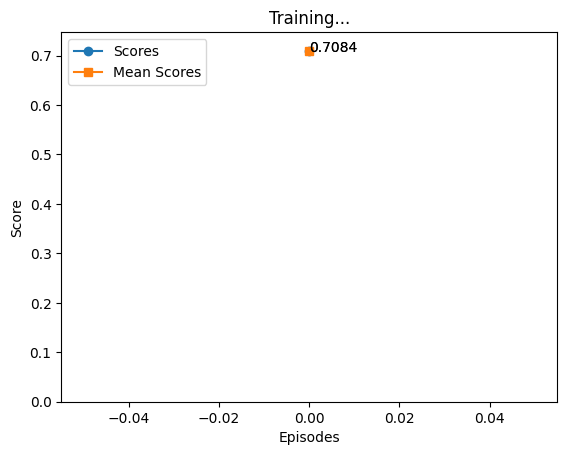

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 662      |
|    ep_rew_mean     | 0.661    |
| time/              |          |
|    fps             | 149      |
|    iterations      | 1        |
|    time_elapsed    | 13       |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 831          |
|    ep_rew_mean          | 0.476        |
| time/                   |              |
|    fps                  | 179          |
|    iterations           | 2            |
|    time_elapsed         | 22           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0143804625 |
|    clip_fraction        | 0.0997       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | -0.559       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0192      |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.011       |
|    value_loss           | 0.00514      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 863         |
|    ep_rew_mean          | 0.431       |
| time/                   |             |
|    fps                  | 194         |
|    iterations           | 3           |
|    time_elapsed         | 31          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.010716263 |
|    clip_fraction        | 0.0828      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.92       |
|    explained_variance   | -0.0346     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00717    |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0141     |
|    value_loss           | 0.000916    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 909         |
|    ep_rew_mean          | 0.358       |
| time/                   |             |
|    fps                  | 206         |
|    iterations           | 4           |
|    time_elapsed         | 39          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.010317255 |
|    clip_fraction        | 0.0739      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.89       |
|    explained_variance   | -0.0407     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.000523    |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00844    |
|    value_loss           | 0.00055     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 925         |
|    ep_rew_mean          | 0.329       |
| time/                   |             |
|    fps                  | 212         |
|    iterations           | 5           |
|    time_elapsed         | 48          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.008253872 |
|    clip_fraction        | 0.063       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.86       |
|    explained_variance   | 0.15        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00922     |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00738    |
|    value_loss           | 0.000561    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 937         |
|    ep_rew_mean          | 0.293       |
| time/                   |             |
|    fps                  | 200         |
|    iterations           | 6           |
|    time_elapsed         | 61          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.011995656 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.83       |
|    explained_variance   | 0.453       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00126    |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 0.000291    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 917         |
|    ep_rew_mean          | 0.338       |
| time/                   |             |
|    fps                  | 207         |
|    iterations           | 7           |
|    time_elapsed         | 69          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.012871543 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | 0.668       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0356     |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0108     |
|    value_loss           | 8.76e-05    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 926         |
|    ep_rew_mean          | 0.327       |
| time/                   |             |
|    fps                  | 206         |
|    iterations           | 8           |
|    time_elapsed         | 79          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.009522278 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.84       |
|    explained_variance   | -0.0721     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0311     |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 0.00095     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 934          |
|    ep_rew_mean          | 0.301        |
| time/                   |              |
|    fps                  | 205          |
|    iterations           | 9            |
|    time_elapsed         | 89           |
|    total_timesteps      | 18432        |
| train/                  |              |
|    approx_kl            | 0.0076688984 |
|    clip_fraction        | 0.08         |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.81        |
|    explained_variance   | 0.243        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0149      |
|    n_updates            | 80           |
|    policy_gradient_loss | -0.00899     |
|    value_loss           | 0.00051      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 940        |
|    ep_rew_mean          | 0.298      |
| time/                   |            |
|    fps                  | 202        |
|    iterations           | 10         |
|    time_elapsed         | 101        |
|    total_timesteps      | 20480      |
| train/                  |            |
|    approx_kl            | 0.01113664 |
|    clip_fraction        | 0.134      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.81      |
|    explained_variance   | -0.461     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0087    |
|    n_updates            | 90         |
|    policy_gradient_loss | -0.0169    |
|    value_loss           | 0.000183   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 926        |
|    ep_rew_mean          | 0.346      |
| time/                   |            |
|    fps                  | 202        |
|    iterations           | 11         |
|    time_elapsed         | 111        |
|    total_timesteps      | 22528      |
| train/                  |            |
|    approx_kl            | 0.01241071 |
|    clip_fraction        | 0.165      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.79      |
|    explained_variance   | 0.255      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0173    |
|    n_updates            | 100        |
|    policy_gradient_loss | -0.018     |
|    value_loss           | 0.000682   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 931         |
|    ep_rew_mean          | 0.343       |
| time/                   |             |
|    fps                  | 204         |
|    iterations           | 12          |
|    time_elapsed         | 119         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.010571742 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.81       |
|    explained_variance   | 0.202       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00972    |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 0.00179     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 936         |
|    ep_rew_mean          | 0.364       |
| time/                   |             |
|    fps                  | 208         |
|    iterations           | 13          |
|    time_elapsed         | 127         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.014977364 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.79       |
|    explained_variance   | 0.406       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0133     |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0199     |
|    value_loss           | 0.00149     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 919         |
|    ep_rew_mean          | 0.388       |
| time/                   |             |
|    fps                  | 209         |
|    iterations           | 14          |
|    time_elapsed         | 136         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.011090081 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.549       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0222      |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0107     |
|    value_loss           | 0.000798    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 924         |
|    ep_rew_mean          | 0.381       |
| time/                   |             |
|    fps                  | 212         |
|    iterations           | 15          |
|    time_elapsed         | 144         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.012738566 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.74       |
|    explained_variance   | 0.361       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00897    |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 0.0022      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 928         |
|    ep_rew_mean          | 0.387       |
| time/                   |             |
|    fps                  | 213         |
|    iterations           | 16          |
|    time_elapsed         | 153         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.011802129 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.75       |
|    explained_variance   | 0.678       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0348     |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.0104     |
|    value_loss           | 0.000442    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 915         |
|    ep_rew_mean          | 0.41        |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 17          |
|    time_elapsed         | 162         |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.012766296 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.73       |
|    explained_variance   | 0.708       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0304     |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 0.000802    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 887         |
|    ep_rew_mean          | 0.446       |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 18          |
|    time_elapsed         | 170         |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.009340987 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.71       |
|    explained_variance   | 0.441       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0471     |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.0125     |
|    value_loss           | 0.00314     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 875         |
|    ep_rew_mean          | 0.464       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 19          |
|    time_elapsed         | 179         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.014339127 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.256       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0154     |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 0.0032      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 863         |
|    ep_rew_mean          | 0.489       |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 20          |
|    time_elapsed         | 188         |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.014995402 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.213       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0132     |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0114     |
|    value_loss           | 0.00591     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 868         |
|    ep_rew_mean          | 0.473       |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 21          |
|    time_elapsed         | 196         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.012754944 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.69       |
|    explained_variance   | 0.353       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0229     |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0119     |
|    value_loss           | 0.00306     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 865         |
|    ep_rew_mean          | 0.472       |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 22          |
|    time_elapsed         | 206         |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.012610869 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | -0.0945     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0366     |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.0161     |
|    value_loss           | 0.000712    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 871         |
|    ep_rew_mean          | 0.469       |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 23          |
|    time_elapsed         | 213         |
|    total_timesteps      | 47104       |
| train/                  |             |
|    approx_kl            | 0.013435087 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.411       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0365     |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.0144     |
|    value_loss           | 0.00148     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 874         |
|    ep_rew_mean          | 0.463       |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 24          |
|    time_elapsed         | 222         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.011485258 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.64       |
|    explained_variance   | 0.636       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00314    |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.016      |
|    value_loss           | 0.000427    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 852         |
|    ep_rew_mean          | 0.5         |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 25          |
|    time_elapsed         | 231         |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.015185501 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | 0.399       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00433    |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0122     |
|    value_loss           | 0.000686    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 761         |
|    ep_rew_mean          | 0.618       |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 26          |
|    time_elapsed         | 241         |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.017426513 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.57       |
|    explained_variance   | 0.345       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0369     |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 0.00668     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 724         |
|    ep_rew_mean          | 0.665       |
| time/                   |             |
|    fps                  | 219         |
|    iterations           | 27          |
|    time_elapsed         | 251         |
|    total_timesteps      | 55296       |
| train/                  |             |
|    approx_kl            | 0.012013199 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.172       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00545    |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 0.0173      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 681         |
|    ep_rew_mean          | 0.722       |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 28          |
|    time_elapsed         | 261         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.012912281 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.5        |
|    explained_variance   | 0.425       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0466     |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 0.0101      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 618         |
|    ep_rew_mean          | 0.806       |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 29          |
|    time_elapsed         | 272         |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.019385647 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | 0.297       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0221      |
|    n_updates            | 280         |
|    policy_gradient_loss | -0.0193     |
|    value_loss           | 0.0161      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 561         |
|    ep_rew_mean          | 0.886       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 30          |
|    time_elapsed         | 283         |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.016272364 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.44       |
|    explained_variance   | 0.338       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0189     |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 0.0181      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 0.983       |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 31          |
|    time_elapsed         | 293         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.018375177 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.48       |
|    explained_variance   | 0.537       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0131     |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 0.0117      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 383         |
|    ep_rew_mean          | 1.13        |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 32          |
|    time_elapsed         | 304         |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.020586008 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.39       |
|    explained_variance   | 0.424       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.035      |
|    n_updates            | 310         |
|    policy_gradient_loss | -0.0173     |
|    value_loss           | 0.0116      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 204        |
|    ep_rew_mean          | 1.36       |
| time/                   |            |
|    fps                  | 211        |
|    iterations           | 33         |
|    time_elapsed         | 318        |
|    total_timesteps      | 67584      |
| train/                  |            |
|    approx_kl            | 0.01776871 |
|    clip_fraction        | 0.19       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.37      |
|    explained_variance   | 0.623      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0553    |
|    n_updates            | 320        |
|    policy_gradient_loss | -0.022     |
|    value_loss           | 0.0158     |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 334.32 seconds and 69493 steps.
Stopping training as the mean reward 0.9010254740715027 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [6]:
# Setup model and environment
env = CustomDoorKey(size=6, intermediate_reward=True, randomize_goal=True, key_discount=0.1, render_mode="rgb")
custom_env = CustomImgObsWrapper(env)

model = PPO("MultiInputPolicy", custom_env, policy_kwargs=custom_policy_kwargs, verbose=1)

# Instantiate the callback
max_reward = .9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)  # set callback

# Train the model
model.learn(total_timesteps=int(2e8), callback=callback)  # apply callback
model.save("model_6x6s_multi_input")

# the plot function also saves the plot
plt.savefig('model_6x6s_multi_input.png')

# Close the environment
env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


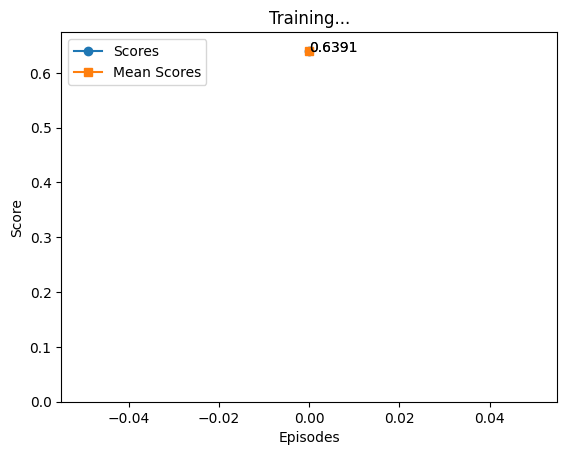

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 284      |
|    ep_rew_mean     | 1.26     |
| time/              |          |
|    fps             | 252      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 480         |
|    ep_rew_mean          | 0.992       |
| time/                   |             |
|    fps                  | 238         |
|    iterations           | 2           |
|    time_elapsed         | 17          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011770057 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.893      |
|    explained_variance   | 0.504       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0341     |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.00918    |
|    value_loss           | 0.00401     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 448         |
|    ep_rew_mean          | 1.03        |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 3           |
|    time_elapsed         | 26          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.015669398 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.981      |
|    explained_variance   | 0.238       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0198     |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.0154     |
|    value_loss           | 0.0032      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 523         |
|    ep_rew_mean          | 0.983       |
| time/                   |             |
|    fps                  | 228         |
|    iterations           | 4           |
|    time_elapsed         | 35          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.015770452 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.255       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0174     |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.013      |
|    value_loss           | 0.0043      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 441         |
|    ep_rew_mean          | 1.09        |
| time/                   |             |
|    fps                  | 220         |
|    iterations           | 5           |
|    time_elapsed         | 46          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.017260727 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.672       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00597    |
|    n_updates            | 370         |
|    policy_gradient_loss | -0.0107     |
|    value_loss           | 0.000965    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 412         |
|    ep_rew_mean          | 1.13        |
| time/                   |             |
|    fps                  | 219         |
|    iterations           | 6           |
|    time_elapsed         | 55          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.020047076 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.999      |
|    explained_variance   | 0.528       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0205     |
|    n_updates            | 380         |
|    policy_gradient_loss | -0.0134     |
|    value_loss           | 0.00644     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 410         |
|    ep_rew_mean          | 1.13        |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 7           |
|    time_elapsed         | 65          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.017855529 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.909      |
|    explained_variance   | 0.543       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.013       |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.0144     |
|    value_loss           | 0.00319     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 408         |
|    ep_rew_mean          | 1.12        |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 8           |
|    time_elapsed         | 75          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.015800815 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.93       |
|    explained_variance   | 0.444       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0271     |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0101     |
|    value_loss           | 0.00364     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 422         |
|    ep_rew_mean          | 1.1         |
| time/                   |             |
|    fps                  | 215         |
|    iterations           | 9           |
|    time_elapsed         | 85          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.032030262 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.889      |
|    explained_variance   | 0.602       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0456     |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.0141     |
|    value_loss           | 0.00336     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 415          |
|    ep_rew_mean          | 1.1          |
| time/                   |              |
|    fps                  | 211          |
|    iterations           | 10           |
|    time_elapsed         | 96           |
|    total_timesteps      | 20480        |
| train/                  |              |
|    approx_kl            | 0.0132439425 |
|    clip_fraction        | 0.176        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.871       |
|    explained_variance   | 0.325        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0339      |
|    n_updates            | 420          |
|    policy_gradient_loss | -0.0164      |
|    value_loss           | 0.00289      |
------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 360         |
|    ep_rew_mean          | 1.17        |
| time/                   |             |
|    fps                  | 207         |
|    iterations           | 11          |
|    time_elapsed         | 108         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.012745682 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.891      |
|    explained_variance   | 0.329       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00833    |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 0.00634     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 331         |
|    ep_rew_mean          | 1.2         |
| time/                   |             |
|    fps                  | 205         |
|    iterations           | 12          |
|    time_elapsed         | 119         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.028162189 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.488       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00921    |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.0127      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 289         |
|    ep_rew_mean          | 1.25        |
| time/                   |             |
|    fps                  | 201         |
|    iterations           | 13          |
|    time_elapsed         | 132         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.021377774 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.948      |
|    explained_variance   | 0.24        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.013      |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 0.0166      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 257         |
|    ep_rew_mean          | 1.29        |
| time/                   |             |
|    fps                  | 199         |
|    iterations           | 14          |
|    time_elapsed         | 143         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.018497897 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.875      |
|    explained_variance   | 0.179       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0296     |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 0.0218      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 178         |
|    ep_rew_mean          | 1.37        |
| time/                   |             |
|    fps                  | 194         |
|    iterations           | 15          |
|    time_elapsed         | 158         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.017458905 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.874      |
|    explained_variance   | 0.525       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00754    |
|    n_updates            | 470         |
|    policy_gradient_loss | -0.0126     |
|    value_loss           | 0.0145      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 167.83 seconds and 31664 steps.
Stopping training as the mean reward 0.9002439975738525 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [8]:
env = CustomDoorKey(size=8,  render_mode="rgb_array")
env = CustomImgObsWrapper(env)
model = PPO.load("model_6x6s_multi_input", env=env)

# Instantiate the callback
max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)

# Train the model
model.learn(total_timesteps=int(2e6), callback=callback)
model.save("transfered_from_6_to_8")

# Optionally save the final plot
plt.savefig('transfered_from_6_to_8.png')

# Close the environment
env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


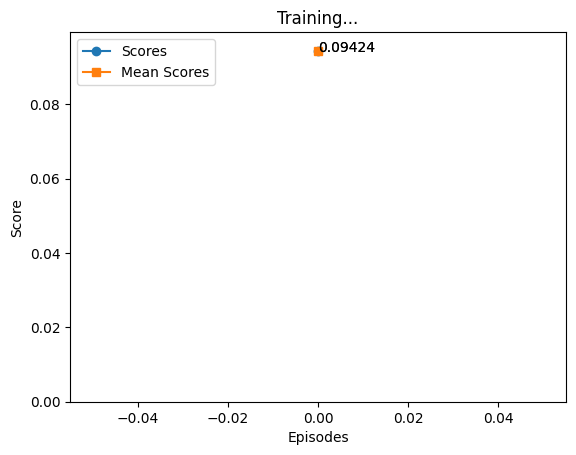

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 0.175    |
| time/              |          |
|    fps             | 280      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.243       |
| time/                   |             |
|    fps                  | 269         |
|    iterations           | 2           |
|    time_elapsed         | 15          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011035217 |
|    clip_fraction        | 0.0636      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | 0.00107     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0221      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0107     |
|    value_loss           | 0.000484    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 0.19        |
| time/                   |             |
|    fps                  | 254         |
|    iterations           | 3           |
|    time_elapsed         | 24          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.009495187 |
|    clip_fraction        | 0.071       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.93       |
|    explained_variance   | 0.723       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0223     |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.00883    |
|    value_loss           | 0.000558    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 953        |
|    ep_rew_mean          | 0.291      |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 4          |
|    time_elapsed         | 32         |
|    total_timesteps      | 8192       |
| train/                  |            |
|    approx_kl            | 0.01458499 |
|    clip_fraction        | 0.156      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.91      |
|    explained_variance   | 0.389      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0118    |
|    n_updates            | 30         |
|    policy_gradient_loss | -0.0188    |
|    value_loss           | 0.000127   |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 899         |
|    ep_rew_mean          | 0.348       |
| time/                   |             |
|    fps                  | 248         |
|    iterations           | 5           |
|    time_elapsed         | 41          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.010359577 |
|    clip_fraction        | 0.0916      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.9        |
|    explained_variance   | 0.0555      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0156     |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 0.00184     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 914         |
|    ep_rew_mean          | 0.336       |
| time/                   |             |
|    fps                  | 245         |
|    iterations           | 6           |
|    time_elapsed         | 50          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.011663567 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.88       |
|    explained_variance   | 0.106       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0072     |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.00777    |
|    value_loss           | 0.00228     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 888         |
|    ep_rew_mean          | 0.375       |
| time/                   |             |
|    fps                  | 245         |
|    iterations           | 7           |
|    time_elapsed         | 58          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.012712095 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.87       |
|    explained_variance   | 0.741       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0485     |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 0.000106    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 892        |
|    ep_rew_mean          | 0.358      |
| time/                   |            |
|    fps                  | 242        |
|    iterations           | 8          |
|    time_elapsed         | 67         |
|    total_timesteps      | 16384      |
| train/                  |            |
|    approx_kl            | 0.01127083 |
|    clip_fraction        | 0.143      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.84      |
|    explained_variance   | 0.603      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0052     |
|    n_updates            | 70         |
|    policy_gradient_loss | -0.0127    |
|    value_loss           | 0.00173    |
----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 903         |
|    ep_rew_mean          | 0.348       |
| time/                   |             |
|    fps                  | 244         |
|    iterations           | 9           |
|    time_elapsed         | 75          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.012858709 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.85       |
|    explained_variance   | 0.289       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0241     |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0126     |
|    value_loss           | 0.000328    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 815         |
|    ep_rew_mean          | 0.476       |
| time/                   |             |
|    fps                  | 241         |
|    iterations           | 10          |
|    time_elapsed         | 84          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.010566995 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | 0.27        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.019      |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0128     |
|    value_loss           | 0.000857    |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 753         |
|    ep_rew_mean          | 0.564       |
| time/                   |             |
|    fps                  | 238         |
|    iterations           | 11          |
|    time_elapsed         | 94          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.010651471 |
|    clip_fraction        | 0.1         |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | 0.201       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0116     |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0112     |
|    value_loss           | 0.00973     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 697         |
|    ep_rew_mean          | 0.642       |
| time/                   |             |
|    fps                  | 238         |
|    iterations           | 12          |
|    time_elapsed         | 103         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.012976222 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.8        |
|    explained_variance   | 0.291       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0287     |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0148     |
|    value_loss           | 0.00822     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 664         |
|    ep_rew_mean          | 0.691       |
| time/                   |             |
|    fps                  | 236         |
|    iterations           | 13          |
|    time_elapsed         | 112         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.012211839 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | 0.497       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.031      |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 0.0114      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 635         |
|    ep_rew_mean          | 0.729       |
| time/                   |             |
|    fps                  | 235         |
|    iterations           | 14          |
|    time_elapsed         | 121         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.011886159 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.572       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0157      |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 0.00713     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 558         |
|    ep_rew_mean          | 0.841       |
| time/                   |             |
|    fps                  | 233         |
|    iterations           | 15          |
|    time_elapsed         | 131         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.011571389 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.69       |
|    explained_variance   | 0.206       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0171     |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 0.0105      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 475         |
|    ep_rew_mean          | 0.956       |
| time/                   |             |
|    fps                  | 229         |
|    iterations           | 16          |
|    time_elapsed         | 143         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.014232026 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.64       |
|    explained_variance   | 0.18        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.000958    |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 0.0238      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 419         |
|    ep_rew_mean          | 1.04        |
| time/                   |             |
|    fps                  | 225         |
|    iterations           | 17          |
|    time_elapsed         | 154         |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.013286447 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | 0.381       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00485    |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 0.0275      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 384         |
|    ep_rew_mean          | 1.09        |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 18          |
|    time_elapsed         | 165         |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.012555432 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | 0.147       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0434     |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 0.0237      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 185         |
|    ep_rew_mean          | 1.37        |
| time/                   |             |
|    fps                  | 213         |
|    iterations           | 19          |
|    time_elapsed         | 182         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.016030125 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | 0.415       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0465     |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 0.0144      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 192.14 seconds and 40062 steps.
Stopping training as the mean reward 0.9011244773864746 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [9]:
# Setup model and environment
env = CustomDoorKey(size=6, intermediate_reward=True, randomize_goal=True, key_discount=0.1, render_mode="rgb")
custom_env = CustomImgObsWrapper(env)

model = PPO("MultiInputPolicy", custom_env, policy_kwargs=custom_policy_kwargs, verbose=1)

# Instantiate the callback
max_reward = .9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)  # set callback

# Train the model
model.learn(total_timesteps=int(2e8), callback=callback)  # apply callback
model.save("model_6x6s_multi_input_2")

# the plot function also saves the plot
plt.savefig('model_6x6s_multi_input_2.png')

# Close the environment
env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


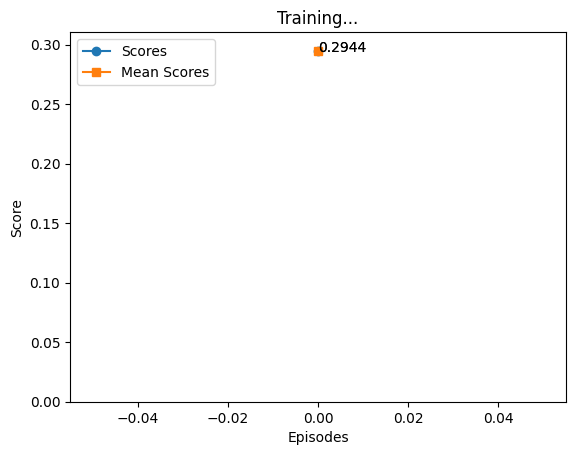

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 320      |
|    ep_rew_mean     | 1.21     |
| time/              |          |
|    fps             | 259      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 237         |
|    ep_rew_mean          | 1.32        |
| time/                   |             |
|    fps                  | 227         |
|    iterations           | 2           |
|    time_elapsed         | 18          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015065366 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | 0.0525      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0362     |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0162     |
|    value_loss           | 0.00814     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 180         |
|    ep_rew_mean          | 1.39        |
| time/                   |             |
|    fps                  | 206         |
|    iterations           | 3           |
|    time_elapsed         | 29          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.017486548 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | 0.427       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.019      |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.0188     |
|    value_loss           | 0.00877     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 181         |
|    ep_rew_mean          | 1.39        |
| time/                   |             |
|    fps                  | 201         |
|    iterations           | 4           |
|    time_elapsed         | 40          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.018443044 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.594       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0318     |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.0185     |
|    value_loss           | 0.0158      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 160         |
|    ep_rew_mean          | 1.41        |
| time/                   |             |
|    fps                  | 194         |
|    iterations           | 5           |
|    time_elapsed         | 52          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.027839638 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.771       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0199     |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 0.00851     |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 150         |
|    ep_rew_mean          | 1.42        |
| time/                   |             |
|    fps                  | 187         |
|    iterations           | 6           |
|    time_elapsed         | 65          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.019145265 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.0877      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.023       |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0148     |
|    value_loss           | 0.0115      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 113         |
|    ep_rew_mean          | 1.47        |
| time/                   |             |
|    fps                  | 178         |
|    iterations           | 7           |
|    time_elapsed         | 80          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.020700922 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.497       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0288     |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0215     |
|    value_loss           | 0.0144      |
-----------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Threshold reached in 83.03 seconds and 14397 steps.
Stopping training as the mean reward 0.9018455743789673 is above the threshold 0.9


<Figure size 640x480 with 0 Axes>

In [10]:
env = CustomDoorKey(size=8,  render_mode="rgb_array")
env = CustomImgObsWrapper(env)
model = PPO.load("model_6x6s_multi_input_2", env=env)

# Instantiate the callback
max_reward = 0.9
callback = CustomRewardCallback(check_freq=1000, reward_threshold=max_reward)

# Train the model
model.learn(total_timesteps=int(2e6), callback=callback)
model.save("transfered_from_6_to_8")

# Optionally save the final plot
plt.savefig('transfered_from_6_to_8.png')

# Close the environment
env.close()